In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pathlib
import shutil
import time
import cv2

In [2]:
!wget http://opensurfaces.cs.cornell.edu/static/minc/minc-2500.tar.gz

--2020-09-19 19:24:05--  http://opensurfaces.cs.cornell.edu/static/minc/minc-2500.tar.gz
Resolving opensurfaces.cs.cornell.edu (opensurfaces.cs.cornell.edu)... 23.23.145.106
Connecting to opensurfaces.cs.cornell.edu (opensurfaces.cs.cornell.edu)|23.23.145.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2240609665 (2.1G) [application/octet-stream]
Saving to: ‘minc-2500.tar.gz’

minc-2500.tar.gz    100%[===================>]   2.09G  4.80MB/s    in 6m 28s  

2020-09-19 19:30:33 (5.51 MB/s) - ‘minc-2500.tar.gz’ saved [2240609665/2240609665]



In [27]:
!gunzip -c *.gz | tar xvf -

minc-2500/categories.txt
minc-2500/images/
minc-2500/images/polishedstone/
minc-2500/images/polishedstone/polishedstone_002209.jpg
minc-2500/images/polishedstone/polishedstone_001376.jpg
minc-2500/images/polishedstone/polishedstone_001640.jpg
minc-2500/images/polishedstone/polishedstone_001721.jpg
minc-2500/images/polishedstone/polishedstone_001261.jpg
minc-2500/images/polishedstone/polishedstone_001403.jpg
minc-2500/images/polishedstone/polishedstone_001435.jpg
minc-2500/images/polishedstone/polishedstone_002047.jpg
minc-2500/images/polishedstone/polishedstone_000040.jpg
minc-2500/images/polishedstone/polishedstone_002089.jpg
minc-2500/images/polishedstone/polishedstone_000064.jpg
minc-2500/images/polishedstone/polishedstone_000009.jpg
minc-2500/images/polishedstone/polishedstone_001898.jpg
minc-2500/images/polishedstone/polishedstone_000481.jpg
minc-2500/images/polishedstone/polishedstone_001113.jpg
minc-2500/images/polishedstone/polishedstone_000268.jpg
minc-2500/images/polishedston

minc-2500/images/polishedstone/polishedstone_001739.jpg
minc-2500/images/polishedstone/polishedstone_000243.jpg
minc-2500/images/polishedstone/polishedstone_000441.jpg
minc-2500/images/polishedstone/polishedstone_000125.jpg
minc-2500/images/polishedstone/polishedstone_000210.jpg
minc-2500/images/polishedstone/polishedstone_001659.jpg
minc-2500/images/polishedstone/polishedstone_001697.jpg
minc-2500/images/polishedstone/polishedstone_000554.jpg
minc-2500/images/polishedstone/polishedstone_000924.jpg
minc-2500/images/polishedstone/polishedstone_001093.jpg
minc-2500/images/polishedstone/polishedstone_001457.jpg
minc-2500/images/polishedstone/polishedstone_001392.jpg
minc-2500/images/polishedstone/polishedstone_002382.jpg
minc-2500/images/polishedstone/polishedstone_001661.jpg
minc-2500/images/polishedstone/polishedstone_001917.jpg
minc-2500/images/polishedstone/polishedstone_000254.jpg
minc-2500/images/polishedstone/polishedstone_000983.jpg
minc-2500/images/polishedstone/polishedstone_001

minc-2500/images/polishedstone/polishedstone_000408.jpg
minc-2500/images/polishedstone/polishedstone_002128.jpg
minc-2500/images/polishedstone/polishedstone_000061.jpg
minc-2500/images/polishedstone/polishedstone_002364.jpg
minc-2500/images/polishedstone/polishedstone_000185.jpg
minc-2500/images/polishedstone/polishedstone_000178.jpg
minc-2500/images/polishedstone/polishedstone_000694.jpg
minc-2500/images/polishedstone/polishedstone_000001.jpg
minc-2500/images/polishedstone/polishedstone_001619.jpg
minc-2500/images/polishedstone/polishedstone_001672.jpg
minc-2500/images/polishedstone/polishedstone_000492.jpg
minc-2500/images/polishedstone/polishedstone_000010.jpg
minc-2500/images/polishedstone/polishedstone_000234.jpg
minc-2500/images/polishedstone/polishedstone_000942.jpg
minc-2500/images/polishedstone/polishedstone_000882.jpg
minc-2500/images/polishedstone/polishedstone_001899.jpg
minc-2500/images/polishedstone/polishedstone_002248.jpg
minc-2500/images/polishedstone/polishedstone_002

minc-2500/images/polishedstone/polishedstone_000375.jpg
minc-2500/images/polishedstone/polishedstone_002011.jpg
minc-2500/images/polishedstone/polishedstone_001183.jpg
minc-2500/images/polishedstone/polishedstone_002355.jpg
minc-2500/images/polishedstone/polishedstone_001618.jpg
minc-2500/images/polishedstone/polishedstone_000489.jpg
minc-2500/images/polishedstone/polishedstone_001178.jpg
minc-2500/images/polishedstone/polishedstone_000801.jpg
minc-2500/images/polishedstone/polishedstone_001907.jpg
minc-2500/images/polishedstone/polishedstone_001684.jpg
minc-2500/images/polishedstone/polishedstone_001526.jpg
minc-2500/images/polishedstone/polishedstone_001681.jpg
minc-2500/images/polishedstone/polishedstone_001827.jpg
minc-2500/images/polishedstone/polishedstone_000418.jpg
minc-2500/images/polishedstone/polishedstone_001482.jpg
minc-2500/images/polishedstone/polishedstone_000606.jpg
minc-2500/images/polishedstone/polishedstone_000798.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/polishedstone/polishedstone_000684.jpg
minc-2500/images/polishedstone/polishedstone_002213.jpg
minc-2500/images/polishedstone/polishedstone_002078.jpg
minc-2500/images/polishedstone/polishedstone_001458.jpg
minc-2500/images/polishedstone/polishedstone_000933.jpg
minc-2500/images/polishedstone/polishedstone_000109.jpg
minc-2500/images/polishedstone/polishedstone_001975.jpg
minc-2500/images/polishedstone/polishedstone_001892.jpg
minc-2500/images/polishedstone/polishedstone_001703.jpg
minc-2500/images/polishedstone/polishedstone_000264.jpg
minc-2500/images/polishedstone/polishedstone_001601.jpg
minc-2500/images/polishedstone/polishedstone_002119.jpg
minc-2500/images/polishedstone/polishedstone_001654.jpg
minc-2500/images/polishedstone/polishedstone_001052.jpg
minc-2500/images/polishedstone/polishedstone_001242.jpg
minc-2500/images/polishedstone/polishedstone_001996.jpg
minc-2500/images/polishedstone/polishedstone_002122.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/polishedstone/polishedstone_002156.jpg
minc-2500/images/polishedstone/polishedstone_000056.jpg
minc-2500/images/polishedstone/polishedstone_001732.jpg
minc-2500/images/polishedstone/polishedstone_001249.jpg
minc-2500/images/polishedstone/polishedstone_000931.jpg
minc-2500/images/polishedstone/polishedstone_000161.jpg
minc-2500/images/polishedstone/polishedstone_000950.jpg
minc-2500/images/polishedstone/polishedstone_002237.jpg
minc-2500/images/polishedstone/polishedstone_000635.jpg
minc-2500/images/polishedstone/polishedstone_002295.jpg
minc-2500/images/polishedstone/polishedstone_001324.jpg
minc-2500/images/polishedstone/polishedstone_000387.jpg
minc-2500/images/polishedstone/polishedstone_001046.jpg
minc-2500/images/polishedstone/polishedstone_000394.jpg
minc-2500/images/polishedstone/polishedstone_000852.jpg
minc-2500/images/polishedstone/polishedstone_000336.jpg
minc-2500/images/polishedstone/polishedstone_001626.jpg
minc-2500/images/polishedstone/polishedstone_002

minc-2500/images/polishedstone/polishedstone_002290.jpg
minc-2500/images/polishedstone/polishedstone_000075.jpg
minc-2500/images/polishedstone/polishedstone_002114.jpg
minc-2500/images/polishedstone/polishedstone_001714.jpg
minc-2500/images/polishedstone/polishedstone_000624.jpg
minc-2500/images/polishedstone/polishedstone_001198.jpg
minc-2500/images/polishedstone/polishedstone_002353.jpg
minc-2500/images/polishedstone/polishedstone_000068.jpg
minc-2500/images/polishedstone/polishedstone_000736.jpg
minc-2500/images/polishedstone/polishedstone_001676.jpg
minc-2500/images/polishedstone/polishedstone_002352.jpg
minc-2500/images/polishedstone/polishedstone_001893.jpg
minc-2500/images/polishedstone/polishedstone_002468.jpg
minc-2500/images/polishedstone/polishedstone_000522.jpg
minc-2500/images/polishedstone/polishedstone_001931.jpg
minc-2500/images/polishedstone/polishedstone_001650.jpg
minc-2500/images/polishedstone/polishedstone_000114.jpg
minc-2500/images/polishedstone/polishedstone_002

minc-2500/images/polishedstone/polishedstone_000967.jpg
minc-2500/images/polishedstone/polishedstone_000197.jpg
minc-2500/images/polishedstone/polishedstone_001708.jpg
minc-2500/images/polishedstone/polishedstone_001199.jpg
minc-2500/images/polishedstone/polishedstone_002224.jpg
minc-2500/images/polishedstone/polishedstone_000466.jpg
minc-2500/images/polishedstone/polishedstone_001783.jpg
minc-2500/images/polishedstone/polishedstone_000502.jpg
minc-2500/images/polishedstone/polishedstone_001691.jpg
minc-2500/images/polishedstone/polishedstone_001734.jpg
minc-2500/images/polishedstone/polishedstone_001569.jpg
minc-2500/images/polishedstone/polishedstone_000805.jpg
minc-2500/images/polishedstone/polishedstone_000574.jpg
minc-2500/images/polishedstone/polishedstone_001302.jpg
minc-2500/images/polishedstone/polishedstone_000817.jpg
minc-2500/images/polishedstone/polishedstone_000495.jpg
minc-2500/images/polishedstone/polishedstone_002377.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/polishedstone/polishedstone_000661.jpg
minc-2500/images/polishedstone/polishedstone_001056.jpg
minc-2500/images/polishedstone/polishedstone_001991.jpg
minc-2500/images/polishedstone/polishedstone_001125.jpg
minc-2500/images/polishedstone/polishedstone_001049.jpg
minc-2500/images/polishedstone/polishedstone_001334.jpg
minc-2500/images/polishedstone/polishedstone_001153.jpg
minc-2500/images/polishedstone/polishedstone_001631.jpg
minc-2500/images/polishedstone/polishedstone_000953.jpg
minc-2500/images/polishedstone/polishedstone_001096.jpg
minc-2500/images/polishedstone/polishedstone_000306.jpg
minc-2500/images/polishedstone/polishedstone_000371.jpg
minc-2500/images/polishedstone/polishedstone_001369.jpg
minc-2500/images/polishedstone/polishedstone_000963.jpg
minc-2500/images/polishedstone/polishedstone_001087.jpg
minc-2500/images/polishedstone/polishedstone_002466.jpg
minc-2500/images/polishedstone/polishedstone_000403.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/polishedstone/polishedstone_000546.jpg
minc-2500/images/polishedstone/polishedstone_002077.jpg
minc-2500/images/polishedstone/polishedstone_002140.jpg
minc-2500/images/polishedstone/polishedstone_000424.jpg
minc-2500/images/polishedstone/polishedstone_000186.jpg
minc-2500/images/polishedstone/polishedstone_000935.jpg
minc-2500/images/polishedstone/polishedstone_001843.jpg
minc-2500/images/polishedstone/polishedstone_001828.jpg
minc-2500/images/polishedstone/polishedstone_002064.jpg
minc-2500/images/polishedstone/polishedstone_000415.jpg
minc-2500/images/polishedstone/polishedstone_002058.jpg
minc-2500/images/polishedstone/polishedstone_002287.jpg
minc-2500/images/polishedstone/polishedstone_000553.jpg
minc-2500/images/polishedstone/polishedstone_002034.jpg
minc-2500/images/polishedstone/polishedstone_000359.jpg
minc-2500/images/polishedstone/polishedstone_000673.jpg
minc-2500/images/polishedstone/polishedstone_002239.jpg
minc-2500/images/polishedstone/polishedstone_001

minc-2500/images/polishedstone/polishedstone_001438.jpg
minc-2500/images/polishedstone/polishedstone_001900.jpg
minc-2500/images/polishedstone/polishedstone_001679.jpg
minc-2500/images/polishedstone/polishedstone_002212.jpg
minc-2500/images/polishedstone/polishedstone_002426.jpg
minc-2500/images/polishedstone/polishedstone_001985.jpg
minc-2500/images/polishedstone/polishedstone_002221.jpg
minc-2500/images/polishedstone/polishedstone_000204.jpg
minc-2500/images/polishedstone/polishedstone_000383.jpg
minc-2500/images/polishedstone/polishedstone_002455.jpg
minc-2500/images/polishedstone/polishedstone_000877.jpg
minc-2500/images/polishedstone/polishedstone_001417.jpg
minc-2500/images/polishedstone/polishedstone_000420.jpg
minc-2500/images/polishedstone/polishedstone_001387.jpg
minc-2500/images/polishedstone/polishedstone_001447.jpg
minc-2500/images/polishedstone/polishedstone_000077.jpg
minc-2500/images/polishedstone/polishedstone_000430.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/polishedstone/polishedstone_002361.jpg
minc-2500/images/polishedstone/polishedstone_001488.jpg
minc-2500/images/polishedstone/polishedstone_001680.jpg
minc-2500/images/polishedstone/polishedstone_002027.jpg
minc-2500/images/polishedstone/polishedstone_001952.jpg
minc-2500/images/polishedstone/polishedstone_000660.jpg
minc-2500/images/polishedstone/polishedstone_000835.jpg
minc-2500/images/polishedstone/polishedstone_000222.jpg
minc-2500/images/polishedstone/polishedstone_000134.jpg
minc-2500/images/polishedstone/polishedstone_001559.jpg
minc-2500/images/polishedstone/polishedstone_002218.jpg
minc-2500/images/polishedstone/polishedstone_002392.jpg
minc-2500/images/polishedstone/polishedstone_001316.jpg
minc-2500/images/polishedstone/polishedstone_001381.jpg
minc-2500/images/polishedstone/polishedstone_000865.jpg
minc-2500/images/polishedstone/polishedstone_001746.jpg
minc-2500/images/polishedstone/polishedstone_001105.jpg
minc-2500/images/polishedstone/polishedstone_001

minc-2500/images/polishedstone/polishedstone_001581.jpg
minc-2500/images/polishedstone/polishedstone_001277.jpg
minc-2500/images/polishedstone/polishedstone_002312.jpg
minc-2500/images/polishedstone/polishedstone_000866.jpg
minc-2500/images/polishedstone/polishedstone_000374.jpg
minc-2500/images/polishedstone/polishedstone_001017.jpg
minc-2500/images/polishedstone/polishedstone_000636.jpg
minc-2500/images/polishedstone/polishedstone_001501.jpg
minc-2500/images/polishedstone/polishedstone_001104.jpg
minc-2500/images/polishedstone/polishedstone_001309.jpg
minc-2500/images/polishedstone/polishedstone_002499.jpg
minc-2500/images/polishedstone/polishedstone_001824.jpg
minc-2500/images/polishedstone/polishedstone_000417.jpg
minc-2500/images/polishedstone/polishedstone_001226.jpg
minc-2500/images/polishedstone/polishedstone_000315.jpg
minc-2500/images/polishedstone/polishedstone_001042.jpg
minc-2500/images/polishedstone/polishedstone_000969.jpg
minc-2500/images/polishedstone/polishedstone_000

minc-2500/images/stone/stone_001615.jpg
minc-2500/images/stone/stone_002334.jpg
minc-2500/images/stone/stone_002166.jpg
minc-2500/images/stone/stone_001048.jpg
minc-2500/images/stone/stone_000713.jpg
minc-2500/images/stone/stone_000145.jpg
minc-2500/images/stone/stone_001839.jpg
minc-2500/images/stone/stone_001878.jpg
minc-2500/images/stone/stone_000524.jpg
minc-2500/images/stone/stone_001677.jpg
minc-2500/images/stone/stone_000003.jpg
minc-2500/images/stone/stone_000664.jpg
minc-2500/images/stone/stone_001037.jpg
minc-2500/images/stone/stone_001851.jpg
minc-2500/images/stone/stone_000882.jpg
minc-2500/images/stone/stone_000569.jpg
minc-2500/images/stone/stone_002216.jpg
minc-2500/images/stone/stone_002122.jpg
minc-2500/images/stone/stone_002117.jpg
minc-2500/images/stone/stone_000474.jpg
minc-2500/images/stone/stone_000261.jpg
minc-2500/images/stone/stone_001363.jpg
minc-2500/images/stone/stone_001388.jpg
minc-2500/images/stone/stone_000295.jpg
minc-2500/images/stone/stone_001873.jpg


minc-2500/images/stone/stone_000573.jpg
minc-2500/images/stone/stone_002185.jpg
minc-2500/images/stone/stone_000945.jpg
minc-2500/images/stone/stone_002328.jpg
minc-2500/images/stone/stone_000662.jpg
minc-2500/images/stone/stone_000060.jpg
minc-2500/images/stone/stone_001796.jpg
minc-2500/images/stone/stone_002177.jpg
minc-2500/images/stone/stone_000531.jpg
minc-2500/images/stone/stone_001163.jpg
minc-2500/images/stone/stone_000729.jpg
minc-2500/images/stone/stone_001370.jpg
minc-2500/images/stone/stone_001217.jpg
minc-2500/images/stone/stone_002356.jpg
minc-2500/images/stone/stone_000731.jpg
minc-2500/images/stone/stone_001702.jpg
minc-2500/images/stone/stone_001648.jpg
minc-2500/images/stone/stone_000255.jpg
minc-2500/images/stone/stone_000735.jpg
minc-2500/images/stone/stone_002415.jpg
minc-2500/images/stone/stone_000641.jpg
minc-2500/images/stone/stone_002346.jpg
minc-2500/images/stone/stone_000542.jpg
minc-2500/images/stone/stone_001532.jpg
minc-2500/images/stone/stone_001442.jpg


minc-2500/images/stone/stone_001367.jpg
minc-2500/images/stone/stone_002385.jpg
minc-2500/images/stone/stone_000345.jpg
minc-2500/images/stone/stone_001488.jpg
minc-2500/images/stone/stone_001639.jpg
minc-2500/images/stone/stone_001260.jpg
minc-2500/images/stone/stone_000212.jpg
minc-2500/images/stone/stone_000267.jpg
minc-2500/images/stone/stone_001512.jpg
minc-2500/images/stone/stone_001751.jpg
minc-2500/images/stone/stone_001329.jpg
minc-2500/images/stone/stone_001112.jpg
minc-2500/images/stone/stone_000680.jpg
minc-2500/images/stone/stone_000073.jpg
minc-2500/images/stone/stone_000842.jpg
minc-2500/images/stone/stone_000614.jpg
minc-2500/images/stone/stone_002165.jpg
minc-2500/images/stone/stone_001100.jpg
minc-2500/images/stone/stone_001942.jpg
minc-2500/images/stone/stone_000308.jpg
minc-2500/images/stone/stone_001865.jpg
minc-2500/images/stone/stone_001251.jpg
minc-2500/images/stone/stone_000840.jpg
minc-2500/images/stone/stone_000732.jpg
minc-2500/images/stone/stone_001071.jpg


minc-2500/images/stone/stone_000777.jpg
minc-2500/images/stone/stone_002041.jpg
minc-2500/images/stone/stone_000102.jpg
minc-2500/images/stone/stone_001046.jpg
minc-2500/images/stone/stone_002329.jpg
minc-2500/images/stone/stone_001808.jpg
minc-2500/images/stone/stone_002435.jpg
minc-2500/images/stone/stone_002037.jpg
minc-2500/images/stone/stone_001181.jpg
minc-2500/images/stone/stone_000182.jpg
minc-2500/images/stone/stone_002066.jpg
minc-2500/images/stone/stone_000033.jpg
minc-2500/images/stone/stone_001444.jpg
minc-2500/images/stone/stone_001877.jpg
minc-2500/images/stone/stone_002450.jpg
minc-2500/images/stone/stone_000626.jpg
minc-2500/images/stone/stone_001051.jpg
minc-2500/images/stone/stone_001287.jpg
minc-2500/images/stone/stone_001422.jpg
minc-2500/images/stone/stone_000676.jpg
minc-2500/images/stone/stone_000490.jpg
minc-2500/images/stone/stone_000892.jpg
minc-2500/images/stone/stone_000247.jpg
minc-2500/images/stone/stone_000740.jpg
minc-2500/images/stone/stone_000116.jpg


minc-2500/images/stone/stone_001017.jpg
minc-2500/images/stone/stone_001857.jpg
minc-2500/images/stone/stone_002048.jpg
minc-2500/images/stone/stone_001238.jpg
minc-2500/images/stone/stone_002100.jpg
minc-2500/images/stone/stone_001317.jpg
minc-2500/images/stone/stone_001293.jpg
minc-2500/images/stone/stone_001869.jpg
minc-2500/images/stone/stone_001215.jpg
minc-2500/images/stone/stone_000028.jpg
minc-2500/images/stone/stone_001275.jpg
minc-2500/images/stone/stone_002294.jpg
minc-2500/images/stone/stone_000152.jpg
minc-2500/images/stone/stone_001143.jpg
minc-2500/images/stone/stone_002021.jpg
minc-2500/images/stone/stone_002052.jpg
minc-2500/images/stone/stone_000202.jpg
minc-2500/images/stone/stone_002112.jpg
minc-2500/images/stone/stone_001148.jpg
minc-2500/images/stone/stone_002054.jpg
minc-2500/images/stone/stone_001235.jpg
minc-2500/images/stone/stone_001967.jpg
minc-2500/images/stone/stone_000371.jpg
minc-2500/images/stone/stone_000088.jpg
minc-2500/images/stone/stone_001781.jpg


minc-2500/images/stone/stone_000372.jpg
minc-2500/images/stone/stone_000406.jpg
minc-2500/images/stone/stone_001618.jpg
minc-2500/images/stone/stone_002223.jpg
minc-2500/images/stone/stone_000957.jpg
minc-2500/images/stone/stone_001387.jpg
minc-2500/images/stone/stone_000726.jpg
minc-2500/images/stone/stone_002455.jpg
minc-2500/images/stone/stone_002278.jpg
minc-2500/images/stone/stone_000894.jpg
minc-2500/images/stone/stone_002477.jpg
minc-2500/images/stone/stone_000042.jpg
minc-2500/images/stone/stone_001207.jpg
minc-2500/images/stone/stone_000092.jpg
minc-2500/images/stone/stone_001180.jpg
minc-2500/images/stone/stone_002042.jpg
minc-2500/images/stone/stone_001971.jpg
minc-2500/images/stone/stone_001038.jpg
minc-2500/images/stone/stone_000221.jpg
minc-2500/images/stone/stone_001624.jpg
minc-2500/images/stone/stone_001727.jpg
minc-2500/images/stone/stone_000481.jpg
minc-2500/images/stone/stone_000496.jpg
minc-2500/images/stone/stone_001904.jpg
minc-2500/images/stone/stone_002281.jpg


minc-2500/images/stone/stone_001996.jpg
minc-2500/images/stone/stone_000494.jpg
minc-2500/images/stone/stone_001974.jpg
minc-2500/images/stone/stone_000737.jpg
minc-2500/images/stone/stone_000817.jpg
minc-2500/images/stone/stone_002162.jpg
minc-2500/images/stone/stone_001580.jpg
minc-2500/images/stone/stone_001116.jpg
minc-2500/images/stone/stone_001000.jpg
minc-2500/images/stone/stone_001487.jpg
minc-2500/images/stone/stone_000794.jpg
minc-2500/images/stone/stone_001429.jpg
minc-2500/images/stone/stone_000087.jpg
minc-2500/images/stone/stone_000921.jpg
minc-2500/images/stone/stone_000874.jpg
minc-2500/images/stone/stone_002222.jpg
minc-2500/images/stone/stone_001061.jpg
minc-2500/images/stone/stone_000583.jpg
minc-2500/images/stone/stone_000902.jpg
minc-2500/images/stone/stone_001068.jpg
minc-2500/images/stone/stone_001759.jpg
minc-2500/images/stone/stone_002250.jpg
minc-2500/images/stone/stone_001375.jpg
minc-2500/images/stone/stone_001656.jpg
minc-2500/images/stone/stone_000609.jpg


minc-2500/images/stone/stone_001863.jpg
minc-2500/images/stone/stone_000291.jpg
minc-2500/images/stone/stone_001999.jpg
minc-2500/images/stone/stone_000104.jpg
minc-2500/images/stone/stone_000444.jpg
minc-2500/images/stone/stone_000129.jpg
minc-2500/images/stone/stone_002063.jpg
minc-2500/images/stone/stone_002236.jpg
minc-2500/images/stone/stone_000890.jpg
minc-2500/images/stone/stone_000766.jpg
minc-2500/images/stone/stone_001581.jpg
minc-2500/images/stone/stone_000897.jpg
minc-2500/images/stone/stone_001744.jpg
minc-2500/images/stone/stone_002040.jpg
minc-2500/images/stone/stone_001101.jpg
minc-2500/images/stone/stone_000904.jpg
minc-2500/images/stone/stone_002017.jpg
minc-2500/images/stone/stone_001734.jpg
minc-2500/images/stone/stone_000865.jpg
minc-2500/images/stone/stone_001259.jpg
minc-2500/images/stone/stone_001478.jpg
minc-2500/images/stone/stone_001846.jpg
minc-2500/images/stone/stone_001077.jpg
minc-2500/images/stone/stone_000179.jpg
minc-2500/images/stone/stone_002384.jpg


minc-2500/images/stone/stone_000057.jpg
minc-2500/images/stone/stone_000943.jpg
minc-2500/images/stone/stone_000666.jpg
minc-2500/images/stone/stone_000408.jpg
minc-2500/images/stone/stone_000744.jpg
minc-2500/images/stone/stone_000567.jpg
minc-2500/images/stone/stone_001131.jpg
minc-2500/images/stone/stone_001947.jpg
minc-2500/images/stone/stone_002372.jpg
minc-2500/images/stone/stone_000826.jpg
minc-2500/images/stone/stone_000575.jpg
minc-2500/images/stone/stone_001410.jpg
minc-2500/images/stone/stone_000845.jpg
minc-2500/images/stone/stone_001335.jpg
minc-2500/images/stone/stone_001920.jpg
minc-2500/images/stone/stone_000391.jpg
minc-2500/images/stone/stone_000852.jpg
minc-2500/images/stone/stone_001015.jpg
minc-2500/images/stone/stone_000154.jpg
minc-2500/images/stone/stone_002430.jpg
minc-2500/images/stone/stone_001300.jpg
minc-2500/images/stone/stone_000122.jpg
minc-2500/images/stone/stone_000837.jpg
minc-2500/images/stone/stone_000990.jpg
minc-2500/images/stone/stone_002172.jpg


minc-2500/images/stone/stone_001763.jpg
minc-2500/images/stone/stone_000659.jpg
minc-2500/images/stone/stone_000190.jpg
minc-2500/images/stone/stone_002072.jpg
minc-2500/images/stone/stone_002426.jpg
minc-2500/images/stone/stone_002457.jpg
minc-2500/images/stone/stone_001364.jpg
minc-2500/images/stone/stone_001434.jpg
minc-2500/images/stone/stone_000661.jpg
minc-2500/images/stone/stone_002248.jpg
minc-2500/images/stone/stone_001805.jpg
minc-2500/images/stone/stone_001786.jpg
minc-2500/images/stone/stone_001766.jpg
minc-2500/images/stone/stone_001373.jpg
minc-2500/images/stone/stone_002394.jpg
minc-2500/images/stone/stone_000163.jpg
minc-2500/images/stone/stone_001415.jpg
minc-2500/images/stone/stone_000655.jpg
minc-2500/images/stone/stone_000236.jpg
minc-2500/images/stone/stone_001871.jpg
minc-2500/images/stone/stone_000459.jpg
minc-2500/images/stone/stone_000849.jpg
minc-2500/images/stone/stone_000903.jpg
minc-2500/images/stone/stone_001274.jpg
minc-2500/images/stone/stone_001495.jpg


minc-2500/images/ceramic/ceramic_000620.jpg
minc-2500/images/ceramic/ceramic_001596.jpg
minc-2500/images/ceramic/ceramic_001549.jpg
minc-2500/images/ceramic/ceramic_002071.jpg
minc-2500/images/ceramic/ceramic_001360.jpg
minc-2500/images/ceramic/ceramic_000305.jpg
minc-2500/images/ceramic/ceramic_001074.jpg
minc-2500/images/ceramic/ceramic_000561.jpg
minc-2500/images/ceramic/ceramic_001146.jpg
minc-2500/images/ceramic/ceramic_000559.jpg
minc-2500/images/ceramic/ceramic_000339.jpg
minc-2500/images/ceramic/ceramic_000833.jpg
minc-2500/images/ceramic/ceramic_001867.jpg
minc-2500/images/ceramic/ceramic_001472.jpg
minc-2500/images/ceramic/ceramic_001922.jpg
minc-2500/images/ceramic/ceramic_000646.jpg
minc-2500/images/ceramic/ceramic_001866.jpg
minc-2500/images/ceramic/ceramic_001198.jpg
minc-2500/images/ceramic/ceramic_000522.jpg
minc-2500/images/ceramic/ceramic_001092.jpg
minc-2500/images/ceramic/ceramic_002418.jpg
minc-2500/images/ceramic/ceramic_000810.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_001900.jpg
minc-2500/images/ceramic/ceramic_002270.jpg
minc-2500/images/ceramic/ceramic_000340.jpg
minc-2500/images/ceramic/ceramic_000918.jpg
minc-2500/images/ceramic/ceramic_002184.jpg
minc-2500/images/ceramic/ceramic_002412.jpg
minc-2500/images/ceramic/ceramic_001536.jpg
minc-2500/images/ceramic/ceramic_000643.jpg
minc-2500/images/ceramic/ceramic_000986.jpg
minc-2500/images/ceramic/ceramic_000436.jpg
minc-2500/images/ceramic/ceramic_000644.jpg
minc-2500/images/ceramic/ceramic_000577.jpg
minc-2500/images/ceramic/ceramic_002459.jpg
minc-2500/images/ceramic/ceramic_002093.jpg
minc-2500/images/ceramic/ceramic_002465.jpg
minc-2500/images/ceramic/ceramic_000476.jpg
minc-2500/images/ceramic/ceramic_001753.jpg
minc-2500/images/ceramic/ceramic_001335.jpg
minc-2500/images/ceramic/ceramic_000690.jpg
minc-2500/images/ceramic/ceramic_001687.jpg
minc-2500/images/ceramic/ceramic_002018.jpg
minc-2500/images/ceramic/ceramic_000983.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_001277.jpg
minc-2500/images/ceramic/ceramic_002366.jpg
minc-2500/images/ceramic/ceramic_001881.jpg
minc-2500/images/ceramic/ceramic_001807.jpg
minc-2500/images/ceramic/ceramic_001904.jpg
minc-2500/images/ceramic/ceramic_000737.jpg
minc-2500/images/ceramic/ceramic_002242.jpg
minc-2500/images/ceramic/ceramic_001199.jpg
minc-2500/images/ceramic/ceramic_000866.jpg
minc-2500/images/ceramic/ceramic_001663.jpg
minc-2500/images/ceramic/ceramic_001060.jpg
minc-2500/images/ceramic/ceramic_000642.jpg
minc-2500/images/ceramic/ceramic_002282.jpg
minc-2500/images/ceramic/ceramic_000865.jpg
minc-2500/images/ceramic/ceramic_000358.jpg
minc-2500/images/ceramic/ceramic_001543.jpg
minc-2500/images/ceramic/ceramic_000054.jpg
minc-2500/images/ceramic/ceramic_001582.jpg
minc-2500/images/ceramic/ceramic_000308.jpg
minc-2500/images/ceramic/ceramic_002232.jpg
minc-2500/images/ceramic/ceramic_000322.jpg
minc-2500/images/ceramic/ceramic_001673.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_002386.jpg
minc-2500/images/ceramic/ceramic_002355.jpg
minc-2500/images/ceramic/ceramic_001033.jpg
minc-2500/images/ceramic/ceramic_002218.jpg
minc-2500/images/ceramic/ceramic_002029.jpg
minc-2500/images/ceramic/ceramic_000110.jpg
minc-2500/images/ceramic/ceramic_001462.jpg
minc-2500/images/ceramic/ceramic_001257.jpg
minc-2500/images/ceramic/ceramic_000401.jpg
minc-2500/images/ceramic/ceramic_002327.jpg
minc-2500/images/ceramic/ceramic_000989.jpg
minc-2500/images/ceramic/ceramic_001254.jpg
minc-2500/images/ceramic/ceramic_001446.jpg
minc-2500/images/ceramic/ceramic_000745.jpg
minc-2500/images/ceramic/ceramic_002439.jpg
minc-2500/images/ceramic/ceramic_000416.jpg
minc-2500/images/ceramic/ceramic_001704.jpg
minc-2500/images/ceramic/ceramic_000177.jpg
minc-2500/images/ceramic/ceramic_001004.jpg
minc-2500/images/ceramic/ceramic_000598.jpg
minc-2500/images/ceramic/ceramic_000613.jpg
minc-2500/images/ceramic/ceramic_001297.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_000296.jpg
minc-2500/images/ceramic/ceramic_000315.jpg
minc-2500/images/ceramic/ceramic_000003.jpg
minc-2500/images/ceramic/ceramic_000908.jpg
minc-2500/images/ceramic/ceramic_000066.jpg
minc-2500/images/ceramic/ceramic_000156.jpg
minc-2500/images/ceramic/ceramic_002400.jpg
minc-2500/images/ceramic/ceramic_000043.jpg
minc-2500/images/ceramic/ceramic_000817.jpg
minc-2500/images/ceramic/ceramic_001532.jpg
minc-2500/images/ceramic/ceramic_002293.jpg
minc-2500/images/ceramic/ceramic_000567.jpg
minc-2500/images/ceramic/ceramic_001246.jpg
minc-2500/images/ceramic/ceramic_001719.jpg
minc-2500/images/ceramic/ceramic_000426.jpg
minc-2500/images/ceramic/ceramic_000521.jpg
minc-2500/images/ceramic/ceramic_001636.jpg
minc-2500/images/ceramic/ceramic_002343.jpg
minc-2500/images/ceramic/ceramic_001792.jpg
minc-2500/images/ceramic/ceramic_000790.jpg
minc-2500/images/ceramic/ceramic_001906.jpg
minc-2500/images/ceramic/ceramic_002407.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_001331.jpg
minc-2500/images/ceramic/ceramic_001292.jpg
minc-2500/images/ceramic/ceramic_000328.jpg
minc-2500/images/ceramic/ceramic_002123.jpg
minc-2500/images/ceramic/ceramic_001898.jpg
minc-2500/images/ceramic/ceramic_001411.jpg
minc-2500/images/ceramic/ceramic_000272.jpg
minc-2500/images/ceramic/ceramic_000534.jpg
minc-2500/images/ceramic/ceramic_001230.jpg
minc-2500/images/ceramic/ceramic_000792.jpg
minc-2500/images/ceramic/ceramic_001675.jpg
minc-2500/images/ceramic/ceramic_000925.jpg
minc-2500/images/ceramic/ceramic_000502.jpg
minc-2500/images/ceramic/ceramic_000825.jpg
minc-2500/images/ceramic/ceramic_000709.jpg
minc-2500/images/ceramic/ceramic_000713.jpg
minc-2500/images/ceramic/ceramic_002085.jpg
minc-2500/images/ceramic/ceramic_002318.jpg
minc-2500/images/ceramic/ceramic_002170.jpg
minc-2500/images/ceramic/ceramic_001018.jpg
minc-2500/images/ceramic/ceramic_001705.jpg
minc-2500/images/ceramic/ceramic_002021.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_001847.jpg
minc-2500/images/ceramic/ceramic_001614.jpg
minc-2500/images/ceramic/ceramic_001810.jpg
minc-2500/images/ceramic/ceramic_002103.jpg
minc-2500/images/ceramic/ceramic_000706.jpg
minc-2500/images/ceramic/ceramic_001497.jpg
minc-2500/images/ceramic/ceramic_002159.jpg
minc-2500/images/ceramic/ceramic_001945.jpg
minc-2500/images/ceramic/ceramic_001755.jpg
minc-2500/images/ceramic/ceramic_001381.jpg
minc-2500/images/ceramic/ceramic_002204.jpg
minc-2500/images/ceramic/ceramic_001079.jpg
minc-2500/images/ceramic/ceramic_002292.jpg
minc-2500/images/ceramic/ceramic_000423.jpg
minc-2500/images/ceramic/ceramic_000689.jpg
minc-2500/images/ceramic/ceramic_000725.jpg
minc-2500/images/ceramic/ceramic_001510.jpg
minc-2500/images/ceramic/ceramic_001765.jpg
minc-2500/images/ceramic/ceramic_001207.jpg
minc-2500/images/ceramic/ceramic_000009.jpg
minc-2500/images/ceramic/ceramic_000954.jpg
minc-2500/images/ceramic/ceramic_002069.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_000572.jpg
minc-2500/images/ceramic/ceramic_000411.jpg
minc-2500/images/ceramic/ceramic_001516.jpg
minc-2500/images/ceramic/ceramic_001089.jpg
minc-2500/images/ceramic/ceramic_000162.jpg
minc-2500/images/ceramic/ceramic_001197.jpg
minc-2500/images/ceramic/ceramic_001355.jpg
minc-2500/images/ceramic/ceramic_001019.jpg
minc-2500/images/ceramic/ceramic_002143.jpg
minc-2500/images/ceramic/ceramic_002257.jpg
minc-2500/images/ceramic/ceramic_000968.jpg
minc-2500/images/ceramic/ceramic_000060.jpg
minc-2500/images/ceramic/ceramic_000664.jpg
minc-2500/images/ceramic/ceramic_000980.jpg
minc-2500/images/ceramic/ceramic_001723.jpg
minc-2500/images/ceramic/ceramic_000772.jpg
minc-2500/images/ceramic/ceramic_002233.jpg
minc-2500/images/ceramic/ceramic_001186.jpg
minc-2500/images/ceramic/ceramic_000614.jpg
minc-2500/images/ceramic/ceramic_000048.jpg
minc-2500/images/ceramic/ceramic_001049.jpg
minc-2500/images/ceramic/ceramic_001551.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_000370.jpg
minc-2500/images/ceramic/ceramic_001002.jpg
minc-2500/images/ceramic/ceramic_001706.jpg
minc-2500/images/ceramic/ceramic_000668.jpg
minc-2500/images/ceramic/ceramic_000494.jpg
minc-2500/images/ceramic/ceramic_000898.jpg
minc-2500/images/ceramic/ceramic_000557.jpg
minc-2500/images/ceramic/ceramic_000316.jpg
minc-2500/images/ceramic/ceramic_002111.jpg
minc-2500/images/ceramic/ceramic_001076.jpg
minc-2500/images/ceramic/ceramic_001479.jpg
minc-2500/images/ceramic/ceramic_001968.jpg
minc-2500/images/ceramic/ceramic_002376.jpg
minc-2500/images/ceramic/ceramic_001173.jpg
minc-2500/images/ceramic/ceramic_000275.jpg
minc-2500/images/ceramic/ceramic_000807.jpg
minc-2500/images/ceramic/ceramic_001967.jpg
minc-2500/images/ceramic/ceramic_000157.jpg
minc-2500/images/ceramic/ceramic_000948.jpg
minc-2500/images/ceramic/ceramic_001099.jpg
minc-2500/images/ceramic/ceramic_000288.jpg
minc-2500/images/ceramic/ceramic_000407.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/ceramic/ceramic_002131.jpg
minc-2500/images/ceramic/ceramic_000785.jpg
minc-2500/images/ceramic/ceramic_001502.jpg
minc-2500/images/ceramic/ceramic_001667.jpg
minc-2500/images/ceramic/ceramic_002330.jpg
minc-2500/images/ceramic/ceramic_000317.jpg
minc-2500/images/ceramic/ceramic_002413.jpg
minc-2500/images/ceramic/ceramic_001443.jpg
minc-2500/images/ceramic/ceramic_001827.jpg
minc-2500/images/ceramic/ceramic_001534.jpg
minc-2500/images/ceramic/ceramic_001442.jpg
minc-2500/images/ceramic/ceramic_000301.jpg
minc-2500/images/ceramic/ceramic_000362.jpg
minc-2500/images/ceramic/ceramic_000201.jpg
minc-2500/images/ceramic/ceramic_000796.jpg
minc-2500/images/ceramic/ceramic_002137.jpg
minc-2500/images/ceramic/ceramic_000601.jpg
minc-2500/images/ceramic/ceramic_001627.jpg
minc-2500/images/ceramic/ceramic_001112.jpg
minc-2500/images/ceramic/ceramic_000960.jpg
minc-2500/images/ceramic/ceramic_002357.jpg
minc-2500/images/ceramic/ceramic_002057.jpg
minc-2500/images/ceramic/ceramic

minc-2500/images/painted/painted_002227.jpg
minc-2500/images/painted/painted_001713.jpg
minc-2500/images/painted/painted_002155.jpg
minc-2500/images/painted/painted_001217.jpg
minc-2500/images/painted/painted_000314.jpg
minc-2500/images/painted/painted_000260.jpg
minc-2500/images/painted/painted_000254.jpg
minc-2500/images/painted/painted_000674.jpg
minc-2500/images/painted/painted_000264.jpg
minc-2500/images/painted/painted_000312.jpg
minc-2500/images/painted/painted_000882.jpg
minc-2500/images/painted/painted_001377.jpg
minc-2500/images/painted/painted_002295.jpg
minc-2500/images/painted/painted_000165.jpg
minc-2500/images/painted/painted_000073.jpg
minc-2500/images/painted/painted_001723.jpg
minc-2500/images/painted/painted_001704.jpg
minc-2500/images/painted/painted_001125.jpg
minc-2500/images/painted/painted_001231.jpg
minc-2500/images/painted/painted_001930.jpg
minc-2500/images/painted/painted_000720.jpg
minc-2500/images/painted/painted_000647.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_002374.jpg
minc-2500/images/painted/painted_000213.jpg
minc-2500/images/painted/painted_000517.jpg
minc-2500/images/painted/painted_001259.jpg
minc-2500/images/painted/painted_000356.jpg
minc-2500/images/painted/painted_000386.jpg
minc-2500/images/painted/painted_000559.jpg
minc-2500/images/painted/painted_001568.jpg
minc-2500/images/painted/painted_000053.jpg
minc-2500/images/painted/painted_000032.jpg
minc-2500/images/painted/painted_002172.jpg
minc-2500/images/painted/painted_001670.jpg
minc-2500/images/painted/painted_002403.jpg
minc-2500/images/painted/painted_001686.jpg
minc-2500/images/painted/painted_000812.jpg
minc-2500/images/painted/painted_000827.jpg
minc-2500/images/painted/painted_000323.jpg
minc-2500/images/painted/painted_000563.jpg
minc-2500/images/painted/painted_000998.jpg
minc-2500/images/painted/painted_000885.jpg
minc-2500/images/painted/painted_000257.jpg
minc-2500/images/painted/painted_002135.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_000285.jpg
minc-2500/images/painted/painted_002066.jpg
minc-2500/images/painted/painted_001817.jpg
minc-2500/images/painted/painted_000103.jpg
minc-2500/images/painted/painted_001701.jpg
minc-2500/images/painted/painted_000677.jpg
minc-2500/images/painted/painted_001651.jpg
minc-2500/images/painted/painted_001328.jpg
minc-2500/images/painted/painted_000441.jpg
minc-2500/images/painted/painted_001263.jpg
minc-2500/images/painted/painted_001969.jpg
minc-2500/images/painted/painted_001156.jpg
minc-2500/images/painted/painted_002074.jpg
minc-2500/images/painted/painted_002415.jpg
minc-2500/images/painted/painted_001059.jpg
minc-2500/images/painted/painted_002229.jpg
minc-2500/images/painted/painted_000194.jpg
minc-2500/images/painted/painted_001524.jpg
minc-2500/images/painted/painted_000227.jpg
minc-2500/images/painted/painted_002460.jpg
minc-2500/images/painted/painted_002049.jpg
minc-2500/images/painted/painted_001180.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_001135.jpg
minc-2500/images/painted/painted_000008.jpg
minc-2500/images/painted/painted_000261.jpg
minc-2500/images/painted/painted_002196.jpg
minc-2500/images/painted/painted_001022.jpg
minc-2500/images/painted/painted_002382.jpg
minc-2500/images/painted/painted_001785.jpg
minc-2500/images/painted/painted_002419.jpg
minc-2500/images/painted/painted_000596.jpg
minc-2500/images/painted/painted_001010.jpg
minc-2500/images/painted/painted_001162.jpg
minc-2500/images/painted/painted_000134.jpg
minc-2500/images/painted/painted_001745.jpg
minc-2500/images/painted/painted_000391.jpg
minc-2500/images/painted/painted_001816.jpg
minc-2500/images/painted/painted_001182.jpg
minc-2500/images/painted/painted_001218.jpg
minc-2500/images/painted/painted_001766.jpg
minc-2500/images/painted/painted_001133.jpg
minc-2500/images/painted/painted_002042.jpg
minc-2500/images/painted/painted_001249.jpg
minc-2500/images/painted/painted_001843.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_000172.jpg
minc-2500/images/painted/painted_001199.jpg
minc-2500/images/painted/painted_001983.jpg
minc-2500/images/painted/painted_000881.jpg
minc-2500/images/painted/painted_001518.jpg
minc-2500/images/painted/painted_001814.jpg
minc-2500/images/painted/painted_001002.jpg
minc-2500/images/painted/painted_002377.jpg
minc-2500/images/painted/painted_001831.jpg
minc-2500/images/painted/painted_001675.jpg
minc-2500/images/painted/painted_001415.jpg
minc-2500/images/painted/painted_001419.jpg
minc-2500/images/painted/painted_001243.jpg
minc-2500/images/painted/painted_001715.jpg
minc-2500/images/painted/painted_000358.jpg
minc-2500/images/painted/painted_001040.jpg
minc-2500/images/painted/painted_001294.jpg
minc-2500/images/painted/painted_001008.jpg
minc-2500/images/painted/painted_002255.jpg
minc-2500/images/painted/painted_000663.jpg
minc-2500/images/painted/painted_001410.jpg
minc-2500/images/painted/painted_001584.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_001331.jpg
minc-2500/images/painted/painted_002372.jpg
minc-2500/images/painted/painted_001261.jpg
minc-2500/images/painted/painted_002335.jpg
minc-2500/images/painted/painted_000136.jpg
minc-2500/images/painted/painted_000757.jpg
minc-2500/images/painted/painted_002297.jpg
minc-2500/images/painted/painted_002186.jpg
minc-2500/images/painted/painted_002488.jpg
minc-2500/images/painted/painted_002365.jpg
minc-2500/images/painted/painted_000580.jpg
minc-2500/images/painted/painted_000558.jpg
minc-2500/images/painted/painted_001360.jpg
minc-2500/images/painted/painted_000507.jpg
minc-2500/images/painted/painted_000930.jpg
minc-2500/images/painted/painted_000842.jpg
minc-2500/images/painted/painted_000606.jpg
minc-2500/images/painted/painted_000487.jpg
minc-2500/images/painted/painted_002002.jpg
minc-2500/images/painted/painted_001448.jpg
minc-2500/images/painted/painted_000825.jpg
minc-2500/images/painted/painted_000878.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_000133.jpg
minc-2500/images/painted/painted_002192.jpg
minc-2500/images/painted/painted_001971.jpg
minc-2500/images/painted/painted_001270.jpg
minc-2500/images/painted/painted_001326.jpg
minc-2500/images/painted/painted_000241.jpg
minc-2500/images/painted/painted_001052.jpg
minc-2500/images/painted/painted_000858.jpg
minc-2500/images/painted/painted_001126.jpg
minc-2500/images/painted/painted_000297.jpg
minc-2500/images/painted/painted_001550.jpg
minc-2500/images/painted/painted_000581.jpg
minc-2500/images/painted/painted_001677.jpg
minc-2500/images/painted/painted_000545.jpg
minc-2500/images/painted/painted_001980.jpg
minc-2500/images/painted/painted_000860.jpg
minc-2500/images/painted/painted_000582.jpg
minc-2500/images/painted/painted_002078.jpg
minc-2500/images/painted/painted_002411.jpg
minc-2500/images/painted/painted_001049.jpg
minc-2500/images/painted/painted_000650.jpg
minc-2500/images/painted/painted_002252.jpg
minc-2500/images/painted/painted

minc-2500/images/painted/painted_000530.jpg
minc-2500/images/painted/painted_001071.jpg
minc-2500/images/painted/painted_001538.jpg
minc-2500/images/painted/painted_002406.jpg
minc-2500/images/painted/painted_001555.jpg
minc-2500/images/painted/painted_000794.jpg
minc-2500/images/painted/painted_001392.jpg
minc-2500/images/painted/painted_001397.jpg
minc-2500/images/painted/painted_000600.jpg
minc-2500/images/painted/painted_000037.jpg
minc-2500/images/painted/painted_002223.jpg
minc-2500/images/painted/painted_002490.jpg
minc-2500/images/painted/painted_000380.jpg
minc-2500/images/painted/painted_001710.jpg
minc-2500/images/painted/painted_001735.jpg
minc-2500/images/painted/painted_002340.jpg
minc-2500/images/painted/painted_000123.jpg
minc-2500/images/painted/painted_001851.jpg
minc-2500/images/painted/painted_002126.jpg
minc-2500/images/painted/painted_000308.jpg
minc-2500/images/painted/painted_001811.jpg
minc-2500/images/painted/painted_001609.jpg
minc-2500/images/painted/painted

minc-2500/images/sky/sky_001082.jpg
minc-2500/images/sky/sky_000088.jpg
minc-2500/images/sky/sky_002191.jpg
minc-2500/images/sky/sky_001304.jpg
minc-2500/images/sky/sky_000570.jpg
minc-2500/images/sky/sky_000026.jpg
minc-2500/images/sky/sky_001554.jpg
minc-2500/images/sky/sky_000726.jpg
minc-2500/images/sky/sky_000300.jpg
minc-2500/images/sky/sky_000676.jpg
minc-2500/images/sky/sky_000160.jpg
minc-2500/images/sky/sky_002494.jpg
minc-2500/images/sky/sky_001765.jpg
minc-2500/images/sky/sky_001985.jpg
minc-2500/images/sky/sky_001922.jpg
minc-2500/images/sky/sky_000061.jpg
minc-2500/images/sky/sky_001212.jpg
minc-2500/images/sky/sky_001713.jpg
minc-2500/images/sky/sky_001846.jpg
minc-2500/images/sky/sky_001628.jpg
minc-2500/images/sky/sky_000534.jpg
minc-2500/images/sky/sky_000720.jpg
minc-2500/images/sky/sky_000361.jpg
minc-2500/images/sky/sky_001080.jpg
minc-2500/images/sky/sky_000778.jpg
minc-2500/images/sky/sky_000510.jpg
minc-2500/images/sky/sky_000756.jpg
minc-2500/images/sky/sky_001

minc-2500/images/sky/sky_001288.jpg
minc-2500/images/sky/sky_002152.jpg
minc-2500/images/sky/sky_002301.jpg
minc-2500/images/sky/sky_000819.jpg
minc-2500/images/sky/sky_001207.jpg
minc-2500/images/sky/sky_001455.jpg
minc-2500/images/sky/sky_000311.jpg
minc-2500/images/sky/sky_001316.jpg
minc-2500/images/sky/sky_000662.jpg
minc-2500/images/sky/sky_000415.jpg
minc-2500/images/sky/sky_000269.jpg
minc-2500/images/sky/sky_001234.jpg
minc-2500/images/sky/sky_000233.jpg
minc-2500/images/sky/sky_001946.jpg
minc-2500/images/sky/sky_001741.jpg
minc-2500/images/sky/sky_000645.jpg
minc-2500/images/sky/sky_000634.jpg
minc-2500/images/sky/sky_000089.jpg
minc-2500/images/sky/sky_002145.jpg
minc-2500/images/sky/sky_000130.jpg
minc-2500/images/sky/sky_002017.jpg
minc-2500/images/sky/sky_001646.jpg
minc-2500/images/sky/sky_000752.jpg
minc-2500/images/sky/sky_002131.jpg
minc-2500/images/sky/sky_000550.jpg
minc-2500/images/sky/sky_001587.jpg
minc-2500/images/sky/sky_001375.jpg
minc-2500/images/sky/sky_000

minc-2500/images/sky/sky_000885.jpg
minc-2500/images/sky/sky_000432.jpg
minc-2500/images/sky/sky_000663.jpg
minc-2500/images/sky/sky_002173.jpg
minc-2500/images/sky/sky_002030.jpg
minc-2500/images/sky/sky_000046.jpg
minc-2500/images/sky/sky_000419.jpg
minc-2500/images/sky/sky_001205.jpg
minc-2500/images/sky/sky_001343.jpg
minc-2500/images/sky/sky_002314.jpg
minc-2500/images/sky/sky_001618.jpg
minc-2500/images/sky/sky_000743.jpg
minc-2500/images/sky/sky_001689.jpg
minc-2500/images/sky/sky_001525.jpg
minc-2500/images/sky/sky_000477.jpg
minc-2500/images/sky/sky_001300.jpg
minc-2500/images/sky/sky_000508.jpg
minc-2500/images/sky/sky_000187.jpg
minc-2500/images/sky/sky_000618.jpg
minc-2500/images/sky/sky_001893.jpg
minc-2500/images/sky/sky_002138.jpg
minc-2500/images/sky/sky_000362.jpg
minc-2500/images/sky/sky_002169.jpg
minc-2500/images/sky/sky_001252.jpg
minc-2500/images/sky/sky_001462.jpg
minc-2500/images/sky/sky_000059.jpg
minc-2500/images/sky/sky_001119.jpg
minc-2500/images/sky/sky_001

minc-2500/images/sky/sky_000306.jpg
minc-2500/images/sky/sky_000065.jpg
minc-2500/images/sky/sky_001944.jpg
minc-2500/images/sky/sky_001451.jpg
minc-2500/images/sky/sky_001903.jpg
minc-2500/images/sky/sky_001444.jpg
minc-2500/images/sky/sky_000790.jpg
minc-2500/images/sky/sky_001043.jpg
minc-2500/images/sky/sky_000739.jpg
minc-2500/images/sky/sky_001952.jpg
minc-2500/images/sky/sky_000863.jpg
minc-2500/images/sky/sky_000018.jpg
minc-2500/images/sky/sky_001611.jpg
minc-2500/images/sky/sky_000852.jpg
minc-2500/images/sky/sky_000899.jpg
minc-2500/images/sky/sky_001227.jpg
minc-2500/images/sky/sky_001063.jpg
minc-2500/images/sky/sky_001983.jpg
minc-2500/images/sky/sky_000459.jpg
minc-2500/images/sky/sky_000883.jpg
minc-2500/images/sky/sky_000007.jpg
minc-2500/images/sky/sky_002044.jpg
minc-2500/images/sky/sky_001320.jpg
minc-2500/images/sky/sky_002243.jpg
minc-2500/images/sky/sky_000195.jpg
minc-2500/images/sky/sky_001275.jpg
minc-2500/images/sky/sky_002345.jpg
minc-2500/images/sky/sky_000

minc-2500/images/sky/sky_001877.jpg
minc-2500/images/sky/sky_000999.jpg
minc-2500/images/sky/sky_000740.jpg
minc-2500/images/sky/sky_000166.jpg
minc-2500/images/sky/sky_000708.jpg
minc-2500/images/sky/sky_001917.jpg
minc-2500/images/sky/sky_000229.jpg
minc-2500/images/sky/sky_001016.jpg
minc-2500/images/sky/sky_001106.jpg
minc-2500/images/sky/sky_002363.jpg
minc-2500/images/sky/sky_001521.jpg
minc-2500/images/sky/sky_001664.jpg
minc-2500/images/sky/sky_001818.jpg
minc-2500/images/sky/sky_001057.jpg
minc-2500/images/sky/sky_002312.jpg
minc-2500/images/sky/sky_001708.jpg
minc-2500/images/sky/sky_000368.jpg
minc-2500/images/sky/sky_000051.jpg
minc-2500/images/sky/sky_001491.jpg
minc-2500/images/sky/sky_000970.jpg
minc-2500/images/sky/sky_001189.jpg
minc-2500/images/sky/sky_000568.jpg
minc-2500/images/sky/sky_002430.jpg
minc-2500/images/sky/sky_002086.jpg
minc-2500/images/sky/sky_000272.jpg
minc-2500/images/sky/sky_000635.jpg
minc-2500/images/sky/sky_001996.jpg
minc-2500/images/sky/sky_000

minc-2500/images/sky/sky_002359.jpg
minc-2500/images/sky/sky_000942.jpg
minc-2500/images/sky/sky_001221.jpg
minc-2500/images/sky/sky_001851.jpg
minc-2500/images/sky/sky_001424.jpg
minc-2500/images/sky/sky_001211.jpg
minc-2500/images/sky/sky_002466.jpg
minc-2500/images/sky/sky_001154.jpg
minc-2500/images/sky/sky_001364.jpg
minc-2500/images/sky/sky_002320.jpg
minc-2500/images/sky/sky_002104.jpg
minc-2500/images/sky/sky_000284.jpg
minc-2500/images/sky/sky_001855.jpg
minc-2500/images/sky/sky_001101.jpg
minc-2500/images/sky/sky_001069.jpg
minc-2500/images/sky/sky_001222.jpg
minc-2500/images/sky/sky_001918.jpg
minc-2500/images/sky/sky_001276.jpg
minc-2500/images/sky/sky_001190.jpg
minc-2500/images/sky/sky_001888.jpg
minc-2500/images/sky/sky_000262.jpg
minc-2500/images/sky/sky_001347.jpg
minc-2500/images/sky/sky_001932.jpg
minc-2500/images/sky/sky_000987.jpg
minc-2500/images/sky/sky_002282.jpg
minc-2500/images/sky/sky_001931.jpg
minc-2500/images/sky/sky_001530.jpg
minc-2500/images/sky/sky_001

minc-2500/images/sky/sky_000043.jpg
minc-2500/images/sky/sky_000144.jpg
minc-2500/images/sky/sky_001427.jpg
minc-2500/images/sky/sky_000243.jpg
minc-2500/images/sky/sky_001789.jpg
minc-2500/images/sky/sky_000053.jpg
minc-2500/images/sky/sky_001363.jpg
minc-2500/images/sky/sky_000789.jpg
minc-2500/images/sky/sky_001465.jpg
minc-2500/images/sky/sky_001111.jpg
minc-2500/images/sky/sky_000563.jpg
minc-2500/images/sky/sky_002023.jpg
minc-2500/images/sky/sky_001324.jpg
minc-2500/images/sky/sky_002362.jpg
minc-2500/images/sky/sky_002075.jpg
minc-2500/images/sky/sky_000441.jpg
minc-2500/images/sky/sky_002074.jpg
minc-2500/images/sky/sky_000222.jpg
minc-2500/images/sky/sky_000621.jpg
minc-2500/images/sky/sky_001102.jpg
minc-2500/images/sky/sky_002034.jpg
minc-2500/images/sky/sky_002341.jpg
minc-2500/images/sky/sky_000518.jpg
minc-2500/images/sky/sky_001994.jpg
minc-2500/images/sky/sky_001097.jpg
minc-2500/images/sky/sky_000672.jpg
minc-2500/images/sky/sky_001755.jpg
minc-2500/images/sky/sky_000

minc-2500/images/sky/sky_001172.jpg
minc-2500/images/sky/sky_001635.jpg
minc-2500/images/sky/sky_002265.jpg
minc-2500/images/sky/sky_002400.jpg
minc-2500/images/sky/sky_002354.jpg
minc-2500/images/sky/sky_000892.jpg
minc-2500/images/sky/sky_002126.jpg
minc-2500/images/sky/sky_002148.jpg
minc-2500/images/sky/sky_002069.jpg
minc-2500/images/sky/sky_002343.jpg
minc-2500/images/sky/sky_000590.jpg
minc-2500/images/sky/sky_002268.jpg
minc-2500/images/sky/sky_000145.jpg
minc-2500/images/sky/sky_000071.jpg
minc-2500/images/sky/sky_002099.jpg
minc-2500/images/sky/sky_001637.jpg
minc-2500/images/sky/sky_000038.jpg
minc-2500/images/sky/sky_000141.jpg
minc-2500/images/sky/sky_001653.jpg
minc-2500/images/sky/sky_002449.jpg
minc-2500/images/sky/sky_001415.jpg
minc-2500/images/sky/sky_001342.jpg
minc-2500/images/sky/sky_001808.jpg
minc-2500/images/sky/sky_000865.jpg
minc-2500/images/sky/sky_001237.jpg
minc-2500/images/sky/sky_002307.jpg
minc-2500/images/sky/sky_001015.jpg
minc-2500/images/sky/sky_000

minc-2500/images/fabric/fabric_000849.jpg
minc-2500/images/fabric/fabric_000136.jpg
minc-2500/images/fabric/fabric_000607.jpg
minc-2500/images/fabric/fabric_001955.jpg
minc-2500/images/fabric/fabric_000243.jpg
minc-2500/images/fabric/fabric_001225.jpg
minc-2500/images/fabric/fabric_001478.jpg
minc-2500/images/fabric/fabric_001288.jpg
minc-2500/images/fabric/fabric_001247.jpg
minc-2500/images/fabric/fabric_001226.jpg
minc-2500/images/fabric/fabric_000659.jpg
minc-2500/images/fabric/fabric_001499.jpg
minc-2500/images/fabric/fabric_002132.jpg
minc-2500/images/fabric/fabric_002320.jpg
minc-2500/images/fabric/fabric_001299.jpg
minc-2500/images/fabric/fabric_001704.jpg
minc-2500/images/fabric/fabric_001690.jpg
minc-2500/images/fabric/fabric_000050.jpg
minc-2500/images/fabric/fabric_000142.jpg
minc-2500/images/fabric/fabric_001271.jpg
minc-2500/images/fabric/fabric_002416.jpg
minc-2500/images/fabric/fabric_000534.jpg
minc-2500/images/fabric/fabric_000252.jpg
minc-2500/images/fabric/fabric_001

minc-2500/images/fabric/fabric_000388.jpg
minc-2500/images/fabric/fabric_002182.jpg
minc-2500/images/fabric/fabric_002090.jpg
minc-2500/images/fabric/fabric_000263.jpg
minc-2500/images/fabric/fabric_000474.jpg
minc-2500/images/fabric/fabric_001307.jpg
minc-2500/images/fabric/fabric_000662.jpg
minc-2500/images/fabric/fabric_002160.jpg
minc-2500/images/fabric/fabric_001158.jpg
minc-2500/images/fabric/fabric_002270.jpg
minc-2500/images/fabric/fabric_000947.jpg
minc-2500/images/fabric/fabric_001521.jpg
minc-2500/images/fabric/fabric_002190.jpg
minc-2500/images/fabric/fabric_001606.jpg
minc-2500/images/fabric/fabric_001679.jpg
minc-2500/images/fabric/fabric_000685.jpg
minc-2500/images/fabric/fabric_001796.jpg
minc-2500/images/fabric/fabric_001392.jpg
minc-2500/images/fabric/fabric_000494.jpg
minc-2500/images/fabric/fabric_001804.jpg
minc-2500/images/fabric/fabric_001154.jpg
minc-2500/images/fabric/fabric_000670.jpg
minc-2500/images/fabric/fabric_001509.jpg
minc-2500/images/fabric/fabric_000

minc-2500/images/fabric/fabric_001787.jpg
minc-2500/images/fabric/fabric_001927.jpg
minc-2500/images/fabric/fabric_002423.jpg
minc-2500/images/fabric/fabric_002458.jpg
minc-2500/images/fabric/fabric_001625.jpg
minc-2500/images/fabric/fabric_000533.jpg
minc-2500/images/fabric/fabric_000557.jpg
minc-2500/images/fabric/fabric_001229.jpg
minc-2500/images/fabric/fabric_000893.jpg
minc-2500/images/fabric/fabric_001449.jpg
minc-2500/images/fabric/fabric_002225.jpg
minc-2500/images/fabric/fabric_000822.jpg
minc-2500/images/fabric/fabric_002087.jpg
minc-2500/images/fabric/fabric_001922.jpg
minc-2500/images/fabric/fabric_000368.jpg
minc-2500/images/fabric/fabric_001863.jpg
minc-2500/images/fabric/fabric_001769.jpg
minc-2500/images/fabric/fabric_000268.jpg
minc-2500/images/fabric/fabric_000898.jpg
minc-2500/images/fabric/fabric_002358.jpg
minc-2500/images/fabric/fabric_001164.jpg
minc-2500/images/fabric/fabric_001347.jpg
minc-2500/images/fabric/fabric_001018.jpg
minc-2500/images/fabric/fabric_002

minc-2500/images/fabric/fabric_001568.jpg
minc-2500/images/fabric/fabric_002251.jpg
minc-2500/images/fabric/fabric_001676.jpg
minc-2500/images/fabric/fabric_002177.jpg
minc-2500/images/fabric/fabric_000437.jpg
minc-2500/images/fabric/fabric_001629.jpg
minc-2500/images/fabric/fabric_000277.jpg
minc-2500/images/fabric/fabric_000887.jpg
minc-2500/images/fabric/fabric_001402.jpg
minc-2500/images/fabric/fabric_000478.jpg
minc-2500/images/fabric/fabric_000626.jpg
minc-2500/images/fabric/fabric_002044.jpg
minc-2500/images/fabric/fabric_000601.jpg
minc-2500/images/fabric/fabric_000143.jpg
minc-2500/images/fabric/fabric_002415.jpg
minc-2500/images/fabric/fabric_001324.jpg
minc-2500/images/fabric/fabric_001764.jpg
minc-2500/images/fabric/fabric_002491.jpg
minc-2500/images/fabric/fabric_002467.jpg
minc-2500/images/fabric/fabric_001857.jpg
minc-2500/images/fabric/fabric_001112.jpg
minc-2500/images/fabric/fabric_001508.jpg
minc-2500/images/fabric/fabric_002120.jpg
minc-2500/images/fabric/fabric_001

minc-2500/images/fabric/fabric_002064.jpg
minc-2500/images/fabric/fabric_001195.jpg
minc-2500/images/fabric/fabric_002152.jpg
minc-2500/images/fabric/fabric_000150.jpg
minc-2500/images/fabric/fabric_000956.jpg
minc-2500/images/fabric/fabric_000334.jpg
minc-2500/images/fabric/fabric_001481.jpg
minc-2500/images/fabric/fabric_000293.jpg
minc-2500/images/fabric/fabric_001752.jpg
minc-2500/images/fabric/fabric_001643.jpg
minc-2500/images/fabric/fabric_002021.jpg
minc-2500/images/fabric/fabric_000302.jpg
minc-2500/images/fabric/fabric_002294.jpg
minc-2500/images/fabric/fabric_000015.jpg
minc-2500/images/fabric/fabric_001891.jpg
minc-2500/images/fabric/fabric_000760.jpg
minc-2500/images/fabric/fabric_000034.jpg
minc-2500/images/fabric/fabric_000000.jpg
minc-2500/images/fabric/fabric_001651.jpg
minc-2500/images/fabric/fabric_000915.jpg
minc-2500/images/fabric/fabric_000340.jpg
minc-2500/images/fabric/fabric_001639.jpg
minc-2500/images/fabric/fabric_000997.jpg
minc-2500/images/fabric/fabric_000

minc-2500/images/fabric/fabric_001684.jpg
minc-2500/images/fabric/fabric_001952.jpg
minc-2500/images/fabric/fabric_002493.jpg
minc-2500/images/fabric/fabric_002188.jpg
minc-2500/images/fabric/fabric_000336.jpg
minc-2500/images/fabric/fabric_001439.jpg
minc-2500/images/fabric/fabric_002201.jpg
minc-2500/images/fabric/fabric_001760.jpg
minc-2500/images/fabric/fabric_001673.jpg
minc-2500/images/fabric/fabric_000469.jpg
minc-2500/images/fabric/fabric_002050.jpg
minc-2500/images/fabric/fabric_000054.jpg
minc-2500/images/fabric/fabric_000728.jpg
minc-2500/images/fabric/fabric_002038.jpg
minc-2500/images/fabric/fabric_001753.jpg
minc-2500/images/fabric/fabric_000406.jpg
minc-2500/images/fabric/fabric_002296.jpg
minc-2500/images/fabric/fabric_000116.jpg
minc-2500/images/fabric/fabric_000558.jpg
minc-2500/images/fabric/fabric_001364.jpg
minc-2500/images/fabric/fabric_001868.jpg
minc-2500/images/fabric/fabric_000087.jpg
minc-2500/images/fabric/fabric_000249.jpg
minc-2500/images/fabric/fabric_000

minc-2500/images/fabric/fabric_000189.jpg
minc-2500/images/fabric/fabric_000281.jpg
minc-2500/images/fabric/fabric_000033.jpg
minc-2500/images/fabric/fabric_000554.jpg
minc-2500/images/fabric/fabric_001189.jpg
minc-2500/images/fabric/fabric_000171.jpg
minc-2500/images/fabric/fabric_000920.jpg
minc-2500/images/fabric/fabric_002206.jpg
minc-2500/images/fabric/fabric_001303.jpg
minc-2500/images/fabric/fabric_001310.jpg
minc-2500/images/fabric/fabric_000657.jpg
minc-2500/images/fabric/fabric_001713.jpg
minc-2500/images/fabric/fabric_002475.jpg
minc-2500/images/fabric/fabric_000413.jpg
minc-2500/images/fabric/fabric_001501.jpg
minc-2500/images/fabric/fabric_001789.jpg
minc-2500/images/fabric/fabric_000369.jpg
minc-2500/images/fabric/fabric_000009.jpg
minc-2500/images/fabric/fabric_000318.jpg
minc-2500/images/fabric/fabric_001380.jpg
minc-2500/images/fabric/fabric_000257.jpg
minc-2500/images/fabric/fabric_001477.jpg
minc-2500/images/fabric/fabric_000983.jpg
minc-2500/images/fabric/fabric_001

minc-2500/images/fabric/fabric_001127.jpg
minc-2500/images/fabric/fabric_000891.jpg
minc-2500/images/fabric/fabric_001662.jpg
minc-2500/images/fabric/fabric_002347.jpg
minc-2500/images/fabric/fabric_000556.jpg
minc-2500/images/fabric/fabric_000858.jpg
minc-2500/images/fabric/fabric_001569.jpg
minc-2500/images/fabric/fabric_002331.jpg
minc-2500/images/fabric/fabric_001074.jpg
minc-2500/images/fabric/fabric_001316.jpg
minc-2500/images/fabric/fabric_000897.jpg
minc-2500/images/fabric/fabric_000496.jpg
minc-2500/images/fabric/fabric_001763.jpg
minc-2500/images/fabric/fabric_001988.jpg
minc-2500/images/fabric/fabric_001565.jpg
minc-2500/images/fabric/fabric_001061.jpg
minc-2500/images/fabric/fabric_001424.jpg
minc-2500/images/fabric/fabric_000584.jpg
minc-2500/images/fabric/fabric_001048.jpg
minc-2500/images/fabric/fabric_000826.jpg
minc-2500/images/fabric/fabric_000455.jpg
minc-2500/images/fabric/fabric_001323.jpg
minc-2500/images/fabric/fabric_002377.jpg
minc-2500/images/fabric/fabric_001

minc-2500/images/fabric/fabric_002379.jpg
minc-2500/images/fabric/fabric_001454.jpg
minc-2500/images/fabric/fabric_002261.jpg
minc-2500/images/fabric/fabric_001523.jpg
minc-2500/images/fabric/fabric_000665.jpg
minc-2500/images/fabric/fabric_000652.jpg
minc-2500/images/fabric/fabric_001838.jpg
minc-2500/images/fabric/fabric_001426.jpg
minc-2500/images/fabric/fabric_002032.jpg
minc-2500/images/fabric/fabric_001834.jpg
minc-2500/images/fabric/fabric_000722.jpg
minc-2500/images/fabric/fabric_001273.jpg
minc-2500/images/fabric/fabric_000305.jpg
minc-2500/images/fabric/fabric_000118.jpg
minc-2500/images/fabric/fabric_000936.jpg
minc-2500/images/fabric/fabric_002352.jpg
minc-2500/images/fabric/fabric_001692.jpg
minc-2500/images/fabric/fabric_001111.jpg
minc-2500/images/fabric/fabric_000801.jpg
minc-2500/images/fabric/fabric_002465.jpg
minc-2500/images/fabric/fabric_001966.jpg
minc-2500/images/fabric/fabric_001346.jpg
minc-2500/images/fabric/fabric_002061.jpg
minc-2500/images/fabric/fabric_002

minc-2500/images/fabric/fabric_001825.jpg
minc-2500/images/fabric/fabric_001141.jpg
minc-2500/images/fabric/fabric_000028.jpg
minc-2500/images/fabric/fabric_001633.jpg
minc-2500/images/fabric/fabric_002346.jpg
minc-2500/images/fabric/fabric_002487.jpg
minc-2500/images/fabric/fabric_001603.jpg
minc-2500/images/fabric/fabric_001685.jpg
minc-2500/images/fabric/fabric_000593.jpg
minc-2500/images/fabric/fabric_001656.jpg
minc-2500/images/fabric/fabric_001530.jpg
minc-2500/images/fabric/fabric_001326.jpg
minc-2500/images/fabric/fabric_001706.jpg
minc-2500/images/fabric/fabric_002092.jpg
minc-2500/images/fabric/fabric_000683.jpg
minc-2500/images/fabric/fabric_000687.jpg
minc-2500/images/fabric/fabric_000158.jpg
minc-2500/images/fabric/fabric_001399.jpg
minc-2500/images/fabric/fabric_001188.jpg
minc-2500/images/fabric/fabric_000949.jpg
minc-2500/images/fabric/fabric_002360.jpg
minc-2500/images/fabric/fabric_000939.jpg
minc-2500/images/fabric/fabric_001432.jpg
minc-2500/images/fabric/fabric_000

minc-2500/images/fabric/fabric_002000.jpg
minc-2500/images/fabric/fabric_001107.jpg
minc-2500/images/fabric/fabric_002299.jpg
minc-2500/images/fabric/fabric_001471.jpg
minc-2500/images/fabric/fabric_000059.jpg
minc-2500/images/fabric/fabric_000871.jpg
minc-2500/images/fabric/fabric_001301.jpg
minc-2500/images/fabric/fabric_001087.jpg
minc-2500/images/fabric/fabric_001246.jpg
minc-2500/images/fabric/fabric_001512.jpg
minc-2500/images/fabric/fabric_001847.jpg
minc-2500/images/fabric/fabric_002478.jpg
minc-2500/images/fabric/fabric_000629.jpg
minc-2500/images/fabric/fabric_000929.jpg
minc-2500/images/fabric/fabric_001343.jpg
minc-2500/images/fabric/fabric_000753.jpg
minc-2500/images/fabric/fabric_000146.jpg
minc-2500/images/fabric/fabric_002390.jpg
minc-2500/images/fabric/fabric_000407.jpg
minc-2500/images/fabric/fabric_000624.jpg
minc-2500/images/fabric/fabric_000831.jpg
minc-2500/images/fabric/fabric_001555.jpg
minc-2500/images/fabric/fabric_001374.jpg
minc-2500/images/fabric/fabric_000

minc-2500/images/leather/leather_000559.jpg
minc-2500/images/leather/leather_000952.jpg
minc-2500/images/leather/leather_001905.jpg
minc-2500/images/leather/leather_000668.jpg
minc-2500/images/leather/leather_001631.jpg
minc-2500/images/leather/leather_001936.jpg
minc-2500/images/leather/leather_001173.jpg
minc-2500/images/leather/leather_000417.jpg
minc-2500/images/leather/leather_000058.jpg
minc-2500/images/leather/leather_000103.jpg
minc-2500/images/leather/leather_000492.jpg
minc-2500/images/leather/leather_000398.jpg
minc-2500/images/leather/leather_000509.jpg
minc-2500/images/leather/leather_001507.jpg
minc-2500/images/leather/leather_001652.jpg
minc-2500/images/leather/leather_001397.jpg
minc-2500/images/leather/leather_001233.jpg
minc-2500/images/leather/leather_001197.jpg
minc-2500/images/leather/leather_001267.jpg
minc-2500/images/leather/leather_000415.jpg
minc-2500/images/leather/leather_001737.jpg
minc-2500/images/leather/leather_000353.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_000178.jpg
minc-2500/images/leather/leather_002107.jpg
minc-2500/images/leather/leather_002041.jpg
minc-2500/images/leather/leather_000811.jpg
minc-2500/images/leather/leather_001477.jpg
minc-2500/images/leather/leather_000734.jpg
minc-2500/images/leather/leather_001807.jpg
minc-2500/images/leather/leather_001890.jpg
minc-2500/images/leather/leather_000043.jpg
minc-2500/images/leather/leather_001378.jpg
minc-2500/images/leather/leather_000891.jpg
minc-2500/images/leather/leather_001112.jpg
minc-2500/images/leather/leather_001817.jpg
minc-2500/images/leather/leather_002029.jpg
minc-2500/images/leather/leather_000252.jpg
minc-2500/images/leather/leather_002086.jpg
minc-2500/images/leather/leather_002070.jpg
minc-2500/images/leather/leather_001169.jpg
minc-2500/images/leather/leather_000782.jpg
minc-2500/images/leather/leather_001434.jpg
minc-2500/images/leather/leather_001656.jpg
minc-2500/images/leather/leather_000297.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_001433.jpg
minc-2500/images/leather/leather_000855.jpg
minc-2500/images/leather/leather_000162.jpg
minc-2500/images/leather/leather_000263.jpg
minc-2500/images/leather/leather_002264.jpg
minc-2500/images/leather/leather_002260.jpg
minc-2500/images/leather/leather_002194.jpg
minc-2500/images/leather/leather_001918.jpg
minc-2500/images/leather/leather_002012.jpg
minc-2500/images/leather/leather_001703.jpg
minc-2500/images/leather/leather_001588.jpg
minc-2500/images/leather/leather_000171.jpg
minc-2500/images/leather/leather_001735.jpg
minc-2500/images/leather/leather_002079.jpg
minc-2500/images/leather/leather_002214.jpg
minc-2500/images/leather/leather_000077.jpg
minc-2500/images/leather/leather_002446.jpg
minc-2500/images/leather/leather_002031.jpg
minc-2500/images/leather/leather_000796.jpg
minc-2500/images/leather/leather_001343.jpg
minc-2500/images/leather/leather_000560.jpg
minc-2500/images/leather/leather_000599.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_000586.jpg
minc-2500/images/leather/leather_002133.jpg
minc-2500/images/leather/leather_000230.jpg
minc-2500/images/leather/leather_000745.jpg
minc-2500/images/leather/leather_001102.jpg
minc-2500/images/leather/leather_000150.jpg
minc-2500/images/leather/leather_000669.jpg
minc-2500/images/leather/leather_002075.jpg
minc-2500/images/leather/leather_000466.jpg
minc-2500/images/leather/leather_002068.jpg
minc-2500/images/leather/leather_000519.jpg
minc-2500/images/leather/leather_000732.jpg
minc-2500/images/leather/leather_002050.jpg
minc-2500/images/leather/leather_002288.jpg
minc-2500/images/leather/leather_001290.jpg
minc-2500/images/leather/leather_000186.jpg
minc-2500/images/leather/leather_001742.jpg
minc-2500/images/leather/leather_001682.jpg
minc-2500/images/leather/leather_001660.jpg
minc-2500/images/leather/leather_001078.jpg
minc-2500/images/leather/leather_001883.jpg
minc-2500/images/leather/leather_001130.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_000780.jpg
minc-2500/images/leather/leather_000342.jpg
minc-2500/images/leather/leather_000175.jpg
minc-2500/images/leather/leather_001601.jpg
minc-2500/images/leather/leather_002205.jpg
minc-2500/images/leather/leather_001535.jpg
minc-2500/images/leather/leather_001340.jpg
minc-2500/images/leather/leather_001624.jpg
minc-2500/images/leather/leather_000192.jpg
minc-2500/images/leather/leather_000914.jpg
minc-2500/images/leather/leather_001390.jpg
minc-2500/images/leather/leather_001351.jpg
minc-2500/images/leather/leather_000954.jpg
minc-2500/images/leather/leather_001525.jpg
minc-2500/images/leather/leather_001022.jpg
minc-2500/images/leather/leather_000846.jpg
minc-2500/images/leather/leather_001099.jpg
minc-2500/images/leather/leather_002186.jpg
minc-2500/images/leather/leather_000547.jpg
minc-2500/images/leather/leather_001047.jpg
minc-2500/images/leather/leather_001988.jpg
minc-2500/images/leather/leather_000340.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_001211.jpg
minc-2500/images/leather/leather_000884.jpg
minc-2500/images/leather/leather_002375.jpg
minc-2500/images/leather/leather_001550.jpg
minc-2500/images/leather/leather_001362.jpg
minc-2500/images/leather/leather_001498.jpg
minc-2500/images/leather/leather_001776.jpg
minc-2500/images/leather/leather_000199.jpg
minc-2500/images/leather/leather_001126.jpg
minc-2500/images/leather/leather_001518.jpg
minc-2500/images/leather/leather_000821.jpg
minc-2500/images/leather/leather_001204.jpg
minc-2500/images/leather/leather_000862.jpg
minc-2500/images/leather/leather_001794.jpg
minc-2500/images/leather/leather_000833.jpg
minc-2500/images/leather/leather_000273.jpg
minc-2500/images/leather/leather_001828.jpg
minc-2500/images/leather/leather_002182.jpg
minc-2500/images/leather/leather_002339.jpg
minc-2500/images/leather/leather_001297.jpg
minc-2500/images/leather/leather_001183.jpg
minc-2500/images/leather/leather_000533.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_001865.jpg
minc-2500/images/leather/leather_001222.jpg
minc-2500/images/leather/leather_001462.jpg
minc-2500/images/leather/leather_002301.jpg
minc-2500/images/leather/leather_000314.jpg
minc-2500/images/leather/leather_000151.jpg
minc-2500/images/leather/leather_001252.jpg
minc-2500/images/leather/leather_001115.jpg
minc-2500/images/leather/leather_000566.jpg
minc-2500/images/leather/leather_000684.jpg
minc-2500/images/leather/leather_000689.jpg
minc-2500/images/leather/leather_001080.jpg
minc-2500/images/leather/leather_000173.jpg
minc-2500/images/leather/leather_001177.jpg
minc-2500/images/leather/leather_001241.jpg
minc-2500/images/leather/leather_000287.jpg
minc-2500/images/leather/leather_002355.jpg
minc-2500/images/leather/leather_001549.jpg
minc-2500/images/leather/leather_000778.jpg
minc-2500/images/leather/leather_001107.jpg
minc-2500/images/leather/leather_002146.jpg
minc-2500/images/leather/leather_000013.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_000603.jpg
minc-2500/images/leather/leather_000806.jpg
minc-2500/images/leather/leather_002219.jpg
minc-2500/images/leather/leather_001159.jpg
minc-2500/images/leather/leather_001049.jpg
minc-2500/images/leather/leather_002398.jpg
minc-2500/images/leather/leather_001359.jpg
minc-2500/images/leather/leather_001640.jpg
minc-2500/images/leather/leather_001908.jpg
minc-2500/images/leather/leather_000272.jpg
minc-2500/images/leather/leather_001176.jpg
minc-2500/images/leather/leather_000239.jpg
minc-2500/images/leather/leather_002187.jpg
minc-2500/images/leather/leather_002153.jpg
minc-2500/images/leather/leather_000992.jpg
minc-2500/images/leather/leather_001236.jpg
minc-2500/images/leather/leather_000525.jpg
minc-2500/images/leather/leather_002215.jpg
minc-2500/images/leather/leather_001838.jpg
minc-2500/images/leather/leather_001210.jpg
minc-2500/images/leather/leather_001560.jpg
minc-2500/images/leather/leather_002228.jpg
minc-2500/images/leather/leather

minc-2500/images/leather/leather_002006.jpg
minc-2500/images/leather/leather_000036.jpg
minc-2500/images/leather/leather_001902.jpg
minc-2500/images/leather/leather_000053.jpg
minc-2500/images/leather/leather_000707.jpg
minc-2500/images/leather/leather_001980.jpg
minc-2500/images/leather/leather_000284.jpg
minc-2500/images/leather/leather_000222.jpg
minc-2500/images/leather/leather_001270.jpg
minc-2500/images/leather/leather_002089.jpg
minc-2500/images/leather/leather_000054.jpg
minc-2500/images/leather/leather_002217.jpg
minc-2500/images/leather/leather_000743.jpg
minc-2500/images/leather/leather_002417.jpg
minc-2500/images/leather/leather_000798.jpg
minc-2500/images/leather/leather_000938.jpg
minc-2500/images/leather/leather_000283.jpg
minc-2500/images/leather/leather_002082.jpg
minc-2500/images/leather/leather_000206.jpg
minc-2500/images/leather/leather_001929.jpg
minc-2500/images/leather/leather_000612.jpg
minc-2500/images/leather/leather_001612.jpg
minc-2500/images/leather/leather

minc-2500/images/carpet/carpet_000774.jpg
minc-2500/images/carpet/carpet_000923.jpg
minc-2500/images/carpet/carpet_000561.jpg
minc-2500/images/carpet/carpet_000410.jpg
minc-2500/images/carpet/carpet_000605.jpg
minc-2500/images/carpet/carpet_000797.jpg
minc-2500/images/carpet/carpet_002237.jpg
minc-2500/images/carpet/carpet_000344.jpg
minc-2500/images/carpet/carpet_001210.jpg
minc-2500/images/carpet/carpet_001439.jpg
minc-2500/images/carpet/carpet_001365.jpg
minc-2500/images/carpet/carpet_001051.jpg
minc-2500/images/carpet/carpet_000585.jpg
minc-2500/images/carpet/carpet_000695.jpg
minc-2500/images/carpet/carpet_000794.jpg
minc-2500/images/carpet/carpet_002235.jpg
minc-2500/images/carpet/carpet_000817.jpg
minc-2500/images/carpet/carpet_000215.jpg
minc-2500/images/carpet/carpet_001534.jpg
minc-2500/images/carpet/carpet_002112.jpg
minc-2500/images/carpet/carpet_001697.jpg
minc-2500/images/carpet/carpet_002024.jpg
minc-2500/images/carpet/carpet_001188.jpg
minc-2500/images/carpet/carpet_002

minc-2500/images/carpet/carpet_000992.jpg
minc-2500/images/carpet/carpet_001405.jpg
minc-2500/images/carpet/carpet_001936.jpg
minc-2500/images/carpet/carpet_000332.jpg
minc-2500/images/carpet/carpet_000705.jpg
minc-2500/images/carpet/carpet_000744.jpg
minc-2500/images/carpet/carpet_000729.jpg
minc-2500/images/carpet/carpet_002108.jpg
minc-2500/images/carpet/carpet_002049.jpg
minc-2500/images/carpet/carpet_000879.jpg
minc-2500/images/carpet/carpet_001978.jpg
minc-2500/images/carpet/carpet_001342.jpg
minc-2500/images/carpet/carpet_001960.jpg
minc-2500/images/carpet/carpet_001191.jpg
minc-2500/images/carpet/carpet_002304.jpg
minc-2500/images/carpet/carpet_001036.jpg
minc-2500/images/carpet/carpet_000307.jpg
minc-2500/images/carpet/carpet_001326.jpg
minc-2500/images/carpet/carpet_000412.jpg
minc-2500/images/carpet/carpet_001869.jpg
minc-2500/images/carpet/carpet_000259.jpg
minc-2500/images/carpet/carpet_000289.jpg
minc-2500/images/carpet/carpet_001420.jpg
minc-2500/images/carpet/carpet_001

minc-2500/images/carpet/carpet_002061.jpg
minc-2500/images/carpet/carpet_001982.jpg
minc-2500/images/carpet/carpet_002449.jpg
minc-2500/images/carpet/carpet_000005.jpg
minc-2500/images/carpet/carpet_000697.jpg
minc-2500/images/carpet/carpet_001954.jpg
minc-2500/images/carpet/carpet_000743.jpg
minc-2500/images/carpet/carpet_001101.jpg
minc-2500/images/carpet/carpet_000432.jpg
minc-2500/images/carpet/carpet_001655.jpg
minc-2500/images/carpet/carpet_001933.jpg
minc-2500/images/carpet/carpet_000893.jpg
minc-2500/images/carpet/carpet_001370.jpg
minc-2500/images/carpet/carpet_000874.jpg
minc-2500/images/carpet/carpet_002398.jpg
minc-2500/images/carpet/carpet_000768.jpg
minc-2500/images/carpet/carpet_001287.jpg
minc-2500/images/carpet/carpet_001307.jpg
minc-2500/images/carpet/carpet_002356.jpg
minc-2500/images/carpet/carpet_000708.jpg
minc-2500/images/carpet/carpet_000674.jpg
minc-2500/images/carpet/carpet_000327.jpg
minc-2500/images/carpet/carpet_002200.jpg
minc-2500/images/carpet/carpet_000

minc-2500/images/carpet/carpet_001445.jpg
minc-2500/images/carpet/carpet_002446.jpg
minc-2500/images/carpet/carpet_001717.jpg
minc-2500/images/carpet/carpet_001206.jpg
minc-2500/images/carpet/carpet_001746.jpg
minc-2500/images/carpet/carpet_000556.jpg
minc-2500/images/carpet/carpet_002254.jpg
minc-2500/images/carpet/carpet_001539.jpg
minc-2500/images/carpet/carpet_001218.jpg
minc-2500/images/carpet/carpet_000260.jpg
minc-2500/images/carpet/carpet_001107.jpg
minc-2500/images/carpet/carpet_000837.jpg
minc-2500/images/carpet/carpet_000942.jpg
minc-2500/images/carpet/carpet_000366.jpg
minc-2500/images/carpet/carpet_001549.jpg
minc-2500/images/carpet/carpet_000443.jpg
minc-2500/images/carpet/carpet_001634.jpg
minc-2500/images/carpet/carpet_000206.jpg
minc-2500/images/carpet/carpet_000348.jpg
minc-2500/images/carpet/carpet_000870.jpg
minc-2500/images/carpet/carpet_001010.jpg
minc-2500/images/carpet/carpet_000068.jpg
minc-2500/images/carpet/carpet_000782.jpg
minc-2500/images/carpet/carpet_002

minc-2500/images/carpet/carpet_000667.jpg
minc-2500/images/carpet/carpet_001644.jpg
minc-2500/images/carpet/carpet_000692.jpg
minc-2500/images/carpet/carpet_001999.jpg
minc-2500/images/carpet/carpet_001709.jpg
minc-2500/images/carpet/carpet_001853.jpg
minc-2500/images/carpet/carpet_001058.jpg
minc-2500/images/carpet/carpet_002086.jpg
minc-2500/images/carpet/carpet_001649.jpg
minc-2500/images/carpet/carpet_002426.jpg
minc-2500/images/carpet/carpet_001136.jpg
minc-2500/images/carpet/carpet_001957.jpg
minc-2500/images/carpet/carpet_001498.jpg
minc-2500/images/carpet/carpet_000345.jpg
minc-2500/images/carpet/carpet_001386.jpg
minc-2500/images/carpet/carpet_001187.jpg
minc-2500/images/carpet/carpet_001452.jpg
minc-2500/images/carpet/carpet_000466.jpg
minc-2500/images/carpet/carpet_001881.jpg
minc-2500/images/carpet/carpet_002423.jpg
minc-2500/images/carpet/carpet_002048.jpg
minc-2500/images/carpet/carpet_001052.jpg
minc-2500/images/carpet/carpet_002177.jpg
minc-2500/images/carpet/carpet_001

minc-2500/images/carpet/carpet_000512.jpg
minc-2500/images/carpet/carpet_002375.jpg
minc-2500/images/carpet/carpet_001631.jpg
minc-2500/images/carpet/carpet_001011.jpg
minc-2500/images/carpet/carpet_001762.jpg
minc-2500/images/carpet/carpet_001321.jpg
minc-2500/images/carpet/carpet_000948.jpg
minc-2500/images/carpet/carpet_000012.jpg
minc-2500/images/carpet/carpet_000310.jpg
minc-2500/images/carpet/carpet_001807.jpg
minc-2500/images/carpet/carpet_001567.jpg
minc-2500/images/carpet/carpet_000076.jpg
minc-2500/images/carpet/carpet_002342.jpg
minc-2500/images/carpet/carpet_002180.jpg
minc-2500/images/carpet/carpet_000453.jpg
minc-2500/images/carpet/carpet_001857.jpg
minc-2500/images/carpet/carpet_000063.jpg
minc-2500/images/carpet/carpet_002035.jpg
minc-2500/images/carpet/carpet_000021.jpg
minc-2500/images/carpet/carpet_000935.jpg
minc-2500/images/carpet/carpet_000139.jpg
minc-2500/images/carpet/carpet_001032.jpg
minc-2500/images/carpet/carpet_001818.jpg
minc-2500/images/carpet/carpet_000

minc-2500/images/carpet/carpet_000734.jpg
minc-2500/images/carpet/carpet_002078.jpg
minc-2500/images/carpet/carpet_000655.jpg
minc-2500/images/carpet/carpet_001416.jpg
minc-2500/images/carpet/carpet_001289.jpg
minc-2500/images/carpet/carpet_001494.jpg
minc-2500/images/carpet/carpet_001491.jpg
minc-2500/images/carpet/carpet_001946.jpg
minc-2500/images/carpet/carpet_001232.jpg
minc-2500/images/carpet/carpet_002467.jpg
minc-2500/images/carpet/carpet_000732.jpg
minc-2500/images/carpet/carpet_000424.jpg
minc-2500/images/carpet/carpet_000033.jpg
minc-2500/images/carpet/carpet_001579.jpg
minc-2500/images/carpet/carpet_000980.jpg
minc-2500/images/carpet/carpet_001775.jpg
minc-2500/images/carpet/carpet_001575.jpg
minc-2500/images/carpet/carpet_000216.jpg
minc-2500/images/carpet/carpet_000527.jpg
minc-2500/images/carpet/carpet_000359.jpg
minc-2500/images/carpet/carpet_000831.jpg
minc-2500/images/carpet/carpet_001576.jpg
minc-2500/images/carpet/carpet_002331.jpg
minc-2500/images/carpet/carpet_000

minc-2500/images/carpet/carpet_001578.jpg
minc-2500/images/carpet/carpet_000407.jpg
minc-2500/images/carpet/carpet_000136.jpg
minc-2500/images/carpet/carpet_000343.jpg
minc-2500/images/carpet/carpet_001204.jpg
minc-2500/images/carpet/carpet_000845.jpg
minc-2500/images/carpet/carpet_001146.jpg
minc-2500/images/carpet/carpet_000019.jpg
minc-2500/images/carpet/carpet_000878.jpg
minc-2500/images/carpet/carpet_001722.jpg
minc-2500/images/carpet/carpet_001569.jpg
minc-2500/images/carpet/carpet_000275.jpg
minc-2500/images/carpet/carpet_000123.jpg
minc-2500/images/carpet/carpet_001329.jpg
minc-2500/images/carpet/carpet_000201.jpg
minc-2500/images/carpet/carpet_002198.jpg
minc-2500/images/carpet/carpet_001211.jpg
minc-2500/images/carpet/carpet_002447.jpg
minc-2500/images/carpet/carpet_001600.jpg
minc-2500/images/carpet/carpet_000084.jpg
minc-2500/images/carpet/carpet_001603.jpg
minc-2500/images/carpet/carpet_000714.jpg
minc-2500/images/carpet/carpet_001225.jpg
minc-2500/images/carpet/carpet_001

minc-2500/images/carpet/carpet_000984.jpg
minc-2500/images/carpet/carpet_001991.jpg
minc-2500/images/carpet/carpet_000225.jpg
minc-2500/images/carpet/carpet_000090.jpg
minc-2500/images/carpet/carpet_001525.jpg
minc-2500/images/carpet/carpet_002242.jpg
minc-2500/images/carpet/carpet_000072.jpg
minc-2500/images/carpet/carpet_000011.jpg
minc-2500/images/carpet/carpet_001327.jpg
minc-2500/images/carpet/carpet_001716.jpg
minc-2500/images/carpet/carpet_000338.jpg
minc-2500/images/carpet/carpet_002189.jpg
minc-2500/images/carpet/carpet_001621.jpg
minc-2500/images/carpet/carpet_002062.jpg
minc-2500/images/carpet/carpet_002231.jpg
minc-2500/images/carpet/carpet_000028.jpg
minc-2500/images/carpet/carpet_001202.jpg
minc-2500/images/carpet/carpet_002051.jpg
minc-2500/images/carpet/carpet_001242.jpg
minc-2500/images/carpet/carpet_000560.jpg
minc-2500/images/carpet/carpet_000273.jpg
minc-2500/images/carpet/carpet_001489.jpg
minc-2500/images/carpet/carpet_002392.jpg
minc-2500/images/carpet/carpet_002

minc-2500/images/carpet/carpet_001757.jpg
minc-2500/images/carpet/carpet_001407.jpg
minc-2500/images/carpet/carpet_000100.jpg
minc-2500/images/carpet/carpet_001643.jpg
minc-2500/images/carpet/carpet_001592.jpg
minc-2500/images/carpet/carpet_002109.jpg
minc-2500/images/carpet/carpet_001066.jpg
minc-2500/images/carpet/carpet_001296.jpg
minc-2500/images/carpet/carpet_001486.jpg
minc-2500/images/carpet/carpet_000356.jpg
minc-2500/images/food/
minc-2500/images/food/food_002497.jpg
minc-2500/images/food/food_001961.jpg
minc-2500/images/food/food_001968.jpg
minc-2500/images/food/food_000331.jpg
minc-2500/images/food/food_002329.jpg
minc-2500/images/food/food_002306.jpg
minc-2500/images/food/food_002097.jpg
minc-2500/images/food/food_001696.jpg
minc-2500/images/food/food_001115.jpg
minc-2500/images/food/food_002100.jpg
minc-2500/images/food/food_001752.jpg
minc-2500/images/food/food_000352.jpg
minc-2500/images/food/food_001881.jpg
minc-2500/images/food/food_001543.jpg
minc-2500/images/food/foo

minc-2500/images/food/food_001125.jpg
minc-2500/images/food/food_001698.jpg
minc-2500/images/food/food_001613.jpg
minc-2500/images/food/food_000980.jpg
minc-2500/images/food/food_001428.jpg
minc-2500/images/food/food_001065.jpg
minc-2500/images/food/food_001083.jpg
minc-2500/images/food/food_001379.jpg
minc-2500/images/food/food_001186.jpg
minc-2500/images/food/food_002418.jpg
minc-2500/images/food/food_001647.jpg
minc-2500/images/food/food_000319.jpg
minc-2500/images/food/food_001597.jpg
minc-2500/images/food/food_001754.jpg
minc-2500/images/food/food_002217.jpg
minc-2500/images/food/food_001324.jpg
minc-2500/images/food/food_002223.jpg
minc-2500/images/food/food_001956.jpg
minc-2500/images/food/food_000217.jpg
minc-2500/images/food/food_001233.jpg
minc-2500/images/food/food_001599.jpg
minc-2500/images/food/food_000983.jpg
minc-2500/images/food/food_002492.jpg
minc-2500/images/food/food_000840.jpg
minc-2500/images/food/food_001614.jpg
minc-2500/images/food/food_000239.jpg
minc-2500/im

minc-2500/images/food/food_001307.jpg
minc-2500/images/food/food_002185.jpg
minc-2500/images/food/food_000638.jpg
minc-2500/images/food/food_000223.jpg
minc-2500/images/food/food_001041.jpg
minc-2500/images/food/food_000374.jpg
minc-2500/images/food/food_000095.jpg
minc-2500/images/food/food_001872.jpg
minc-2500/images/food/food_000815.jpg
minc-2500/images/food/food_000198.jpg
minc-2500/images/food/food_001975.jpg
minc-2500/images/food/food_001719.jpg
minc-2500/images/food/food_001171.jpg
minc-2500/images/food/food_000077.jpg
minc-2500/images/food/food_000651.jpg
minc-2500/images/food/food_001546.jpg
minc-2500/images/food/food_000407.jpg
minc-2500/images/food/food_001820.jpg
minc-2500/images/food/food_001675.jpg
minc-2500/images/food/food_001045.jpg
minc-2500/images/food/food_000723.jpg
minc-2500/images/food/food_001571.jpg
minc-2500/images/food/food_000696.jpg
minc-2500/images/food/food_001513.jpg
minc-2500/images/food/food_001826.jpg
minc-2500/images/food/food_000337.jpg
minc-2500/im

minc-2500/images/food/food_001890.jpg
minc-2500/images/food/food_000900.jpg
minc-2500/images/food/food_002025.jpg
minc-2500/images/food/food_001465.jpg
minc-2500/images/food/food_001553.jpg
minc-2500/images/food/food_001947.jpg
minc-2500/images/food/food_001780.jpg
minc-2500/images/food/food_001443.jpg
minc-2500/images/food/food_001864.jpg
minc-2500/images/food/food_001182.jpg
minc-2500/images/food/food_002270.jpg
minc-2500/images/food/food_002152.jpg
minc-2500/images/food/food_001870.jpg
minc-2500/images/food/food_000248.jpg
minc-2500/images/food/food_002226.jpg
minc-2500/images/food/food_002227.jpg
minc-2500/images/food/food_001781.jpg
minc-2500/images/food/food_000001.jpg
minc-2500/images/food/food_001563.jpg
minc-2500/images/food/food_000011.jpg
minc-2500/images/food/food_000158.jpg
minc-2500/images/food/food_000088.jpg
minc-2500/images/food/food_000251.jpg
minc-2500/images/food/food_001297.jpg
minc-2500/images/food/food_000906.jpg
minc-2500/images/food/food_000564.jpg
minc-2500/im

minc-2500/images/food/food_001893.jpg
minc-2500/images/food/food_002411.jpg
minc-2500/images/food/food_002410.jpg
minc-2500/images/food/food_001359.jpg
minc-2500/images/food/food_002066.jpg
minc-2500/images/food/food_001089.jpg
minc-2500/images/food/food_000884.jpg
minc-2500/images/food/food_001036.jpg
minc-2500/images/food/food_001745.jpg
minc-2500/images/food/food_000468.jpg
minc-2500/images/food/food_000320.jpg
minc-2500/images/food/food_002486.jpg
minc-2500/images/food/food_002483.jpg
minc-2500/images/food/food_001129.jpg
minc-2500/images/food/food_000648.jpg
minc-2500/images/food/food_001583.jpg
minc-2500/images/food/food_000129.jpg
minc-2500/images/food/food_001355.jpg
minc-2500/images/food/food_001507.jpg
minc-2500/images/food/food_001405.jpg
minc-2500/images/food/food_002273.jpg
minc-2500/images/food/food_000163.jpg
minc-2500/images/food/food_000752.jpg
minc-2500/images/food/food_002162.jpg
minc-2500/images/food/food_001979.jpg
minc-2500/images/food/food_001629.jpg
minc-2500/im

minc-2500/images/food/food_001216.jpg
minc-2500/images/food/food_000115.jpg
minc-2500/images/food/food_000935.jpg
minc-2500/images/food/food_002093.jpg
minc-2500/images/food/food_001580.jpg
minc-2500/images/food/food_001851.jpg
minc-2500/images/food/food_002460.jpg
minc-2500/images/food/food_000652.jpg
minc-2500/images/food/food_002148.jpg
minc-2500/images/food/food_000566.jpg
minc-2500/images/food/food_000304.jpg
minc-2500/images/food/food_000344.jpg
minc-2500/images/food/food_001488.jpg
minc-2500/images/food/food_000104.jpg
minc-2500/images/food/food_000423.jpg
minc-2500/images/food/food_001725.jpg
minc-2500/images/food/food_001789.jpg
minc-2500/images/food/food_001859.jpg
minc-2500/images/food/food_000867.jpg
minc-2500/images/food/food_001401.jpg
minc-2500/images/food/food_002115.jpg
minc-2500/images/food/food_001044.jpg
minc-2500/images/food/food_001942.jpg
minc-2500/images/food/food_000820.jpg
minc-2500/images/food/food_001472.jpg
minc-2500/images/food/food_001459.jpg
minc-2500/im

minc-2500/images/food/food_001674.jpg
minc-2500/images/food/food_000823.jpg
minc-2500/images/food/food_001835.jpg
minc-2500/images/food/food_001444.jpg
minc-2500/images/food/food_001112.jpg
minc-2500/images/food/food_000721.jpg
minc-2500/images/food/food_001060.jpg
minc-2500/images/food/food_000257.jpg
minc-2500/images/food/food_001856.jpg
minc-2500/images/food/food_002060.jpg
minc-2500/images/food/food_000493.jpg
minc-2500/images/food/food_002426.jpg
minc-2500/images/food/food_002106.jpg
minc-2500/images/food/food_000876.jpg
minc-2500/images/food/food_002267.jpg
minc-2500/images/food/food_001588.jpg
minc-2500/images/food/food_002264.jpg
minc-2500/images/food/food_000503.jpg
minc-2500/images/food/food_001002.jpg
minc-2500/images/food/food_000241.jpg
minc-2500/images/food/food_001916.jpg
minc-2500/images/food/food_001004.jpg
minc-2500/images/food/food_002356.jpg
minc-2500/images/food/food_000478.jpg
minc-2500/images/food/food_001539.jpg
minc-2500/images/food/food_000098.jpg
minc-2500/im

minc-2500/images/food/food_000623.jpg
minc-2500/images/food/food_001103.jpg
minc-2500/images/food/food_000710.jpg
minc-2500/images/food/food_001274.jpg
minc-2500/images/food/food_001987.jpg
minc-2500/images/food/food_000139.jpg
minc-2500/images/food/food_000656.jpg
minc-2500/images/food/food_001241.jpg
minc-2500/images/food/food_002063.jpg
minc-2500/images/food/food_001900.jpg
minc-2500/images/food/food_000218.jpg
minc-2500/images/food/food_001494.jpg
minc-2500/images/food/food_001475.jpg
minc-2500/images/food/food_000961.jpg
minc-2500/images/food/food_001712.jpg
minc-2500/images/food/food_000327.jpg
minc-2500/images/food/food_001953.jpg
minc-2500/images/food/food_000228.jpg
minc-2500/images/food/food_000627.jpg
minc-2500/images/food/food_000587.jpg
minc-2500/images/food/food_001605.jpg
minc-2500/images/food/food_001095.jpg
minc-2500/images/food/food_000803.jpg
minc-2500/images/food/food_000641.jpg
minc-2500/images/food/food_000684.jpg
minc-2500/images/food/food_002151.jpg
minc-2500/im

minc-2500/images/food/food_000976.jpg
minc-2500/images/food/food_000118.jpg
minc-2500/images/food/food_001973.jpg
minc-2500/images/food/food_001049.jpg
minc-2500/images/food/food_001262.jpg
minc-2500/images/food/food_000931.jpg
minc-2500/images/food/food_001009.jpg
minc-2500/images/food/food_001534.jpg
minc-2500/images/food/food_002345.jpg
minc-2500/images/food/food_002372.jpg
minc-2500/images/food/food_002310.jpg
minc-2500/images/food/food_001690.jpg
minc-2500/images/food/food_002350.jpg
minc-2500/images/food/food_002121.jpg
minc-2500/images/food/food_000087.jpg
minc-2500/images/food/food_002311.jpg
minc-2500/images/food/food_002392.jpg
minc-2500/images/food/food_000792.jpg
minc-2500/images/food/food_001587.jpg
minc-2500/images/food/food_001294.jpg
minc-2500/images/food/food_001639.jpg
minc-2500/images/food/food_000071.jpg
minc-2500/images/food/food_001154.jpg
minc-2500/images/food/food_000944.jpg
minc-2500/images/food/food_000397.jpg
minc-2500/images/food/food_000252.jpg
minc-2500/im

minc-2500/images/food/food_002015.jpg
minc-2500/images/food/food_000901.jpg
minc-2500/images/food/food_002408.jpg
minc-2500/images/food/food_001331.jpg
minc-2500/images/food/food_001317.jpg
minc-2500/images/food/food_000586.jpg
minc-2500/images/food/food_000659.jpg
minc-2500/images/food/food_000081.jpg
minc-2500/images/food/food_001634.jpg
minc-2500/images/food/food_000510.jpg
minc-2500/images/food/food_001098.jpg
minc-2500/images/food/food_000328.jpg
minc-2500/images/food/food_001179.jpg
minc-2500/images/food/food_000443.jpg
minc-2500/images/food/food_001176.jpg
minc-2500/images/food/food_000978.jpg
minc-2500/images/food/food_000680.jpg
minc-2500/images/food/food_001658.jpg
minc-2500/images/food/food_001746.jpg
minc-2500/images/food/food_001641.jpg
minc-2500/images/food/food_000596.jpg
minc-2500/images/food/food_000551.jpg
minc-2500/images/food/food_000037.jpg
minc-2500/images/food/food_002107.jpg
minc-2500/images/food/food_000284.jpg
minc-2500/images/food/food_000597.jpg
minc-2500/im

minc-2500/images/foliage/foliage_001258.jpg
minc-2500/images/foliage/foliage_002049.jpg
minc-2500/images/foliage/foliage_001279.jpg
minc-2500/images/foliage/foliage_000703.jpg
minc-2500/images/foliage/foliage_000819.jpg
minc-2500/images/foliage/foliage_000984.jpg
minc-2500/images/foliage/foliage_001956.jpg
minc-2500/images/foliage/foliage_002411.jpg
minc-2500/images/foliage/foliage_000513.jpg
minc-2500/images/foliage/foliage_001108.jpg
minc-2500/images/foliage/foliage_001527.jpg
minc-2500/images/foliage/foliage_000656.jpg
minc-2500/images/foliage/foliage_001892.jpg
minc-2500/images/foliage/foliage_000645.jpg
minc-2500/images/foliage/foliage_001041.jpg
minc-2500/images/foliage/foliage_002494.jpg
minc-2500/images/foliage/foliage_001330.jpg
minc-2500/images/foliage/foliage_001351.jpg
minc-2500/images/foliage/foliage_000766.jpg
minc-2500/images/foliage/foliage_002161.jpg
minc-2500/images/foliage/foliage_000908.jpg
minc-2500/images/foliage/foliage_002282.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_002002.jpg
minc-2500/images/foliage/foliage_002000.jpg
minc-2500/images/foliage/foliage_002480.jpg
minc-2500/images/foliage/foliage_002218.jpg
minc-2500/images/foliage/foliage_000202.jpg
minc-2500/images/foliage/foliage_001638.jpg
minc-2500/images/foliage/foliage_000122.jpg
minc-2500/images/foliage/foliage_000419.jpg
minc-2500/images/foliage/foliage_002293.jpg
minc-2500/images/foliage/foliage_002206.jpg
minc-2500/images/foliage/foliage_001369.jpg
minc-2500/images/foliage/foliage_001610.jpg
minc-2500/images/foliage/foliage_002244.jpg
minc-2500/images/foliage/foliage_001840.jpg
minc-2500/images/foliage/foliage_001611.jpg
minc-2500/images/foliage/foliage_001980.jpg
minc-2500/images/foliage/foliage_001488.jpg
minc-2500/images/foliage/foliage_001915.jpg
minc-2500/images/foliage/foliage_001615.jpg
minc-2500/images/foliage/foliage_001003.jpg
minc-2500/images/foliage/foliage_001184.jpg
minc-2500/images/foliage/foliage_001237.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_001926.jpg
minc-2500/images/foliage/foliage_000812.jpg
minc-2500/images/foliage/foliage_000213.jpg
minc-2500/images/foliage/foliage_001562.jpg
minc-2500/images/foliage/foliage_002486.jpg
minc-2500/images/foliage/foliage_000406.jpg
minc-2500/images/foliage/foliage_001812.jpg
minc-2500/images/foliage/foliage_000135.jpg
minc-2500/images/foliage/foliage_000582.jpg
minc-2500/images/foliage/foliage_001696.jpg
minc-2500/images/foliage/foliage_001571.jpg
minc-2500/images/foliage/foliage_000780.jpg
minc-2500/images/foliage/foliage_000109.jpg
minc-2500/images/foliage/foliage_000041.jpg
minc-2500/images/foliage/foliage_000151.jpg
minc-2500/images/foliage/foliage_000505.jpg
minc-2500/images/foliage/foliage_000899.jpg
minc-2500/images/foliage/foliage_000024.jpg
minc-2500/images/foliage/foliage_001136.jpg
minc-2500/images/foliage/foliage_000930.jpg
minc-2500/images/foliage/foliage_002136.jpg
minc-2500/images/foliage/foliage_001785.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_002335.jpg
minc-2500/images/foliage/foliage_000258.jpg
minc-2500/images/foliage/foliage_000977.jpg
minc-2500/images/foliage/foliage_001111.jpg
minc-2500/images/foliage/foliage_002141.jpg
minc-2500/images/foliage/foliage_001790.jpg
minc-2500/images/foliage/foliage_001886.jpg
minc-2500/images/foliage/foliage_002384.jpg
minc-2500/images/foliage/foliage_002153.jpg
minc-2500/images/foliage/foliage_002344.jpg
minc-2500/images/foliage/foliage_001762.jpg
minc-2500/images/foliage/foliage_002298.jpg
minc-2500/images/foliage/foliage_001865.jpg
minc-2500/images/foliage/foliage_000156.jpg
minc-2500/images/foliage/foliage_001309.jpg
minc-2500/images/foliage/foliage_002015.jpg
minc-2500/images/foliage/foliage_000631.jpg
minc-2500/images/foliage/foliage_002454.jpg
minc-2500/images/foliage/foliage_001534.jpg
minc-2500/images/foliage/foliage_000746.jpg
minc-2500/images/foliage/foliage_002138.jpg
minc-2500/images/foliage/foliage_002373.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_000234.jpg
minc-2500/images/foliage/foliage_000807.jpg
minc-2500/images/foliage/foliage_000229.jpg
minc-2500/images/foliage/foliage_000506.jpg
minc-2500/images/foliage/foliage_001441.jpg
minc-2500/images/foliage/foliage_001227.jpg
minc-2500/images/foliage/foliage_002260.jpg
minc-2500/images/foliage/foliage_002099.jpg
minc-2500/images/foliage/foliage_001971.jpg
minc-2500/images/foliage/foliage_001177.jpg
minc-2500/images/foliage/foliage_001255.jpg
minc-2500/images/foliage/foliage_001575.jpg
minc-2500/images/foliage/foliage_000346.jpg
minc-2500/images/foliage/foliage_001907.jpg
minc-2500/images/foliage/foliage_001442.jpg
minc-2500/images/foliage/foliage_001997.jpg
minc-2500/images/foliage/foliage_000336.jpg
minc-2500/images/foliage/foliage_001332.jpg
minc-2500/images/foliage/foliage_000441.jpg
minc-2500/images/foliage/foliage_001528.jpg
minc-2500/images/foliage/foliage_000859.jpg
minc-2500/images/foliage/foliage_001278.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_002120.jpg
minc-2500/images/foliage/foliage_001412.jpg
minc-2500/images/foliage/foliage_000642.jpg
minc-2500/images/foliage/foliage_001300.jpg
minc-2500/images/foliage/foliage_001991.jpg
minc-2500/images/foliage/foliage_002087.jpg
minc-2500/images/foliage/foliage_002272.jpg
minc-2500/images/foliage/foliage_002062.jpg
minc-2500/images/foliage/foliage_002238.jpg
minc-2500/images/foliage/foliage_000998.jpg
minc-2500/images/foliage/foliage_000231.jpg
minc-2500/images/foliage/foliage_001348.jpg
minc-2500/images/foliage/foliage_000474.jpg
minc-2500/images/foliage/foliage_002386.jpg
minc-2500/images/foliage/foliage_001054.jpg
minc-2500/images/foliage/foliage_000386.jpg
minc-2500/images/foliage/foliage_000141.jpg
minc-2500/images/foliage/foliage_001239.jpg
minc-2500/images/foliage/foliage_002325.jpg
minc-2500/images/foliage/foliage_000705.jpg
minc-2500/images/foliage/foliage_001398.jpg
minc-2500/images/foliage/foliage_000121.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_000840.jpg
minc-2500/images/foliage/foliage_001848.jpg
minc-2500/images/foliage/foliage_000610.jpg
minc-2500/images/foliage/foliage_001024.jpg
minc-2500/images/foliage/foliage_002424.jpg
minc-2500/images/foliage/foliage_001537.jpg
minc-2500/images/foliage/foliage_000248.jpg
minc-2500/images/foliage/foliage_002391.jpg
minc-2500/images/foliage/foliage_000040.jpg
minc-2500/images/foliage/foliage_001514.jpg
minc-2500/images/foliage/foliage_002130.jpg
minc-2500/images/foliage/foliage_000463.jpg
minc-2500/images/foliage/foliage_001103.jpg
minc-2500/images/foliage/foliage_000942.jpg
minc-2500/images/foliage/foliage_001715.jpg
minc-2500/images/foliage/foliage_002131.jpg
minc-2500/images/foliage/foliage_001857.jpg
minc-2500/images/foliage/foliage_002106.jpg
minc-2500/images/foliage/foliage_000570.jpg
minc-2500/images/foliage/foliage_000037.jpg
minc-2500/images/foliage/foliage_001870.jpg
minc-2500/images/foliage/foliage_000494.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_001213.jpg
minc-2500/images/foliage/foliage_001405.jpg
minc-2500/images/foliage/foliage_000657.jpg
minc-2500/images/foliage/foliage_001952.jpg
minc-2500/images/foliage/foliage_002290.jpg
minc-2500/images/foliage/foliage_000707.jpg
minc-2500/images/foliage/foliage_000351.jpg
minc-2500/images/foliage/foliage_001669.jpg
minc-2500/images/foliage/foliage_001589.jpg
minc-2500/images/foliage/foliage_000501.jpg
minc-2500/images/foliage/foliage_001020.jpg
minc-2500/images/foliage/foliage_001156.jpg
minc-2500/images/foliage/foliage_001657.jpg
minc-2500/images/foliage/foliage_002096.jpg
minc-2500/images/foliage/foliage_000239.jpg
minc-2500/images/foliage/foliage_001151.jpg
minc-2500/images/foliage/foliage_001452.jpg
minc-2500/images/foliage/foliage_000470.jpg
minc-2500/images/foliage/foliage_002170.jpg
minc-2500/images/foliage/foliage_001273.jpg
minc-2500/images/foliage/foliage_002225.jpg
minc-2500/images/foliage/foliage_000578.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_000387.jpg
minc-2500/images/foliage/foliage_002091.jpg
minc-2500/images/foliage/foliage_000296.jpg
minc-2500/images/foliage/foliage_000847.jpg
minc-2500/images/foliage/foliage_002482.jpg
minc-2500/images/foliage/foliage_000104.jpg
minc-2500/images/foliage/foliage_000131.jpg
minc-2500/images/foliage/foliage_001266.jpg
minc-2500/images/foliage/foliage_002479.jpg
minc-2500/images/foliage/foliage_001897.jpg
minc-2500/images/foliage/foliage_000051.jpg
minc-2500/images/foliage/foliage_000297.jpg
minc-2500/images/foliage/foliage_001333.jpg
minc-2500/images/foliage/foliage_001336.jpg
minc-2500/images/foliage/foliage_001855.jpg
minc-2500/images/foliage/foliage_000547.jpg
minc-2500/images/foliage/foliage_001592.jpg
minc-2500/images/foliage/foliage_002265.jpg
minc-2500/images/foliage/foliage_000056.jpg
minc-2500/images/foliage/foliage_001543.jpg
minc-2500/images/foliage/foliage_001910.jpg
minc-2500/images/foliage/foliage_000098.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_001076.jpg
minc-2500/images/foliage/foliage_002279.jpg
minc-2500/images/foliage/foliage_001469.jpg
minc-2500/images/foliage/foliage_002299.jpg
minc-2500/images/foliage/foliage_000184.jpg
minc-2500/images/foliage/foliage_001144.jpg
minc-2500/images/foliage/foliage_000016.jpg
minc-2500/images/foliage/foliage_000333.jpg
minc-2500/images/foliage/foliage_001138.jpg
minc-2500/images/foliage/foliage_001200.jpg
minc-2500/images/foliage/foliage_000295.jpg
minc-2500/images/foliage/foliage_002028.jpg
minc-2500/images/foliage/foliage_001193.jpg
minc-2500/images/foliage/foliage_001382.jpg
minc-2500/images/foliage/foliage_002213.jpg
minc-2500/images/foliage/foliage_001433.jpg
minc-2500/images/foliage/foliage_000554.jpg
minc-2500/images/foliage/foliage_000028.jpg
minc-2500/images/foliage/foliage_000223.jpg
minc-2500/images/foliage/foliage_001415.jpg
minc-2500/images/foliage/foliage_001365.jpg
minc-2500/images/foliage/foliage_000830.jpg
minc-2500/images/foliage/foliage

minc-2500/images/foliage/foliage_002469.jpg
minc-2500/images/foliage/foliage_000435.jpg
minc-2500/images/foliage/foliage_001190.jpg
minc-2500/images/foliage/foliage_001974.jpg
minc-2500/images/foliage/foliage_002266.jpg
minc-2500/images/foliage/foliage_001492.jpg
minc-2500/images/foliage/foliage_001684.jpg
minc-2500/images/foliage/foliage_001217.jpg
minc-2500/images/foliage/foliage_000138.jpg
minc-2500/images/foliage/foliage_001476.jpg
minc-2500/images/foliage/foliage_000196.jpg
minc-2500/images/foliage/foliage_000688.jpg
minc-2500/images/foliage/foliage_001036.jpg
minc-2500/images/foliage/foliage_000651.jpg
minc-2500/images/foliage/foliage_002419.jpg
minc-2500/images/foliage/foliage_001753.jpg
minc-2500/images/foliage/foliage_001795.jpg
minc-2500/images/foliage/foliage_000315.jpg
minc-2500/images/foliage/foliage_002447.jpg
minc-2500/images/foliage/foliage_000437.jpg
minc-2500/images/foliage/foliage_000644.jpg
minc-2500/images/foliage/foliage_001035.jpg
minc-2500/images/foliage/foliage

minc-2500/images/water/water_000880.jpg
minc-2500/images/water/water_001268.jpg
minc-2500/images/water/water_000433.jpg
minc-2500/images/water/water_001253.jpg
minc-2500/images/water/water_001799.jpg
minc-2500/images/water/water_002382.jpg
minc-2500/images/water/water_000064.jpg
minc-2500/images/water/water_000130.jpg
minc-2500/images/water/water_000342.jpg
minc-2500/images/water/water_000854.jpg
minc-2500/images/water/water_001195.jpg
minc-2500/images/water/water_000831.jpg
minc-2500/images/water/water_001609.jpg
minc-2500/images/water/water_002032.jpg
minc-2500/images/water/water_000233.jpg
minc-2500/images/water/water_000050.jpg
minc-2500/images/water/water_002457.jpg
minc-2500/images/water/water_000347.jpg
minc-2500/images/water/water_001709.jpg
minc-2500/images/water/water_000783.jpg
minc-2500/images/water/water_001175.jpg
minc-2500/images/water/water_000477.jpg
minc-2500/images/water/water_002067.jpg
minc-2500/images/water/water_001585.jpg
minc-2500/images/water/water_000160.jpg


minc-2500/images/water/water_000362.jpg
minc-2500/images/water/water_000800.jpg
minc-2500/images/water/water_001776.jpg
minc-2500/images/water/water_001470.jpg
minc-2500/images/water/water_001667.jpg
minc-2500/images/water/water_002040.jpg
minc-2500/images/water/water_000793.jpg
minc-2500/images/water/water_002119.jpg
minc-2500/images/water/water_000598.jpg
minc-2500/images/water/water_000696.jpg
minc-2500/images/water/water_002060.jpg
minc-2500/images/water/water_001056.jpg
minc-2500/images/water/water_001644.jpg
minc-2500/images/water/water_000228.jpg
minc-2500/images/water/water_000450.jpg
minc-2500/images/water/water_000096.jpg
minc-2500/images/water/water_000230.jpg
minc-2500/images/water/water_002281.jpg
minc-2500/images/water/water_002297.jpg
minc-2500/images/water/water_000072.jpg
minc-2500/images/water/water_001605.jpg
minc-2500/images/water/water_002154.jpg
minc-2500/images/water/water_001361.jpg
minc-2500/images/water/water_001331.jpg
minc-2500/images/water/water_000887.jpg


minc-2500/images/water/water_000966.jpg
minc-2500/images/water/water_000762.jpg
minc-2500/images/water/water_000939.jpg
minc-2500/images/water/water_001262.jpg
minc-2500/images/water/water_001040.jpg
minc-2500/images/water/water_000302.jpg
minc-2500/images/water/water_001506.jpg
minc-2500/images/water/water_000627.jpg
minc-2500/images/water/water_002175.jpg
minc-2500/images/water/water_000400.jpg
minc-2500/images/water/water_002109.jpg
minc-2500/images/water/water_002476.jpg
minc-2500/images/water/water_001145.jpg
minc-2500/images/water/water_002128.jpg
minc-2500/images/water/water_001496.jpg
minc-2500/images/water/water_000995.jpg
minc-2500/images/water/water_001915.jpg
minc-2500/images/water/water_000373.jpg
minc-2500/images/water/water_000576.jpg
minc-2500/images/water/water_000426.jpg
minc-2500/images/water/water_001276.jpg
minc-2500/images/water/water_000102.jpg
minc-2500/images/water/water_001786.jpg
minc-2500/images/water/water_000609.jpg
minc-2500/images/water/water_001055.jpg


minc-2500/images/water/water_001726.jpg
minc-2500/images/water/water_001869.jpg
minc-2500/images/water/water_000594.jpg
minc-2500/images/water/water_001213.jpg
minc-2500/images/water/water_000226.jpg
minc-2500/images/water/water_002469.jpg
minc-2500/images/water/water_000286.jpg
minc-2500/images/water/water_000772.jpg
minc-2500/images/water/water_001354.jpg
minc-2500/images/water/water_001543.jpg
minc-2500/images/water/water_000074.jpg
minc-2500/images/water/water_001029.jpg
minc-2500/images/water/water_000561.jpg
minc-2500/images/water/water_002487.jpg
minc-2500/images/water/water_001316.jpg
minc-2500/images/water/water_001802.jpg
minc-2500/images/water/water_001082.jpg
minc-2500/images/water/water_000023.jpg
minc-2500/images/water/water_001002.jpg
minc-2500/images/water/water_001716.jpg
minc-2500/images/water/water_002013.jpg
minc-2500/images/water/water_000089.jpg
minc-2500/images/water/water_001912.jpg
minc-2500/images/water/water_001449.jpg
minc-2500/images/water/water_000269.jpg


minc-2500/images/water/water_000603.jpg
minc-2500/images/water/water_001042.jpg
minc-2500/images/water/water_000565.jpg
minc-2500/images/water/water_002100.jpg
minc-2500/images/water/water_002193.jpg
minc-2500/images/water/water_002085.jpg
minc-2500/images/water/water_002069.jpg
minc-2500/images/water/water_001038.jpg
minc-2500/images/water/water_001784.jpg
minc-2500/images/water/water_000691.jpg
minc-2500/images/water/water_002307.jpg
minc-2500/images/water/water_000722.jpg
minc-2500/images/water/water_001500.jpg
minc-2500/images/water/water_000067.jpg
minc-2500/images/water/water_001703.jpg
minc-2500/images/water/water_001073.jpg
minc-2500/images/water/water_001553.jpg
minc-2500/images/water/water_000100.jpg
minc-2500/images/water/water_000402.jpg
minc-2500/images/water/water_002477.jpg
minc-2500/images/water/water_001410.jpg
minc-2500/images/water/water_001723.jpg
minc-2500/images/water/water_002221.jpg
minc-2500/images/water/water_001203.jpg
minc-2500/images/water/water_001021.jpg


minc-2500/images/water/water_001839.jpg
minc-2500/images/water/water_000352.jpg
minc-2500/images/water/water_001622.jpg
minc-2500/images/water/water_002369.jpg
minc-2500/images/water/water_002495.jpg
minc-2500/images/water/water_002077.jpg
minc-2500/images/water/water_000204.jpg
minc-2500/images/water/water_001030.jpg
minc-2500/images/water/water_000539.jpg
minc-2500/images/water/water_001328.jpg
minc-2500/images/water/water_001110.jpg
minc-2500/images/water/water_001327.jpg
minc-2500/images/water/water_000298.jpg
minc-2500/images/water/water_000675.jpg
minc-2500/images/water/water_001505.jpg
minc-2500/images/water/water_002167.jpg
minc-2500/images/water/water_001535.jpg
minc-2500/images/water/water_001676.jpg
minc-2500/images/water/water_000493.jpg
minc-2500/images/water/water_001859.jpg
minc-2500/images/water/water_001872.jpg
minc-2500/images/water/water_000329.jpg
minc-2500/images/water/water_002257.jpg
minc-2500/images/water/water_000955.jpg
minc-2500/images/water/water_000126.jpg


minc-2500/images/water/water_002015.jpg
minc-2500/images/water/water_001379.jpg
minc-2500/images/water/water_002094.jpg
minc-2500/images/water/water_001129.jpg
minc-2500/images/water/water_000833.jpg
minc-2500/images/water/water_000273.jpg
minc-2500/images/water/water_000630.jpg
minc-2500/images/water/water_001237.jpg
minc-2500/images/water/water_001399.jpg
minc-2500/images/water/water_001069.jpg
minc-2500/images/water/water_002054.jpg
minc-2500/images/water/water_001288.jpg
minc-2500/images/water/water_000305.jpg
minc-2500/images/water/water_001540.jpg
minc-2500/images/water/water_001132.jpg
minc-2500/images/water/water_000472.jpg
minc-2500/images/water/water_001248.jpg
minc-2500/images/water/water_002223.jpg
minc-2500/images/water/water_000506.jpg
minc-2500/images/water/water_002166.jpg
minc-2500/images/water/water_000287.jpg
minc-2500/images/water/water_000986.jpg
minc-2500/images/water/water_000922.jpg
minc-2500/images/water/water_001280.jpg
minc-2500/images/water/water_001851.jpg


minc-2500/images/water/water_000705.jpg
minc-2500/images/water/water_001184.jpg
minc-2500/images/water/water_001550.jpg
minc-2500/images/water/water_000446.jpg
minc-2500/images/water/water_000584.jpg
minc-2500/images/water/water_001798.jpg
minc-2500/images/water/water_000613.jpg
minc-2500/images/water/water_002161.jpg
minc-2500/images/water/water_000325.jpg
minc-2500/images/water/water_000519.jpg
minc-2500/images/water/water_001992.jpg
minc-2500/images/water/water_000206.jpg
minc-2500/images/water/water_002089.jpg
minc-2500/images/water/water_002149.jpg
minc-2500/images/water/water_001515.jpg
minc-2500/images/water/water_000378.jpg
minc-2500/images/water/water_000267.jpg
minc-2500/images/water/water_002142.jpg
minc-2500/images/water/water_002115.jpg
minc-2500/images/water/water_001855.jpg
minc-2500/images/water/water_000714.jpg
minc-2500/images/water/water_001510.jpg
minc-2500/images/water/water_001704.jpg
minc-2500/images/water/water_002433.jpg
minc-2500/images/water/water_002242.jpg


minc-2500/images/water/water_000048.jpg
minc-2500/images/water/water_001290.jpg
minc-2500/images/water/water_000932.jpg
minc-2500/images/water/water_000805.jpg
minc-2500/images/water/water_000533.jpg
minc-2500/images/water/water_001344.jpg
minc-2500/images/water/water_000261.jpg
minc-2500/images/water/water_001297.jpg
minc-2500/images/water/water_000760.jpg
minc-2500/images/water/water_001307.jpg
minc-2500/images/water/water_001524.jpg
minc-2500/images/water/water_000959.jpg
minc-2500/images/water/water_001989.jpg
minc-2500/images/water/water_000471.jpg
minc-2500/images/water/water_002043.jpg
minc-2500/images/water/water_000462.jpg
minc-2500/images/water/water_001833.jpg
minc-2500/images/water/water_001507.jpg
minc-2500/images/water/water_000924.jpg
minc-2500/images/water/water_001843.jpg
minc-2500/images/water/water_001692.jpg
minc-2500/images/water/water_002266.jpg
minc-2500/images/water/water_001443.jpg
minc-2500/images/water/water_000222.jpg
minc-2500/images/water/water_002346.jpg


minc-2500/images/water/water_001230.jpg
minc-2500/images/water/water_000098.jpg
minc-2500/images/water/water_001122.jpg
minc-2500/images/water/water_000560.jpg
minc-2500/images/water/water_000438.jpg
minc-2500/images/water/water_000756.jpg
minc-2500/images/water/water_000182.jpg
minc-2500/images/water/water_000415.jpg
minc-2500/images/water/water_000692.jpg
minc-2500/images/water/water_001925.jpg
minc-2500/images/water/water_000859.jpg
minc-2500/images/water/water_002395.jpg
minc-2500/images/water/water_001988.jpg
minc-2500/images/water/water_001380.jpg
minc-2500/images/water/water_000577.jpg
minc-2500/images/water/water_001457.jpg
minc-2500/images/water/water_000676.jpg
minc-2500/images/water/water_001245.jpg
minc-2500/images/water/water_000381.jpg
minc-2500/images/water/water_002048.jpg
minc-2500/images/water/water_000700.jpg
minc-2500/images/water/water_002306.jpg
minc-2500/images/water/water_000303.jpg
minc-2500/images/water/water_000548.jpg
minc-2500/images/water/water_001684.jpg


minc-2500/images/metal/metal_001430.jpg
minc-2500/images/metal/metal_001750.jpg
minc-2500/images/metal/metal_001099.jpg
minc-2500/images/metal/metal_000778.jpg
minc-2500/images/metal/metal_000139.jpg
minc-2500/images/metal/metal_000603.jpg
minc-2500/images/metal/metal_001570.jpg
minc-2500/images/metal/metal_000862.jpg
minc-2500/images/metal/metal_000902.jpg
minc-2500/images/metal/metal_001328.jpg
minc-2500/images/metal/metal_001737.jpg
minc-2500/images/metal/metal_002241.jpg
minc-2500/images/metal/metal_000996.jpg
minc-2500/images/metal/metal_001211.jpg
minc-2500/images/metal/metal_001153.jpg
minc-2500/images/metal/metal_001518.jpg
minc-2500/images/metal/metal_000589.jpg
minc-2500/images/metal/metal_000198.jpg
minc-2500/images/metal/metal_001201.jpg
minc-2500/images/metal/metal_002345.jpg
minc-2500/images/metal/metal_001149.jpg
minc-2500/images/metal/metal_000086.jpg
minc-2500/images/metal/metal_000009.jpg
minc-2500/images/metal/metal_002086.jpg
minc-2500/images/metal/metal_000759.jpg


minc-2500/images/metal/metal_002373.jpg
minc-2500/images/metal/metal_001595.jpg
minc-2500/images/metal/metal_001309.jpg
minc-2500/images/metal/metal_001349.jpg
minc-2500/images/metal/metal_001236.jpg
minc-2500/images/metal/metal_001887.jpg
minc-2500/images/metal/metal_002481.jpg
minc-2500/images/metal/metal_001724.jpg
minc-2500/images/metal/metal_001607.jpg
minc-2500/images/metal/metal_001469.jpg
minc-2500/images/metal/metal_000071.jpg
minc-2500/images/metal/metal_001500.jpg
minc-2500/images/metal/metal_000702.jpg
minc-2500/images/metal/metal_001179.jpg
minc-2500/images/metal/metal_000401.jpg
minc-2500/images/metal/metal_001676.jpg
minc-2500/images/metal/metal_001230.jpg
minc-2500/images/metal/metal_000231.jpg
minc-2500/images/metal/metal_000170.jpg
minc-2500/images/metal/metal_000238.jpg
minc-2500/images/metal/metal_000487.jpg
minc-2500/images/metal/metal_001635.jpg
minc-2500/images/metal/metal_001176.jpg
minc-2500/images/metal/metal_001280.jpg
minc-2500/images/metal/metal_000703.jpg


minc-2500/images/metal/metal_002144.jpg
minc-2500/images/metal/metal_002436.jpg
minc-2500/images/metal/metal_001665.jpg
minc-2500/images/metal/metal_001971.jpg
minc-2500/images/metal/metal_002096.jpg
minc-2500/images/metal/metal_001520.jpg
minc-2500/images/metal/metal_000416.jpg
minc-2500/images/metal/metal_000351.jpg
minc-2500/images/metal/metal_001332.jpg
minc-2500/images/metal/metal_002336.jpg
minc-2500/images/metal/metal_000773.jpg
minc-2500/images/metal/metal_001126.jpg
minc-2500/images/metal/metal_001175.jpg
minc-2500/images/metal/metal_002256.jpg
minc-2500/images/metal/metal_001028.jpg
minc-2500/images/metal/metal_000193.jpg
minc-2500/images/metal/metal_001805.jpg
minc-2500/images/metal/metal_002126.jpg
minc-2500/images/metal/metal_000012.jpg
minc-2500/images/metal/metal_000856.jpg
minc-2500/images/metal/metal_001738.jpg
minc-2500/images/metal/metal_000073.jpg
minc-2500/images/metal/metal_000135.jpg
minc-2500/images/metal/metal_000722.jpg
minc-2500/images/metal/metal_002197.jpg


minc-2500/images/metal/metal_002140.jpg
minc-2500/images/metal/metal_000937.jpg
minc-2500/images/metal/metal_001588.jpg
minc-2500/images/metal/metal_001767.jpg
minc-2500/images/metal/metal_001866.jpg
minc-2500/images/metal/metal_001006.jpg
minc-2500/images/metal/metal_001262.jpg
minc-2500/images/metal/metal_000106.jpg
minc-2500/images/metal/metal_002104.jpg
minc-2500/images/metal/metal_000372.jpg
minc-2500/images/metal/metal_000614.jpg
minc-2500/images/metal/metal_001679.jpg
minc-2500/images/metal/metal_002152.jpg
minc-2500/images/metal/metal_000097.jpg
minc-2500/images/metal/metal_001598.jpg
minc-2500/images/metal/metal_001251.jpg
minc-2500/images/metal/metal_002110.jpg
minc-2500/images/metal/metal_002044.jpg
minc-2500/images/metal/metal_001919.jpg
minc-2500/images/metal/metal_002281.jpg
minc-2500/images/metal/metal_002064.jpg
minc-2500/images/metal/metal_000000.jpg
minc-2500/images/metal/metal_001112.jpg
minc-2500/images/metal/metal_001986.jpg
minc-2500/images/metal/metal_000650.jpg


minc-2500/images/metal/metal_001453.jpg
minc-2500/images/metal/metal_002141.jpg
minc-2500/images/metal/metal_002437.jpg
minc-2500/images/metal/metal_000607.jpg
minc-2500/images/metal/metal_000668.jpg
minc-2500/images/metal/metal_002185.jpg
minc-2500/images/metal/metal_000081.jpg
minc-2500/images/metal/metal_001063.jpg
minc-2500/images/metal/metal_002455.jpg
minc-2500/images/metal/metal_001159.jpg
minc-2500/images/metal/metal_000719.jpg
minc-2500/images/metal/metal_000630.jpg
minc-2500/images/metal/metal_001378.jpg
minc-2500/images/metal/metal_001822.jpg
minc-2500/images/metal/metal_001339.jpg
minc-2500/images/metal/metal_001192.jpg
minc-2500/images/metal/metal_000499.jpg
minc-2500/images/metal/metal_000137.jpg
minc-2500/images/metal/metal_002302.jpg
minc-2500/images/metal/metal_001969.jpg
minc-2500/images/metal/metal_000648.jpg
minc-2500/images/metal/metal_001730.jpg
minc-2500/images/metal/metal_002378.jpg
minc-2500/images/metal/metal_000489.jpg
minc-2500/images/metal/metal_000121.jpg


minc-2500/images/metal/metal_000666.jpg
minc-2500/images/metal/metal_000901.jpg
minc-2500/images/metal/metal_000714.jpg
minc-2500/images/metal/metal_000036.jpg
minc-2500/images/metal/metal_001886.jpg
minc-2500/images/metal/metal_001842.jpg
minc-2500/images/metal/metal_000894.jpg
minc-2500/images/metal/metal_001715.jpg
minc-2500/images/metal/metal_001530.jpg
minc-2500/images/metal/metal_000405.jpg
minc-2500/images/metal/metal_002174.jpg
minc-2500/images/metal/metal_002057.jpg
minc-2500/images/metal/metal_001529.jpg
minc-2500/images/metal/metal_001379.jpg
minc-2500/images/metal/metal_002129.jpg
minc-2500/images/metal/metal_002362.jpg
minc-2500/images/metal/metal_001812.jpg
minc-2500/images/metal/metal_002105.jpg
minc-2500/images/metal/metal_002158.jpg
minc-2500/images/metal/metal_001473.jpg
minc-2500/images/metal/metal_000107.jpg
minc-2500/images/metal/metal_002480.jpg
minc-2500/images/metal/metal_000526.jpg
minc-2500/images/metal/metal_001943.jpg
minc-2500/images/metal/metal_000575.jpg


minc-2500/images/metal/metal_000314.jpg
minc-2500/images/metal/metal_000694.jpg
minc-2500/images/metal/metal_002201.jpg
minc-2500/images/metal/metal_001914.jpg
minc-2500/images/metal/metal_001441.jpg
minc-2500/images/metal/metal_000321.jpg
minc-2500/images/metal/metal_001420.jpg
minc-2500/images/metal/metal_000608.jpg
minc-2500/images/metal/metal_001439.jpg
minc-2500/images/metal/metal_000912.jpg
minc-2500/images/metal/metal_001054.jpg
minc-2500/images/metal/metal_000182.jpg
minc-2500/images/metal/metal_000786.jpg
minc-2500/images/metal/metal_002182.jpg
minc-2500/images/metal/metal_001444.jpg
minc-2500/images/metal/metal_002391.jpg
minc-2500/images/metal/metal_002265.jpg
minc-2500/images/metal/metal_001760.jpg
minc-2500/images/metal/metal_001208.jpg
minc-2500/images/metal/metal_000796.jpg
minc-2500/images/metal/metal_000816.jpg
minc-2500/images/metal/metal_002022.jpg
minc-2500/images/metal/metal_001716.jpg
minc-2500/images/metal/metal_000249.jpg
minc-2500/images/metal/metal_002157.jpg


minc-2500/images/metal/metal_002359.jpg
minc-2500/images/metal/metal_002405.jpg
minc-2500/images/metal/metal_000128.jpg
minc-2500/images/metal/metal_002175.jpg
minc-2500/images/metal/metal_001911.jpg
minc-2500/images/metal/metal_001294.jpg
minc-2500/images/metal/metal_000741.jpg
minc-2500/images/metal/metal_000377.jpg
minc-2500/images/metal/metal_002381.jpg
minc-2500/images/metal/metal_001877.jpg
minc-2500/images/metal/metal_000587.jpg
minc-2500/images/metal/metal_002309.jpg
minc-2500/images/metal/metal_000982.jpg
minc-2500/images/metal/metal_001003.jpg
minc-2500/images/metal/metal_001408.jpg
minc-2500/images/metal/metal_002111.jpg
minc-2500/images/metal/metal_000846.jpg
minc-2500/images/metal/metal_000656.jpg
minc-2500/images/metal/metal_000934.jpg
minc-2500/images/metal/metal_000596.jpg
minc-2500/images/metal/metal_002314.jpg
minc-2500/images/metal/metal_000427.jpg
minc-2500/images/metal/metal_000715.jpg
minc-2500/images/metal/metal_000769.jpg
minc-2500/images/metal/metal_002004.jpg


minc-2500/images/metal/metal_000824.jpg
minc-2500/images/metal/metal_000915.jpg
minc-2500/images/metal/metal_000395.jpg
minc-2500/images/metal/metal_000494.jpg
minc-2500/images/metal/metal_002313.jpg
minc-2500/images/metal/metal_001654.jpg
minc-2500/images/metal/metal_001611.jpg
minc-2500/images/metal/metal_000567.jpg
minc-2500/images/metal/metal_001802.jpg
minc-2500/images/metal/metal_001840.jpg
minc-2500/images/metal/metal_001385.jpg
minc-2500/images/metal/metal_001073.jpg
minc-2500/images/metal/metal_002215.jpg
minc-2500/images/metal/metal_000779.jpg
minc-2500/images/metal/metal_001972.jpg
minc-2500/images/metal/metal_001804.jpg
minc-2500/images/metal/metal_001490.jpg
minc-2500/images/metal/metal_001272.jpg
minc-2500/images/metal/metal_001410.jpg
minc-2500/images/metal/metal_000203.jpg
minc-2500/images/metal/metal_001580.jpg
minc-2500/images/metal/metal_001320.jpg
minc-2500/images/metal/metal_000954.jpg
minc-2500/images/metal/metal_002167.jpg
minc-2500/images/metal/metal_001188.jpg


minc-2500/images/metal/metal_001631.jpg
minc-2500/images/metal/metal_001928.jpg
minc-2500/images/metal/metal_002116.jpg
minc-2500/images/metal/metal_001593.jpg
minc-2500/images/metal/metal_000793.jpg
minc-2500/images/metal/metal_001845.jpg
minc-2500/images/metal/metal_000218.jpg
minc-2500/images/metal/metal_000412.jpg
minc-2500/images/metal/metal_001591.jpg
minc-2500/images/metal/metal_000909.jpg
minc-2500/images/metal/metal_001488.jpg
minc-2500/images/metal/metal_001926.jpg
minc-2500/images/metal/metal_000594.jpg
minc-2500/images/metal/metal_001694.jpg
minc-2500/images/metal/metal_002204.jpg
minc-2500/images/metal/metal_000264.jpg
minc-2500/images/metal/metal_000873.jpg
minc-2500/images/metal/metal_001122.jpg
minc-2500/images/metal/metal_000089.jpg
minc-2500/images/metal/metal_000857.jpg
minc-2500/images/metal/metal_000718.jpg
minc-2500/images/metal/metal_000883.jpg
minc-2500/images/metal/metal_001440.jpg
minc-2500/images/metal/metal_001336.jpg
minc-2500/images/metal/metal_001534.jpg


minc-2500/images/metal/metal_001239.jpg
minc-2500/images/metal/metal_002001.jpg
minc-2500/images/metal/metal_002397.jpg
minc-2500/images/metal/metal_000696.jpg
minc-2500/images/metal/metal_001080.jpg
minc-2500/images/metal/metal_000538.jpg
minc-2500/images/metal/metal_001582.jpg
minc-2500/images/metal/metal_000531.jpg
minc-2500/images/metal/metal_000831.jpg
minc-2500/images/metal/metal_000676.jpg
minc-2500/images/metal/metal_000240.jpg
minc-2500/images/metal/metal_000293.jpg
minc-2500/images/metal/metal_002173.jpg
minc-2500/images/metal/metal_000886.jpg
minc-2500/images/metal/metal_001090.jpg
minc-2500/images/metal/metal_001801.jpg
minc-2500/images/metal/metal_000711.jpg
minc-2500/images/metal/metal_000548.jpg
minc-2500/images/metal/metal_001758.jpg
minc-2500/images/metal/metal_000740.jpg
minc-2500/images/metal/metal_001675.jpg
minc-2500/images/metal/metal_000252.jpg
minc-2500/images/metal/metal_001947.jpg
minc-2500/images/metal/metal_001478.jpg
minc-2500/images/metal/metal_000540.jpg


minc-2500/images/hair/hair_001057.jpg
minc-2500/images/hair/hair_000302.jpg
minc-2500/images/hair/hair_000342.jpg
minc-2500/images/hair/hair_000147.jpg
minc-2500/images/hair/hair_001606.jpg
minc-2500/images/hair/hair_001773.jpg
minc-2500/images/hair/hair_002158.jpg
minc-2500/images/hair/hair_001548.jpg
minc-2500/images/hair/hair_001249.jpg
minc-2500/images/hair/hair_001185.jpg
minc-2500/images/hair/hair_000880.jpg
minc-2500/images/hair/hair_000141.jpg
minc-2500/images/hair/hair_001373.jpg
minc-2500/images/hair/hair_001900.jpg
minc-2500/images/hair/hair_000922.jpg
minc-2500/images/hair/hair_001230.jpg
minc-2500/images/hair/hair_000523.jpg
minc-2500/images/hair/hair_001988.jpg
minc-2500/images/hair/hair_002075.jpg
minc-2500/images/hair/hair_001956.jpg
minc-2500/images/hair/hair_001279.jpg
minc-2500/images/hair/hair_001149.jpg
minc-2500/images/hair/hair_001631.jpg
minc-2500/images/hair/hair_002033.jpg
minc-2500/images/hair/hair_002356.jpg
minc-2500/images/hair/hair_002195.jpg
minc-2500/im

minc-2500/images/hair/hair_001736.jpg
minc-2500/images/hair/hair_001467.jpg
minc-2500/images/hair/hair_000040.jpg
minc-2500/images/hair/hair_002404.jpg
minc-2500/images/hair/hair_001216.jpg
minc-2500/images/hair/hair_002330.jpg
minc-2500/images/hair/hair_001368.jpg
minc-2500/images/hair/hair_000522.jpg
minc-2500/images/hair/hair_001788.jpg
minc-2500/images/hair/hair_002341.jpg
minc-2500/images/hair/hair_000846.jpg
minc-2500/images/hair/hair_002037.jpg
minc-2500/images/hair/hair_002121.jpg
minc-2500/images/hair/hair_001926.jpg
minc-2500/images/hair/hair_000411.jpg
minc-2500/images/hair/hair_000110.jpg
minc-2500/images/hair/hair_002300.jpg
minc-2500/images/hair/hair_001311.jpg
minc-2500/images/hair/hair_002259.jpg
minc-2500/images/hair/hair_000805.jpg
minc-2500/images/hair/hair_001061.jpg
minc-2500/images/hair/hair_001503.jpg
minc-2500/images/hair/hair_000940.jpg
minc-2500/images/hair/hair_001605.jpg
minc-2500/images/hair/hair_002160.jpg
minc-2500/images/hair/hair_000690.jpg
minc-2500/im

minc-2500/images/hair/hair_001957.jpg
minc-2500/images/hair/hair_002145.jpg
minc-2500/images/hair/hair_000935.jpg
minc-2500/images/hair/hair_001463.jpg
minc-2500/images/hair/hair_001951.jpg
minc-2500/images/hair/hair_000438.jpg
minc-2500/images/hair/hair_000807.jpg
minc-2500/images/hair/hair_000073.jpg
minc-2500/images/hair/hair_002285.jpg
minc-2500/images/hair/hair_002411.jpg
minc-2500/images/hair/hair_000666.jpg
minc-2500/images/hair/hair_000528.jpg
minc-2500/images/hair/hair_001356.jpg
minc-2500/images/hair/hair_000195.jpg
minc-2500/images/hair/hair_001857.jpg
minc-2500/images/hair/hair_001425.jpg
minc-2500/images/hair/hair_001602.jpg
minc-2500/images/hair/hair_002469.jpg
minc-2500/images/hair/hair_001611.jpg
minc-2500/images/hair/hair_002183.jpg
minc-2500/images/hair/hair_000346.jpg
minc-2500/images/hair/hair_000682.jpg
minc-2500/images/hair/hair_000390.jpg
minc-2500/images/hair/hair_001354.jpg
minc-2500/images/hair/hair_000915.jpg
minc-2500/images/hair/hair_002222.jpg
minc-2500/im

minc-2500/images/hair/hair_002154.jpg
minc-2500/images/hair/hair_002378.jpg
minc-2500/images/hair/hair_002399.jpg
minc-2500/images/hair/hair_002118.jpg
minc-2500/images/hair/hair_001819.jpg
minc-2500/images/hair/hair_002265.jpg
minc-2500/images/hair/hair_001231.jpg
minc-2500/images/hair/hair_000326.jpg
minc-2500/images/hair/hair_001954.jpg
minc-2500/images/hair/hair_001068.jpg
minc-2500/images/hair/hair_001191.jpg
minc-2500/images/hair/hair_002188.jpg
minc-2500/images/hair/hair_002161.jpg
minc-2500/images/hair/hair_001376.jpg
minc-2500/images/hair/hair_000939.jpg
minc-2500/images/hair/hair_000061.jpg
minc-2500/images/hair/hair_000873.jpg
minc-2500/images/hair/hair_002157.jpg
minc-2500/images/hair/hair_001234.jpg
minc-2500/images/hair/hair_001672.jpg
minc-2500/images/hair/hair_001120.jpg
minc-2500/images/hair/hair_000101.jpg
minc-2500/images/hair/hair_001635.jpg
minc-2500/images/hair/hair_001246.jpg
minc-2500/images/hair/hair_000980.jpg
minc-2500/images/hair/hair_000064.jpg
minc-2500/im

minc-2500/images/hair/hair_002227.jpg
minc-2500/images/hair/hair_000665.jpg
minc-2500/images/hair/hair_001034.jpg
minc-2500/images/hair/hair_001396.jpg
minc-2500/images/hair/hair_001393.jpg
minc-2500/images/hair/hair_000588.jpg
minc-2500/images/hair/hair_000107.jpg
minc-2500/images/hair/hair_001051.jpg
minc-2500/images/hair/hair_001924.jpg
minc-2500/images/hair/hair_000949.jpg
minc-2500/images/hair/hair_002414.jpg
minc-2500/images/hair/hair_000979.jpg
minc-2500/images/hair/hair_001036.jpg
minc-2500/images/hair/hair_002466.jpg
minc-2500/images/hair/hair_000253.jpg
minc-2500/images/hair/hair_001779.jpg
minc-2500/images/hair/hair_001800.jpg
minc-2500/images/hair/hair_002095.jpg
minc-2500/images/hair/hair_001948.jpg
minc-2500/images/hair/hair_001207.jpg
minc-2500/images/hair/hair_000198.jpg
minc-2500/images/hair/hair_000663.jpg
minc-2500/images/hair/hair_001699.jpg
minc-2500/images/hair/hair_000225.jpg
minc-2500/images/hair/hair_002217.jpg
minc-2500/images/hair/hair_002104.jpg
minc-2500/im

minc-2500/images/hair/hair_000493.jpg
minc-2500/images/hair/hair_000375.jpg
minc-2500/images/hair/hair_000890.jpg
minc-2500/images/hair/hair_000716.jpg
minc-2500/images/hair/hair_001005.jpg
minc-2500/images/hair/hair_000871.jpg
minc-2500/images/hair/hair_000032.jpg
minc-2500/images/hair/hair_000381.jpg
minc-2500/images/hair/hair_002473.jpg
minc-2500/images/hair/hair_000868.jpg
minc-2500/images/hair/hair_000974.jpg
minc-2500/images/hair/hair_001037.jpg
minc-2500/images/hair/hair_001481.jpg
minc-2500/images/hair/hair_001447.jpg
minc-2500/images/hair/hair_002403.jpg
minc-2500/images/hair/hair_002024.jpg
minc-2500/images/hair/hair_001568.jpg
minc-2500/images/hair/hair_000266.jpg
minc-2500/images/hair/hair_000878.jpg
minc-2500/images/hair/hair_001259.jpg
minc-2500/images/hair/hair_002014.jpg
minc-2500/images/hair/hair_000727.jpg
minc-2500/images/hair/hair_000931.jpg
minc-2500/images/hair/hair_001932.jpg
minc-2500/images/hair/hair_000758.jpg
minc-2500/images/hair/hair_000122.jpg
minc-2500/im

minc-2500/images/hair/hair_002418.jpg
minc-2500/images/hair/hair_001298.jpg
minc-2500/images/hair/hair_001028.jpg
minc-2500/images/hair/hair_002427.jpg
minc-2500/images/hair/hair_002297.jpg
minc-2500/images/hair/hair_001904.jpg
minc-2500/images/hair/hair_000636.jpg
minc-2500/images/hair/hair_000812.jpg
minc-2500/images/hair/hair_001718.jpg
minc-2500/images/hair/hair_001382.jpg
minc-2500/images/hair/hair_000373.jpg
minc-2500/images/hair/hair_000490.jpg
minc-2500/images/hair/hair_001408.jpg
minc-2500/images/hair/hair_000501.jpg
minc-2500/images/hair/hair_000033.jpg
minc-2500/images/hair/hair_002299.jpg
minc-2500/images/hair/hair_000594.jpg
minc-2500/images/hair/hair_000836.jpg
minc-2500/images/hair/hair_000587.jpg
minc-2500/images/hair/hair_000421.jpg
minc-2500/images/hair/hair_001508.jpg
minc-2500/images/hair/hair_001860.jpg
minc-2500/images/hair/hair_001058.jpg
minc-2500/images/hair/hair_000967.jpg
minc-2500/images/hair/hair_000927.jpg
minc-2500/images/hair/hair_000184.jpg
minc-2500/im

minc-2500/images/hair/hair_001989.jpg
minc-2500/images/hair/hair_000485.jpg
minc-2500/images/hair/hair_001010.jpg
minc-2500/images/hair/hair_000154.jpg
minc-2500/images/hair/hair_000517.jpg
minc-2500/images/hair/hair_001786.jpg
minc-2500/images/hair/hair_001775.jpg
minc-2500/images/hair/hair_002499.jpg
minc-2500/images/hair/hair_000189.jpg
minc-2500/images/hair/hair_000203.jpg
minc-2500/images/hair/hair_000125.jpg
minc-2500/images/hair/hair_001223.jpg
minc-2500/images/hair/hair_002264.jpg
minc-2500/images/hair/hair_000867.jpg
minc-2500/images/hair/hair_001832.jpg
minc-2500/images/hair/hair_000403.jpg
minc-2500/images/hair/hair_001213.jpg
minc-2500/images/hair/hair_002170.jpg
minc-2500/images/hair/hair_002440.jpg
minc-2500/images/hair/hair_000564.jpg
minc-2500/images/hair/hair_000532.jpg
minc-2500/images/hair/hair_000652.jpg
minc-2500/images/hair/hair_000804.jpg
minc-2500/images/hair/hair_001658.jpg
minc-2500/images/hair/hair_001785.jpg
minc-2500/images/hair/hair_001840.jpg
minc-2500/im

minc-2500/images/hair/hair_002214.jpg
minc-2500/images/hair/hair_000796.jpg
minc-2500/images/hair/hair_000454.jpg
minc-2500/images/hair/hair_001072.jpg
minc-2500/images/hair/hair_002174.jpg
minc-2500/images/hair/hair_001206.jpg
minc-2500/images/hair/hair_000427.jpg
minc-2500/images/hair/hair_000649.jpg
minc-2500/images/hair/hair_000753.jpg
minc-2500/images/hair/hair_002372.jpg
minc-2500/images/hair/hair_002073.jpg
minc-2500/images/hair/hair_001947.jpg
minc-2500/images/hair/hair_001778.jpg
minc-2500/images/hair/hair_000174.jpg
minc-2500/images/hair/hair_001446.jpg
minc-2500/images/hair/hair_000858.jpg
minc-2500/images/hair/hair_000082.jpg
minc-2500/images/hair/hair_001623.jpg
minc-2500/images/hair/hair_000543.jpg
minc-2500/images/hair/hair_002344.jpg
minc-2500/images/hair/hair_002293.jpg
minc-2500/images/hair/hair_001532.jpg
minc-2500/images/hair/hair_000865.jpg
minc-2500/images/hair/hair_000718.jpg
minc-2500/images/hair/hair_000083.jpg
minc-2500/images/hair/hair_002316.jpg
minc-2500/im

minc-2500/images/hair/hair_001352.jpg
minc-2500/images/hair/hair_001738.jpg
minc-2500/images/hair/hair_000524.jpg
minc-2500/images/hair/hair_001384.jpg
minc-2500/images/hair/hair_001086.jpg
minc-2500/images/hair/hair_001299.jpg
minc-2500/images/hair/hair_000089.jpg
minc-2500/images/hair/hair_001538.jpg
minc-2500/images/hair/hair_001130.jpg
minc-2500/images/hair/hair_001798.jpg
minc-2500/images/hair/hair_001469.jpg
minc-2500/images/hair/hair_000131.jpg
minc-2500/images/hair/hair_001318.jpg
minc-2500/images/hair/hair_001353.jpg
minc-2500/images/hair/hair_000700.jpg
minc-2500/images/hair/hair_002435.jpg
minc-2500/images/hair/hair_000401.jpg
minc-2500/images/hair/hair_000913.jpg
minc-2500/images/hair/hair_001089.jpg
minc-2500/images/hair/hair_001409.jpg
minc-2500/images/hair/hair_001575.jpg
minc-2500/images/hair/hair_000828.jpg
minc-2500/images/hair/hair_001660.jpg
minc-2500/images/hair/hair_000016.jpg
minc-2500/images/hair/hair_001559.jpg
minc-2500/images/hair/hair_000186.jpg
minc-2500/im

minc-2500/images/glass/glass_001553.jpg
minc-2500/images/glass/glass_001973.jpg
minc-2500/images/glass/glass_002365.jpg
minc-2500/images/glass/glass_000360.jpg
minc-2500/images/glass/glass_000356.jpg
minc-2500/images/glass/glass_001418.jpg
minc-2500/images/glass/glass_002398.jpg
minc-2500/images/glass/glass_001665.jpg
minc-2500/images/glass/glass_000188.jpg
minc-2500/images/glass/glass_000452.jpg
minc-2500/images/glass/glass_000024.jpg
minc-2500/images/glass/glass_000665.jpg
minc-2500/images/glass/glass_001820.jpg
minc-2500/images/glass/glass_002252.jpg
minc-2500/images/glass/glass_002136.jpg
minc-2500/images/glass/glass_001233.jpg
minc-2500/images/glass/glass_001853.jpg
minc-2500/images/glass/glass_000909.jpg
minc-2500/images/glass/glass_001620.jpg
minc-2500/images/glass/glass_001486.jpg
minc-2500/images/glass/glass_000563.jpg
minc-2500/images/glass/glass_001869.jpg
minc-2500/images/glass/glass_002340.jpg
minc-2500/images/glass/glass_000118.jpg
minc-2500/images/glass/glass_000017.jpg


minc-2500/images/glass/glass_001384.jpg
minc-2500/images/glass/glass_000315.jpg
minc-2500/images/glass/glass_001186.jpg
minc-2500/images/glass/glass_001893.jpg
minc-2500/images/glass/glass_000364.jpg
minc-2500/images/glass/glass_001574.jpg
minc-2500/images/glass/glass_002308.jpg
minc-2500/images/glass/glass_000755.jpg
minc-2500/images/glass/glass_001019.jpg
minc-2500/images/glass/glass_000204.jpg
minc-2500/images/glass/glass_001068.jpg
minc-2500/images/glass/glass_001867.jpg
minc-2500/images/glass/glass_000767.jpg
minc-2500/images/glass/glass_002393.jpg
minc-2500/images/glass/glass_002037.jpg
minc-2500/images/glass/glass_000571.jpg
minc-2500/images/glass/glass_000011.jpg
minc-2500/images/glass/glass_001290.jpg
minc-2500/images/glass/glass_001691.jpg
minc-2500/images/glass/glass_000976.jpg
minc-2500/images/glass/glass_002090.jpg
minc-2500/images/glass/glass_000872.jpg
minc-2500/images/glass/glass_002482.jpg
minc-2500/images/glass/glass_000385.jpg
minc-2500/images/glass/glass_001827.jpg


minc-2500/images/glass/glass_000808.jpg
minc-2500/images/glass/glass_002209.jpg
minc-2500/images/glass/glass_000445.jpg
minc-2500/images/glass/glass_002323.jpg
minc-2500/images/glass/glass_000578.jpg
minc-2500/images/glass/glass_002028.jpg
minc-2500/images/glass/glass_000636.jpg
minc-2500/images/glass/glass_000010.jpg
minc-2500/images/glass/glass_000605.jpg
minc-2500/images/glass/glass_000216.jpg
minc-2500/images/glass/glass_000075.jpg
minc-2500/images/glass/glass_000353.jpg
minc-2500/images/glass/glass_001531.jpg
minc-2500/images/glass/glass_002305.jpg
minc-2500/images/glass/glass_001345.jpg
minc-2500/images/glass/glass_001492.jpg
minc-2500/images/glass/glass_000140.jpg
minc-2500/images/glass/glass_000792.jpg
minc-2500/images/glass/glass_000048.jpg
minc-2500/images/glass/glass_001949.jpg
minc-2500/images/glass/glass_000123.jpg
minc-2500/images/glass/glass_002152.jpg
minc-2500/images/glass/glass_001304.jpg
minc-2500/images/glass/glass_002220.jpg
minc-2500/images/glass/glass_000925.jpg


minc-2500/images/glass/glass_001859.jpg
minc-2500/images/glass/glass_000019.jpg
minc-2500/images/glass/glass_002169.jpg
minc-2500/images/glass/glass_000780.jpg
minc-2500/images/glass/glass_002395.jpg
minc-2500/images/glass/glass_001719.jpg
minc-2500/images/glass/glass_002054.jpg
minc-2500/images/glass/glass_000728.jpg
minc-2500/images/glass/glass_002236.jpg
minc-2500/images/glass/glass_001701.jpg
minc-2500/images/glass/glass_001887.jpg
minc-2500/images/glass/glass_001498.jpg
minc-2500/images/glass/glass_001333.jpg
minc-2500/images/glass/glass_002050.jpg
minc-2500/images/glass/glass_001864.jpg
minc-2500/images/glass/glass_000562.jpg
minc-2500/images/glass/glass_000099.jpg
minc-2500/images/glass/glass_000500.jpg
minc-2500/images/glass/glass_001431.jpg
minc-2500/images/glass/glass_001909.jpg
minc-2500/images/glass/glass_001527.jpg
minc-2500/images/glass/glass_000525.jpg
minc-2500/images/glass/glass_000134.jpg
minc-2500/images/glass/glass_001535.jpg
minc-2500/images/glass/glass_000731.jpg


minc-2500/images/glass/glass_001437.jpg
minc-2500/images/glass/glass_000426.jpg
minc-2500/images/glass/glass_001348.jpg
minc-2500/images/glass/glass_000684.jpg
minc-2500/images/glass/glass_001074.jpg
minc-2500/images/glass/glass_000550.jpg
minc-2500/images/glass/glass_001254.jpg
minc-2500/images/glass/glass_002264.jpg
minc-2500/images/glass/glass_002159.jpg
minc-2500/images/glass/glass_001387.jpg
minc-2500/images/glass/glass_000055.jpg
minc-2500/images/glass/glass_002388.jpg
minc-2500/images/glass/glass_000233.jpg
minc-2500/images/glass/glass_001619.jpg
minc-2500/images/glass/glass_000820.jpg
minc-2500/images/glass/glass_001684.jpg
minc-2500/images/glass/glass_000135.jpg
minc-2500/images/glass/glass_001632.jpg
minc-2500/images/glass/glass_001471.jpg
minc-2500/images/glass/glass_002446.jpg
minc-2500/images/glass/glass_001342.jpg
minc-2500/images/glass/glass_001559.jpg
minc-2500/images/glass/glass_001566.jpg
minc-2500/images/glass/glass_001012.jpg
minc-2500/images/glass/glass_000528.jpg


minc-2500/images/glass/glass_001315.jpg
minc-2500/images/glass/glass_001506.jpg
minc-2500/images/glass/glass_000882.jpg
minc-2500/images/glass/glass_000890.jpg
minc-2500/images/glass/glass_001214.jpg
minc-2500/images/glass/glass_001913.jpg
minc-2500/images/glass/glass_001711.jpg
minc-2500/images/glass/glass_000772.jpg
minc-2500/images/glass/glass_002321.jpg
minc-2500/images/glass/glass_001399.jpg
minc-2500/images/glass/glass_002462.jpg
minc-2500/images/glass/glass_002485.jpg
minc-2500/images/glass/glass_001105.jpg
minc-2500/images/glass/glass_001822.jpg
minc-2500/images/glass/glass_001732.jpg
minc-2500/images/glass/glass_000066.jpg
minc-2500/images/glass/glass_000779.jpg
minc-2500/images/glass/glass_001289.jpg
minc-2500/images/glass/glass_002155.jpg
minc-2500/images/glass/glass_000700.jpg
minc-2500/images/glass/glass_001146.jpg
minc-2500/images/glass/glass_001117.jpg
minc-2500/images/glass/glass_002179.jpg
minc-2500/images/glass/glass_000757.jpg
minc-2500/images/glass/glass_002191.jpg


minc-2500/images/glass/glass_000994.jpg
minc-2500/images/glass/glass_002423.jpg
minc-2500/images/glass/glass_000854.jpg
minc-2500/images/glass/glass_000202.jpg
minc-2500/images/glass/glass_001375.jpg
minc-2500/images/glass/glass_000179.jpg
minc-2500/images/glass/glass_000142.jpg
minc-2500/images/glass/glass_000817.jpg
minc-2500/images/glass/glass_001837.jpg
minc-2500/images/glass/glass_001741.jpg
minc-2500/images/glass/glass_002122.jpg
minc-2500/images/glass/glass_002207.jpg
minc-2500/images/glass/glass_002314.jpg
minc-2500/images/glass/glass_000524.jpg
minc-2500/images/glass/glass_000900.jpg
minc-2500/images/glass/glass_001624.jpg
minc-2500/images/glass/glass_000333.jpg
minc-2500/images/glass/glass_001674.jpg
minc-2500/images/glass/glass_001685.jpg
minc-2500/images/glass/glass_001737.jpg
minc-2500/images/glass/glass_001648.jpg
minc-2500/images/glass/glass_000975.jpg
minc-2500/images/glass/glass_001594.jpg
minc-2500/images/glass/glass_002170.jpg
minc-2500/images/glass/glass_000269.jpg


minc-2500/images/glass/glass_002128.jpg
minc-2500/images/glass/glass_000953.jpg
minc-2500/images/glass/glass_001473.jpg
minc-2500/images/glass/glass_000294.jpg
minc-2500/images/glass/glass_000973.jpg
minc-2500/images/glass/glass_002303.jpg
minc-2500/images/glass/glass_000681.jpg
minc-2500/images/glass/glass_002051.jpg
minc-2500/images/glass/glass_002328.jpg
minc-2500/images/glass/glass_000195.jpg
minc-2500/images/glass/glass_000213.jpg
minc-2500/images/glass/glass_001052.jpg
minc-2500/images/glass/glass_002262.jpg
minc-2500/images/glass/glass_001275.jpg
minc-2500/images/glass/glass_002075.jpg
minc-2500/images/glass/glass_000157.jpg
minc-2500/images/glass/glass_000117.jpg
minc-2500/images/glass/glass_002147.jpg
minc-2500/images/glass/glass_001828.jpg
minc-2500/images/glass/glass_001493.jpg
minc-2500/images/glass/glass_001267.jpg
minc-2500/images/glass/glass_000243.jpg
minc-2500/images/glass/glass_001047.jpg
minc-2500/images/glass/glass_001555.jpg
minc-2500/images/glass/glass_002325.jpg


minc-2500/images/glass/glass_001297.jpg
minc-2500/images/glass/glass_001557.jpg
minc-2500/images/glass/glass_000870.jpg
minc-2500/images/glass/glass_000816.jpg
minc-2500/images/glass/glass_000715.jpg
minc-2500/images/glass/glass_000136.jpg
minc-2500/images/glass/glass_000020.jpg
minc-2500/images/glass/glass_000839.jpg
minc-2500/images/glass/glass_000696.jpg
minc-2500/images/glass/glass_000533.jpg
minc-2500/images/glass/glass_002201.jpg
minc-2500/images/glass/glass_001449.jpg
minc-2500/images/glass/glass_002019.jpg
minc-2500/images/glass/glass_001861.jpg
minc-2500/images/glass/glass_000601.jpg
minc-2500/images/glass/glass_001400.jpg
minc-2500/images/glass/glass_001413.jpg
minc-2500/images/glass/glass_000841.jpg
minc-2500/images/glass/glass_000702.jpg
minc-2500/images/glass/glass_002461.jpg
minc-2500/images/glass/glass_000256.jpg
minc-2500/images/glass/glass_002404.jpg
minc-2500/images/glass/glass_001104.jpg
minc-2500/images/glass/glass_002494.jpg
minc-2500/images/glass/glass_001838.jpg


minc-2500/images/glass/glass_001438.jpg
minc-2500/images/glass/glass_002275.jpg
minc-2500/images/glass/glass_001843.jpg
minc-2500/images/glass/glass_001126.jpg
minc-2500/images/glass/glass_002468.jpg
minc-2500/images/glass/glass_001380.jpg
minc-2500/images/glass/glass_001848.jpg
minc-2500/images/glass/glass_000148.jpg
minc-2500/images/glass/glass_001395.jpg
minc-2500/images/glass/glass_001903.jpg
minc-2500/images/glass/glass_000109.jpg
minc-2500/images/glass/glass_000217.jpg
minc-2500/images/glass/glass_000461.jpg
minc-2500/images/glass/glass_000169.jpg
minc-2500/images/glass/glass_000483.jpg
minc-2500/images/glass/glass_000499.jpg
minc-2500/images/glass/glass_001045.jpg
minc-2500/images/glass/glass_000305.jpg
minc-2500/images/glass/glass_000469.jpg
minc-2500/images/glass/glass_002032.jpg
minc-2500/images/wood/
minc-2500/images/wood/wood_001653.jpg
minc-2500/images/wood/wood_000795.jpg
minc-2500/images/wood/wood_001611.jpg
minc-2500/images/wood/wood_000257.jpg
minc-2500/images/wood/woo

minc-2500/images/wood/wood_001643.jpg
minc-2500/images/wood/wood_002310.jpg
minc-2500/images/wood/wood_000442.jpg
minc-2500/images/wood/wood_001839.jpg
minc-2500/images/wood/wood_000916.jpg
minc-2500/images/wood/wood_001747.jpg
minc-2500/images/wood/wood_000091.jpg
minc-2500/images/wood/wood_000088.jpg
minc-2500/images/wood/wood_000486.jpg
minc-2500/images/wood/wood_001753.jpg
minc-2500/images/wood/wood_001252.jpg
minc-2500/images/wood/wood_001403.jpg
minc-2500/images/wood/wood_002360.jpg
minc-2500/images/wood/wood_000210.jpg
minc-2500/images/wood/wood_001829.jpg
minc-2500/images/wood/wood_000667.jpg
minc-2500/images/wood/wood_000244.jpg
minc-2500/images/wood/wood_000820.jpg
minc-2500/images/wood/wood_000065.jpg
minc-2500/images/wood/wood_000260.jpg
minc-2500/images/wood/wood_002349.jpg
minc-2500/images/wood/wood_000627.jpg
minc-2500/images/wood/wood_000749.jpg
minc-2500/images/wood/wood_001486.jpg
minc-2500/images/wood/wood_000051.jpg
minc-2500/images/wood/wood_002434.jpg
minc-2500/im

minc-2500/images/wood/wood_000653.jpg
minc-2500/images/wood/wood_001869.jpg
minc-2500/images/wood/wood_001651.jpg
minc-2500/images/wood/wood_000500.jpg
minc-2500/images/wood/wood_000199.jpg
minc-2500/images/wood/wood_001372.jpg
minc-2500/images/wood/wood_000066.jpg
minc-2500/images/wood/wood_002034.jpg
minc-2500/images/wood/wood_001350.jpg
minc-2500/images/wood/wood_000957.jpg
minc-2500/images/wood/wood_000176.jpg
minc-2500/images/wood/wood_002289.jpg
minc-2500/images/wood/wood_002268.jpg
minc-2500/images/wood/wood_000893.jpg
minc-2500/images/wood/wood_000609.jpg
minc-2500/images/wood/wood_001616.jpg
minc-2500/images/wood/wood_000594.jpg
minc-2500/images/wood/wood_001868.jpg
minc-2500/images/wood/wood_000768.jpg
minc-2500/images/wood/wood_002052.jpg
minc-2500/images/wood/wood_000962.jpg
minc-2500/images/wood/wood_002368.jpg
minc-2500/images/wood/wood_000505.jpg
minc-2500/images/wood/wood_002038.jpg
minc-2500/images/wood/wood_000064.jpg
minc-2500/images/wood/wood_000072.jpg
minc-2500/im

minc-2500/images/wood/wood_001960.jpg
minc-2500/images/wood/wood_001349.jpg
minc-2500/images/wood/wood_001353.jpg
minc-2500/images/wood/wood_000922.jpg
minc-2500/images/wood/wood_000337.jpg
minc-2500/images/wood/wood_001037.jpg
minc-2500/images/wood/wood_001842.jpg
minc-2500/images/wood/wood_001865.jpg
minc-2500/images/wood/wood_001147.jpg
minc-2500/images/wood/wood_001196.jpg
minc-2500/images/wood/wood_001310.jpg
minc-2500/images/wood/wood_000840.jpg
minc-2500/images/wood/wood_001912.jpg
minc-2500/images/wood/wood_000729.jpg
minc-2500/images/wood/wood_000589.jpg
minc-2500/images/wood/wood_000836.jpg
minc-2500/images/wood/wood_001386.jpg
minc-2500/images/wood/wood_001919.jpg
minc-2500/images/wood/wood_000424.jpg
minc-2500/images/wood/wood_001325.jpg
minc-2500/images/wood/wood_000452.jpg
minc-2500/images/wood/wood_000894.jpg
minc-2500/images/wood/wood_001180.jpg
minc-2500/images/wood/wood_002273.jpg
minc-2500/images/wood/wood_000998.jpg
minc-2500/images/wood/wood_000058.jpg
minc-2500/im

minc-2500/images/wood/wood_002250.jpg
minc-2500/images/wood/wood_000799.jpg
minc-2500/images/wood/wood_001411.jpg
minc-2500/images/wood/wood_000368.jpg
minc-2500/images/wood/wood_001852.jpg
minc-2500/images/wood/wood_000575.jpg
minc-2500/images/wood/wood_000305.jpg
minc-2500/images/wood/wood_000777.jpg
minc-2500/images/wood/wood_000024.jpg
minc-2500/images/wood/wood_001686.jpg
minc-2500/images/wood/wood_000977.jpg
minc-2500/images/wood/wood_001947.jpg
minc-2500/images/wood/wood_000947.jpg
minc-2500/images/wood/wood_001378.jpg
minc-2500/images/wood/wood_000814.jpg
minc-2500/images/wood/wood_002353.jpg
minc-2500/images/wood/wood_001423.jpg
minc-2500/images/wood/wood_002035.jpg
minc-2500/images/wood/wood_001565.jpg
minc-2500/images/wood/wood_001434.jpg
minc-2500/images/wood/wood_001312.jpg
minc-2500/images/wood/wood_002175.jpg
minc-2500/images/wood/wood_000825.jpg
minc-2500/images/wood/wood_001019.jpg
minc-2500/images/wood/wood_000980.jpg
minc-2500/images/wood/wood_000638.jpg
minc-2500/im

minc-2500/images/wood/wood_000665.jpg
minc-2500/images/wood/wood_000909.jpg
minc-2500/images/wood/wood_000617.jpg
minc-2500/images/wood/wood_001404.jpg
minc-2500/images/wood/wood_000412.jpg
minc-2500/images/wood/wood_001009.jpg
minc-2500/images/wood/wood_000112.jpg
minc-2500/images/wood/wood_000280.jpg
minc-2500/images/wood/wood_001873.jpg
minc-2500/images/wood/wood_000395.jpg
minc-2500/images/wood/wood_000600.jpg
minc-2500/images/wood/wood_000565.jpg
minc-2500/images/wood/wood_002278.jpg
minc-2500/images/wood/wood_002423.jpg
minc-2500/images/wood/wood_002335.jpg
minc-2500/images/wood/wood_001716.jpg
minc-2500/images/wood/wood_001695.jpg
minc-2500/images/wood/wood_001239.jpg
minc-2500/images/wood/wood_001744.jpg
minc-2500/images/wood/wood_000767.jpg
minc-2500/images/wood/wood_002317.jpg
minc-2500/images/wood/wood_000239.jpg
minc-2500/images/wood/wood_001256.jpg
minc-2500/images/wood/wood_002275.jpg
minc-2500/images/wood/wood_001792.jpg
minc-2500/images/wood/wood_000074.jpg
minc-2500/im

minc-2500/images/wood/wood_002203.jpg
minc-2500/images/wood/wood_002059.jpg
minc-2500/images/wood/wood_000582.jpg
minc-2500/images/wood/wood_000791.jpg
minc-2500/images/wood/wood_001483.jpg
minc-2500/images/wood/wood_001859.jpg
minc-2500/images/wood/wood_001838.jpg
minc-2500/images/wood/wood_001069.jpg
minc-2500/images/wood/wood_001435.jpg
minc-2500/images/wood/wood_000823.jpg
minc-2500/images/wood/wood_002326.jpg
minc-2500/images/wood/wood_000671.jpg
minc-2500/images/wood/wood_001413.jpg
minc-2500/images/wood/wood_000821.jpg
minc-2500/images/wood/wood_000208.jpg
minc-2500/images/wood/wood_002414.jpg
minc-2500/images/wood/wood_000084.jpg
minc-2500/images/wood/wood_001060.jpg
minc-2500/images/wood/wood_000502.jpg
minc-2500/images/wood/wood_000083.jpg
minc-2500/images/wood/wood_001657.jpg
minc-2500/images/wood/wood_001311.jpg
minc-2500/images/wood/wood_001853.jpg
minc-2500/images/wood/wood_001890.jpg
minc-2500/images/wood/wood_002078.jpg
minc-2500/images/wood/wood_001332.jpg
minc-2500/im

minc-2500/images/wood/wood_000483.jpg
minc-2500/images/wood/wood_000946.jpg
minc-2500/images/wood/wood_001183.jpg
minc-2500/images/wood/wood_000707.jpg
minc-2500/images/wood/wood_001025.jpg
minc-2500/images/wood/wood_001723.jpg
minc-2500/images/wood/wood_000904.jpg
minc-2500/images/wood/wood_000445.jpg
minc-2500/images/wood/wood_000886.jpg
minc-2500/images/wood/wood_002135.jpg
minc-2500/images/wood/wood_001442.jpg
minc-2500/images/wood/wood_000228.jpg
minc-2500/images/wood/wood_002180.jpg
minc-2500/images/wood/wood_001626.jpg
minc-2500/images/wood/wood_000515.jpg
minc-2500/images/wood/wood_001570.jpg
minc-2500/images/wood/wood_002238.jpg
minc-2500/images/wood/wood_000719.jpg
minc-2500/images/wood/wood_000618.jpg
minc-2500/images/wood/wood_000937.jpg
minc-2500/images/wood/wood_001066.jpg
minc-2500/images/wood/wood_002455.jpg
minc-2500/images/wood/wood_000781.jpg
minc-2500/images/wood/wood_001388.jpg
minc-2500/images/wood/wood_000592.jpg
minc-2500/images/wood/wood_002462.jpg
minc-2500/im

minc-2500/images/wood/wood_000735.jpg
minc-2500/images/wood/wood_000283.jpg
minc-2500/images/wood/wood_000670.jpg
minc-2500/images/wood/wood_002407.jpg
minc-2500/images/wood/wood_001464.jpg
minc-2500/images/wood/wood_001274.jpg
minc-2500/images/wood/wood_000730.jpg
minc-2500/images/wood/wood_001076.jpg
minc-2500/images/wood/wood_001540.jpg
minc-2500/images/wood/wood_000656.jpg
minc-2500/images/wood/wood_000446.jpg
minc-2500/images/wood/wood_000332.jpg
minc-2500/images/wood/wood_000329.jpg
minc-2500/images/wood/wood_001401.jpg
minc-2500/images/wood/wood_001575.jpg
minc-2500/images/wood/wood_000154.jpg
minc-2500/images/wood/wood_000511.jpg
minc-2500/images/wood/wood_001179.jpg
minc-2500/images/wood/wood_001893.jpg
minc-2500/images/wood/wood_000932.jpg
minc-2500/images/wood/wood_001954.jpg
minc-2500/images/wood/wood_001999.jpg
minc-2500/images/wood/wood_000041.jpg
minc-2500/images/wood/wood_001620.jpg
minc-2500/images/wood/wood_001582.jpg
minc-2500/images/wood/wood_000027.jpg
minc-2500/im

minc-2500/images/wood/wood_001246.jpg
minc-2500/images/wood/wood_001976.jpg
minc-2500/images/wood/wood_001210.jpg
minc-2500/images/wood/wood_000861.jpg
minc-2500/images/wood/wood_000969.jpg
minc-2500/images/wood/wood_002305.jpg
minc-2500/images/wood/wood_001012.jpg
minc-2500/images/wood/wood_001243.jpg
minc-2500/images/wood/wood_002022.jpg
minc-2500/images/wood/wood_001982.jpg
minc-2500/images/wood/wood_001187.jpg
minc-2500/images/wood/wood_000178.jpg
minc-2500/images/wood/wood_001994.jpg
minc-2500/images/wood/wood_000802.jpg
minc-2500/images/wood/wood_000645.jpg
minc-2500/images/wood/wood_001275.jpg
minc-2500/images/wood/wood_001917.jpg
minc-2500/images/wood/wood_000429.jpg
minc-2500/images/wood/wood_001043.jpg
minc-2500/images/wood/wood_001001.jpg
minc-2500/images/wood/wood_001974.jpg
minc-2500/images/wood/wood_000028.jpg
minc-2500/images/wood/wood_001250.jpg
minc-2500/images/wood/wood_001914.jpg
minc-2500/images/wood/wood_002118.jpg
minc-2500/images/wood/wood_000277.jpg
minc-2500/im

minc-2500/images/other/other_000714.jpg
minc-2500/images/other/other_001130.jpg
minc-2500/images/other/other_000506.jpg
minc-2500/images/other/other_000167.jpg
minc-2500/images/other/other_000564.jpg
minc-2500/images/other/other_000540.jpg
minc-2500/images/other/other_000606.jpg
minc-2500/images/other/other_002078.jpg
minc-2500/images/other/other_002258.jpg
minc-2500/images/other/other_000413.jpg
minc-2500/images/other/other_001055.jpg
minc-2500/images/other/other_002177.jpg
minc-2500/images/other/other_001270.jpg
minc-2500/images/other/other_000567.jpg
minc-2500/images/other/other_000016.jpg
minc-2500/images/other/other_001329.jpg
minc-2500/images/other/other_000642.jpg
minc-2500/images/other/other_001927.jpg
minc-2500/images/other/other_000756.jpg
minc-2500/images/other/other_001229.jpg
minc-2500/images/other/other_002250.jpg
minc-2500/images/other/other_002230.jpg
minc-2500/images/other/other_002441.jpg
minc-2500/images/other/other_000214.jpg
minc-2500/images/other/other_001717.jpg


minc-2500/images/other/other_000274.jpg
minc-2500/images/other/other_001559.jpg
minc-2500/images/other/other_001612.jpg
minc-2500/images/other/other_002272.jpg
minc-2500/images/other/other_001720.jpg
minc-2500/images/other/other_000740.jpg
minc-2500/images/other/other_001320.jpg
minc-2500/images/other/other_002058.jpg
minc-2500/images/other/other_002142.jpg
minc-2500/images/other/other_000174.jpg
minc-2500/images/other/other_001423.jpg
minc-2500/images/other/other_000842.jpg
minc-2500/images/other/other_001843.jpg
minc-2500/images/other/other_002040.jpg
minc-2500/images/other/other_002374.jpg
minc-2500/images/other/other_000830.jpg
minc-2500/images/other/other_002402.jpg
minc-2500/images/other/other_000271.jpg
minc-2500/images/other/other_001233.jpg
minc-2500/images/other/other_000361.jpg
minc-2500/images/other/other_001279.jpg
minc-2500/images/other/other_001912.jpg
minc-2500/images/other/other_002162.jpg
minc-2500/images/other/other_001515.jpg
minc-2500/images/other/other_001777.jpg


minc-2500/images/other/other_001614.jpg
minc-2500/images/other/other_002172.jpg
minc-2500/images/other/other_000196.jpg
minc-2500/images/other/other_001877.jpg
minc-2500/images/other/other_001170.jpg
minc-2500/images/other/other_001313.jpg
minc-2500/images/other/other_001413.jpg
minc-2500/images/other/other_001485.jpg
minc-2500/images/other/other_000711.jpg
minc-2500/images/other/other_000097.jpg
minc-2500/images/other/other_000412.jpg
minc-2500/images/other/other_001099.jpg
minc-2500/images/other/other_000259.jpg
minc-2500/images/other/other_001546.jpg
minc-2500/images/other/other_000111.jpg
minc-2500/images/other/other_000300.jpg
minc-2500/images/other/other_000321.jpg
minc-2500/images/other/other_000876.jpg
minc-2500/images/other/other_001001.jpg
minc-2500/images/other/other_000956.jpg
minc-2500/images/other/other_001090.jpg
minc-2500/images/other/other_002021.jpg
minc-2500/images/other/other_000529.jpg
minc-2500/images/other/other_001419.jpg
minc-2500/images/other/other_002122.jpg


minc-2500/images/other/other_001773.jpg
minc-2500/images/other/other_001308.jpg
minc-2500/images/other/other_001071.jpg
minc-2500/images/other/other_000392.jpg
minc-2500/images/other/other_000520.jpg
minc-2500/images/other/other_000696.jpg
minc-2500/images/other/other_000805.jpg
minc-2500/images/other/other_001297.jpg
minc-2500/images/other/other_000099.jpg
minc-2500/images/other/other_002497.jpg
minc-2500/images/other/other_000517.jpg
minc-2500/images/other/other_001865.jpg
minc-2500/images/other/other_000309.jpg
minc-2500/images/other/other_000225.jpg
minc-2500/images/other/other_001579.jpg
minc-2500/images/other/other_000925.jpg
minc-2500/images/other/other_001445.jpg
minc-2500/images/other/other_000973.jpg
minc-2500/images/other/other_000715.jpg
minc-2500/images/other/other_001673.jpg
minc-2500/images/other/other_001439.jpg
minc-2500/images/other/other_001169.jpg
minc-2500/images/other/other_001941.jpg
minc-2500/images/other/other_000131.jpg
minc-2500/images/other/other_002468.jpg


minc-2500/images/other/other_000716.jpg
minc-2500/images/other/other_001832.jpg
minc-2500/images/other/other_000486.jpg
minc-2500/images/other/other_000030.jpg
minc-2500/images/other/other_000636.jpg
minc-2500/images/other/other_001184.jpg
minc-2500/images/other/other_000017.jpg
minc-2500/images/other/other_000404.jpg
minc-2500/images/other/other_000789.jpg
minc-2500/images/other/other_001706.jpg
minc-2500/images/other/other_001968.jpg
minc-2500/images/other/other_000664.jpg
minc-2500/images/other/other_000395.jpg
minc-2500/images/other/other_002059.jpg
minc-2500/images/other/other_002109.jpg
minc-2500/images/other/other_002204.jpg
minc-2500/images/other/other_001145.jpg
minc-2500/images/other/other_000867.jpg
minc-2500/images/other/other_002312.jpg
minc-2500/images/other/other_000162.jpg
minc-2500/images/other/other_002289.jpg
minc-2500/images/other/other_001009.jpg
minc-2500/images/other/other_000764.jpg
minc-2500/images/other/other_002403.jpg
minc-2500/images/other/other_001650.jpg


minc-2500/images/other/other_001584.jpg
minc-2500/images/other/other_001996.jpg
minc-2500/images/other/other_001247.jpg
minc-2500/images/other/other_001482.jpg
minc-2500/images/other/other_000255.jpg
minc-2500/images/other/other_000967.jpg
minc-2500/images/other/other_002407.jpg
minc-2500/images/other/other_001488.jpg
minc-2500/images/other/other_001554.jpg
minc-2500/images/other/other_001978.jpg
minc-2500/images/other/other_001591.jpg
minc-2500/images/other/other_001422.jpg
minc-2500/images/other/other_000782.jpg
minc-2500/images/other/other_002024.jpg
minc-2500/images/other/other_002414.jpg
minc-2500/images/other/other_001164.jpg
minc-2500/images/other/other_001915.jpg
minc-2500/images/other/other_001135.jpg
minc-2500/images/other/other_000042.jpg
minc-2500/images/other/other_001730.jpg
minc-2500/images/other/other_000370.jpg
minc-2500/images/other/other_001794.jpg
minc-2500/images/other/other_002051.jpg
minc-2500/images/other/other_001443.jpg
minc-2500/images/other/other_001427.jpg


minc-2500/images/other/other_002079.jpg
minc-2500/images/other/other_000146.jpg
minc-2500/images/other/other_000381.jpg
minc-2500/images/other/other_000846.jpg
minc-2500/images/other/other_000390.jpg
minc-2500/images/other/other_000123.jpg
minc-2500/images/other/other_002305.jpg
minc-2500/images/other/other_002085.jpg
minc-2500/images/other/other_001664.jpg
minc-2500/images/other/other_001316.jpg
minc-2500/images/other/other_000779.jpg
minc-2500/images/other/other_001039.jpg
minc-2500/images/other/other_002061.jpg
minc-2500/images/other/other_001991.jpg
minc-2500/images/other/other_002005.jpg
minc-2500/images/other/other_002248.jpg
minc-2500/images/other/other_000962.jpg
minc-2500/images/other/other_002161.jpg
minc-2500/images/other/other_000940.jpg
minc-2500/images/other/other_000817.jpg
minc-2500/images/other/other_001708.jpg
minc-2500/images/other/other_001029.jpg
minc-2500/images/other/other_002030.jpg
minc-2500/images/other/other_001007.jpg
minc-2500/images/other/other_000627.jpg


minc-2500/images/other/other_001086.jpg
minc-2500/images/other/other_001106.jpg
minc-2500/images/other/other_000423.jpg
minc-2500/images/other/other_002114.jpg
minc-2500/images/other/other_001161.jpg
minc-2500/images/other/other_002448.jpg
minc-2500/images/other/other_001138.jpg
minc-2500/images/other/other_002227.jpg
minc-2500/images/other/other_001530.jpg
minc-2500/images/other/other_001326.jpg
minc-2500/images/other/other_001293.jpg
minc-2500/images/other/other_000284.jpg
minc-2500/images/other/other_000954.jpg
minc-2500/images/other/other_001940.jpg
minc-2500/images/other/other_000107.jpg
minc-2500/images/other/other_002301.jpg
minc-2500/images/other/other_002083.jpg
minc-2500/images/other/other_000106.jpg
minc-2500/images/other/other_001675.jpg
minc-2500/images/other/other_000728.jpg
minc-2500/images/other/other_001096.jpg
minc-2500/images/other/other_001538.jpg
minc-2500/images/other/other_002385.jpg
minc-2500/images/other/other_000219.jpg
minc-2500/images/other/other_001822.jpg


minc-2500/images/other/other_001598.jpg
minc-2500/images/other/other_000179.jpg
minc-2500/images/other/other_000775.jpg
minc-2500/images/other/other_000339.jpg
minc-2500/images/other/other_002477.jpg
minc-2500/images/other/other_002193.jpg
minc-2500/images/other/other_000824.jpg
minc-2500/images/other/other_002327.jpg
minc-2500/images/other/other_001287.jpg
minc-2500/images/other/other_002432.jpg
minc-2500/images/other/other_002163.jpg
minc-2500/images/other/other_001097.jpg
minc-2500/images/other/other_001911.jpg
minc-2500/images/other/other_000277.jpg
minc-2500/images/other/other_000588.jpg
minc-2500/images/other/other_001111.jpg
minc-2500/images/other/other_002274.jpg
minc-2500/images/other/other_000149.jpg
minc-2500/images/other/other_001469.jpg
minc-2500/images/other/other_002463.jpg
minc-2500/images/other/other_002220.jpg
minc-2500/images/other/other_001495.jpg
minc-2500/images/other/other_000960.jpg
minc-2500/images/other/other_000569.jpg
minc-2500/images/other/other_001763.jpg


minc-2500/images/other/other_001336.jpg
minc-2500/images/other/other_000036.jpg
minc-2500/images/other/other_001563.jpg
minc-2500/images/other/other_000139.jpg
minc-2500/images/other/other_001024.jpg
minc-2500/images/other/other_001700.jpg
minc-2500/images/other/other_001647.jpg
minc-2500/images/other/other_000510.jpg
minc-2500/images/other/other_000623.jpg
minc-2500/images/other/other_001047.jpg
minc-2500/images/other/other_002422.jpg
minc-2500/images/other/other_000129.jpg
minc-2500/images/other/other_000776.jpg
minc-2500/images/other/other_001603.jpg
minc-2500/images/other/other_002014.jpg
minc-2500/images/other/other_001222.jpg
minc-2500/images/other/other_001871.jpg
minc-2500/images/other/other_000560.jpg
minc-2500/images/other/other_001252.jpg
minc-2500/images/other/other_000935.jpg
minc-2500/images/other/other_001581.jpg
minc-2500/images/other/other_001958.jpg
minc-2500/images/other/other_002097.jpg
minc-2500/images/other/other_000142.jpg
minc-2500/images/other/other_000349.jpg


minc-2500/images/wallpaper/wallpaper_001223.jpg
minc-2500/images/wallpaper/wallpaper_002090.jpg
minc-2500/images/wallpaper/wallpaper_001587.jpg
minc-2500/images/wallpaper/wallpaper_002096.jpg
minc-2500/images/wallpaper/wallpaper_001635.jpg
minc-2500/images/wallpaper/wallpaper_001027.jpg
minc-2500/images/wallpaper/wallpaper_000498.jpg
minc-2500/images/wallpaper/wallpaper_000874.jpg
minc-2500/images/wallpaper/wallpaper_002142.jpg
minc-2500/images/wallpaper/wallpaper_001845.jpg
minc-2500/images/wallpaper/wallpaper_000429.jpg
minc-2500/images/wallpaper/wallpaper_000660.jpg
minc-2500/images/wallpaper/wallpaper_000436.jpg
minc-2500/images/wallpaper/wallpaper_000684.jpg
minc-2500/images/wallpaper/wallpaper_000776.jpg
minc-2500/images/wallpaper/wallpaper_001489.jpg
minc-2500/images/wallpaper/wallpaper_000593.jpg
minc-2500/images/wallpaper/wallpaper_000784.jpg
minc-2500/images/wallpaper/wallpaper_001724.jpg
minc-2500/images/wallpaper/wallpaper_001882.jpg
minc-2500/images/wallpaper/wallpaper_002

minc-2500/images/wallpaper/wallpaper_001084.jpg
minc-2500/images/wallpaper/wallpaper_000502.jpg
minc-2500/images/wallpaper/wallpaper_000843.jpg
minc-2500/images/wallpaper/wallpaper_001168.jpg
minc-2500/images/wallpaper/wallpaper_002369.jpg
minc-2500/images/wallpaper/wallpaper_000891.jpg
minc-2500/images/wallpaper/wallpaper_001355.jpg
minc-2500/images/wallpaper/wallpaper_002373.jpg
minc-2500/images/wallpaper/wallpaper_000204.jpg
minc-2500/images/wallpaper/wallpaper_000112.jpg
minc-2500/images/wallpaper/wallpaper_000957.jpg
minc-2500/images/wallpaper/wallpaper_000676.jpg
minc-2500/images/wallpaper/wallpaper_000579.jpg
minc-2500/images/wallpaper/wallpaper_000599.jpg
minc-2500/images/wallpaper/wallpaper_000390.jpg
minc-2500/images/wallpaper/wallpaper_001194.jpg
minc-2500/images/wallpaper/wallpaper_001188.jpg
minc-2500/images/wallpaper/wallpaper_002017.jpg
minc-2500/images/wallpaper/wallpaper_000954.jpg
minc-2500/images/wallpaper/wallpaper_000070.jpg
minc-2500/images/wallpaper/wallpaper_001

minc-2500/images/wallpaper/wallpaper_000939.jpg
minc-2500/images/wallpaper/wallpaper_000411.jpg
minc-2500/images/wallpaper/wallpaper_000413.jpg
minc-2500/images/wallpaper/wallpaper_001363.jpg
minc-2500/images/wallpaper/wallpaper_001843.jpg
minc-2500/images/wallpaper/wallpaper_000734.jpg
minc-2500/images/wallpaper/wallpaper_002054.jpg
minc-2500/images/wallpaper/wallpaper_000935.jpg
minc-2500/images/wallpaper/wallpaper_002166.jpg
minc-2500/images/wallpaper/wallpaper_000095.jpg
minc-2500/images/wallpaper/wallpaper_001009.jpg
minc-2500/images/wallpaper/wallpaper_001411.jpg
minc-2500/images/wallpaper/wallpaper_000066.jpg
minc-2500/images/wallpaper/wallpaper_001376.jpg
minc-2500/images/wallpaper/wallpaper_000295.jpg
minc-2500/images/wallpaper/wallpaper_000526.jpg
minc-2500/images/wallpaper/wallpaper_001501.jpg
minc-2500/images/wallpaper/wallpaper_000145.jpg
minc-2500/images/wallpaper/wallpaper_000125.jpg
minc-2500/images/wallpaper/wallpaper_001773.jpg
minc-2500/images/wallpaper/wallpaper_000

minc-2500/images/wallpaper/wallpaper_000786.jpg
minc-2500/images/wallpaper/wallpaper_000697.jpg
minc-2500/images/wallpaper/wallpaper_001780.jpg
minc-2500/images/wallpaper/wallpaper_002414.jpg
minc-2500/images/wallpaper/wallpaper_001025.jpg
minc-2500/images/wallpaper/wallpaper_000256.jpg
minc-2500/images/wallpaper/wallpaper_000714.jpg
minc-2500/images/wallpaper/wallpaper_000470.jpg
minc-2500/images/wallpaper/wallpaper_000781.jpg
minc-2500/images/wallpaper/wallpaper_001126.jpg
minc-2500/images/wallpaper/wallpaper_000706.jpg
minc-2500/images/wallpaper/wallpaper_000068.jpg
minc-2500/images/wallpaper/wallpaper_000515.jpg
minc-2500/images/wallpaper/wallpaper_001536.jpg
minc-2500/images/wallpaper/wallpaper_001772.jpg
minc-2500/images/wallpaper/wallpaper_001240.jpg
minc-2500/images/wallpaper/wallpaper_001791.jpg
minc-2500/images/wallpaper/wallpaper_002146.jpg
minc-2500/images/wallpaper/wallpaper_002086.jpg
minc-2500/images/wallpaper/wallpaper_000543.jpg
minc-2500/images/wallpaper/wallpaper_002

minc-2500/images/wallpaper/wallpaper_001243.jpg
minc-2500/images/wallpaper/wallpaper_002387.jpg
minc-2500/images/wallpaper/wallpaper_002016.jpg
minc-2500/images/wallpaper/wallpaper_000946.jpg
minc-2500/images/wallpaper/wallpaper_000916.jpg
minc-2500/images/wallpaper/wallpaper_000440.jpg
minc-2500/images/wallpaper/wallpaper_000416.jpg
minc-2500/images/wallpaper/wallpaper_001088.jpg
minc-2500/images/wallpaper/wallpaper_000795.jpg
minc-2500/images/wallpaper/wallpaper_001351.jpg
minc-2500/images/wallpaper/wallpaper_001178.jpg
minc-2500/images/wallpaper/wallpaper_002127.jpg
minc-2500/images/wallpaper/wallpaper_002228.jpg
minc-2500/images/wallpaper/wallpaper_001976.jpg
minc-2500/images/wallpaper/wallpaper_000170.jpg
minc-2500/images/wallpaper/wallpaper_000161.jpg
minc-2500/images/wallpaper/wallpaper_000154.jpg
minc-2500/images/wallpaper/wallpaper_000355.jpg
minc-2500/images/wallpaper/wallpaper_002000.jpg
minc-2500/images/wallpaper/wallpaper_000421.jpg
minc-2500/images/wallpaper/wallpaper_000

minc-2500/images/wallpaper/wallpaper_000345.jpg
minc-2500/images/wallpaper/wallpaper_000609.jpg
minc-2500/images/wallpaper/wallpaper_002279.jpg
minc-2500/images/wallpaper/wallpaper_002247.jpg
minc-2500/images/wallpaper/wallpaper_001182.jpg
minc-2500/images/wallpaper/wallpaper_002193.jpg
minc-2500/images/wallpaper/wallpaper_000911.jpg
minc-2500/images/wallpaper/wallpaper_001625.jpg
minc-2500/images/wallpaper/wallpaper_000028.jpg
minc-2500/images/wallpaper/wallpaper_001717.jpg
minc-2500/images/wallpaper/wallpaper_000370.jpg
minc-2500/images/wallpaper/wallpaper_000480.jpg
minc-2500/images/wallpaper/wallpaper_000541.jpg
minc-2500/images/wallpaper/wallpaper_000251.jpg
minc-2500/images/wallpaper/wallpaper_000396.jpg
minc-2500/images/wallpaper/wallpaper_000633.jpg
minc-2500/images/wallpaper/wallpaper_002158.jpg
minc-2500/images/wallpaper/wallpaper_001237.jpg
minc-2500/images/wallpaper/wallpaper_001215.jpg
minc-2500/images/wallpaper/wallpaper_002336.jpg
minc-2500/images/wallpaper/wallpaper_002

minc-2500/images/wallpaper/wallpaper_001528.jpg
minc-2500/images/wallpaper/wallpaper_001236.jpg
minc-2500/images/wallpaper/wallpaper_000682.jpg
minc-2500/images/wallpaper/wallpaper_000338.jpg
minc-2500/images/wallpaper/wallpaper_001712.jpg
minc-2500/images/wallpaper/wallpaper_000324.jpg
minc-2500/images/wallpaper/wallpaper_001871.jpg
minc-2500/images/wallpaper/wallpaper_000398.jpg
minc-2500/images/wallpaper/wallpaper_000408.jpg
minc-2500/images/wallpaper/wallpaper_002281.jpg
minc-2500/images/wallpaper/wallpaper_000778.jpg
minc-2500/images/wallpaper/wallpaper_001339.jpg
minc-2500/images/wallpaper/wallpaper_001795.jpg
minc-2500/images/wallpaper/wallpaper_001824.jpg
minc-2500/images/wallpaper/wallpaper_000937.jpg
minc-2500/images/wallpaper/wallpaper_002119.jpg
minc-2500/images/wallpaper/wallpaper_000284.jpg
minc-2500/images/wallpaper/wallpaper_000455.jpg
minc-2500/images/wallpaper/wallpaper_001216.jpg
minc-2500/images/wallpaper/wallpaper_001208.jpg
minc-2500/images/wallpaper/wallpaper_001

minc-2500/images/wallpaper/wallpaper_001263.jpg
minc-2500/images/wallpaper/wallpaper_001819.jpg
minc-2500/images/wallpaper/wallpaper_002408.jpg
minc-2500/images/wallpaper/wallpaper_002402.jpg
minc-2500/images/wallpaper/wallpaper_000253.jpg
minc-2500/images/wallpaper/wallpaper_002046.jpg
minc-2500/images/wallpaper/wallpaper_000928.jpg
minc-2500/images/wallpaper/wallpaper_002310.jpg
minc-2500/images/wallpaper/wallpaper_000027.jpg
minc-2500/images/wallpaper/wallpaper_001649.jpg
minc-2500/images/wallpaper/wallpaper_002002.jpg
minc-2500/images/wallpaper/wallpaper_001784.jpg
minc-2500/images/wallpaper/wallpaper_000601.jpg
minc-2500/images/wallpaper/wallpaper_001884.jpg
minc-2500/images/wallpaper/wallpaper_001102.jpg
minc-2500/images/wallpaper/wallpaper_000718.jpg
minc-2500/images/wallpaper/wallpaper_000663.jpg
minc-2500/images/wallpaper/wallpaper_000471.jpg
minc-2500/images/wallpaper/wallpaper_002487.jpg
minc-2500/images/wallpaper/wallpaper_000377.jpg
minc-2500/images/wallpaper/wallpaper_000

minc-2500/images/wallpaper/wallpaper_001033.jpg
minc-2500/images/wallpaper/wallpaper_000207.jpg
minc-2500/images/wallpaper/wallpaper_001657.jpg
minc-2500/images/wallpaper/wallpaper_000942.jpg
minc-2500/images/wallpaper/wallpaper_001103.jpg
minc-2500/images/wallpaper/wallpaper_001474.jpg
minc-2500/images/wallpaper/wallpaper_000432.jpg
minc-2500/images/wallpaper/wallpaper_000618.jpg
minc-2500/images/wallpaper/wallpaper_001699.jpg
minc-2500/images/wallpaper/wallpaper_001421.jpg
minc-2500/images/wallpaper/wallpaper_001589.jpg
minc-2500/images/wallpaper/wallpaper_000036.jpg
minc-2500/images/wallpaper/wallpaper_000761.jpg
minc-2500/images/wallpaper/wallpaper_001296.jpg
minc-2500/images/wallpaper/wallpaper_000553.jpg
minc-2500/images/wallpaper/wallpaper_001171.jpg
minc-2500/images/wallpaper/wallpaper_000514.jpg
minc-2500/images/wallpaper/wallpaper_001577.jpg
minc-2500/images/wallpaper/wallpaper_000156.jpg
minc-2500/images/wallpaper/wallpaper_002241.jpg
minc-2500/images/wallpaper/wallpaper_000

minc-2500/images/plastic/plastic_000121.jpg
minc-2500/images/plastic/plastic_001302.jpg
minc-2500/images/plastic/plastic_000467.jpg
minc-2500/images/plastic/plastic_000496.jpg
minc-2500/images/plastic/plastic_000445.jpg
minc-2500/images/plastic/plastic_001770.jpg
minc-2500/images/plastic/plastic_002197.jpg
minc-2500/images/plastic/plastic_002407.jpg
minc-2500/images/plastic/plastic_002042.jpg
minc-2500/images/plastic/plastic_000941.jpg
minc-2500/images/plastic/plastic_001530.jpg
minc-2500/images/plastic/plastic_000660.jpg
minc-2500/images/plastic/plastic_000446.jpg
minc-2500/images/plastic/plastic_002357.jpg
minc-2500/images/plastic/plastic_000051.jpg
minc-2500/images/plastic/plastic_002156.jpg
minc-2500/images/plastic/plastic_000772.jpg
minc-2500/images/plastic/plastic_002115.jpg
minc-2500/images/plastic/plastic_001901.jpg
minc-2500/images/plastic/plastic_000514.jpg
minc-2500/images/plastic/plastic_000763.jpg
minc-2500/images/plastic/plastic_001961.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_001533.jpg
minc-2500/images/plastic/plastic_000506.jpg
minc-2500/images/plastic/plastic_001588.jpg
minc-2500/images/plastic/plastic_000728.jpg
minc-2500/images/plastic/plastic_002063.jpg
minc-2500/images/plastic/plastic_001225.jpg
minc-2500/images/plastic/plastic_001002.jpg
minc-2500/images/plastic/plastic_002124.jpg
minc-2500/images/plastic/plastic_000208.jpg
minc-2500/images/plastic/plastic_001740.jpg
minc-2500/images/plastic/plastic_000339.jpg
minc-2500/images/plastic/plastic_001527.jpg
minc-2500/images/plastic/plastic_001793.jpg
minc-2500/images/plastic/plastic_000878.jpg
minc-2500/images/plastic/plastic_001691.jpg
minc-2500/images/plastic/plastic_000390.jpg
minc-2500/images/plastic/plastic_001534.jpg
minc-2500/images/plastic/plastic_002425.jpg
minc-2500/images/plastic/plastic_000214.jpg
minc-2500/images/plastic/plastic_002012.jpg
minc-2500/images/plastic/plastic_001557.jpg
minc-2500/images/plastic/plastic_000344.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_000982.jpg
minc-2500/images/plastic/plastic_002066.jpg
minc-2500/images/plastic/plastic_001748.jpg
minc-2500/images/plastic/plastic_002036.jpg
minc-2500/images/plastic/plastic_000823.jpg
minc-2500/images/plastic/plastic_001772.jpg
minc-2500/images/plastic/plastic_001430.jpg
minc-2500/images/plastic/plastic_001236.jpg
minc-2500/images/plastic/plastic_002179.jpg
minc-2500/images/plastic/plastic_000612.jpg
minc-2500/images/plastic/plastic_001944.jpg
minc-2500/images/plastic/plastic_000359.jpg
minc-2500/images/plastic/plastic_001946.jpg
minc-2500/images/plastic/plastic_001668.jpg
minc-2500/images/plastic/plastic_000676.jpg
minc-2500/images/plastic/plastic_000943.jpg
minc-2500/images/plastic/plastic_000322.jpg
minc-2500/images/plastic/plastic_002313.jpg
minc-2500/images/plastic/plastic_000618.jpg
minc-2500/images/plastic/plastic_000000.jpg
minc-2500/images/plastic/plastic_002095.jpg
minc-2500/images/plastic/plastic_001982.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_002051.jpg
minc-2500/images/plastic/plastic_000665.jpg
minc-2500/images/plastic/plastic_002306.jpg
minc-2500/images/plastic/plastic_001651.jpg
minc-2500/images/plastic/plastic_001129.jpg
minc-2500/images/plastic/plastic_000536.jpg
minc-2500/images/plastic/plastic_001266.jpg
minc-2500/images/plastic/plastic_000033.jpg
minc-2500/images/plastic/plastic_000412.jpg
minc-2500/images/plastic/plastic_000834.jpg
minc-2500/images/plastic/plastic_000297.jpg
minc-2500/images/plastic/plastic_002320.jpg
minc-2500/images/plastic/plastic_002372.jpg
minc-2500/images/plastic/plastic_002297.jpg
minc-2500/images/plastic/plastic_002498.jpg
minc-2500/images/plastic/plastic_001311.jpg
minc-2500/images/plastic/plastic_000581.jpg
minc-2500/images/plastic/plastic_000171.jpg
minc-2500/images/plastic/plastic_000560.jpg
minc-2500/images/plastic/plastic_000221.jpg
minc-2500/images/plastic/plastic_002464.jpg
minc-2500/images/plastic/plastic_001151.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_001037.jpg
minc-2500/images/plastic/plastic_002237.jpg
minc-2500/images/plastic/plastic_000309.jpg
minc-2500/images/plastic/plastic_000644.jpg
minc-2500/images/plastic/plastic_001747.jpg
minc-2500/images/plastic/plastic_000470.jpg
minc-2500/images/plastic/plastic_000534.jpg
minc-2500/images/plastic/plastic_000791.jpg
minc-2500/images/plastic/plastic_002430.jpg
minc-2500/images/plastic/plastic_001659.jpg
minc-2500/images/plastic/plastic_002041.jpg
minc-2500/images/plastic/plastic_001486.jpg
minc-2500/images/plastic/plastic_002219.jpg
minc-2500/images/plastic/plastic_002353.jpg
minc-2500/images/plastic/plastic_001450.jpg
minc-2500/images/plastic/plastic_001301.jpg
minc-2500/images/plastic/plastic_002073.jpg
minc-2500/images/plastic/plastic_001802.jpg
minc-2500/images/plastic/plastic_001078.jpg
minc-2500/images/plastic/plastic_000191.jpg
minc-2500/images/plastic/plastic_001882.jpg
minc-2500/images/plastic/plastic_001741.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_001732.jpg
minc-2500/images/plastic/plastic_001080.jpg
minc-2500/images/plastic/plastic_001900.jpg
minc-2500/images/plastic/plastic_001393.jpg
minc-2500/images/plastic/plastic_001224.jpg
minc-2500/images/plastic/plastic_001199.jpg
minc-2500/images/plastic/plastic_001153.jpg
minc-2500/images/plastic/plastic_001774.jpg
minc-2500/images/plastic/plastic_001282.jpg
minc-2500/images/plastic/plastic_001242.jpg
minc-2500/images/plastic/plastic_000569.jpg
minc-2500/images/plastic/plastic_001192.jpg
minc-2500/images/plastic/plastic_001715.jpg
minc-2500/images/plastic/plastic_002412.jpg
minc-2500/images/plastic/plastic_001351.jpg
minc-2500/images/plastic/plastic_002249.jpg
minc-2500/images/plastic/plastic_001809.jpg
minc-2500/images/plastic/plastic_001807.jpg
minc-2500/images/plastic/plastic_000039.jpg
minc-2500/images/plastic/plastic_000870.jpg
minc-2500/images/plastic/plastic_002251.jpg
minc-2500/images/plastic/plastic_000122.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_000994.jpg
minc-2500/images/plastic/plastic_001663.jpg
minc-2500/images/plastic/plastic_002133.jpg
minc-2500/images/plastic/plastic_000426.jpg
minc-2500/images/plastic/plastic_002441.jpg
minc-2500/images/plastic/plastic_000756.jpg
minc-2500/images/plastic/plastic_000282.jpg
minc-2500/images/plastic/plastic_001047.jpg
minc-2500/images/plastic/plastic_000688.jpg
minc-2500/images/plastic/plastic_000732.jpg
minc-2500/images/plastic/plastic_001966.jpg
minc-2500/images/plastic/plastic_001913.jpg
minc-2500/images/plastic/plastic_000867.jpg
minc-2500/images/plastic/plastic_001130.jpg
minc-2500/images/plastic/plastic_001413.jpg
minc-2500/images/plastic/plastic_002047.jpg
minc-2500/images/plastic/plastic_000348.jpg
minc-2500/images/plastic/plastic_000690.jpg
minc-2500/images/plastic/plastic_000669.jpg
minc-2500/images/plastic/plastic_000816.jpg
minc-2500/images/plastic/plastic_000370.jpg
minc-2500/images/plastic/plastic_001421.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_000555.jpg
minc-2500/images/plastic/plastic_001310.jpg
minc-2500/images/plastic/plastic_002129.jpg
minc-2500/images/plastic/plastic_001091.jpg
minc-2500/images/plastic/plastic_002280.jpg
minc-2500/images/plastic/plastic_002375.jpg
minc-2500/images/plastic/plastic_002438.jpg
minc-2500/images/plastic/plastic_000168.jpg
minc-2500/images/plastic/plastic_001501.jpg
minc-2500/images/plastic/plastic_001381.jpg
minc-2500/images/plastic/plastic_001369.jpg
minc-2500/images/plastic/plastic_000222.jpg
minc-2500/images/plastic/plastic_000465.jpg
minc-2500/images/plastic/plastic_001568.jpg
minc-2500/images/plastic/plastic_002257.jpg
minc-2500/images/plastic/plastic_002045.jpg
minc-2500/images/plastic/plastic_002434.jpg
minc-2500/images/plastic/plastic_002227.jpg
minc-2500/images/plastic/plastic_001297.jpg
minc-2500/images/plastic/plastic_000459.jpg
minc-2500/images/plastic/plastic_000236.jpg
minc-2500/images/plastic/plastic_002060.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_001326.jpg
minc-2500/images/plastic/plastic_000832.jpg
minc-2500/images/plastic/plastic_000331.jpg
minc-2500/images/plastic/plastic_002366.jpg
minc-2500/images/plastic/plastic_001059.jpg
minc-2500/images/plastic/plastic_001753.jpg
minc-2500/images/plastic/plastic_000776.jpg
minc-2500/images/plastic/plastic_001596.jpg
minc-2500/images/plastic/plastic_001349.jpg
minc-2500/images/plastic/plastic_001521.jpg
minc-2500/images/plastic/plastic_001615.jpg
minc-2500/images/plastic/plastic_000290.jpg
minc-2500/images/plastic/plastic_001089.jpg
minc-2500/images/plastic/plastic_002214.jpg
minc-2500/images/plastic/plastic_001160.jpg
minc-2500/images/plastic/plastic_000516.jpg
minc-2500/images/plastic/plastic_000054.jpg
minc-2500/images/plastic/plastic_002391.jpg
minc-2500/images/plastic/plastic_001081.jpg
minc-2500/images/plastic/plastic_001641.jpg
minc-2500/images/plastic/plastic_000846.jpg
minc-2500/images/plastic/plastic_000595.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_000543.jpg
minc-2500/images/plastic/plastic_000512.jpg
minc-2500/images/plastic/plastic_000159.jpg
minc-2500/images/plastic/plastic_000258.jpg
minc-2500/images/plastic/plastic_001762.jpg
minc-2500/images/plastic/plastic_001645.jpg
minc-2500/images/plastic/plastic_000956.jpg
minc-2500/images/plastic/plastic_000190.jpg
minc-2500/images/plastic/plastic_000645.jpg
minc-2500/images/plastic/plastic_002226.jpg
minc-2500/images/plastic/plastic_000421.jpg
minc-2500/images/plastic/plastic_001706.jpg
minc-2500/images/plastic/plastic_001352.jpg
minc-2500/images/plastic/plastic_002148.jpg
minc-2500/images/plastic/plastic_002477.jpg
minc-2500/images/plastic/plastic_000954.jpg
minc-2500/images/plastic/plastic_000813.jpg
minc-2500/images/plastic/plastic_001254.jpg
minc-2500/images/plastic/plastic_001586.jpg
minc-2500/images/plastic/plastic_000456.jpg
minc-2500/images/plastic/plastic_000755.jpg
minc-2500/images/plastic/plastic_000383.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_001665.jpg
minc-2500/images/plastic/plastic_000023.jpg
minc-2500/images/plastic/plastic_001463.jpg
minc-2500/images/plastic/plastic_000853.jpg
minc-2500/images/plastic/plastic_000295.jpg
minc-2500/images/plastic/plastic_001304.jpg
minc-2500/images/plastic/plastic_000521.jpg
minc-2500/images/plastic/plastic_000930.jpg
minc-2500/images/plastic/plastic_001540.jpg
minc-2500/images/plastic/plastic_002350.jpg
minc-2500/images/plastic/plastic_001136.jpg
minc-2500/images/plastic/plastic_001479.jpg
minc-2500/images/plastic/plastic_001639.jpg
minc-2500/images/plastic/plastic_001132.jpg
minc-2500/images/plastic/plastic_000198.jpg
minc-2500/images/plastic/plastic_002449.jpg
minc-2500/images/plastic/plastic_000925.jpg
minc-2500/images/plastic/plastic_002246.jpg
minc-2500/images/plastic/plastic_002011.jpg
minc-2500/images/plastic/plastic_001092.jpg
minc-2500/images/plastic/plastic_001968.jpg
minc-2500/images/plastic/plastic_000609.jpg
minc-2500/images/plastic/plastic

minc-2500/images/plastic/plastic_002296.jpg
minc-2500/images/plastic/plastic_002381.jpg
minc-2500/images/plastic/plastic_001492.jpg
minc-2500/images/plastic/plastic_000771.jpg
minc-2500/images/plastic/plastic_002387.jpg
minc-2500/images/plastic/plastic_001986.jpg
minc-2500/images/plastic/plastic_000576.jpg
minc-2500/images/plastic/plastic_002118.jpg
minc-2500/images/plastic/plastic_002459.jpg
minc-2500/images/plastic/plastic_001897.jpg
minc-2500/images/plastic/plastic_000216.jpg
minc-2500/images/plastic/plastic_002143.jpg
minc-2500/images/plastic/plastic_001896.jpg
minc-2500/images/plastic/plastic_002362.jpg
minc-2500/images/plastic/plastic_001284.jpg
minc-2500/images/plastic/plastic_000890.jpg
minc-2500/images/plastic/plastic_001415.jpg
minc-2500/images/plastic/plastic_001419.jpg
minc-2500/images/plastic/plastic_000151.jpg
minc-2500/images/plastic/plastic_002098.jpg
minc-2500/images/plastic/plastic_000860.jpg
minc-2500/images/plastic/plastic_001033.jpg
minc-2500/images/plastic/plastic

minc-2500/images/skin/skin_002157.jpg
minc-2500/images/skin/skin_001116.jpg
minc-2500/images/skin/skin_001072.jpg
minc-2500/images/skin/skin_000217.jpg
minc-2500/images/skin/skin_000568.jpg
minc-2500/images/skin/skin_002250.jpg
minc-2500/images/skin/skin_000719.jpg
minc-2500/images/skin/skin_001301.jpg
minc-2500/images/skin/skin_001640.jpg
minc-2500/images/skin/skin_002273.jpg
minc-2500/images/skin/skin_001430.jpg
minc-2500/images/skin/skin_000849.jpg
minc-2500/images/skin/skin_000487.jpg
minc-2500/images/skin/skin_001714.jpg
minc-2500/images/skin/skin_001324.jpg
minc-2500/images/skin/skin_000994.jpg
minc-2500/images/skin/skin_001035.jpg
minc-2500/images/skin/skin_001738.jpg
minc-2500/images/skin/skin_000157.jpg
minc-2500/images/skin/skin_001150.jpg
minc-2500/images/skin/skin_000910.jpg
minc-2500/images/skin/skin_000214.jpg
minc-2500/images/skin/skin_000514.jpg
minc-2500/images/skin/skin_000304.jpg
minc-2500/images/skin/skin_002294.jpg
minc-2500/images/skin/skin_000033.jpg
minc-2500/im

minc-2500/images/skin/skin_001262.jpg
minc-2500/images/skin/skin_000369.jpg
minc-2500/images/skin/skin_001808.jpg
minc-2500/images/skin/skin_001197.jpg
minc-2500/images/skin/skin_001598.jpg
minc-2500/images/skin/skin_000790.jpg
minc-2500/images/skin/skin_000058.jpg
minc-2500/images/skin/skin_000324.jpg
minc-2500/images/skin/skin_001758.jpg
minc-2500/images/skin/skin_000518.jpg
minc-2500/images/skin/skin_001533.jpg
minc-2500/images/skin/skin_001884.jpg
minc-2500/images/skin/skin_000575.jpg
minc-2500/images/skin/skin_002386.jpg
minc-2500/images/skin/skin_002211.jpg
minc-2500/images/skin/skin_001330.jpg
minc-2500/images/skin/skin_000967.jpg
minc-2500/images/skin/skin_001986.jpg
minc-2500/images/skin/skin_001363.jpg
minc-2500/images/skin/skin_000053.jpg
minc-2500/images/skin/skin_002263.jpg
minc-2500/images/skin/skin_002491.jpg
minc-2500/images/skin/skin_000407.jpg
minc-2500/images/skin/skin_001076.jpg
minc-2500/images/skin/skin_000162.jpg
minc-2500/images/skin/skin_000153.jpg
minc-2500/im

minc-2500/images/skin/skin_002336.jpg
minc-2500/images/skin/skin_001613.jpg
minc-2500/images/skin/skin_001588.jpg
minc-2500/images/skin/skin_000828.jpg
minc-2500/images/skin/skin_001280.jpg
minc-2500/images/skin/skin_000367.jpg
minc-2500/images/skin/skin_000347.jpg
minc-2500/images/skin/skin_001930.jpg
minc-2500/images/skin/skin_000848.jpg
minc-2500/images/skin/skin_002190.jpg
minc-2500/images/skin/skin_000840.jpg
minc-2500/images/skin/skin_001911.jpg
minc-2500/images/skin/skin_000490.jpg
minc-2500/images/skin/skin_001661.jpg
minc-2500/images/skin/skin_000793.jpg
minc-2500/images/skin/skin_000425.jpg
minc-2500/images/skin/skin_000589.jpg
minc-2500/images/skin/skin_002024.jpg
minc-2500/images/skin/skin_001625.jpg
minc-2500/images/skin/skin_000903.jpg
minc-2500/images/skin/skin_001891.jpg
minc-2500/images/skin/skin_000511.jpg
minc-2500/images/skin/skin_001910.jpg
minc-2500/images/skin/skin_000753.jpg
minc-2500/images/skin/skin_001380.jpg
minc-2500/images/skin/skin_000303.jpg
minc-2500/im

minc-2500/images/skin/skin_000458.jpg
minc-2500/images/skin/skin_001114.jpg
minc-2500/images/skin/skin_000658.jpg
minc-2500/images/skin/skin_000415.jpg
minc-2500/images/skin/skin_000259.jpg
minc-2500/images/skin/skin_002131.jpg
minc-2500/images/skin/skin_002078.jpg
minc-2500/images/skin/skin_002410.jpg
minc-2500/images/skin/skin_001248.jpg
minc-2500/images/skin/skin_001370.jpg
minc-2500/images/skin/skin_001779.jpg
minc-2500/images/skin/skin_002208.jpg
minc-2500/images/skin/skin_001239.jpg
minc-2500/images/skin/skin_002457.jpg
minc-2500/images/skin/skin_000123.jpg
minc-2500/images/skin/skin_000974.jpg
minc-2500/images/skin/skin_000285.jpg
minc-2500/images/skin/skin_000455.jpg
minc-2500/images/skin/skin_001971.jpg
minc-2500/images/skin/skin_000017.jpg
minc-2500/images/skin/skin_002156.jpg
minc-2500/images/skin/skin_000541.jpg
minc-2500/images/skin/skin_000884.jpg
minc-2500/images/skin/skin_000417.jpg
minc-2500/images/skin/skin_002012.jpg
minc-2500/images/skin/skin_001995.jpg
minc-2500/im

minc-2500/images/skin/skin_001377.jpg
minc-2500/images/skin/skin_001317.jpg
minc-2500/images/skin/skin_001176.jpg
minc-2500/images/skin/skin_000279.jpg
minc-2500/images/skin/skin_000860.jpg
minc-2500/images/skin/skin_000041.jpg
minc-2500/images/skin/skin_001679.jpg
minc-2500/images/skin/skin_001136.jpg
minc-2500/images/skin/skin_000247.jpg
minc-2500/images/skin/skin_000392.jpg
minc-2500/images/skin/skin_000904.jpg
minc-2500/images/skin/skin_000572.jpg
minc-2500/images/skin/skin_000668.jpg
minc-2500/images/skin/skin_000804.jpg
minc-2500/images/skin/skin_000398.jpg
minc-2500/images/skin/skin_001267.jpg
minc-2500/images/skin/skin_002229.jpg
minc-2500/images/skin/skin_001264.jpg
minc-2500/images/skin/skin_001727.jpg
minc-2500/images/skin/skin_001230.jpg
minc-2500/images/skin/skin_002449.jpg
minc-2500/images/skin/skin_001321.jpg
minc-2500/images/skin/skin_000605.jpg
minc-2500/images/skin/skin_002159.jpg
minc-2500/images/skin/skin_000221.jpg
minc-2500/images/skin/skin_001395.jpg
minc-2500/im

minc-2500/images/skin/skin_002203.jpg
minc-2500/images/skin/skin_000254.jpg
minc-2500/images/skin/skin_002442.jpg
minc-2500/images/skin/skin_002053.jpg
minc-2500/images/skin/skin_000137.jpg
minc-2500/images/skin/skin_001141.jpg
minc-2500/images/skin/skin_000114.jpg
minc-2500/images/skin/skin_001731.jpg
minc-2500/images/skin/skin_001812.jpg
minc-2500/images/skin/skin_001451.jpg
minc-2500/images/skin/skin_000826.jpg
minc-2500/images/skin/skin_001373.jpg
minc-2500/images/skin/skin_002242.jpg
minc-2500/images/skin/skin_002348.jpg
minc-2500/images/skin/skin_001193.jpg
minc-2500/images/skin/skin_001031.jpg
minc-2500/images/skin/skin_002006.jpg
minc-2500/images/skin/skin_000436.jpg
minc-2500/images/skin/skin_001246.jpg
minc-2500/images/skin/skin_001571.jpg
minc-2500/images/skin/skin_002418.jpg
minc-2500/images/skin/skin_000147.jpg
minc-2500/images/skin/skin_001093.jpg
minc-2500/images/skin/skin_000795.jpg
minc-2500/images/skin/skin_002139.jpg
minc-2500/images/skin/skin_001665.jpg
minc-2500/im

minc-2500/images/skin/skin_002090.jpg
minc-2500/images/skin/skin_002243.jpg
minc-2500/images/skin/skin_001291.jpg
minc-2500/images/skin/skin_000533.jpg
minc-2500/images/skin/skin_001567.jpg
minc-2500/images/skin/skin_001270.jpg
minc-2500/images/skin/skin_000261.jpg
minc-2500/images/skin/skin_000253.jpg
minc-2500/images/skin/skin_001850.jpg
minc-2500/images/skin/skin_001228.jpg
minc-2500/images/skin/skin_001450.jpg
minc-2500/images/skin/skin_000467.jpg
minc-2500/images/skin/skin_000061.jpg
minc-2500/images/skin/skin_001028.jpg
minc-2500/images/skin/skin_002320.jpg
minc-2500/images/skin/skin_001905.jpg
minc-2500/images/skin/skin_001041.jpg
minc-2500/images/skin/skin_001599.jpg
minc-2500/images/skin/skin_001583.jpg
minc-2500/images/skin/skin_001320.jpg
minc-2500/images/skin/skin_002330.jpg
minc-2500/images/skin/skin_002086.jpg
minc-2500/images/skin/skin_001446.jpg
minc-2500/images/skin/skin_000703.jpg
minc-2500/images/skin/skin_001551.jpg
minc-2500/images/skin/skin_001660.jpg
minc-2500/im

minc-2500/images/skin/skin_000664.jpg
minc-2500/images/skin/skin_001061.jpg
minc-2500/images/skin/skin_000043.jpg
minc-2500/images/skin/skin_000739.jpg
minc-2500/images/skin/skin_002284.jpg
minc-2500/images/skin/skin_001134.jpg
minc-2500/images/skin/skin_000087.jpg
minc-2500/images/skin/skin_001478.jpg
minc-2500/images/skin/skin_001940.jpg
minc-2500/images/skin/skin_001253.jpg
minc-2500/images/skin/skin_001811.jpg
minc-2500/images/skin/skin_001038.jpg
minc-2500/images/skin/skin_000419.jpg
minc-2500/images/skin/skin_000764.jpg
minc-2500/images/skin/skin_002484.jpg
minc-2500/images/skin/skin_000996.jpg
minc-2500/images/skin/skin_002013.jpg
minc-2500/images/skin/skin_000329.jpg
minc-2500/images/skin/skin_000873.jpg
minc-2500/images/skin/skin_002366.jpg
minc-2500/images/skin/skin_000850.jpg
minc-2500/images/skin/skin_001232.jpg
minc-2500/images/skin/skin_000958.jpg
minc-2500/images/skin/skin_002092.jpg
minc-2500/images/skin/skin_002134.jpg
minc-2500/images/skin/skin_002440.jpg
minc-2500/im

minc-2500/images/skin/skin_000135.jpg
minc-2500/images/skin/skin_000823.jpg
minc-2500/images/skin/skin_002321.jpg
minc-2500/images/skin/skin_001852.jpg
minc-2500/images/skin/skin_002070.jpg
minc-2500/images/skin/skin_000820.jpg
minc-2500/images/skin/skin_001970.jpg
minc-2500/images/skin/skin_000637.jpg
minc-2500/images/skin/skin_000150.jpg
minc-2500/images/skin/skin_000599.jpg
minc-2500/images/skin/skin_001949.jpg
minc-2500/images/skin/skin_000280.jpg
minc-2500/images/skin/skin_000960.jpg
minc-2500/images/skin/skin_000293.jpg
minc-2500/images/skin/skin_000022.jpg
minc-2500/images/skin/skin_002143.jpg
minc-2500/images/skin/skin_001257.jpg
minc-2500/images/skin/skin_001877.jpg
minc-2500/images/skin/skin_001180.jpg
minc-2500/images/skin/skin_000684.jpg
minc-2500/images/skin/skin_001221.jpg
minc-2500/images/skin/skin_000228.jpg
minc-2500/images/skin/skin_001562.jpg
minc-2500/images/skin/skin_001026.jpg
minc-2500/images/skin/skin_000540.jpg
minc-2500/images/skin/skin_001319.jpg
minc-2500/im

minc-2500/images/skin/skin_000984.jpg
minc-2500/images/skin/skin_001331.jpg
minc-2500/images/skin/skin_001466.jpg
minc-2500/images/skin/skin_000559.jpg
minc-2500/images/skin/skin_000558.jpg
minc-2500/images/skin/skin_001807.jpg
minc-2500/images/skin/skin_001146.jpg
minc-2500/images/skin/skin_000713.jpg
minc-2500/images/skin/skin_000290.jpg
minc-2500/images/skin/skin_002194.jpg
minc-2500/images/skin/skin_002132.jpg
minc-2500/images/skin/skin_000282.jpg
minc-2500/images/skin/skin_001379.jpg
minc-2500/images/skin/skin_001195.jpg
minc-2500/images/skin/skin_000681.jpg
minc-2500/images/skin/skin_001139.jpg
minc-2500/images/skin/skin_001411.jpg
minc-2500/images/skin/skin_000095.jpg
minc-2500/images/skin/skin_000835.jpg
minc-2500/images/skin/skin_000571.jpg
minc-2500/images/skin/skin_001760.jpg
minc-2500/images/skin/skin_001993.jpg
minc-2500/images/skin/skin_000240.jpg
minc-2500/images/skin/skin_000332.jpg
minc-2500/images/skin/skin_001215.jpg
minc-2500/images/skin/skin_001387.jpg
minc-2500/im

minc-2500/images/mirror/mirror_001834.jpg
minc-2500/images/mirror/mirror_000447.jpg
minc-2500/images/mirror/mirror_001329.jpg
minc-2500/images/mirror/mirror_001144.jpg
minc-2500/images/mirror/mirror_000956.jpg
minc-2500/images/mirror/mirror_000098.jpg
minc-2500/images/mirror/mirror_000509.jpg
minc-2500/images/mirror/mirror_000863.jpg
minc-2500/images/mirror/mirror_000822.jpg
minc-2500/images/mirror/mirror_001938.jpg
minc-2500/images/mirror/mirror_001397.jpg
minc-2500/images/mirror/mirror_000467.jpg
minc-2500/images/mirror/mirror_002017.jpg
minc-2500/images/mirror/mirror_002142.jpg
minc-2500/images/mirror/mirror_001068.jpg
minc-2500/images/mirror/mirror_001022.jpg
minc-2500/images/mirror/mirror_000668.jpg
minc-2500/images/mirror/mirror_000497.jpg
minc-2500/images/mirror/mirror_001188.jpg
minc-2500/images/mirror/mirror_001480.jpg
minc-2500/images/mirror/mirror_001634.jpg
minc-2500/images/mirror/mirror_001289.jpg
minc-2500/images/mirror/mirror_001171.jpg
minc-2500/images/mirror/mirror_002

minc-2500/images/mirror/mirror_001910.jpg
minc-2500/images/mirror/mirror_000340.jpg
minc-2500/images/mirror/mirror_002380.jpg
minc-2500/images/mirror/mirror_002398.jpg
minc-2500/images/mirror/mirror_000971.jpg
minc-2500/images/mirror/mirror_002344.jpg
minc-2500/images/mirror/mirror_000620.jpg
minc-2500/images/mirror/mirror_000493.jpg
minc-2500/images/mirror/mirror_001115.jpg
minc-2500/images/mirror/mirror_001599.jpg
minc-2500/images/mirror/mirror_001234.jpg
minc-2500/images/mirror/mirror_001832.jpg
minc-2500/images/mirror/mirror_000641.jpg
minc-2500/images/mirror/mirror_001123.jpg
minc-2500/images/mirror/mirror_000027.jpg
minc-2500/images/mirror/mirror_001420.jpg
minc-2500/images/mirror/mirror_001193.jpg
minc-2500/images/mirror/mirror_001788.jpg
minc-2500/images/mirror/mirror_001876.jpg
minc-2500/images/mirror/mirror_001262.jpg
minc-2500/images/mirror/mirror_001063.jpg
minc-2500/images/mirror/mirror_002346.jpg
minc-2500/images/mirror/mirror_001982.jpg
minc-2500/images/mirror/mirror_000

minc-2500/images/mirror/mirror_000834.jpg
minc-2500/images/mirror/mirror_000014.jpg
minc-2500/images/mirror/mirror_001720.jpg
minc-2500/images/mirror/mirror_002004.jpg
minc-2500/images/mirror/mirror_001048.jpg
minc-2500/images/mirror/mirror_000073.jpg
minc-2500/images/mirror/mirror_001071.jpg
minc-2500/images/mirror/mirror_000977.jpg
minc-2500/images/mirror/mirror_001677.jpg
minc-2500/images/mirror/mirror_001042.jpg
minc-2500/images/mirror/mirror_001476.jpg
minc-2500/images/mirror/mirror_000208.jpg
minc-2500/images/mirror/mirror_000663.jpg
minc-2500/images/mirror/mirror_002415.jpg
minc-2500/images/mirror/mirror_002207.jpg
minc-2500/images/mirror/mirror_000501.jpg
minc-2500/images/mirror/mirror_001091.jpg
minc-2500/images/mirror/mirror_000157.jpg
minc-2500/images/mirror/mirror_000809.jpg
minc-2500/images/mirror/mirror_001099.jpg
minc-2500/images/mirror/mirror_001645.jpg
minc-2500/images/mirror/mirror_000820.jpg
minc-2500/images/mirror/mirror_001038.jpg
minc-2500/images/mirror/mirror_002

minc-2500/images/mirror/mirror_002359.jpg
minc-2500/images/mirror/mirror_001361.jpg
minc-2500/images/mirror/mirror_001689.jpg
minc-2500/images/mirror/mirror_000151.jpg
minc-2500/images/mirror/mirror_002218.jpg
minc-2500/images/mirror/mirror_000090.jpg
minc-2500/images/mirror/mirror_000361.jpg
minc-2500/images/mirror/mirror_000804.jpg
minc-2500/images/mirror/mirror_000766.jpg
minc-2500/images/mirror/mirror_001710.jpg
minc-2500/images/mirror/mirror_002265.jpg
minc-2500/images/mirror/mirror_001911.jpg
minc-2500/images/mirror/mirror_000552.jpg
minc-2500/images/mirror/mirror_002051.jpg
minc-2500/images/mirror/mirror_001088.jpg
minc-2500/images/mirror/mirror_000095.jpg
minc-2500/images/mirror/mirror_002478.jpg
minc-2500/images/mirror/mirror_000643.jpg
minc-2500/images/mirror/mirror_002196.jpg
minc-2500/images/mirror/mirror_001513.jpg
minc-2500/images/mirror/mirror_002399.jpg
minc-2500/images/mirror/mirror_002376.jpg
minc-2500/images/mirror/mirror_002166.jpg
minc-2500/images/mirror/mirror_002

minc-2500/images/mirror/mirror_001986.jpg
minc-2500/images/mirror/mirror_001742.jpg
minc-2500/images/mirror/mirror_000943.jpg
minc-2500/images/mirror/mirror_001726.jpg
minc-2500/images/mirror/mirror_001296.jpg
minc-2500/images/mirror/mirror_000311.jpg
minc-2500/images/mirror/mirror_002357.jpg
minc-2500/images/mirror/mirror_001860.jpg
minc-2500/images/mirror/mirror_000776.jpg
minc-2500/images/mirror/mirror_002276.jpg
minc-2500/images/mirror/mirror_001226.jpg
minc-2500/images/mirror/mirror_000678.jpg
minc-2500/images/mirror/mirror_000338.jpg
minc-2500/images/mirror/mirror_001884.jpg
minc-2500/images/mirror/mirror_002473.jpg
minc-2500/images/mirror/mirror_001740.jpg
minc-2500/images/mirror/mirror_001931.jpg
minc-2500/images/mirror/mirror_001365.jpg
minc-2500/images/mirror/mirror_000884.jpg
minc-2500/images/mirror/mirror_002337.jpg
minc-2500/images/mirror/mirror_000978.jpg
minc-2500/images/mirror/mirror_000578.jpg
minc-2500/images/mirror/mirror_002243.jpg
minc-2500/images/mirror/mirror_001

minc-2500/images/mirror/mirror_001656.jpg
minc-2500/images/mirror/mirror_000305.jpg
minc-2500/images/mirror/mirror_001995.jpg
minc-2500/images/mirror/mirror_001928.jpg
minc-2500/images/mirror/mirror_000622.jpg
minc-2500/images/mirror/mirror_000343.jpg
minc-2500/images/mirror/mirror_000108.jpg
minc-2500/images/mirror/mirror_000870.jpg
minc-2500/images/mirror/mirror_000518.jpg
minc-2500/images/mirror/mirror_001403.jpg
minc-2500/images/mirror/mirror_001192.jpg
minc-2500/images/mirror/mirror_001993.jpg
minc-2500/images/mirror/mirror_001139.jpg
minc-2500/images/mirror/mirror_001487.jpg
minc-2500/images/mirror/mirror_002272.jpg
minc-2500/images/mirror/mirror_000253.jpg
minc-2500/images/mirror/mirror_002316.jpg
minc-2500/images/mirror/mirror_002343.jpg
minc-2500/images/mirror/mirror_000365.jpg
minc-2500/images/mirror/mirror_001210.jpg
minc-2500/images/mirror/mirror_000616.jpg
minc-2500/images/mirror/mirror_000348.jpg
minc-2500/images/mirror/mirror_000461.jpg
minc-2500/images/mirror/mirror_000

minc-2500/images/mirror/mirror_002040.jpg
minc-2500/images/mirror/mirror_001678.jpg
minc-2500/images/mirror/mirror_000036.jpg
minc-2500/images/mirror/mirror_000779.jpg
minc-2500/images/mirror/mirror_000205.jpg
minc-2500/images/mirror/mirror_000602.jpg
minc-2500/images/mirror/mirror_001175.jpg
minc-2500/images/mirror/mirror_000399.jpg
minc-2500/images/mirror/mirror_000001.jpg
minc-2500/images/mirror/mirror_001368.jpg
minc-2500/images/mirror/mirror_002177.jpg
minc-2500/images/mirror/mirror_001644.jpg
minc-2500/images/mirror/mirror_001679.jpg
minc-2500/images/mirror/mirror_001035.jpg
minc-2500/images/mirror/mirror_000330.jpg
minc-2500/images/mirror/mirror_000737.jpg
minc-2500/images/mirror/mirror_002089.jpg
minc-2500/images/mirror/mirror_001312.jpg
minc-2500/images/mirror/mirror_000113.jpg
minc-2500/images/mirror/mirror_002477.jpg
minc-2500/images/mirror/mirror_000823.jpg
minc-2500/images/mirror/mirror_001324.jpg
minc-2500/images/mirror/mirror_000238.jpg
minc-2500/images/mirror/mirror_000

minc-2500/images/mirror/mirror_000881.jpg
minc-2500/images/mirror/mirror_001744.jpg
minc-2500/images/mirror/mirror_001889.jpg
minc-2500/images/mirror/mirror_000740.jpg
minc-2500/images/mirror/mirror_001371.jpg
minc-2500/images/mirror/mirror_000015.jpg
minc-2500/images/mirror/mirror_000651.jpg
minc-2500/images/mirror/mirror_001797.jpg
minc-2500/images/mirror/mirror_002494.jpg
minc-2500/images/mirror/mirror_002498.jpg
minc-2500/images/mirror/mirror_001087.jpg
minc-2500/images/mirror/mirror_001132.jpg
minc-2500/images/mirror/mirror_001621.jpg
minc-2500/images/mirror/mirror_001913.jpg
minc-2500/images/mirror/mirror_000862.jpg
minc-2500/images/mirror/mirror_001161.jpg
minc-2500/images/mirror/mirror_001728.jpg
minc-2500/images/mirror/mirror_001391.jpg
minc-2500/images/mirror/mirror_001887.jpg
minc-2500/images/mirror/mirror_001047.jpg
minc-2500/images/mirror/mirror_001558.jpg
minc-2500/images/mirror/mirror_002426.jpg
minc-2500/images/mirror/mirror_001477.jpg
minc-2500/images/mirror/mirror_001

minc-2500/images/mirror/mirror_002154.jpg
minc-2500/images/mirror/mirror_002085.jpg
minc-2500/images/mirror/mirror_000394.jpg
minc-2500/images/mirror/mirror_001759.jpg
minc-2500/images/mirror/mirror_000609.jpg
minc-2500/images/mirror/mirror_000685.jpg
minc-2500/images/mirror/mirror_000514.jpg
minc-2500/images/mirror/mirror_001114.jpg
minc-2500/images/mirror/mirror_002294.jpg
minc-2500/images/mirror/mirror_001280.jpg
minc-2500/images/mirror/mirror_001802.jpg
minc-2500/images/mirror/mirror_000420.jpg
minc-2500/images/mirror/mirror_002413.jpg
minc-2500/images/mirror/mirror_000374.jpg
minc-2500/images/mirror/mirror_000188.jpg
minc-2500/images/mirror/mirror_001259.jpg
minc-2500/images/mirror/mirror_000957.jpg
minc-2500/images/mirror/mirror_000300.jpg
minc-2500/images/mirror/mirror_000096.jpg
minc-2500/images/mirror/mirror_000958.jpg
minc-2500/images/mirror/mirror_001086.jpg
minc-2500/images/mirror/mirror_000883.jpg
minc-2500/images/mirror/mirror_002036.jpg
minc-2500/images/mirror/mirror_001

minc-2500/images/brick/brick_002290.jpg
minc-2500/images/brick/brick_002232.jpg
minc-2500/images/brick/brick_001328.jpg
minc-2500/images/brick/brick_001111.jpg
minc-2500/images/brick/brick_002062.jpg
minc-2500/images/brick/brick_001368.jpg
minc-2500/images/brick/brick_001051.jpg
minc-2500/images/brick/brick_001602.jpg
minc-2500/images/brick/brick_000468.jpg
minc-2500/images/brick/brick_002058.jpg
minc-2500/images/brick/brick_000262.jpg
minc-2500/images/brick/brick_001620.jpg
minc-2500/images/brick/brick_001676.jpg
minc-2500/images/brick/brick_001285.jpg
minc-2500/images/brick/brick_000142.jpg
minc-2500/images/brick/brick_001058.jpg
minc-2500/images/brick/brick_000580.jpg
minc-2500/images/brick/brick_002241.jpg
minc-2500/images/brick/brick_000801.jpg
minc-2500/images/brick/brick_001153.jpg
minc-2500/images/brick/brick_000550.jpg
minc-2500/images/brick/brick_002046.jpg
minc-2500/images/brick/brick_001903.jpg
minc-2500/images/brick/brick_001283.jpg
minc-2500/images/brick/brick_002411.jpg


minc-2500/images/brick/brick_000999.jpg
minc-2500/images/brick/brick_001547.jpg
minc-2500/images/brick/brick_000224.jpg
minc-2500/images/brick/brick_001561.jpg
minc-2500/images/brick/brick_000432.jpg
minc-2500/images/brick/brick_000219.jpg
minc-2500/images/brick/brick_002202.jpg
minc-2500/images/brick/brick_001803.jpg
minc-2500/images/brick/brick_001512.jpg
minc-2500/images/brick/brick_000732.jpg
minc-2500/images/brick/brick_001073.jpg
minc-2500/images/brick/brick_000811.jpg
minc-2500/images/brick/brick_001758.jpg
minc-2500/images/brick/brick_002309.jpg
minc-2500/images/brick/brick_001698.jpg
minc-2500/images/brick/brick_001104.jpg
minc-2500/images/brick/brick_002302.jpg
minc-2500/images/brick/brick_001639.jpg
minc-2500/images/brick/brick_000793.jpg
minc-2500/images/brick/brick_001306.jpg
minc-2500/images/brick/brick_001749.jpg
minc-2500/images/brick/brick_000406.jpg
minc-2500/images/brick/brick_000082.jpg
minc-2500/images/brick/brick_001093.jpg
minc-2500/images/brick/brick_000514.jpg


minc-2500/images/brick/brick_002101.jpg
minc-2500/images/brick/brick_001286.jpg
minc-2500/images/brick/brick_000897.jpg
minc-2500/images/brick/brick_000090.jpg
minc-2500/images/brick/brick_002076.jpg
minc-2500/images/brick/brick_000107.jpg
minc-2500/images/brick/brick_000118.jpg
minc-2500/images/brick/brick_002011.jpg
minc-2500/images/brick/brick_001870.jpg
minc-2500/images/brick/brick_000035.jpg
minc-2500/images/brick/brick_000499.jpg
minc-2500/images/brick/brick_001374.jpg
minc-2500/images/brick/brick_002169.jpg
minc-2500/images/brick/brick_000228.jpg
minc-2500/images/brick/brick_000616.jpg
minc-2500/images/brick/brick_000807.jpg
minc-2500/images/brick/brick_000956.jpg
minc-2500/images/brick/brick_000221.jpg
minc-2500/images/brick/brick_001763.jpg
minc-2500/images/brick/brick_000162.jpg
minc-2500/images/brick/brick_000718.jpg
minc-2500/images/brick/brick_000241.jpg
minc-2500/images/brick/brick_001261.jpg
minc-2500/images/brick/brick_002038.jpg
minc-2500/images/brick/brick_001137.jpg


minc-2500/images/brick/brick_002156.jpg
minc-2500/images/brick/brick_002105.jpg
minc-2500/images/brick/brick_000713.jpg
minc-2500/images/brick/brick_001875.jpg
minc-2500/images/brick/brick_000470.jpg
minc-2500/images/brick/brick_000477.jpg
minc-2500/images/brick/brick_001669.jpg
minc-2500/images/brick/brick_001759.jpg
minc-2500/images/brick/brick_001301.jpg
minc-2500/images/brick/brick_002010.jpg
minc-2500/images/brick/brick_001817.jpg
minc-2500/images/brick/brick_000446.jpg
minc-2500/images/brick/brick_000565.jpg
minc-2500/images/brick/brick_000240.jpg
minc-2500/images/brick/brick_002298.jpg
minc-2500/images/brick/brick_000315.jpg
minc-2500/images/brick/brick_002069.jpg
minc-2500/images/brick/brick_002027.jpg
minc-2500/images/brick/brick_002243.jpg
minc-2500/images/brick/brick_002128.jpg
minc-2500/images/brick/brick_001729.jpg
minc-2500/images/brick/brick_001047.jpg
minc-2500/images/brick/brick_002108.jpg
minc-2500/images/brick/brick_000618.jpg
minc-2500/images/brick/brick_000018.jpg


minc-2500/images/brick/brick_001232.jpg
minc-2500/images/brick/brick_000946.jpg
minc-2500/images/brick/brick_002370.jpg
minc-2500/images/brick/brick_000318.jpg
minc-2500/images/brick/brick_001061.jpg
minc-2500/images/brick/brick_000235.jpg
minc-2500/images/brick/brick_001881.jpg
minc-2500/images/brick/brick_001579.jpg
minc-2500/images/brick/brick_000358.jpg
minc-2500/images/brick/brick_002252.jpg
minc-2500/images/brick/brick_000172.jpg
minc-2500/images/brick/brick_000547.jpg
minc-2500/images/brick/brick_000581.jpg
minc-2500/images/brick/brick_002029.jpg
minc-2500/images/brick/brick_000948.jpg
minc-2500/images/brick/brick_000664.jpg
minc-2500/images/brick/brick_001742.jpg
minc-2500/images/brick/brick_001717.jpg
minc-2500/images/brick/brick_000061.jpg
minc-2500/images/brick/brick_000057.jpg
minc-2500/images/brick/brick_000296.jpg
minc-2500/images/brick/brick_002163.jpg
minc-2500/images/brick/brick_001997.jpg
minc-2500/images/brick/brick_001871.jpg
minc-2500/images/brick/brick_001003.jpg


minc-2500/images/brick/brick_001503.jpg
minc-2500/images/brick/brick_001627.jpg
minc-2500/images/brick/brick_000417.jpg
minc-2500/images/brick/brick_000040.jpg
minc-2500/images/brick/brick_001248.jpg
minc-2500/images/brick/brick_000367.jpg
minc-2500/images/brick/brick_001481.jpg
minc-2500/images/brick/brick_002066.jpg
minc-2500/images/brick/brick_002081.jpg
minc-2500/images/brick/brick_000141.jpg
minc-2500/images/brick/brick_000597.jpg
minc-2500/images/brick/brick_001568.jpg
minc-2500/images/brick/brick_000365.jpg
minc-2500/images/brick/brick_000391.jpg
minc-2500/images/brick/brick_002415.jpg
minc-2500/images/brick/brick_002275.jpg
minc-2500/images/brick/brick_000987.jpg
minc-2500/images/brick/brick_000703.jpg
minc-2500/images/brick/brick_000284.jpg
minc-2500/images/brick/brick_000870.jpg
minc-2500/images/brick/brick_000089.jpg
minc-2500/images/brick/brick_000186.jpg
minc-2500/images/brick/brick_002484.jpg
minc-2500/images/brick/brick_000445.jpg
minc-2500/images/brick/brick_002106.jpg


minc-2500/images/brick/brick_002350.jpg
minc-2500/images/brick/brick_000665.jpg
minc-2500/images/brick/brick_001848.jpg
minc-2500/images/brick/brick_000322.jpg
minc-2500/images/brick/brick_001959.jpg
minc-2500/images/brick/brick_000966.jpg
minc-2500/images/brick/brick_000908.jpg
minc-2500/images/brick/brick_001941.jpg
minc-2500/images/brick/brick_001863.jpg
minc-2500/images/brick/brick_002192.jpg
minc-2500/images/brick/brick_000586.jpg
minc-2500/images/brick/brick_000351.jpg
minc-2500/images/brick/brick_001894.jpg
minc-2500/images/brick/brick_000441.jpg
minc-2500/images/brick/brick_000001.jpg
minc-2500/images/brick/brick_002173.jpg
minc-2500/images/brick/brick_000886.jpg
minc-2500/images/brick/brick_002264.jpg
minc-2500/images/brick/brick_001849.jpg
minc-2500/images/brick/brick_001926.jpg
minc-2500/images/brick/brick_002139.jpg
minc-2500/images/brick/brick_001753.jpg
minc-2500/images/brick/brick_001546.jpg
minc-2500/images/brick/brick_001363.jpg
minc-2500/images/brick/brick_000453.jpg


minc-2500/images/brick/brick_001540.jpg
minc-2500/images/brick/brick_001471.jpg
minc-2500/images/brick/brick_000492.jpg
minc-2500/images/brick/brick_000319.jpg
minc-2500/images/brick/brick_000086.jpg
minc-2500/images/brick/brick_002095.jpg
minc-2500/images/brick/brick_000980.jpg
minc-2500/images/brick/brick_001653.jpg
minc-2500/images/brick/brick_000297.jpg
minc-2500/images/brick/brick_000624.jpg
minc-2500/images/brick/brick_002337.jpg
minc-2500/images/brick/brick_001390.jpg
minc-2500/images/brick/brick_000691.jpg
minc-2500/images/brick/brick_000582.jpg
minc-2500/images/brick/brick_001555.jpg
minc-2500/images/brick/brick_001646.jpg
minc-2500/images/brick/brick_002446.jpg
minc-2500/images/brick/brick_000377.jpg
minc-2500/images/brick/brick_000961.jpg
minc-2500/images/brick/brick_000819.jpg
minc-2500/images/brick/brick_000867.jpg
minc-2500/images/brick/brick_001035.jpg
minc-2500/images/brick/brick_001239.jpg
minc-2500/images/brick/brick_000113.jpg
minc-2500/images/brick/brick_000352.jpg


minc-2500/images/brick/brick_000478.jpg
minc-2500/images/brick/brick_000496.jpg
minc-2500/images/brick/brick_000207.jpg
minc-2500/images/brick/brick_002447.jpg
minc-2500/images/brick/brick_000138.jpg
minc-2500/images/brick/brick_000905.jpg
minc-2500/images/brick/brick_000823.jpg
minc-2500/images/brick/brick_000476.jpg
minc-2500/images/brick/brick_001866.jpg
minc-2500/images/brick/brick_000557.jpg
minc-2500/images/brick/brick_000882.jpg
minc-2500/images/brick/brick_002268.jpg
minc-2500/images/brick/brick_001206.jpg
minc-2500/images/brick/brick_001447.jpg
minc-2500/images/brick/brick_002004.jpg
minc-2500/images/brick/brick_001703.jpg
minc-2500/images/brick/brick_002170.jpg
minc-2500/images/brick/brick_002077.jpg
minc-2500/images/brick/brick_001831.jpg
minc-2500/images/brick/brick_000950.jpg
minc-2500/images/brick/brick_001637.jpg
minc-2500/images/brick/brick_001023.jpg
minc-2500/images/brick/brick_002340.jpg
minc-2500/images/brick/brick_001193.jpg
minc-2500/images/brick/brick_000435.jpg


minc-2500/images/brick/brick_000076.jpg
minc-2500/images/brick/brick_000750.jpg
minc-2500/images/brick/brick_001362.jpg
minc-2500/images/brick/brick_001611.jpg
minc-2500/images/brick/brick_000407.jpg
minc-2500/images/brick/brick_000085.jpg
minc-2500/images/brick/brick_000077.jpg
minc-2500/images/brick/brick_002317.jpg
minc-2500/images/brick/brick_001401.jpg
minc-2500/images/brick/brick_001095.jpg
minc-2500/images/brick/brick_000205.jpg
minc-2500/images/brick/brick_000738.jpg
minc-2500/images/brick/brick_000195.jpg
minc-2500/images/brick/brick_002247.jpg
minc-2500/images/brick/brick_002189.jpg
minc-2500/images/brick/brick_000497.jpg
minc-2500/images/brick/brick_001519.jpg
minc-2500/images/brick/brick_001274.jpg
minc-2500/images/brick/brick_000462.jpg
minc-2500/images/brick/brick_000215.jpg
minc-2500/images/brick/brick_001392.jpg
minc-2500/images/brick/brick_002200.jpg
minc-2500/images/brick/brick_002098.jpg
minc-2500/images/brick/brick_001642.jpg
minc-2500/images/brick/brick_002451.jpg


minc-2500/images/paper/
minc-2500/images/paper/paper_001886.jpg
minc-2500/images/paper/paper_001346.jpg
minc-2500/images/paper/paper_001254.jpg
minc-2500/images/paper/paper_002201.jpg
minc-2500/images/paper/paper_001747.jpg
minc-2500/images/paper/paper_001034.jpg
minc-2500/images/paper/paper_001712.jpg
minc-2500/images/paper/paper_000869.jpg
minc-2500/images/paper/paper_000764.jpg
minc-2500/images/paper/paper_000916.jpg
minc-2500/images/paper/paper_001217.jpg
minc-2500/images/paper/paper_002151.jpg
minc-2500/images/paper/paper_001335.jpg
minc-2500/images/paper/paper_000437.jpg
minc-2500/images/paper/paper_001591.jpg
minc-2500/images/paper/paper_001768.jpg
minc-2500/images/paper/paper_002345.jpg
minc-2500/images/paper/paper_001704.jpg
minc-2500/images/paper/paper_002415.jpg
minc-2500/images/paper/paper_002110.jpg
minc-2500/images/paper/paper_002012.jpg
minc-2500/images/paper/paper_002348.jpg
minc-2500/images/paper/paper_000073.jpg
minc-2500/images/paper/paper_001838.jpg
minc-2500/images

minc-2500/images/paper/paper_001282.jpg
minc-2500/images/paper/paper_002153.jpg
minc-2500/images/paper/paper_001880.jpg
minc-2500/images/paper/paper_001652.jpg
minc-2500/images/paper/paper_000141.jpg
minc-2500/images/paper/paper_001553.jpg
minc-2500/images/paper/paper_001752.jpg
minc-2500/images/paper/paper_000990.jpg
minc-2500/images/paper/paper_000575.jpg
minc-2500/images/paper/paper_002030.jpg
minc-2500/images/paper/paper_000098.jpg
minc-2500/images/paper/paper_001922.jpg
minc-2500/images/paper/paper_002306.jpg
minc-2500/images/paper/paper_002456.jpg
minc-2500/images/paper/paper_001027.jpg
minc-2500/images/paper/paper_001862.jpg
minc-2500/images/paper/paper_002478.jpg
minc-2500/images/paper/paper_001434.jpg
minc-2500/images/paper/paper_001349.jpg
minc-2500/images/paper/paper_000921.jpg
minc-2500/images/paper/paper_000933.jpg
minc-2500/images/paper/paper_002266.jpg
minc-2500/images/paper/paper_000101.jpg
minc-2500/images/paper/paper_000481.jpg
minc-2500/images/paper/paper_000615.jpg


minc-2500/images/paper/paper_002301.jpg
minc-2500/images/paper/paper_000522.jpg
minc-2500/images/paper/paper_000555.jpg
minc-2500/images/paper/paper_001509.jpg
minc-2500/images/paper/paper_000541.jpg
minc-2500/images/paper/paper_002083.jpg
minc-2500/images/paper/paper_001153.jpg
minc-2500/images/paper/paper_001236.jpg
minc-2500/images/paper/paper_001024.jpg
minc-2500/images/paper/paper_001015.jpg
minc-2500/images/paper/paper_000344.jpg
minc-2500/images/paper/paper_001390.jpg
minc-2500/images/paper/paper_000643.jpg
minc-2500/images/paper/paper_000206.jpg
minc-2500/images/paper/paper_001278.jpg
minc-2500/images/paper/paper_000084.jpg
minc-2500/images/paper/paper_001481.jpg
minc-2500/images/paper/paper_001827.jpg
minc-2500/images/paper/paper_001731.jpg
minc-2500/images/paper/paper_001797.jpg
minc-2500/images/paper/paper_000370.jpg
minc-2500/images/paper/paper_001744.jpg
minc-2500/images/paper/paper_002025.jpg
minc-2500/images/paper/paper_000906.jpg
minc-2500/images/paper/paper_002016.jpg


minc-2500/images/paper/paper_002167.jpg
minc-2500/images/paper/paper_001344.jpg
minc-2500/images/paper/paper_001557.jpg
minc-2500/images/paper/paper_001456.jpg
minc-2500/images/paper/paper_001429.jpg
minc-2500/images/paper/paper_000600.jpg
minc-2500/images/paper/paper_000334.jpg
minc-2500/images/paper/paper_000268.jpg
minc-2500/images/paper/paper_001182.jpg
minc-2500/images/paper/paper_000852.jpg
minc-2500/images/paper/paper_002265.jpg
minc-2500/images/paper/paper_001904.jpg
minc-2500/images/paper/paper_002363.jpg
minc-2500/images/paper/paper_001960.jpg
minc-2500/images/paper/paper_002066.jpg
minc-2500/images/paper/paper_000456.jpg
minc-2500/images/paper/paper_000411.jpg
minc-2500/images/paper/paper_002491.jpg
minc-2500/images/paper/paper_001026.jpg
minc-2500/images/paper/paper_001524.jpg
minc-2500/images/paper/paper_000562.jpg
minc-2500/images/paper/paper_000068.jpg
minc-2500/images/paper/paper_001966.jpg
minc-2500/images/paper/paper_002452.jpg
minc-2500/images/paper/paper_001157.jpg


minc-2500/images/paper/paper_002407.jpg
minc-2500/images/paper/paper_002116.jpg
minc-2500/images/paper/paper_001345.jpg
minc-2500/images/paper/paper_001776.jpg
minc-2500/images/paper/paper_000858.jpg
minc-2500/images/paper/paper_000512.jpg
minc-2500/images/paper/paper_002015.jpg
minc-2500/images/paper/paper_000680.jpg
minc-2500/images/paper/paper_000746.jpg
minc-2500/images/paper/paper_001721.jpg
minc-2500/images/paper/paper_001519.jpg
minc-2500/images/paper/paper_000534.jpg
minc-2500/images/paper/paper_002327.jpg
minc-2500/images/paper/paper_001699.jpg
minc-2500/images/paper/paper_001042.jpg
minc-2500/images/paper/paper_001703.jpg
minc-2500/images/paper/paper_001859.jpg
minc-2500/images/paper/paper_001792.jpg
minc-2500/images/paper/paper_001931.jpg
minc-2500/images/paper/paper_001061.jpg
minc-2500/images/paper/paper_000504.jpg
minc-2500/images/paper/paper_000031.jpg
minc-2500/images/paper/paper_000756.jpg
minc-2500/images/paper/paper_000003.jpg
minc-2500/images/paper/paper_001409.jpg


minc-2500/images/paper/paper_000946.jpg
minc-2500/images/paper/paper_000507.jpg
minc-2500/images/paper/paper_002339.jpg
minc-2500/images/paper/paper_002156.jpg
minc-2500/images/paper/paper_002175.jpg
minc-2500/images/paper/paper_000238.jpg
minc-2500/images/paper/paper_002000.jpg
minc-2500/images/paper/paper_000254.jpg
minc-2500/images/paper/paper_001080.jpg
minc-2500/images/paper/paper_001576.jpg
minc-2500/images/paper/paper_001313.jpg
minc-2500/images/paper/paper_000142.jpg
minc-2500/images/paper/paper_002180.jpg
minc-2500/images/paper/paper_001448.jpg
minc-2500/images/paper/paper_001719.jpg
minc-2500/images/paper/paper_000879.jpg
minc-2500/images/paper/paper_001008.jpg
minc-2500/images/paper/paper_001412.jpg
minc-2500/images/paper/paper_001322.jpg
minc-2500/images/paper/paper_000513.jpg
minc-2500/images/paper/paper_002090.jpg
minc-2500/images/paper/paper_000878.jpg
minc-2500/images/paper/paper_001528.jpg
minc-2500/images/paper/paper_000612.jpg
minc-2500/images/paper/paper_000519.jpg


minc-2500/images/paper/paper_000654.jpg
minc-2500/images/paper/paper_000240.jpg
minc-2500/images/paper/paper_002469.jpg
minc-2500/images/paper/paper_000716.jpg
minc-2500/images/paper/paper_001381.jpg
minc-2500/images/paper/paper_000270.jpg
minc-2500/images/paper/paper_001546.jpg
minc-2500/images/paper/paper_000043.jpg
minc-2500/images/paper/paper_000261.jpg
minc-2500/images/paper/paper_000985.jpg
minc-2500/images/paper/paper_002067.jpg
minc-2500/images/paper/paper_000275.jpg
minc-2500/images/paper/paper_001449.jpg
minc-2500/images/paper/paper_000123.jpg
minc-2500/images/paper/paper_001858.jpg
minc-2500/images/paper/paper_000087.jpg
minc-2500/images/paper/paper_001110.jpg
minc-2500/images/paper/paper_001970.jpg
minc-2500/images/paper/paper_001246.jpg
minc-2500/images/paper/paper_000180.jpg
minc-2500/images/paper/paper_001662.jpg
minc-2500/images/paper/paper_000925.jpg
minc-2500/images/paper/paper_001159.jpg
minc-2500/images/paper/paper_000257.jpg
minc-2500/images/paper/paper_000856.jpg


minc-2500/images/paper/paper_002210.jpg
minc-2500/images/paper/paper_001990.jpg
minc-2500/images/paper/paper_001099.jpg
minc-2500/images/paper/paper_001620.jpg
minc-2500/images/paper/paper_001113.jpg
minc-2500/images/paper/paper_000937.jpg
minc-2500/images/paper/paper_000183.jpg
minc-2500/images/paper/paper_002338.jpg
minc-2500/images/paper/paper_000440.jpg
minc-2500/images/paper/paper_000548.jpg
minc-2500/images/paper/paper_000980.jpg
minc-2500/images/paper/paper_002036.jpg
minc-2500/images/paper/paper_000823.jpg
minc-2500/images/paper/paper_000424.jpg
minc-2500/images/paper/paper_002298.jpg
minc-2500/images/paper/paper_000274.jpg
minc-2500/images/paper/paper_001529.jpg
minc-2500/images/paper/paper_001427.jpg
minc-2500/images/paper/paper_000278.jpg
minc-2500/images/paper/paper_000468.jpg
minc-2500/images/paper/paper_002146.jpg
minc-2500/images/paper/paper_002079.jpg
minc-2500/images/paper/paper_000387.jpg
minc-2500/images/paper/paper_002144.jpg
minc-2500/images/paper/paper_001625.jpg


minc-2500/images/paper/paper_001881.jpg
minc-2500/images/paper/paper_000889.jpg
minc-2500/images/paper/paper_000067.jpg
minc-2500/images/paper/paper_001388.jpg
minc-2500/images/paper/paper_001593.jpg
minc-2500/images/paper/paper_001049.jpg
minc-2500/images/paper/paper_001218.jpg
minc-2500/images/paper/paper_000034.jpg
minc-2500/images/paper/paper_000391.jpg
minc-2500/images/paper/paper_001441.jpg
minc-2500/images/paper/paper_000488.jpg
minc-2500/images/paper/paper_000574.jpg
minc-2500/images/paper/paper_001093.jpg
minc-2500/images/paper/paper_001794.jpg
minc-2500/images/paper/paper_000881.jpg
minc-2500/images/paper/paper_002072.jpg
minc-2500/images/paper/paper_000791.jpg
minc-2500/images/paper/paper_002242.jpg
minc-2500/images/paper/paper_002408.jpg
minc-2500/images/paper/paper_001543.jpg
minc-2500/images/paper/paper_000590.jpg
minc-2500/images/paper/paper_001670.jpg
minc-2500/images/paper/paper_000479.jpg
minc-2500/images/paper/paper_001984.jpg
minc-2500/images/paper/paper_000491.jpg


minc-2500/images/paper/paper_001229.jpg
minc-2500/images/paper/paper_000735.jpg
minc-2500/images/paper/paper_000744.jpg
minc-2500/images/paper/paper_001831.jpg
minc-2500/images/paper/paper_001773.jpg
minc-2500/images/paper/paper_001267.jpg
minc-2500/images/paper/paper_002317.jpg
minc-2500/images/paper/paper_000633.jpg
minc-2500/images/paper/paper_000867.jpg
minc-2500/images/paper/paper_001289.jpg
minc-2500/images/paper/paper_001569.jpg
minc-2500/images/paper/paper_001378.jpg
minc-2500/images/paper/paper_001487.jpg
minc-2500/images/paper/paper_000247.jpg
minc-2500/images/paper/paper_001064.jpg
minc-2500/images/paper/paper_001435.jpg
minc-2500/images/paper/paper_000786.jpg
minc-2500/images/paper/paper_002449.jpg
minc-2500/images/paper/paper_001404.jpg
minc-2500/images/paper/paper_002304.jpg
minc-2500/images/paper/paper_001954.jpg
minc-2500/images/paper/paper_002261.jpg
minc-2500/images/paper/paper_000122.jpg
minc-2500/images/paper/paper_002310.jpg
minc-2500/images/paper/paper_000342.jpg


minc-2500/images/tile/tile_002168.jpg
minc-2500/images/tile/tile_001296.jpg
minc-2500/images/tile/tile_000012.jpg
minc-2500/images/tile/tile_002473.jpg
minc-2500/images/tile/tile_001904.jpg
minc-2500/images/tile/tile_002184.jpg
minc-2500/images/tile/tile_000278.jpg
minc-2500/images/tile/tile_002449.jpg
minc-2500/images/tile/tile_001554.jpg
minc-2500/images/tile/tile_001765.jpg
minc-2500/images/tile/tile_002386.jpg
minc-2500/images/tile/tile_001169.jpg
minc-2500/images/tile/tile_001822.jpg
minc-2500/images/tile/tile_001490.jpg
minc-2500/images/tile/tile_000765.jpg
minc-2500/images/tile/tile_000619.jpg
minc-2500/images/tile/tile_001272.jpg
minc-2500/images/tile/tile_001736.jpg
minc-2500/images/tile/tile_000404.jpg
minc-2500/images/tile/tile_001575.jpg
minc-2500/images/tile/tile_001746.jpg
minc-2500/images/tile/tile_002221.jpg
minc-2500/images/tile/tile_002330.jpg
minc-2500/images/tile/tile_000271.jpg
minc-2500/images/tile/tile_000093.jpg
minc-2500/images/tile/tile_001346.jpg
minc-2500/im

minc-2500/images/tile/tile_001951.jpg
minc-2500/images/tile/tile_000660.jpg
minc-2500/images/tile/tile_000669.jpg
minc-2500/images/tile/tile_002480.jpg
minc-2500/images/tile/tile_001129.jpg
minc-2500/images/tile/tile_001719.jpg
minc-2500/images/tile/tile_000045.jpg
minc-2500/images/tile/tile_000280.jpg
minc-2500/images/tile/tile_000897.jpg
minc-2500/images/tile/tile_001686.jpg
minc-2500/images/tile/tile_002398.jpg
minc-2500/images/tile/tile_001896.jpg
minc-2500/images/tile/tile_002180.jpg
minc-2500/images/tile/tile_001856.jpg
minc-2500/images/tile/tile_002429.jpg
minc-2500/images/tile/tile_000652.jpg
minc-2500/images/tile/tile_000090.jpg
minc-2500/images/tile/tile_001958.jpg
minc-2500/images/tile/tile_002217.jpg
minc-2500/images/tile/tile_001803.jpg
minc-2500/images/tile/tile_000821.jpg
minc-2500/images/tile/tile_000038.jpg
minc-2500/images/tile/tile_001829.jpg
minc-2500/images/tile/tile_002328.jpg
minc-2500/images/tile/tile_001503.jpg
minc-2500/images/tile/tile_002208.jpg
minc-2500/im

minc-2500/images/tile/tile_001195.jpg
minc-2500/images/tile/tile_001156.jpg
minc-2500/images/tile/tile_000942.jpg
minc-2500/images/tile/tile_000538.jpg
minc-2500/images/tile/tile_000956.jpg
minc-2500/images/tile/tile_001586.jpg
minc-2500/images/tile/tile_000903.jpg
minc-2500/images/tile/tile_000849.jpg
minc-2500/images/tile/tile_000694.jpg
minc-2500/images/tile/tile_000201.jpg
minc-2500/images/tile/tile_000276.jpg
minc-2500/images/tile/tile_000968.jpg
minc-2500/images/tile/tile_000039.jpg
minc-2500/images/tile/tile_002472.jpg
minc-2500/images/tile/tile_001229.jpg
minc-2500/images/tile/tile_001968.jpg
minc-2500/images/tile/tile_000158.jpg
minc-2500/images/tile/tile_002177.jpg
minc-2500/images/tile/tile_002438.jpg
minc-2500/images/tile/tile_001875.jpg
minc-2500/images/tile/tile_000764.jpg
minc-2500/images/tile/tile_001561.jpg
minc-2500/images/tile/tile_002050.jpg
minc-2500/images/tile/tile_000787.jpg
minc-2500/images/tile/tile_000581.jpg
minc-2500/images/tile/tile_000484.jpg
minc-2500/im

minc-2500/images/tile/tile_001795.jpg
minc-2500/images/tile/tile_000898.jpg
minc-2500/images/tile/tile_001643.jpg
minc-2500/images/tile/tile_000064.jpg
minc-2500/images/tile/tile_001993.jpg
minc-2500/images/tile/tile_001454.jpg
minc-2500/images/tile/tile_002467.jpg
minc-2500/images/tile/tile_000785.jpg
minc-2500/images/tile/tile_001974.jpg
minc-2500/images/tile/tile_000197.jpg
minc-2500/images/tile/tile_001567.jpg
minc-2500/images/tile/tile_001850.jpg
minc-2500/images/tile/tile_000363.jpg
minc-2500/images/tile/tile_001592.jpg
minc-2500/images/tile/tile_001541.jpg
minc-2500/images/tile/tile_002141.jpg
minc-2500/images/tile/tile_000264.jpg
minc-2500/images/tile/tile_001253.jpg
minc-2500/images/tile/tile_002391.jpg
minc-2500/images/tile/tile_000516.jpg
minc-2500/images/tile/tile_001849.jpg
minc-2500/images/tile/tile_001813.jpg
minc-2500/images/tile/tile_000958.jpg
minc-2500/images/tile/tile_000756.jpg
minc-2500/images/tile/tile_000346.jpg
minc-2500/images/tile/tile_000792.jpg
minc-2500/im

minc-2500/images/tile/tile_002310.jpg
minc-2500/images/tile/tile_001217.jpg
minc-2500/images/tile/tile_002497.jpg
minc-2500/images/tile/tile_000388.jpg
minc-2500/images/tile/tile_000546.jpg
minc-2500/images/tile/tile_000359.jpg
minc-2500/images/tile/tile_000440.jpg
minc-2500/images/tile/tile_002144.jpg
minc-2500/images/tile/tile_000452.jpg
minc-2500/images/tile/tile_001596.jpg
minc-2500/images/tile/tile_000534.jpg
minc-2500/images/tile/tile_002402.jpg
minc-2500/images/tile/tile_001200.jpg
minc-2500/images/tile/tile_000781.jpg
minc-2500/images/tile/tile_002240.jpg
minc-2500/images/tile/tile_001992.jpg
minc-2500/images/tile/tile_001481.jpg
minc-2500/images/tile/tile_000182.jpg
minc-2500/images/tile/tile_001995.jpg
minc-2500/images/tile/tile_002253.jpg
minc-2500/images/tile/tile_001872.jpg
minc-2500/images/tile/tile_002317.jpg
minc-2500/images/tile/tile_000199.jpg
minc-2500/images/tile/tile_002207.jpg
minc-2500/images/tile/tile_001716.jpg
minc-2500/images/tile/tile_000123.jpg
minc-2500/im

minc-2500/images/tile/tile_002031.jpg
minc-2500/images/tile/tile_002419.jpg
minc-2500/images/tile/tile_000186.jpg
minc-2500/images/tile/tile_001309.jpg
minc-2500/images/tile/tile_000735.jpg
minc-2500/images/tile/tile_001303.jpg
minc-2500/images/tile/tile_000268.jpg
minc-2500/images/tile/tile_000974.jpg
minc-2500/images/tile/tile_000071.jpg
minc-2500/images/tile/tile_000073.jpg
minc-2500/images/tile/tile_000030.jpg
minc-2500/images/tile/tile_000508.jpg
minc-2500/images/tile/tile_000771.jpg
minc-2500/images/tile/tile_000230.jpg
minc-2500/images/tile/tile_000651.jpg
minc-2500/images/tile/tile_002296.jpg
minc-2500/images/tile/tile_001112.jpg
minc-2500/images/tile/tile_000603.jpg
minc-2500/images/tile/tile_000681.jpg
minc-2500/images/tile/tile_000824.jpg
minc-2500/images/tile/tile_001036.jpg
minc-2500/images/tile/tile_000587.jpg
minc-2500/images/tile/tile_000042.jpg
minc-2500/images/tile/tile_002397.jpg
minc-2500/images/tile/tile_002404.jpg
minc-2500/images/tile/tile_001494.jpg
minc-2500/im

minc-2500/images/tile/tile_001646.jpg
minc-2500/images/tile/tile_001683.jpg
minc-2500/images/tile/tile_002093.jpg
minc-2500/images/tile/tile_001761.jpg
minc-2500/images/tile/tile_001393.jpg
minc-2500/images/tile/tile_000495.jpg
minc-2500/images/tile/tile_001042.jpg
minc-2500/images/tile/tile_000635.jpg
minc-2500/images/tile/tile_000591.jpg
minc-2500/images/tile/tile_001011.jpg
minc-2500/images/tile/tile_000727.jpg
minc-2500/images/tile/tile_000113.jpg
minc-2500/images/tile/tile_002080.jpg
minc-2500/images/tile/tile_001360.jpg
minc-2500/images/tile/tile_001889.jpg
minc-2500/images/tile/tile_001187.jpg
minc-2500/images/tile/tile_001943.jpg
minc-2500/images/tile/tile_001276.jpg
minc-2500/images/tile/tile_002189.jpg
minc-2500/images/tile/tile_001940.jpg
minc-2500/images/tile/tile_000324.jpg
minc-2500/images/tile/tile_001043.jpg
minc-2500/images/tile/tile_001030.jpg
minc-2500/images/tile/tile_000401.jpg
minc-2500/images/tile/tile_000510.jpg
minc-2500/images/tile/tile_000043.jpg
minc-2500/im

minc-2500/images/tile/tile_000596.jpg
minc-2500/images/tile/tile_001268.jpg
minc-2500/images/tile/tile_001423.jpg
minc-2500/images/tile/tile_000427.jpg
minc-2500/images/tile/tile_002483.jpg
minc-2500/images/tile/tile_001615.jpg
minc-2500/images/tile/tile_001046.jpg
minc-2500/images/tile/tile_001950.jpg
minc-2500/images/tile/tile_000256.jpg
minc-2500/images/tile/tile_002019.jpg
minc-2500/images/tile/tile_000634.jpg
minc-2500/images/tile/tile_001778.jpg
minc-2500/images/tile/tile_000566.jpg
minc-2500/images/tile/tile_002182.jpg
minc-2500/images/tile/tile_002431.jpg
minc-2500/images/tile/tile_001125.jpg
minc-2500/images/tile/tile_000287.jpg
minc-2500/images/tile/tile_002351.jpg
minc-2500/images/tile/tile_001116.jpg
minc-2500/images/tile/tile_001061.jpg
minc-2500/images/tile/tile_001364.jpg
minc-2500/images/tile/tile_002319.jpg
minc-2500/images/tile/tile_001247.jpg
minc-2500/images/tile/tile_001183.jpg
minc-2500/images/tile/tile_001766.jpg
minc-2500/images/tile/tile_002158.jpg
minc-2500/im

minc-2500/images/tile/tile_001285.jpg
minc-2500/images/tile/tile_000677.jpg
minc-2500/images/tile/tile_001443.jpg
minc-2500/images/tile/tile_001205.jpg
minc-2500/images/tile/tile_001341.jpg
minc-2500/images/tile/tile_000084.jpg
minc-2500/images/tile/tile_000892.jpg
minc-2500/images/tile/tile_000723.jpg
minc-2500/images/tile/tile_002111.jpg
minc-2500/images/tile/tile_002218.jpg
minc-2500/images/tile/tile_000318.jpg
minc-2500/images/tile/tile_002381.jpg
minc-2500/images/tile/tile_000061.jpg
minc-2500/images/tile/tile_002348.jpg
minc-2500/images/tile/tile_001313.jpg
minc-2500/images/tile/tile_002352.jpg
minc-2500/images/tile/tile_001902.jpg
minc-2500/images/tile/tile_000019.jpg
minc-2500/images/tile/tile_001533.jpg
minc-2500/images/tile/tile_002059.jpg
minc-2500/images/tile/tile_001738.jpg
minc-2500/images/tile/tile_002413.jpg
minc-2500/images/tile/tile_002340.jpg
minc-2500/images/tile/tile_002248.jpg
minc-2500/images/tile/tile_002197.jpg
minc-2500/images/tile/tile_001017.jpg
minc-2500/im

minc-2500/images/tile/tile_002387.jpg
minc-2500/images/tile/tile_000180.jpg
minc-2500/images/tile/tile_000994.jpg
minc-2500/images/tile/tile_001647.jpg
minc-2500/images/tile/tile_002463.jpg
minc-2500/images/tile/tile_000178.jpg
minc-2500/images/tile/tile_002106.jpg
minc-2500/images/tile/tile_002094.jpg
minc-2500/images/tile/tile_001782.jpg
minc-2500/images/tile/tile_002174.jpg
minc-2500/images/tile/tile_001163.jpg
minc-2500/images/tile/tile_000352.jpg
minc-2500/images/tile/tile_002178.jpg
minc-2500/images/tile/tile_000829.jpg
minc-2500/images/tile/tile_002042.jpg
minc-2500/images/tile/tile_000828.jpg
minc-2500/images/tile/tile_000946.jpg
minc-2500/images/tile/tile_000386.jpg
minc-2500/images/tile/tile_002247.jpg
minc-2500/images/tile/tile_001251.jpg
minc-2500/images/tile/tile_000140.jpg
minc-2500/images/tile/tile_001280.jpg
minc-2500/images/tile/tile_002280.jpg
minc-2500/images/tile/tile_001724.jpg
minc-2500/images/tile/tile_002039.jpg
minc-2500/images/tile/tile_001600.jpg
minc-2500/im

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import preprocess_crop
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D
#from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
train = pd.read_csv('minc-2500/labels/train1.txt', sep=" ", header=None, names=['Path'])
valid = pd.read_csv('minc-2500/labels/validate1.txt', sep=" ", header=None, names=['Path'])
test = pd.read_csv('minc-2500/labels/test1.txt', sep=" ", header=None, names=['Path'])

In [5]:
train['Label'] = train['Path'].str.split('/', 5, expand=True)[1]
valid['Label'] = valid['Path'].str.split('/', 5, expand=True)[1]
test['Label'] = test['Path'].str.split('/', 5, expand=True)[1]

minc = train.append(valid)
minc = minc.append(test)
minc['Path'] = 'minc-2500/' + minc['Path']
minc = minc.reset_index(drop=True)

In [6]:
minc = minc[~minc['Label'].isin(['other', 'foilage', 'food', 'sky', 'water', 'hair', 'skin', 'foliage', 'carpet'])]

In [7]:
df_train_set = minc.groupby('Label', as_index=False, group_keys=False).apply(lambda x: x.sample(n=2250))
df_val_set = minc[~minc.index.isin(df_train_set.index)]

In [8]:
df_train_set.groupby('Label').count()

Path
Label              
brick          2250
ceramic        2250
fabric         2250
glass          2250
leather        2250
metal          2250
mirror         2250
painted        2250
paper          2250
plastic        2250
polishedstone  2250
stone          2250
tile           2250
wallpaper      2250
wood           2250

In [9]:
df_val_set.groupby('Label').count()

Path
Label              
brick           250
ceramic         250
fabric          250
glass           250
leather         250
metal           250
mirror          250
painted         250
paper           250
plastic         250
polishedstone   250
stone           250
tile            250
wallpaper       250
wood            250

In [10]:
TRAIN_SAMPLES = len(df_train_set)
VAL_SAMPLES = len(df_val_set)
print (TRAIN_SAMPLES, VAL_SAMPLES)

33750 3750


In [11]:
from sklearn.preprocessing import LabelBinarizer

# Fit multi-label binarizer on the training set
lb = LabelBinarizer()
lb.fit(df_train_set['Label'])

# Print out label map 
print('Labels: ')
label_map = {}
for i, label in enumerate(lb.classes_):
    label_map[i] = label
    print('{}. {}'.format(i, label))

# Define num. of labels 
N_LABELS = len(lb.classes_)

Labels: 
0. brick
1. ceramic
2. fabric
3. glass
4. leather
5. metal
6. mirror
7. painted
8. paper
9. plastic
10. polishedstone
11. stone
12. tile
13. wallpaper
14. wood


In [12]:
# Fit multi-label binarizer on the training set
y_train = lb.transform(df_train_set['Label'])
y_val = lb.transform(df_val_set['Label'])

In [13]:
def preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.image.central_crop(image, 0.55)
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    image = image / 255.0
    return image, label

def augmentation(image, label):
    image = tf.image.random_brightness(image, .1)
    image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

def create_dataset(filenames, labels, is_training = True, augment = False):
    """Load and parse dataset.
       Args: filenames: list of image paths
             labels: numpy array of shape(BATCH_SIZE, N_LABELS)
             is_trainning: boolean to indicate training mode
             augment: boolean to indicate augment option. 
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    
    # Parse and preprocess observations in parallel
    dataset = dataset.map(preprocess, num_parallel_calls = AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        # use `.cache(filename)` to cache preprocessing work for datasets that don't
        # fit in memory.
        dataset = dataset.cache()
        
        # Shufle the data each buffer size and keep repeating shuffling
        dataset = dataset.shuffle(buffer_size = SHUFFLE_BUFFER_SIZE)
        dataset = dataset.repeat()
    
    if augment == True:
        dataset.map(augmentation, num_parallel_calls=AUTOTUNE)
    
    #Batch dataset for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    #Fetch batches in the background while the model is training
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [14]:
# Parameters
IMG_WIDTH = 192
IMG_HEIGHT = 192
BATCH_SIZE = 32
CHANNELS=3
AUTOTUNE = tf.data.experimental.AUTOTUNE
SHUFFLE_BUFFER_SIZE = TRAIN_SAMPLES

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


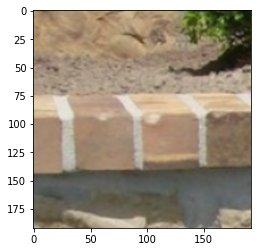

In [15]:
i = 5
test_img, test_label = preprocess(df_train_set['Path'].loc[i], y_train[i])
plt.imshow(test_img)
print(test_label)

In [16]:
train_ds = create_dataset(df_train_set['Path'], y_train, augment = False)
val_ds = create_dataset(df_val_set['Path'], y_val)

In [17]:
num_steps_train = tf.math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = tf.math.ceil(float(VAL_SAMPLES)/BATCH_SIZE)
#First try of DNN
def model_maker():
    base_model = InceptionV3(include_top=False, input_shape = (IMG_WIDTH,IMG_HEIGHT,3))
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
    input = Input(shape=(IMG_WIDTH,IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    predictions = Dense(N_LABELS, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

In [18]:
model = model_maker()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 192, 192, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                30735     
Total params: 21,833,519
Trainable params: 30,735
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])
model.fit(train_ds,
          epochs=40,
          validation_data = val_ds,
          steps_per_epoch = num_steps_train,
          validation_steps = num_steps_val,
         )

Epoch 1/40


In [ ]:
model.save('Inception_15_class.h5')

In [19]:
model = tf.keras.models.load_model('Inception_15_class.h5')

In [20]:
def read_img(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.image.central_crop(image, 0.55)
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    image = image / 255.0
    image = tf.expand_dims(image, axis=0)
    return image

def predict(image):
    ''' Arg: array of image of size 192, 192, 3
        Returns: list of predict labels
    '''
    result = model.predict(image)
    print(result)
    pred_tag=[]
    
    for i in range(15):
        prob = result[0][i]
        label = label_map[i]
        if(prob == max(result[0])):
            pred_tag.append(label)
        prediction = str(' '.join(pred_tag))
            
    return prediction

In [21]:
df_val_set

Path  Label
25     minc-2500/images/brick/brick_001842.jpg  brick
27     minc-2500/images/brick/brick_000217.jpg  brick
30     minc-2500/images/brick/brick_001510.jpg  brick
66     minc-2500/images/brick/brick_000100.jpg  brick
85     minc-2500/images/brick/brick_001596.jpg  brick
...                                        ...    ...
57458    minc-2500/images/wood/wood_000904.jpg   wood
57470    minc-2500/images/wood/wood_002397.jpg   wood
57474    minc-2500/images/wood/wood_000464.jpg   wood
57483    minc-2500/images/wood/wood_000973.jpg   wood
57498    minc-2500/images/wood/wood_000041.jpg   wood

[3750 rows x 2 columns]

In [22]:
# prediction_table is a dict with index, prediction, ground truth
val_predict = predict(read_img(df_val_set['Path'].iloc[2]))

[[9.9411052e-01 2.9984623e-10 2.4527621e-23 4.6764011e-14 4.2342141e-22
  7.9320883e-17 8.6679992e-18 7.2677801e-21 1.6662456e-22 3.7688461e-23
  5.1068070e-17 4.7585224e-03 1.1309036e-03 6.5282179e-17 1.3873962e-23]]


In [23]:
val_predict

'brick'

In [24]:
df_error_set = df_val_set

In [52]:
df_error_set['prediction'] = df_error_set['Path'].apply(lambda x: predict(read_img(x)))

[[2.1248606e-03 4.5607757e-14 1.8938061e-10 2.7150151e-09 4.5244388e-21
  2.1700751e-10 1.0205142e-09 5.2495409e-14 1.4767574e-15 9.4415899e-12
  6.3927792e-04 5.7427872e-02 9.3250966e-01 7.2246124e-03 7.3561736e-05]]
[[1.0000000e+00 9.8075299e-21 7.0669433e-32 1.9417902e-19 0.0000000e+00
  4.1740229e-27 6.0726890e-32 2.7634938e-28 0.0000000e+00 1.7746515e-31
  3.2043190e-33 8.5063672e-09 9.0475070e-20 1.1552222e-34 2.0166314e-28]]
[[1.9781830e-05 6.2353489e-28 7.9641037e-19 1.7404033e-25 9.2426970e-23
  2.0433923e-20 2.1090942e-19 5.1417484e-22 4.3736914e-16 1.1328586e-21
  1.2460739e-05 9.5526552e-01 4.4702232e-02 2.2747366e-22 2.4753852e-11]]
[[1.0000000e+00 2.1504501e-25 0.0000000e+00 7.9345831e-17 0.0000000e+00
  1.5028252e-26 8.8185166e-29 4.8432382e-37 0.0000000e+00 2.8189300e-31
  5.9281953e-31 1.5025672e-26 6.9501899e-10 8.7397421e-38 3.0240959e-32]]
[[1.0000000e+00 2.8149433e-16 8.3954001e-18 1.3936981e-26 5.9635010e-34
  6.9479987e-15 9.0202778e-21 4.0149906e-20 2.3601027e-2

[[1.0000000e+00 3.6823042e-31 0.0000000e+00 4.1198281e-19 0.0000000e+00
  5.7481011e-25 1.3378730e-29 1.9319860e-26 2.2404381e-37 1.4144625e-35
  9.2016232e-29 2.2121608e-12 1.2861511e-18 0.0000000e+00 1.6646288e-29]]
[[9.99094605e-01 8.41753661e-20 1.91114121e-28 3.21551029e-15
  5.93912530e-36 7.24422987e-27 5.50745899e-21 1.16812105e-17
  2.05059465e-31 7.32511397e-22 4.23112412e-17 9.01583291e-04
  3.83356337e-06 3.13832822e-15 3.75041842e-22]]
[[4.9242515e-02 1.3994988e-20 2.8921729e-37 1.3053342e-25 0.0000000e+00
  6.2327180e-27 9.5726768e-34 5.1427867e-17 2.3656062e-30 3.0278777e-27
  1.6749640e-17 9.5041758e-01 3.3988984e-04 0.0000000e+00 5.3818723e-23]]
[[9.9982208e-01 3.2968055e-12 3.7794625e-26 1.2774219e-15 5.5204045e-31
  1.0674245e-21 5.4001921e-20 1.4393761e-22 3.1036484e-28 9.1240073e-21
  7.7968349e-19 1.7793149e-04 1.8684008e-12 0.0000000e+00 1.4360529e-14]]
[[9.8392361e-01 7.0664792e-22 4.5166116e-20 1.4008488e-14 3.3254132e-36
  2.0297095e-12 1.4207128e-17 8.1371318

[[1.0000000e+00 0.0000000e+00 2.2534520e-27 1.0063284e-17 1.2771609e-24
  2.5616946e-17 6.9176837e-32 1.0177794e-24 1.5091502e-26 8.8052191e-11
  2.0068719e-11 3.3248874e-21 4.8000834e-09 7.1911403e-17 7.1799575e-17]]
[[1.0000000e+00 0.0000000e+00 2.1815222e-35 6.2569919e-20 0.0000000e+00
  1.2723882e-20 3.0072833e-28 8.8805819e-25 4.4248766e-25 3.2851915e-33
  1.0068227e-19 3.8092180e-25 3.9851949e-25 1.8744753e-33 1.5473666e-14]]
[[9.9989235e-01 1.7019508e-16 4.1213682e-10 1.7466324e-06 7.9887005e-24
  1.0236594e-14 3.8609428e-11 2.6110174e-13 8.7632290e-25 1.5666833e-18
  6.0870368e-18 3.7509092e-14 1.0554261e-04 3.5884653e-07 1.8827489e-20]]
[[1.19943451e-08 5.68436097e-26 2.58951585e-27 4.24545102e-27
  0.00000000e+00 1.11357006e-29 1.79972628e-31 4.05740653e-21
  0.00000000e+00 2.25809568e-30 1.11215251e-21 1.00000000e+00
  1.46802092e-22 7.46512170e-24 3.18499792e-29]]
[[1.0000000e+00 4.3883144e-33 1.0337529e-22 2.3105604e-15 9.3522371e-36
  1.2444809e-17 8.2226302e-18 7.6157622

[[1.0000000e+00 1.6959219e-27 2.0204469e-24 5.6914169e-17 0.0000000e+00
  2.7220437e-26 4.0866238e-29 1.9093379e-20 6.1632940e-37 2.4997655e-26
  5.3015921e-22 6.5971915e-12 1.5806674e-16 1.2862485e-34 5.3771674e-18]]
[[6.2424558e-01 6.2356904e-33 1.4539730e-25 8.1463045e-29 0.0000000e+00
  2.5912619e-35 2.1533957e-32 1.2544539e-27 3.4508484e-37 1.0544802e-27
  5.2133287e-13 1.4410475e-01 2.3164965e-01 3.1463174e-28 3.6372323e-18]]
[[9.9977487e-01 5.7222759e-28 6.6806949e-25 5.4916101e-20 3.7497761e-32
  2.2074706e-22 4.4545947e-27 1.5035761e-26 1.5054980e-20 2.7865493e-28
  6.2456322e-15 2.2508236e-04 5.3238657e-14 1.9407307e-27 6.6826964e-21]]
[[1.00000000e+00 5.01366032e-32 1.91708184e-27 1.53762907e-13
  0.00000000e+00 1.39958251e-30 4.77254879e-32 1.62817550e-17
  3.90320517e-36 1.20994745e-33 4.13552587e-27 1.75134862e-16
  9.54163472e-15 7.11561901e-29 2.35883538e-18]]
[[2.8541738e-02 9.6929319e-24 2.9444913e-04 8.5828447e-09 8.0525515e-06
  8.6930640e-09 9.3794239e-01 4.4011724

[[1.0000000e+00 1.8220567e-34 0.0000000e+00 7.9163182e-33 0.0000000e+00
  9.0726650e-28 1.6465018e-31 8.3607881e-33 0.0000000e+00 1.7420841e-34
  1.3268789e-22 4.5071743e-19 2.2205727e-20 4.5136449e-26 3.3119748e-29]]
[[1.0000000e+00 4.3033393e-25 1.7326276e-33 6.6340854e-20 0.0000000e+00
  1.3740369e-22 3.9736951e-29 2.1400804e-26 0.0000000e+00 1.5051572e-30
  3.8507195e-28 2.2698238e-15 4.4441726e-20 7.8926843e-24 8.4819594e-26]]
[[9.95128274e-01 6.31468522e-18 1.21914073e-22 4.70100556e-11
  1.63957757e-35 3.20551905e-08 2.06913357e-15 2.21584415e-17
  2.92827263e-22 1.37326238e-19 3.37982192e-06 4.68664709e-03
  1.81662806e-04 1.26560143e-11 1.11768615e-11]]
[[2.4844749e-05 4.1891776e-10 3.8133877e-10 9.8383856e-01 1.6305056e-16
  3.1914214e-11 6.4747971e-11 1.6005669e-17 5.8048690e-29 1.1435656e-14
  1.2827456e-09 1.2654914e-09 1.6136620e-02 2.9415960e-14 2.5312830e-13]]
[[1.00000000e+00 1.30606076e-26 1.73465303e-31 5.16913974e-18
  1.21258634e-32 7.88149996e-22 1.11674760e-22 4.

[[1.0000000e+00 5.2212181e-34 1.5932307e-36 1.5243131e-21 0.0000000e+00
  7.5215785e-16 1.0849631e-24 7.0787742e-21 1.5079538e-33 7.5591656e-33
  4.4382294e-26 2.5333235e-13 1.3029808e-18 7.5734330e-38 1.6123761e-26]]
[[9.9931097e-01 4.8815986e-16 9.5661881e-12 6.4638317e-10 3.6907916e-22
  1.0124759e-08 3.5640202e-10 1.1963502e-10 6.7604673e-15 3.4690981e-21
  9.2308383e-09 7.1017250e-19 1.6281588e-17 2.5378089e-25 6.8907946e-04]]
[[7.7723908e-01 1.0533709e-19 1.3207226e-29 2.2998064e-13 2.4060858e-38
  1.3519470e-18 6.0478742e-26 4.6137250e-25 1.5937420e-34 9.9068775e-19
  1.0077137e-11 2.2276089e-01 7.2759262e-18 7.7925671e-19 1.1744721e-16]]
[[9.9999988e-01 6.7900104e-12 7.9709164e-27 1.7834412e-07 5.1984528e-30
  3.2282223e-16 6.2771430e-13 1.3804351e-08 2.5370949e-28 3.6903289e-11
  4.7871704e-25 5.4024009e-23 6.8628198e-12 3.4342564e-12 1.7829833e-17]]
[[9.9999893e-01 5.0460860e-23 5.0165033e-33 1.0236711e-06 0.0000000e+00
  9.2604082e-24 1.3990253e-16 5.5985640e-30 0.0000000e+0

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0654239e-35 0.0000000e+00 0.0000000e+00 9.1332230e-36 0.0000000e+00
  3.0356407e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[[2.9945742e-27 9.9999869e-01 6.1561521e-19 9.4506147e-10 2.3431270e-27
  3.6681558e-15 1.5827312e-13 1.7107173e-24 7.1510430e-13 1.2725800e-06
  7.8266175e-18 2.3059603e-23 3.5271337e-22 2.5424613e-34 2.0817820e-25]]
[[1.5053926e-35 9.6637070e-01 6.6505427e-06 2.8014297e-02 0.0000000e+00
  1.3750936e-23 2.6278516e-14 2.5027015e-03 1.2971428e-09 2.8300419e-11
  3.1055743e-03 2.9400154e-20 9.7183682e-19 4.3373153e-18 2.3019543e-14]]
[[1.8056796e-33 1.0000000e+00 3.0700244e-29 2.2499009e-38 3.9042983e-33
  2.8735818e-26 1.2555445e-23 4.0327033e-28 0.0000000e+00 4.9756041e-35
  3.6109852e-24 0.0000000e+00 4.1334701e-22 2.1978774e-35 1.0142838e-23]]
[[6.53578298e-16 1.00000000e+00 7.05570880e-10 2.48678678e-08
  1.54623482e-20 2.54492409e-08 5.71591915e-16 1.24797478e-10
  1.

[[2.8352888e-32 1.0000000e+00 3.4436374e-19 1.4661998e-25 3.0560630e-28
  5.8407100e-34 6.5261061e-19 2.5007211e-32 5.1245389e-23 2.7822226e-31
  1.2901293e-36 0.0000000e+00 2.0109737e-24 8.8726407e-29 4.8655551e-36]]
[[0.0000000e+00 9.9999559e-01 2.0935512e-20 4.7927628e-16 1.0379041e-09
  3.0689382e-11 2.5506250e-25 1.2022788e-15 4.3760688e-06 8.2559390e-11
  3.2986455e-14 3.2341599e-32 2.5747039e-24 2.3094992e-32 7.2033541e-17]]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.7577459e-25 0.0000000e+00
  4.3456630e-28 1.8424842e-37 1.4390657e-31 1.8098491e-36 8.6492995e-30
  9.0804901e-28 4.1450758e-37 0.0000000e+00 0.0000000e+00 2.2296337e-31]]
[[0.0000000e+00 1.0000000e+00 1.2233932e-25 8.6306183e-21 1.3663080e-35
  1.0618456e-31 1.1199687e-29 1.7620814e-34 0.0000000e+00 2.8237179e-32
  5.9153117e-26 0.0000000e+00 4.9162630e-22 1.8167325e-35 2.0811198e-38]]
[[1.3973466e-31 1.0000000e+00 1.3814902e-21 3.1586573e-14 1.4594945e-22
  1.6297644e-12 1.1708754e-25 1.9981552e-19 2.3316459e-1

[[1.1352720e-31 9.9999976e-01 2.9213344e-22 2.8113178e-07 0.0000000e+00
  2.1224335e-15 5.6374737e-20 3.0347931e-19 3.0982463e-30 1.2422650e-18
  3.0740379e-25 1.6927562e-25 2.3751236e-18 3.5654151e-33 3.0262408e-25]]
[[0.0000000e+00 1.0000000e+00 9.9988556e-31 0.0000000e+00 0.0000000e+00
  5.1145454e-21 8.1917543e-27 2.2328189e-22 0.0000000e+00 9.6095699e-24
  2.1712530e-27 0.0000000e+00 4.5689412e-26 2.0061604e-33 0.0000000e+00]]
[[0.0000000e+00 1.0000000e+00 3.6433558e-20 1.5609088e-27 1.8977047e-13
  4.6594003e-23 0.0000000e+00 2.9247309e-18 0.0000000e+00 5.0756432e-10
  7.0017643e-17 0.0000000e+00 1.4283448e-33 3.7418658e-29 7.2720169e-26]]
[[0.0000000e+00 3.4214728e-04 3.7381325e-29 2.0165198e-19 0.0000000e+00
  4.8263928e-12 8.3185669e-29 2.3726518e-28 1.4460984e-26 5.5606522e-21
  9.9965787e-01 0.0000000e+00 4.7262999e-17 0.0000000e+00 5.1112027e-26]]
[[0.0000000e+00 2.2635713e-01 2.2271785e-23 8.7609778e-15 1.9939906e-34
  9.8535810e-14 1.0272857e-31 1.1589016e-15 2.1778915e-1

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.3577317e-30 0.0000000e+00
  2.1813647e-27 3.0211702e-30 1.5057954e-29 0.0000000e+00 9.6808008e-24
  1.2568937e-34 0.0000000e+00 8.1204561e-24 7.4978048e-30 0.0000000e+00]]
[[2.5407143e-24 8.2120788e-01 5.9639893e-09 3.4087134e-06 1.9303875e-12
  6.0703472e-04 5.9463700e-06 7.4287141e-07 2.9876510e-06 5.4705639e-18
  2.5014255e-12 6.4848685e-18 1.3210239e-03 1.7685094e-01 4.8628606e-16]]
[[1.4852920e-15 9.9968016e-01 1.2549529e-13 1.6545122e-15 1.4220351e-12
  6.3369682e-10 3.1132753e-05 4.1495255e-06 4.7043716e-24 2.7762105e-14
  7.2490694e-16 9.6246042e-19 1.1460092e-05 2.1823985e-04 5.4878234e-05]]
[[1.3217523e-19 9.9982375e-01 2.6855796e-12 8.1396801e-16 3.0239976e-19
  1.5904927e-11 2.8995251e-24 5.2678661e-20 4.3689104e-29 3.1225436e-08
  1.7620598e-04 1.5488666e-20 3.5622225e-08 6.4217327e-28 1.8708437e-19]]
[[0.0000000e+00 9.9999940e-01 2.9179953e-20 3.0418142e-20 0.0000000e+00
  8.5539965e-25 1.8589477e-21 7.6533361e-35 4.5894464e-2

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.6048587e-28 5.3740681e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.4496809e-34 0.0000000e+00 1.8672973e-31 0.0000000e+00 0.0000000e+00]]
[[2.2887561e-34 9.9999988e-01 4.3498129e-26 1.0118650e-07 2.3911027e-28
  3.0509187e-10 2.7147476e-15 5.5454088e-23 1.2248419e-23 1.0314629e-17
  4.0978367e-19 5.6585920e-34 1.4319005e-12 7.4897598e-18 1.7124561e-24]]
[[2.6161896e-31 9.9999988e-01 1.4038654e-15 4.4977640e-18 2.3393116e-31
  7.8886377e-12 1.3496825e-15 1.7509850e-19 3.9019513e-15 1.3930270e-13
  6.4385528e-09 2.2255231e-29 5.4138095e-08 6.3254472e-24 1.1220521e-20]]
[[0.0000000e+00 1.0000000e+00 9.6197804e-36 0.0000000e+00 2.4072178e-37
  5.1101275e-25 3.6985343e-32 1.8402027e-28 0.0000000e+00 2.6973269e-20
  5.1012028e-34 0.0000000e+00 1.9160884e-26 7.8050101e-26 1.7234012e-38]]
[[0.00000000e+00 1.00000000e+00 1.02986230e-18 1.35531639e-08
  5.66963186e-12 9.23511545e-11 1.08106696e-32 1.67031660e-20
  3.

[[2.9954439e-21 2.4367988e-24 1.0000000e+00 1.0741120e-24 2.6474210e-32
  1.3579447e-24 5.1596441e-18 3.3740480e-24 1.9541796e-17 3.2988585e-23
  1.6421812e-22 1.8402379e-28 9.2095882e-23 2.9204596e-19 0.0000000e+00]]
[[2.97594210e-03 2.32835198e-04 1.45603873e-09 1.62778901e-10
  9.30022010e-13 9.96106446e-01 8.09972152e-13 7.76415876e-11
  2.79882518e-21 5.32211328e-04 1.11522326e-10 1.50453052e-04
  1.24823294e-11 2.08587744e-06 1.33879157e-17]]
[[3.2472646e-33 1.0638441e-09 9.7954755e-09 3.0267296e-23 8.7496237e-29
  5.1795387e-12 4.1974685e-17 8.9018233e-23 1.7675412e-19 1.0000000e+00
  6.0384640e-14 0.0000000e+00 4.0917613e-19 1.1611297e-33 8.1895879e-22]]
[[0.0000000e+00 1.6021932e-32 1.0000000e+00 2.9223986e-19 6.2512789e-16
  0.0000000e+00 1.5692385e-18 8.4503970e-28 1.1723044e-27 3.6595162e-26
  5.9241398e-34 5.8661819e-21 4.5931726e-29 2.6208292e-20 2.1197778e-32]]
[[3.58054017e-28 1.00446295e-20 1.00000000e+00 3.53698661e-15
  1.21001095e-20 2.81640761e-21 2.57532506e-16 3.

[[2.0485216e-35 1.5920085e-07 9.8115200e-01 1.1192710e-09 1.8847939e-02
  9.8025138e-14 7.6303450e-11 2.9172150e-14 9.5378991e-12 2.5365445e-12
  9.2768930e-24 3.4455237e-37 1.5013550e-15 1.4752013e-21 5.5883553e-20]]
[[0.0000000e+00 1.9485406e-36 1.0000000e+00 1.3391458e-27 1.5843167e-12
  0.0000000e+00 2.8179220e-29 6.0686302e-19 1.1069300e-20 2.1591418e-22
  7.2211955e-37 0.0000000e+00 6.4409973e-28 7.9656886e-27 4.5394711e-21]]
[[8.6277078e-24 1.0981187e-28 1.0000000e+00 2.2763472e-20 7.3785424e-17
  3.2258879e-21 1.8568678e-33 4.7553773e-31 5.5011673e-29 2.3457030e-37
  3.0955133e-18 7.2749732e-22 3.8144181e-28 7.9115035e-29 4.5140901e-27]]
[[9.2127513e-37 5.5716343e-09 9.9951148e-01 4.3261304e-04 5.4545421e-08
  2.5964382e-05 6.4958950e-21 6.7744334e-12 5.1437229e-11 5.6835597e-10
  2.9941193e-05 6.6030182e-23 7.2525627e-12 2.5662094e-12 2.1061995e-13]]
[[2.0444771e-27 1.0534645e-17 9.1081202e-01 8.9046985e-02 2.3501536e-14
  1.8182636e-05 6.8437266e-06 8.5768406e-09 1.5323659e-1

[[0.0000000e+00 4.7492887e-15 1.0000000e+00 1.0302186e-28 2.3020816e-13
  2.2867931e-26 6.7851187e-34 0.0000000e+00 5.2390020e-24 6.6968736e-32
  4.8805640e-33 0.0000000e+00 7.7148301e-37 1.7602745e-26 6.9938899e-32]]
[[1.5476456e-20 9.9405944e-01 1.7904726e-04 5.5792900e-03 5.7405269e-23
  3.4231973e-09 2.2651430e-09 3.3937027e-05 1.5348485e-17 7.7486881e-08
  1.1832992e-04 2.7878697e-05 8.0789356e-08 1.9799361e-06 4.4515766e-14]]
[[7.4102773e-21 7.8713154e-11 9.9999845e-01 1.7070311e-12 1.5648939e-06
  7.4035186e-15 3.1131610e-13 1.5211457e-20 2.2877635e-14 4.0873036e-14
  3.3427506e-21 1.1910232e-26 1.8495297e-15 3.5633582e-25 1.6893660e-19]]
[[0.0000000e+00 1.5518880e-19 6.4847292e-03 1.0166733e-28 9.9351525e-01
  0.0000000e+00 1.7952948e-37 4.1129563e-35 1.9489792e-25 8.6036650e-17
  3.4338451e-34 1.8497269e-30 3.1108512e-32 1.9728590e-37 7.5292176e-34]]
[[0.0000000e+00 4.0290947e-33 1.0000000e+00 4.2957899e-12 1.7151284e-11
  2.8642218e-28 3.8591966e-17 2.6958613e-31 3.2282581e-3

[[5.8009324e-33 1.7922514e-12 9.9999022e-01 1.6795444e-14 6.0765096e-06
  1.7310972e-11 6.4503202e-15 3.7537231e-22 3.9059782e-23 1.5057256e-11
  1.6919202e-10 1.2915431e-16 3.7313964e-06 2.2587463e-37 5.2969540e-21]]
[[3.7658376e-06 1.4039956e-07 1.3517325e-01 1.2068789e-02 3.1330084e-04
  1.6952195e-03 1.4578976e-01 6.3799554e-01 7.7616278e-06 4.1423392e-02
  2.0411833e-05 2.2809712e-07 7.6028280e-04 2.3798309e-03 2.2368312e-02]]
[[7.27425398e-10 2.24660828e-11 4.04868304e-04 7.13151649e-10
  6.78046554e-14 2.05450118e-16 4.89562922e-07 8.81038234e-02
  3.41142972e-25 6.86906807e-19 9.11485136e-01 2.11643548e-18
  3.04904489e-07 1.16286536e-10 5.50017194e-06]]
[[0.0000000e+00 2.5020830e-13 8.4862155e-01 1.2786369e-12 6.4586029e-25
  1.5137717e-01 1.4449258e-15 5.3251844e-16 6.1803487e-13 1.3124829e-06
  1.5090919e-21 1.9390304e-19 2.5786421e-14 1.5063347e-09 1.3471789e-22]]
[[1.0003744e-06 1.8309184e-12 9.9999595e-01 9.1498151e-22 4.5318552e-22
  7.5103198e-28 4.0919371e-24 9.9086939

[[0.0000000e+00 1.3076043e-21 9.9999988e-01 9.8932421e-28 8.5342251e-08
  1.6677756e-28 1.0209702e-27 4.4562793e-26 9.9307180e-27 4.4822502e-31
  7.0026163e-10 0.0000000e+00 1.0627124e-24 3.7379792e-17 1.5931000e-32]]
[[2.5447878e-31 1.4157272e-33 1.0000000e+00 7.7426010e-30 0.0000000e+00
  6.2250657e-35 2.6780553e-25 1.1900353e-33 8.6068721e-38 9.5785241e-26
  1.5672170e-25 0.0000000e+00 9.7281439e-25 0.0000000e+00 7.1404030e-33]]
[[1.29595083e-30 1.05735814e-13 1.73473854e-05 9.99982595e-01
  1.71230854e-17 2.12692107e-21 8.21312371e-23 8.37774902e-12
  7.99994455e-16 2.23971651e-21 3.45512152e-09 1.29248741e-19
  3.36961289e-26 3.67244256e-12 1.13901461e-14]]
[[0.0000000e+00 1.3787669e-16 4.8766036e-02 0.0000000e+00 9.5123398e-01
  2.6915219e-26 2.4081275e-22 2.6803070e-23 1.2072841e-31 1.1745646e-28
  5.9800193e-26 0.0000000e+00 2.0790889e-38 9.7683598e-22 8.1856356e-19]]
[[2.2997763e-24 2.5797042e-27 9.9915290e-01 8.4708619e-04 7.1401862e-09
  7.9295497e-26 3.8280849e-15 2.2150372

[[2.1768054e-07 9.8846677e-18 9.9045269e-02 3.4721117e-09 9.6467696e-09
  9.7206181e-19 1.5899607e-13 4.7535051e-09 5.7519393e-20 1.2927804e-15
  8.9441237e-09 3.9095944e-03 8.5264897e-01 4.4395931e-02 4.8764097e-11]]
[[4.9926504e-31 1.0031166e-17 1.9704021e-23 1.0000000e+00 3.2464255e-31
  5.6443121e-22 3.0919982e-17 1.9348009e-21 7.7820606e-33 3.2825888e-16
  4.4929385e-21 1.7204082e-28 9.0983445e-21 2.0358334e-26 1.2205498e-10]]
[[1.0788557e-31 6.4437783e-20 6.8717763e-21 9.9985540e-01 8.0759291e-20
  2.7176581e-17 7.1044219e-06 1.3747840e-04 7.6833703e-24 5.0751051e-24
  1.0308882e-11 4.0410995e-12 1.7595918e-17 2.6235338e-18 1.8995387e-12]]
[[2.4945995e-36 2.8521797e-24 4.0555247e-18 1.0000000e+00 4.8441879e-34
  2.0740139e-20 2.0882798e-13 1.4737967e-12 5.3672608e-21 1.8329138e-16
  4.5290329e-17 1.6443008e-21 1.7175047e-19 1.3035730e-17 7.1618489e-17]]
[[7.9357625e-19 2.1578081e-16 1.8257054e-10 9.9896002e-01 2.1918937e-19
  1.5587316e-13 9.2208642e-04 3.0244598e-07 2.0247546e-1

[[2.8391975e-16 4.0163199e-14 1.6632496e-16 1.0000000e+00 2.5774281e-16
  1.8465155e-15 1.7592825e-17 4.9270157e-09 3.8690767e-15 1.5638336e-29
  6.7737362e-20 7.9459966e-11 3.4167869e-19 5.8578037e-26 6.8282267e-25]]
[[3.0714135e-37 3.6582667e-20 3.3791188e-24 2.1144862e-01 9.0868848e-14
  1.1102154e-11 1.7878109e-16 1.0923328e-17 7.8855139e-01 9.1065044e-11
  4.2862198e-22 3.8789878e-15 1.6372182e-08 9.9663620e-23 3.7617673e-15]]
[[2.62502775e-38 3.93562282e-27 1.51985664e-25 1.00000000e+00
  8.93871475e-37 1.06130564e-11 4.00383891e-21 7.18704516e-27
  3.61392479e-29 2.07909419e-25 2.75641824e-21 4.88944522e-36
  6.35849984e-30 3.50962251e-30 6.14874118e-35]]
[[2.0918996e-12 7.1589115e-05 4.3124996e-06 9.8074764e-01 2.5110622e-14
  7.1587856e-17 2.3529916e-04 1.1415160e-02 3.5953846e-08 6.0568710e-14
  4.7673737e-08 1.6051406e-14 5.8402844e-19 7.5146267e-03 1.1344729e-05]]
[[0.0000000e+00 2.3567216e-06 2.5087733e-22 9.9999762e-01 0.0000000e+00
  9.5283580e-18 2.4882243e-22 5.8589011

[[1.79059099e-16 2.56487458e-23 7.77270890e-27 1.00000000e+00
  1.68784918e-33 1.09985044e-20 1.95219025e-17 1.06867026e-20
  2.48731987e-29 6.39019512e-19 8.61452122e-24 3.64645988e-18
  3.29881249e-28 7.69980599e-22 4.42174031e-09]]
[[1.4827587e-25 1.2491141e-08 4.4814514e-14 9.9999988e-01 8.7446111e-08
  2.6426208e-15 9.2333733e-14 1.8295673e-16 1.1075942e-18 2.9084654e-10
  1.8488189e-16 2.6258306e-29 1.0653260e-17 8.0295136e-19 1.2288827e-20]]
[[1.7464899e-18 5.9424093e-10 2.8927858e-18 1.0000000e+00 7.1174527e-10
  1.5644410e-08 1.4380788e-15 1.5147068e-08 3.1810264e-22 1.1449020e-22
  3.0277265e-28 4.9191743e-13 2.2096261e-16 3.3516162e-14 1.5613928e-10]]
[[5.2351069e-21 3.9469676e-05 3.5693136e-27 9.9996042e-01 2.3305338e-32
  2.2915708e-15 9.8653539e-18 6.8379330e-12 1.4680462e-23 7.2796233e-08
  7.0896636e-11 2.8376594e-36 1.6710399e-21 2.9352429e-19 5.8320171e-27]]
[[1.8977546e-13 6.9661154e-17 3.0168680e-11 7.7620232e-01 1.4001858e-22
  2.6325209e-13 9.2367698e-03 2.1456084

[[4.3477699e-20 3.7541238e-19 3.3636750e-18 1.0000000e+00 3.0804762e-37
  3.9726887e-17 2.8532113e-18 2.6528492e-25 2.1880425e-25 2.6326197e-30
  5.2675404e-23 3.3305519e-27 3.8922498e-12 2.4835267e-22 3.6412661e-23]]
[[2.5559940e-17 9.7494538e-13 3.0292677e-10 1.0000000e+00 2.1333959e-19
  2.3363071e-08 2.8808083e-08 4.1240903e-11 5.3202079e-23 1.2878510e-16
  4.0495159e-12 3.0264286e-16 2.4876096e-10 2.8769126e-21 1.6176111e-13]]
[[6.1678793e-20 7.0398147e-13 7.4499013e-07 8.0066873e-04 4.1925173e-14
  8.2716757e-01 9.6173135e-13 5.0961392e-12 7.4406875e-10 1.9338031e-13
  3.4849737e-02 1.3718137e-01 2.2224960e-18 1.2350455e-08 4.1829664e-13]]
[[1.1193842e-28 3.8040843e-14 2.4134321e-23 1.0000000e+00 1.3763483e-25
  6.2025234e-20 4.0368056e-09 7.7211487e-10 9.8932210e-25 1.3802798e-27
  4.8361660e-15 3.9948560e-27 2.2748801e-20 1.5183322e-18 4.5689985e-09]]
[[4.0045198e-36 4.3550401e-17 1.0328965e-21 9.9999845e-01 2.5901877e-24
  1.5357388e-06 4.9409998e-21 3.4196014e-17 2.0654453e-1

[[4.0091950e-25 1.2678713e-22 2.6692988e-14 1.0000000e+00 6.9658508e-25
  1.9119865e-17 5.0092845e-09 3.3765634e-14 3.3520976e-24 1.2554841e-20
  9.3739584e-20 1.9475794e-16 1.4111783e-23 5.4563503e-17 3.5951163e-13]]
[[4.4416162e-18 1.2029419e-19 1.9882013e-12 9.9999964e-01 8.3989320e-23
  1.9895173e-16 1.2890161e-15 5.8125706e-11 2.2906945e-19 8.7403618e-18
  2.9388088e-19 9.0773906e-16 5.5357021e-17 6.3819771e-21 3.4916209e-07]]
[[1.5691316e-20 2.0249184e-12 1.8867503e-13 6.2395906e-01 5.2243639e-23
  2.8485060e-11 2.5089604e-03 2.0621011e-01 1.2157325e-18 1.3217192e-13
  2.9617866e-14 2.5309477e-12 9.2836340e-13 5.8820906e-17 1.6732179e-01]]
[[3.1167601e-32 4.4053189e-19 4.3722200e-27 1.0000000e+00 1.2739064e-23
  1.7018193e-27 6.1111599e-21 7.7531426e-10 1.4315377e-23 1.8671202e-30
  1.8661148e-24 7.4635120e-28 1.3977724e-17 2.1089129e-25 8.8858189e-21]]
[[0.0000000e+00 4.3863317e-14 6.3288819e-22 1.0000000e+00 2.2770523e-11
  3.6838751e-10 3.7338076e-15 1.0266237e-23 9.4203725e-1

[[1.91041788e-18 3.80842361e-15 3.78471558e-15 1.00000000e+00
  9.15223084e-21 2.24503565e-19 1.25830091e-09 3.73467872e-14
  2.58618513e-15 3.78901495e-18 4.98476408e-19 1.39931960e-17
  2.91207301e-18 1.04694385e-23 1.22710316e-12]]
[[1.2167503e-20 6.8233692e-07 5.3307542e-07 9.9999630e-01 2.2437576e-29
  5.6872724e-17 1.0219784e-07 2.2999309e-06 3.5118846e-16 1.4766213e-20
  6.3702240e-16 6.1644911e-08 5.0364840e-20 1.0996841e-10 5.1431168e-11]]
[[2.0312456e-24 6.5886242e-12 9.7147182e-13 5.6605947e-01 6.8175249e-14
  1.1072956e-11 5.3805469e-08 4.3394002e-01 4.4559380e-07 7.2890999e-13
  7.0707190e-12 7.1376254e-28 6.2562314e-14 1.4197600e-23 1.5754330e-15]]
[[3.1111026e-34 1.6565537e-12 5.0004735e-20 1.0000000e+00 1.2994968e-32
  1.4924929e-15 2.2300917e-10 4.4424539e-08 5.1517816e-24 1.6372335e-22
  4.8520060e-21 1.4793915e-25 1.8335003e-17 2.8434677e-31 3.9605088e-09]]
[[1.8696396e-34 1.2986699e-31 4.2785029e-20 1.0000000e+00 1.4658501e-29
  4.2984575e-29 1.3201039e-14 2.1410020

[[2.9519789e-25 6.6178710e-15 5.5957002e-17 1.3196816e-12 9.9999940e-01
  3.3376229e-11 1.4466764e-17 2.6622643e-11 2.3474776e-19 3.3083555e-10
  1.3437767e-11 2.9391022e-25 1.3518031e-10 4.5081137e-13 6.0774670e-07]]
[[6.33534064e-19 1.23299982e-22 1.68373057e-14 1.37738687e-27
  1.00000000e+00 6.77937874e-18 3.27406255e-22 1.59917045e-25
  1.23903875e-31 2.06178966e-25 2.69586482e-21 8.09901537e-17
  9.87232518e-12 1.02229276e-32 4.67854837e-15]]
[[7.3575837e-36 4.5588561e-27 5.5977569e-07 0.0000000e+00 9.9999940e-01
  5.6687203e-12 6.7950112e-26 3.6666105e-27 2.1185897e-38 7.9928002e-13
  2.0476822e-15 0.0000000e+00 1.4762968e-31 1.8770500e-33 2.2337495e-19]]
[[0.000000e+00 0.000000e+00 1.680159e-34 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 4.694145e-34]]
[[7.9088004e-06 7.6079965e-02 1.0701342e-01 4.6044970e-03 2.0269123e-04
  7.0708455e-03 3.8349573e-04 7.9245239e-01 3.5559353e

[[0.0000000e+00 1.4378461e-33 5.5583598e-12 3.2219153e-21 1.0000000e+00
  4.5081984e-30 3.3457559e-27 2.2097357e-31 2.4553154e-21 2.6080576e-17
  5.8907410e-27 4.9753768e-35 4.9571088e-37 0.0000000e+00 4.1484267e-23]]
[[0.0000000e+00 0.0000000e+00 2.2528047e-22 0.0000000e+00 1.0000000e+00
  3.1623416e-32 3.8465510e-35 2.7012672e-30 2.7180336e-37 6.1000935e-37
  0.0000000e+00 0.0000000e+00 1.8666544e-33 2.9887924e-34 6.9332689e-25]]
[[0.0000000e+00 0.0000000e+00 6.2750370e-28 1.0492390e-30 1.0000000e+00
  2.9715747e-38 0.0000000e+00 0.0000000e+00 6.3718839e-36 7.5746796e-37
  2.5206153e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0775852e-37]]
[[0.0000000e+00 1.2341620e-22 9.1912069e-21 1.8075895e-32 1.0000000e+00
  3.5946996e-31 1.2547691e-30 8.9619068e-20 1.3160564e-29 1.1334252e-30
  2.9793058e-37 0.0000000e+00 1.9893551e-27 2.0212379e-27 4.5554525e-34]]
[[5.3875439e-28 4.9426729e-09 2.5063876e-20 1.6362361e-18 9.9999511e-01
  4.2713328e-08 8.2812555e-13 1.3094970e-18 1.4000653e-1

[[0.0000000e+00 1.7676281e-20 1.6428011e-15 4.6337947e-20 1.0000000e+00
  1.5323540e-12 9.7489697e-28 7.1913641e-31 5.6439690e-29 1.1748547e-22
  1.1587339e-29 2.3916471e-38 5.7745450e-31 0.0000000e+00 1.4493771e-26]]
[[0.0000000e+00 1.0293265e-36 3.4596675e-23 1.2738570e-24 1.0000000e+00
  2.0544717e-33 2.6149440e-30 1.8688818e-36 0.0000000e+00 1.3121873e-20
  9.0748688e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.9352232e-26]]
[[0.0000000e+00 1.3136647e-35 3.1544402e-23 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 5.4841794e-35 0.0000000e+00 2.5868602e-27
  3.8594646e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0852330e-30]]
[[0.0000000e+00 3.9324625e-24 1.2628486e-26 2.6670570e-31 1.0000000e+00
  4.9624233e-38 1.6478183e-27 1.5817876e-18 0.0000000e+00 2.0292330e-28
  9.9357056e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5303896e-34]]
[[7.1935823e-32 1.4594296e-27 2.7841292e-19 2.0035160e-24 1.0000000e+00
  9.3034644e-26 1.5671245e-21 9.4791791e-34 8.2079239e-2

[[9.99605590e-34 2.10217772e-14 2.67337970e-18 2.47891355e-25
  1.00000000e+00 5.73537008e-12 4.22151424e-21 9.22409698e-18
  5.41065799e-28 1.34064495e-17 4.19238364e-15 0.00000000e+00
  2.81487542e-11 3.46671459e-20 6.27173790e-12]]
[[2.6557372e-38 9.1954920e-27 5.4365057e-03 2.5984979e-14 9.9456352e-01
  4.8729148e-19 1.1914948e-08 2.9863364e-15 4.5686189e-22 5.1364115e-18
  3.3171229e-20 4.0307881e-24 2.0769272e-20 2.2543742e-10 4.6411586e-25]]
[[6.4263944e-28 4.5945343e-16 1.5012694e-15 6.0963934e-15 1.0000000e+00
  1.4627324e-15 4.7567441e-21 2.7139309e-22 7.3238820e-26 1.3414253e-13
  2.1496916e-21 0.0000000e+00 2.1146206e-21 6.9973465e-28 2.5366702e-20]]
[[1.0063195e-19 8.3031500e-06 4.8937932e-13 2.6235413e-11 2.0898465e-08
  1.1367567e-04 5.9821511e-22 7.1615824e-07 3.3980846e-02 2.5385499e-18
  9.6589637e-01 8.5438072e-14 3.1061254e-09 9.0287553e-26 2.4466635e-08]]
[[1.0951980e-14 7.1393199e-16 2.2200952e-15 2.3748106e-15 5.6232856e-17
  1.8217624e-14 1.6752998e-13 9.9999988

[[0.0000000e+00 1.3940354e-38 7.0205342e-26 1.0813557e-32 1.0000000e+00
  9.4586717e-32 1.9342047e-27 3.1008522e-35 1.8686327e-28 2.2892998e-32
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.3888400e-36 1.1087721e-36]]
[[0.0000000e+00 0.0000000e+00 7.7810588e-31 0.0000000e+00 1.0000000e+00
  4.9871145e-37 0.0000000e+00 1.3543507e-37 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.2721855e-33]]
[[0.0000000e+00 0.0000000e+00 4.5728168e-24 0.0000000e+00 1.0000000e+00
  2.4130914e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[[0.0000000e+00 0.0000000e+00 2.5845662e-31 2.0013647e-36 1.0000000e+00
  5.2972310e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4544950e-33
  1.0076829e-35 0.0000000e+00 1.3104801e-37 0.0000000e+00 8.7892182e-17]]
[[7.0017951e-36 3.9262900e-35 4.1466765e-03 1.0077592e-19 9.9585330e-01
  2.7722853e-21 9.1534142e-27 9.3022050e-20 1.2288349e-1

[[8.1046300e-35 2.2896225e-18 3.5349652e-22 1.1144103e-09 3.9221799e-12
  9.7080729e-06 2.1723267e-23 5.0084448e-09 2.1240957e-14 6.3234597e-20
  4.1998965e-13 1.2930730e-18 1.5095058e-06 1.2529463e-09 9.9998879e-01]]
[[4.02987570e-29 5.46183288e-02 2.02128173e-24 2.13781820e-15
  3.23802208e-29 9.45381701e-01 6.95810104e-18 1.10793189e-21
  1.22079508e-37 4.55776569e-28 1.80159190e-21 3.06335334e-33
  6.36234365e-14 1.16615412e-21 1.12318486e-26]]
[[1.9850281e-38 1.5114671e-15 7.0773387e-12 3.8856649e-01 5.7767871e-15
  2.0744186e-09 1.8980455e-10 5.3257929e-05 1.1426348e-09 4.9633240e-16
  1.9995119e-17 3.6871226e-15 1.2200538e-19 1.1719366e-19 6.1138022e-01]]
[[2.0048987e-09 1.9743222e-05 5.2601616e-03 1.0121750e-04 1.4876327e-03
  1.6678318e-02 1.7045785e-06 9.4584185e-01 4.0528601e-08 2.5334895e-05
  3.0456796e-02 3.6325218e-07 2.6493377e-05 2.2807255e-06 9.8017226e-05]]
[[1.3726177e-14 3.1090618e-27 1.4093099e-03 8.1231090e-12 4.1058650e-19
  7.9768477e-05 1.6972765e-10 5.3275103

[[2.6668194e-27 6.9981020e-19 2.5964965e-15 1.0275744e-04 2.9445698e-18
  9.9949324e-01 3.1268873e-15 2.3023045e-11 3.3788365e-27 2.6675201e-28
  4.0344469e-04 3.0356662e-25 6.0852449e-07 2.5977997e-26 8.0736342e-09]]
[[1.5067161e-20 9.2626981e-20 0.0000000e+00 2.6952498e-27 3.0052513e-22
  1.0000000e+00 6.0617366e-26 4.0803266e-31 3.5601071e-30 3.9938329e-28
  5.4565282e-13 1.6789351e-19 1.8223213e-11 2.8538570e-38 3.0834419e-35]]
[[0.0000000e+00 3.0050026e-10 4.7058539e-09 2.1714796e-22 1.0271028e-11
  8.2825572e-04 1.8475892e-25 4.1841285e-18 4.1487391e-23 1.7981337e-07
  9.9917150e-01 2.5302514e-19 4.6046245e-21 2.2105753e-32 8.2527966e-16]]
[[9.9952972e-01 2.0072650e-21 1.1175547e-24 2.9575223e-10 5.8648893e-32
  4.2531046e-16 2.2495779e-18 3.5539931e-17 1.2172582e-22 1.0905575e-20
  1.4213912e-18 4.6969875e-04 6.4625442e-07 2.2138701e-21 3.0123401e-15]]
[[3.4791307e-19 9.8365581e-01 4.3727218e-12 3.0238761e-03 6.8036821e-18
  1.3297761e-02 4.6088893e-11 7.4220505e-16 1.5760191e-0

[[5.1948448e-37 3.7196683e-11 6.2946121e-16 2.3486676e-13 7.6479017e-07
  1.3352753e-02 8.5680598e-28 4.0250559e-24 9.7033059e-18 2.0546982e-18
  9.8664653e-01 4.6705350e-32 1.3173251e-16 2.8444709e-34 2.8773933e-14]]
[[1.8238106e-18 5.7364901e-11 6.9172406e-01 9.0765025e-07 3.0416724e-01
  2.0754887e-03 9.1533798e-07 5.9494389e-11 1.9378372e-06 2.0293521e-03
  2.2672669e-19 4.2281427e-27 2.1263205e-11 5.5933460e-21 1.1342301e-07]]
[[6.1475513e-38 1.8083737e-17 2.5848563e-18 1.1182069e-02 9.7870596e-24
  2.0808933e-02 9.2858849e-22 1.1333272e-10 3.5065878e-33 9.6800900e-01
  1.1543107e-16 8.6533653e-26 1.0669289e-14 1.6721488e-37 1.6017008e-19]]
[[7.9929595e-15 1.0626219e-14 1.6392793e-14 3.6288827e-18 3.2513207e-11
  8.4152669e-01 1.3362220e-14 2.7967565e-12 1.2913605e-08 2.3295471e-15
  1.5847324e-01 5.1156619e-14 5.2677880e-08 4.2998554e-22 8.3240652e-20]]
[[2.4706026e-10 5.8424768e-14 3.9215459e-19 9.4608793e-13 2.3716575e-07
  9.9991083e-01 2.0699883e-12 1.0273498e-10 1.4269917e-1

[[1.15659441e-27 1.01076865e-33 1.66600505e-26 6.76930389e-19
  0.00000000e+00 9.99760687e-01 1.18346292e-26 1.97361010e-29
  3.31024428e-31 9.17856652e-21 4.25618029e-24 8.46094316e-38
  2.39288638e-04 1.30354146e-29 7.45417310e-24]]
[[4.38837894e-23 6.01008572e-02 2.38762425e-07 9.10101300e-11
  3.69410309e-23 9.39898908e-01 1.44893784e-11 7.69765111e-14
  4.70324591e-25 1.92638164e-19 7.88947574e-10 1.04937466e-35
  8.36146864e-12 9.79631769e-24 2.73848164e-13]]
[[4.5724703e-13 7.4911267e-02 4.3387088e-13 1.6574113e-12 3.8088540e-23
  5.4564297e-01 1.6489016e-15 4.5956125e-10 2.8163635e-12 7.6073088e-06
  8.0187991e-02 2.9924670e-01 6.4064476e-10 1.0862276e-19 3.5050850e-06]]
[[4.27295635e-29 6.24225606e-07 1.62723436e-15 9.19684950e-08
  8.60397517e-11 9.99909043e-01 4.16822630e-08 1.15333600e-08
  2.84625340e-12 8.59776774e-05 2.19991812e-19 3.97196893e-22
  3.21912934e-13 4.10694429e-06 1.01013796e-07]]
[[2.49057194e-07 1.93783034e-09 5.95838223e-09 1.37431445e-04
  4.27909593e-1

[[2.4672515e-25 5.5089544e-07 2.5240349e-19 3.1471603e-12 4.7415224e-14
  9.9999940e-01 4.6366843e-23 1.3234502e-23 9.5535579e-26 3.9982561e-18
  5.9906807e-25 3.4216269e-32 6.8296346e-16 1.5270620e-25 8.5835739e-26]]
[[9.2385807e-21 3.8573041e-04 2.3447566e-18 4.3414999e-05 2.7956469e-15
  7.1388888e-05 2.2030880e-12 4.6471573e-11 1.2233374e-15 4.7070034e-16
  9.9949920e-01 3.9326247e-23 2.6051939e-07 1.5068147e-24 8.8622858e-20]]
[[5.2982756e-22 6.4128919e-08 1.3240290e-19 4.8619523e-07 5.5774338e-19
  4.0344619e-03 1.6009237e-08 1.1453742e-06 8.3131021e-21 3.8067956e-08
  3.0651270e-10 3.3430988e-14 9.9264938e-01 3.3193692e-09 3.3143817e-03]]
[[3.2806694e-26 8.2806917e-14 5.0477651e-31 1.4375035e-14 5.2771009e-13
  1.0000000e+00 3.9873985e-18 3.2916835e-14 1.5350456e-19 8.7146104e-15
  1.2570911e-10 4.6724211e-34 1.8175699e-14 3.8456422e-27 2.8847438e-09]]
[[1.8554293e-34 7.6266955e-14 3.0371692e-18 8.2695806e-06 6.0185307e-27
  9.9965656e-01 5.3944601e-05 3.0300112e-07 3.1726479e-1

[[0.0000000e+00 9.9998689e-01 1.4250371e-28 6.3044775e-17 4.7006214e-35
  5.3350053e-19 1.3163463e-05 4.9206348e-26 2.1452692e-24 2.8841805e-22
  3.9504174e-27 0.0000000e+00 3.7552333e-27 2.6732882e-37 1.0865487e-22]]
[[1.6059998e-20 7.9472438e-06 4.6342917e-15 4.6415873e-05 1.6317433e-07
  1.1964434e-08 1.5876846e-03 9.8131865e-01 1.9796752e-13 1.7039163e-02
  4.7785919e-15 1.0905720e-15 1.0276353e-10 1.0773911e-12 1.0782195e-16]]
[[0.0000000e+00 8.4090886e-25 3.1638348e-34 2.3671559e-10 0.0000000e+00
  4.2382160e-13 1.0000000e+00 6.0666381e-12 1.7150411e-21 7.9644817e-25
  7.8961412e-18 9.0651273e-27 5.3898344e-27 3.6551801e-17 2.3233078e-28]]
[[7.4737268e-14 1.0178221e-14 1.2639464e-10 1.2945066e-19 8.8931286e-22
  3.3802464e-13 1.8047151e-01 1.4971068e-19 2.6542077e-06 5.0740622e-20
  2.0144146e-13 2.5524812e-26 1.0495411e-09 8.1952590e-01 4.8949859e-12]]
[[1.3225804e-28 6.9397552e-14 1.6789327e-08 9.8872364e-01 5.0488162e-13
  1.6143114e-09 1.7290164e-04 1.1103540e-02 1.4539660e-1

[[6.3225921e-32 4.3917128e-16 4.7894396e-21 5.4011412e-07 7.3083168e-14
  4.0688880e-13 9.9999881e-01 1.4371546e-09 5.8666017e-13 6.0977716e-18
  1.2218872e-07 2.9598009e-26 2.6252309e-11 4.1462727e-07 4.9163359e-13]]
[[9.5331049e-11 8.7465514e-07 1.7422380e-18 5.1886509e-06 3.5201523e-05
  6.3398876e-11 9.2973393e-01 7.3103041e-07 6.5314926e-02 4.9090772e-03
  9.2323935e-13 1.0783665e-22 1.3114631e-18 4.7297555e-18 5.7565090e-09]]
[[1.2695089e-18 3.6527321e-13 2.9861175e-16 1.7175394e-08 1.0829680e-34
  3.5124982e-16 1.7413284e-01 7.5244260e-13 1.3422387e-20 4.3912519e-06
  8.2586271e-01 1.2707120e-08 6.5017808e-10 2.0349231e-19 6.6536017e-26]]
[[6.1819940e-27 7.5164071e-09 4.3721865e-03 1.9914710e-13 1.3432205e-07
  1.0975731e-06 9.9562573e-01 1.1957248e-07 4.0819201e-12 1.7155655e-11
  7.0269465e-07 1.6596903e-34 1.0889670e-18 4.5517574e-23 6.2374691e-20]]
[[2.5894478e-19 8.2822778e-05 8.5956806e-09 9.9983609e-01 4.6031809e-10
  4.5016341e-15 5.2753519e-05 8.3915264e-11 2.0006364e-1

[[8.46906326e-22 2.45739595e-10 1.57754365e-02 1.20283346e-14
  5.27765939e-12 2.91895855e-14 9.84224558e-01 3.93677819e-17
  2.33096820e-33 4.01259378e-21 8.52526274e-16 2.12174001e-25
  2.43481485e-10 2.53293927e-16 2.81951592e-17]]
[[1.8867463e-09 7.8942194e-19 5.8967783e-18 5.1962923e-10 1.1266661e-17
  3.3331629e-11 3.9684090e-01 2.5274733e-16 4.9935020e-28 6.0394566e-23
  2.1613237e-11 7.2012356e-14 1.7667769e-02 5.8549142e-01 4.3023771e-17]]
[[2.8370321e-31 9.1928895e-21 2.0730688e-16 2.9656559e-13 4.0722539e-32
  2.9650548e-14 1.4914343e-15 1.6803417e-15 2.4919140e-31 3.4354823e-23
  3.9182999e-15 1.2018836e-25 9.8568670e-18 7.9179432e-12 1.0000000e+00]]
[[9.6525364e-22 6.4960460e-08 1.7417691e-09 2.0586922e-05 1.5584351e-12
  3.7207282e-01 6.0477996e-01 2.2636410e-02 1.8886938e-05 4.7122163e-04
  6.0722357e-08 5.1042549e-30 2.1152363e-13 6.2709317e-19 8.2613352e-12]]
[[4.64782347e-13 1.05200113e-10 1.55951216e-06 1.31620688e-03
  4.69507957e-14 5.25230462e-07 5.48187912e-01 3.

[[4.66736863e-21 1.13603626e-07 3.78639564e-10 2.20754628e-05
  2.54774483e-14 6.77054995e-05 3.93712195e-03 9.94156480e-01
  2.33147915e-15 1.20703385e-08 8.92672164e-04 2.61552932e-15
  9.07847716e-04 1.60734926e-05 3.58201868e-09]]
[[1.1480880e-18 4.2038930e-17 2.1746211e-09 9.6826482e-01 4.4049112e-21
  2.5419522e-10 3.1043477e-02 6.9160399e-04 9.1041718e-22 3.2500878e-19
  4.6056432e-08 1.3118224e-19 3.1697494e-14 3.3584329e-09 4.2274237e-08]]
[[2.8398913e-33 9.5646733e-01 4.4706972e-08 1.8202476e-02 2.9240749e-19
  5.7858549e-04 2.1295143e-02 3.2007771e-05 2.0851966e-03 1.1895521e-09
  9.4945574e-07 1.7878422e-24 1.3354704e-03 3.3456965e-12 2.6851226e-06]]
[[1.5871609e-17 3.3976821e-17 5.9529761e-26 4.5935453e-11 3.2284518e-18
  1.9057564e-13 7.4553299e-01 2.5978505e-08 2.0211767e-18 1.9489317e-08
  2.7612852e-09 2.2205284e-13 2.5446698e-01 5.2160082e-16 6.6135124e-13]]
[[4.19438126e-22 1.10599565e-14 2.16872770e-11 4.50560219e-06
  9.53016928e-15 2.01801398e-14 9.99995470e-01 7.

[[7.3982432e-36 1.1804681e-07 6.4639801e-19 9.9880493e-01 2.7117914e-24
  2.4155739e-08 8.2776976e-09 5.3435750e-13 7.4505916e-26 4.2741959e-24
  2.5163856e-14 8.9738660e-27 2.5862288e-16 1.4912860e-12 1.1949689e-03]]
[[7.8207494e-30 2.8765920e-05 1.5497024e-08 1.8182160e-10 1.1278048e-06
  2.0403053e-07 5.7779162e-06 6.9885498e-01 2.5192946e-01 3.3172633e-02
  1.6006824e-02 8.4147512e-19 1.6243168e-07 5.8549525e-13 9.6710863e-08]]
[[3.8363666e-12 4.5794673e-05 7.5603372e-09 6.5652597e-07 4.8908580e-04
  8.3621408e-11 2.2848557e-12 9.2313997e-03 1.1671503e-16 6.1339357e-08
  4.9075142e-02 1.2540769e-12 9.4115788e-01 2.1249461e-10 5.1316686e-08]]
[[3.0427411e-10 3.8958722e-01 1.1379838e-01 7.4804490e-03 5.4012244e-08
  3.4346327e-02 1.0077364e-01 1.1941219e-01 5.0489894e-07 2.3393331e-01
  1.0235283e-04 2.8398869e-10 5.6211872e-04 8.5979303e-07 2.5990876e-06]]
[[8.4447380e-12 4.9501461e-05 6.0649914e-15 6.0756975e-05 1.1549331e-18
  5.4096425e-09 1.0239710e-04 2.3738064e-16 4.3049801e-2

[[6.3876833e-27 9.0000520e-17 1.0582364e-20 1.0224025e-16 2.5133177e-31
  1.4905596e-21 1.0000000e+00 1.0882281e-19 1.6432686e-18 9.0294966e-15
  6.8904467e-26 4.0224687e-29 1.2580039e-23 7.0840562e-32 4.9720538e-36]]
[[7.9990642e-17 2.7306837e-18 6.5847928e-18 5.7732581e-17 1.8167382e-34
  1.6623774e-25 9.9999881e-01 1.1739311e-06 8.9800866e-31 1.2697638e-12
  1.0760489e-27 1.1364708e-24 1.5321090e-24 9.2989091e-19 4.4213777e-33]]
[[0.0000000e+00 1.3253802e-16 1.3857205e-17 9.9999976e-01 1.8598425e-28
  9.5652329e-18 1.5597981e-16 1.9352129e-07 2.0568243e-25 1.0332669e-31
  2.9808373e-16 2.2904705e-24 4.5120071e-19 7.5988032e-25 1.3564004e-18]]
[[0.0000000e+00 4.6728793e-20 5.9647127e-31 2.8145265e-21 2.7116808e-24
  6.3970350e-07 2.7786424e-19 8.6292790e-10 5.4708556e-31 5.5262595e-28
  5.2498086e-14 4.2596722e-36 2.9710750e-15 3.2134287e-23 9.9999940e-01]]
[[4.1502923e-07 3.3521615e-22 9.9614584e-01 2.1895179e-10 3.1456967e-18
  9.3943715e-16 3.8527183e-03 6.8666027e-14 6.5314173e-1

[[5.7504067e-11 5.3585372e-11 6.4370629e-16 4.3362371e-09 7.7529563e-14
  8.2688194e-09 7.1197780e-07 9.9998951e-01 6.5019115e-11 2.0974132e-07
  5.2683237e-14 1.2479423e-18 1.7719722e-11 8.6896726e-11 9.6240474e-06]]
[[3.4957280e-30 4.5775490e-09 9.1997489e-18 1.7173095e-11 1.9575558e-14
  2.0957302e-17 1.4530082e-05 9.9998522e-01 5.9573730e-24 2.8686546e-11
  1.3297151e-10 1.9279980e-17 2.8037584e-07 1.2610096e-12 6.9863143e-11]]
[[4.4436481e-30 7.9835001e-19 1.7939668e-06 9.9997485e-01 4.3029540e-09
  2.8963642e-13 2.3112300e-11 2.3380708e-05 1.8659254e-24 4.9176771e-22
  9.9759940e-12 7.2993419e-28 1.1119961e-08 1.4287465e-23 3.1216942e-15]]
[[1.84602220e-06 2.72779130e-06 6.70641809e-09 1.13200025e-04
  3.26114616e-07 7.90453303e-09 4.70453426e-02 9.51477945e-01
  3.91946448e-10 7.03732050e-09 6.52826348e-05 1.54053541e-11
  3.04593093e-04 9.88850719e-04 1.53391149e-08]]
[[6.9080504e-14 1.8677916e-08 6.5692668e-10 4.0983204e-07 6.8893467e-12
  5.2571454e-09 3.1570171e-06 4.5657814

[[3.1206053e-21 9.3882322e-19 1.3319545e-14 9.4451536e-07 5.6717738e-25
  7.0642360e-11 1.3758792e-11 9.9999905e-01 1.0053707e-12 3.9569726e-16
  2.4473696e-13 2.2670911e-19 7.2929536e-12 1.9596237e-13 3.4559411e-10]]
[[2.3554652e-09 1.4654969e-08 6.8058836e-04 1.7300773e-04 3.6029050e-07
  5.0182379e-04 2.1719028e-05 9.0512186e-01 2.2728153e-13 9.1057591e-02
  8.3897256e-05 3.1546552e-09 1.5387413e-07 5.2208073e-09 2.3590424e-03]]
[[5.4183961e-21 1.0255716e-04 5.5750815e-10 3.5226061e-05 6.2066546e-10
  1.3131637e-03 2.4987150e-03 4.8700623e-02 7.6131572e-14 2.1006436e-11
  3.5290711e-04 3.7662914e-11 9.4699299e-01 3.8405478e-06 2.6484454e-08]]
[[7.8207238e-15 1.4386994e-05 2.6713896e-03 1.2849713e-02 5.9035334e-13
  8.3278275e-05 6.9920992e-05 9.8365098e-01 3.8264534e-09 2.4525994e-07
  3.1064617e-05 1.1649677e-16 6.1190099e-04 8.1070387e-11 1.7186983e-05]]
[[1.5307827e-15 5.3442842e-14 3.0022272e-17 1.4161859e-07 2.0880147e-11
  2.2960206e-02 8.9249697e-06 9.7703052e-01 4.5339295e-1

[[3.4027114e-10 1.0823379e-07 3.0862299e-07 4.6489136e-03 8.1402367e-12
  2.3493955e-02 9.5878100e-01 4.5473934e-03 4.6298392e-09 5.2933989e-04
  2.0618257e-03 6.8951948e-08 2.6793261e-05 5.9101633e-03 1.4774292e-07]]
[[1.2136427e-07 4.3720053e-14 7.1870552e-12 2.3766927e-02 2.9597078e-07
  2.9656155e-09 4.8790604e-08 9.7623116e-01 2.6708935e-24 4.5568678e-15
  1.3706551e-10 2.6346612e-09 1.3586199e-06 1.2672604e-16 2.2064540e-12]]
[[1.29507816e-09 2.18783680e-04 1.68255710e-07 4.99746937e-04
  2.80171841e-09 7.54627251e-07 4.96846740e-04 9.98304129e-01
  2.60530351e-06 2.38393084e-04 7.91233469e-05 4.72087613e-08
  1.07653934e-04 5.97681947e-06 4.58490140e-05]]
[[6.5774297e-09 4.4709998e-07 3.7174375e-04 4.3612627e-06 8.4343637e-06
  7.9263024e-05 4.3541318e-04 9.9897122e-01 1.5135063e-08 3.1861643e-06
  6.7786394e-05 3.2338090e-08 2.6085601e-05 9.0310471e-07 3.1194424e-05]]
[[1.11552524e-10 2.76718993e-07 4.10243445e-07 4.35916945e-06
  1.03468811e-09 4.93281186e-06 1.28439802e-04 9.

[[4.0657451e-09 3.8195674e-03 1.5998865e-04 8.6915839e-05 8.9414852e-06
  3.4219236e-04 3.9130260e-05 9.9513704e-01 5.6601886e-05 2.0441163e-05
  3.4828654e-06 8.1614471e-10 5.3988326e-05 4.5455054e-05 2.2623337e-04]]
[[6.2808709e-20 1.9185795e-07 6.3685213e-09 1.1360740e-12 3.1646239e-05
  6.2410160e-14 4.6880944e-09 9.9992192e-01 6.4472686e-16 3.2608476e-09
  3.8547728e-11 4.5997225e-10 7.9853936e-11 4.4814991e-05 1.4134561e-06]]
[[6.0637804e-21 6.6344658e-10 2.4668029e-14 1.4731359e-10 1.3994550e-08
  1.6510310e-09 1.3691001e-09 9.9999881e-01 1.0953575e-18 2.3329811e-09
  1.6174464e-12 3.8963971e-16 9.9856823e-07 2.5479519e-08 1.1124348e-07]]
[[1.0776727e-25 8.4964468e-06 6.4079895e-17 3.5632592e-09 8.7915525e-10
  4.1722647e-13 1.1369202e-08 9.9999118e-01 2.9254181e-19 1.6147895e-12
  1.2104878e-08 5.0857672e-20 1.4065216e-09 4.0327416e-07 2.9278528e-11]]
[[5.3629534e-17 6.3726878e-13 3.6668673e-18 1.0000000e+00 2.0047665e-27
  1.6855851e-17 9.1198005e-10 3.6878017e-08 1.1785001e-2

[[1.0888353e-11 6.6526788e-01 2.8245742e-22 9.0202690e-09 1.5944897e-14
  1.5513564e-07 6.2939648e-10 3.3342206e-01 1.1034161e-10 2.7141125e-19
  7.4386795e-04 3.6630946e-33 1.8229269e-04 3.8372338e-04 5.2343026e-12]]
[[7.4381786e-38 1.4255971e-09 1.9213074e-26 7.3705747e-04 2.5856848e-13
  1.4138830e-01 5.2083045e-13 8.5787463e-01 1.4506411e-15 1.3521552e-17
  2.4364978e-12 6.3774252e-22 8.2948561e-14 6.8366857e-21 8.7053533e-12]]
[[1.71061880e-21 1.77341644e-06 1.79181432e-17 2.90475283e-10
  2.93708137e-22 3.10224963e-13 5.04914215e-06 9.99989152e-01
  2.72813303e-29 1.55141330e-10 1.91872027e-06 9.58873958e-09
  2.09304153e-06 1.00769484e-13 1.10165765e-18]]
[[1.4327887e-38 2.9070769e-19 4.7062583e-22 1.6894914e-11 2.3021180e-27
  7.5940984e-13 6.9544241e-20 1.0000000e+00 7.9065384e-26 3.9674960e-16
  1.0836878e-19 1.3034047e-31 3.5255769e-15 9.3369350e-23 3.6077009e-13]]
[[5.6145834e-27 4.9205718e-12 2.2151194e-19 9.4515109e-01 4.9321541e-17
  1.4682020e-07 3.8220149e-11 5.4847591

[[4.6290711e-16 1.9304514e-14 1.8151598e-21 3.0270717e-04 1.7455953e-14
  1.9056558e-06 5.7059769e-12 9.1209598e-16 6.8246532e-05 4.8447555e-07
  9.9962664e-01 1.9115464e-13 1.4497258e-19 1.8207471e-16 1.8003688e-20]]
[[1.7866614e-23 9.7411535e-30 1.3810508e-09 4.5550829e-21 2.3356838e-30
  7.1002940e-23 4.7796882e-18 1.0933265e-09 1.0000000e+00 1.2903055e-15
  5.4957226e-11 6.3428745e-15 3.3467313e-09 1.9676891e-17 1.9529967e-15]]
[[0.0000000e+00 1.8684136e-11 3.5168548e-25 6.0316188e-09 2.3638312e-21
  1.0914831e-12 6.0280658e-20 1.6200507e-20 1.0000000e+00 1.3810677e-15
  2.9852122e-13 2.6161255e-27 3.5949187e-31 4.4980163e-13 3.0546830e-16]]
[[2.7479059e-09 4.7024634e-30 1.3063906e-14 1.1756378e-14 1.5927397e-24
  4.2938240e-09 3.8508399e-16 1.6917994e-09 9.9999845e-01 8.4422908e-07
  5.4536434e-07 5.7730866e-22 1.3774513e-07 1.3953512e-10 6.8998680e-14]]
[[1.0053206e-25 1.1409526e-09 7.2847683e-12 3.0253513e-14 3.1720824e-11
  2.2288653e-07 1.1284892e-19 2.6213945e-04 9.9973077e-0

[[1.6086676e-23 2.3131842e-11 9.6755903e-10 1.9575335e-13 4.9727173e-06
  7.1835246e-15 3.2881751e-18 2.2573793e-16 9.6038175e-01 5.0157802e-11
  3.9613388e-02 2.4506794e-24 9.2262760e-11 1.0921266e-08 1.9023110e-09]]
[[9.50907259e-35 1.26498135e-05 1.92417578e-14 1.49267709e-09
  1.99524251e-11 7.34795412e-06 1.63777767e-25 2.55811077e-21
  9.99971509e-01 7.15313854e-06 7.90162749e-14 1.33138974e-06
  4.66273596e-15 3.88764811e-32 2.92410996e-12]]
[[1.4878960e-35 2.1843980e-25 1.6271788e-21 7.5703731e-15 1.6192566e-24
  1.2262537e-16 1.2935177e-24 6.3094930e-32 1.0000000e+00 4.7055238e-14
  2.2954725e-18 2.3758038e-33 1.9159014e-23 7.0600228e-31 6.3644695e-30]]
[[2.1118169e-35 1.0404545e-08 8.0451345e-01 5.3000082e-10 8.3285442e-33
  6.2269517e-10 2.4166175e-18 2.2795717e-05 2.5644110e-04 1.7718767e-18
  1.2231463e-10 2.8099440e-24 1.9920176e-08 1.9520725e-01 2.6221539e-17]]
[[0.0000000e+00 1.4125695e-13 1.7922868e-15 5.3572502e-09 1.4072177e-21
  1.3719248e-09 7.9107037e-18 1.0857730

[[9.3146466e-34 8.7873766e-16 3.3561754e-11 2.9376131e-02 5.9613708e-16
  2.8018591e-03 9.3938422e-01 1.5359901e-02 1.2770776e-02 1.0507726e-08
  2.6600822e-04 1.4990693e-18 3.8833005e-15 4.1209885e-05 7.3545328e-12]]
[[0.0000000e+00 1.4899555e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 8.7477572e-36
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[[3.4566355e-34 1.2604687e-04 1.6232860e-17 1.9147756e-13 2.2949893e-09
  1.8437184e-15 4.0789249e-21 4.1668672e-15 9.0105194e-01 2.4491860e-12
  9.8821945e-02 1.9074189e-14 4.3145229e-19 3.1963098e-23 5.6250627e-08]]
[[0.00000000e+00 1.21393265e-33 2.15012615e-21 2.06094084e-17
  1.24788073e-08 4.70733691e-29 2.12576360e-38 0.00000000e+00
  1.00000000e+00 3.09445941e-20 1.11063303e-24 1.67372013e-38
  1.94552512e-36 0.00000000e+00 4.47951926e-22]]
[[2.1665397e-14 3.5067721e-08 7.4870038e-15 8.7062080e-11 1.3962099e-19
  5.1600178e-04 2.1773233e-06 2.1598213

[[0.0000000e+00 2.6137090e-29 5.9597924e-20 9.9999630e-01 3.6635318e-30
  1.3642208e-26 2.4075499e-36 6.7597660e-22 2.6073741e-15 1.6740829e-17
  3.7352927e-06 3.8607815e-20 4.7025863e-27 0.0000000e+00 2.6500317e-22]]
[[3.1428992e-20 2.9388534e-18 4.1725753e-17 7.0383560e-12 2.1613452e-32
  1.0358991e-15 1.8661790e-22 9.5768827e-01 8.2583820e-06 2.1064302e-14
  2.2144027e-06 1.3749321e-22 4.2301267e-02 1.5628572e-10 1.9989187e-16]]
[[0.0000000e+00 3.5538373e-12 8.9765640e-21 6.2478062e-10 5.5250867e-38
  2.4838881e-25 1.5267022e-21 9.3992354e-17 9.9999821e-01 1.7794637e-06
  4.6860056e-15 8.7461311e-23 4.2648851e-14 1.5340614e-24 5.3587459e-19]]
[[5.8752847e-25 1.6368979e-20 1.8209853e-13 3.8016946e-12 1.7468369e-25
  3.9178721e-12 1.1400290e-08 3.5614758e-17 1.0000000e+00 1.2478015e-13
  2.5517139e-27 5.2462825e-31 1.7200421e-19 8.3630600e-24 1.2999384e-24]]
[[0.0000000e+00 3.7211669e-15 0.0000000e+00 9.2508924e-15 1.7028675e-24
  2.4167012e-24 2.9411151e-30 6.2044374e-21 1.0000000e+0

[[5.3445744e-24 4.9970894e-16 2.0415831e-31 5.7496756e-19 8.2310765e-32
  2.4877831e-23 5.8987625e-14 2.3216728e-17 1.0000000e+00 1.9888897e-22
  5.1034492e-31 0.0000000e+00 1.6441489e-30 9.7388921e-29 2.5014979e-29]]
[[7.5035143e-26 3.4054259e-27 1.4996813e-26 6.5887724e-25 4.8062801e-30
  4.2394168e-26 2.2797450e-20 2.4204240e-28 1.0000000e+00 1.3080285e-21
  8.3719481e-28 6.8306726e-26 1.5011382e-22 3.4732102e-22 3.6812567e-28]]
[[4.9019437e-32 1.9303689e-05 1.5203082e-16 1.9450001e-17 1.5957982e-03
  1.4432073e-11 2.6350306e-13 1.9417836e-16 9.9797529e-01 2.1163785e-05
  2.3000330e-06 8.2238482e-17 3.8613973e-04 4.3910765e-31 3.6998234e-12]]
[[0.0000000e+00 6.3246243e-25 7.5950394e-32 6.1768702e-31 1.2760486e-12
  4.7532264e-28 0.0000000e+00 3.5795031e-35 1.0000000e+00 2.3474560e-23
  1.4135865e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0356962e-27]]
[[2.6703493e-26 5.7964494e-25 1.7899963e-22 1.3970069e-12 1.7490488e-25
  6.4361550e-12 3.7925631e-13 1.4202036e-19 1.0337720e-0

[[1.1719568e-27 2.8206110e-01 3.0874304e-08 2.5828744e-08 4.4735630e-15
  2.4093288e-18 2.2194558e-06 3.3924460e-22 8.9724404e-15 7.1679264e-01
  6.5546998e-13 9.1017306e-34 1.1439581e-03 1.7450271e-25 1.8296411e-14]]
[[8.7014384e-17 3.2833369e-09 9.8498768e-01 7.2874753e-12 4.1288931e-16
  2.8423611e-07 3.7739852e-08 7.6706118e-19 4.4333204e-25 1.5586140e-08
  2.8189031e-18 5.5277705e-15 1.4357131e-10 4.5750940e-26 1.5011978e-02]]
[[2.1727993e-20 2.1214077e-11 2.6830497e-12 8.7213469e-01 2.2441706e-17
  1.6032381e-08 5.9876314e-05 3.9419505e-16 2.8182215e-13 3.9830483e-02
  8.7974936e-02 7.9682916e-35 7.9849677e-12 2.4644939e-10 4.3883470e-31]]
[[0.0000000e+00 4.9030657e-28 4.5222890e-23 3.9690291e-15 2.7031922e-03
  1.0623418e-06 1.6272382e-18 6.5573095e-17 3.3555044e-23 9.9729580e-01
  6.6101601e-22 4.5832195e-35 6.1890346e-19 1.4101257e-36 9.4285249e-17]]
[[0.00000000e+00 4.70989403e-20 7.96358142e-16 9.15762674e-11
  4.13909365e-05 4.66941471e-18 5.91269065e-21 6.84167816e-27
  8.

[[2.0365089e-33 1.1087841e-14 1.0221723e-23 9.9999964e-01 3.6299357e-07
  1.7531114e-10 8.6714767e-12 6.1690691e-10 8.2238954e-15 8.2913933e-09
  6.5754246e-14 0.0000000e+00 1.0579618e-12 1.9288717e-17 3.6177955e-16]]
[[6.23123559e-29 9.31957744e-13 4.33440611e-04 3.98278578e-13
  3.45896426e-17 3.98356653e-10 1.37370455e-17 4.85834852e-02
  1.34969561e-03 9.49620008e-01 2.11728834e-09 2.43620924e-19
  2.33214132e-06 1.70451109e-24 1.10485407e-05]]
[[3.33079987e-11 1.22107815e-17 3.43240031e-13 4.54789121e-03
  2.36061581e-15 5.58473687e-07 1.12253571e-16 9.94880080e-01
  1.21790675e-15 5.65361697e-04 4.49820817e-07 2.34848851e-09
  5.53437121e-06 1.20589592e-08 1.63198847e-11]]
[[1.4303335e-16 1.3259180e-10 6.2510644e-27 1.2331019e-05 1.1234112e-21
  5.4726011e-01 9.4328745e-05 1.6734218e-17 4.5431425e-10 4.5263320e-01
  1.6681966e-08 3.3392788e-23 4.7965189e-18 4.8414821e-11 2.3660756e-11]]
[[9.3600250e-25 4.2798305e-08 3.8819576e-11 3.4643439e-13 6.8395611e-10
  7.8061674e-10 7.3456

[[0.0000000e+00 8.0233073e-32 3.5474210e-21 1.5026292e-20 2.4264766e-15
  9.3318739e-09 7.3083864e-35 4.9189163e-26 0.0000000e+00 1.0000000e+00
  1.1761380e-13 0.0000000e+00 1.6142815e-14 5.3412918e-32 1.9329575e-35]]
[[4.4059405e-17 7.3098407e-13 2.4036987e-16 9.5352519e-01 8.7895957e-09
  1.9181491e-03 1.2072792e-14 1.3787629e-08 1.0927078e-10 4.4556666e-02
  7.6640055e-10 7.6163539e-25 1.5160548e-12 2.7738242e-10 2.0511840e-11]]
[[0.0000000e+00 6.0064981e-10 1.7679122e-27 2.4870096e-05 2.4315254e-09
  1.3008652e-11 7.6046763e-07 1.2588959e-10 4.5055534e-22 9.9935204e-01
  1.6051594e-11 5.1409791e-34 6.2161725e-04 1.6262762e-10 7.0363421e-07]]
[[2.33900399e-12 7.94501319e-14 2.75045865e-16 6.15491081e-05
  1.07675845e-23 1.13380395e-10 1.15981569e-09 2.64227035e-13
  5.37040590e-09 4.67757881e-02 8.60151768e-01 1.14477363e-17
  1.87411628e-04 2.45671188e-20 9.28234234e-02]]
[[1.1188364e-25 8.6238100e-07 5.0739946e-13 1.3757362e-09 9.8541822e-23
  1.1127610e-05 5.7398332e-22 2.6800544

[[4.1651786e-03 4.9795781e-16 9.6856701e-01 8.0767109e-07 8.0693640e-19
  7.9947968e-09 9.0133826e-15 2.3933686e-09 6.8507157e-16 2.5787056e-15
  1.4791304e-10 2.1866398e-09 1.5093964e-11 6.5528943e-11 2.7266990e-02]]
[[5.7969811e-21 4.2963783e-22 1.1588358e-15 1.0366945e-02 2.7333391e-16
  2.5014518e-07 1.8235810e-04 9.7612065e-01 1.8147165e-07 1.2883331e-02
  2.4318947e-04 1.3782076e-20 5.7153455e-05 5.7184611e-06 1.4020123e-04]]
[[7.0705640e-01 6.8729442e-25 1.6622821e-06 3.3979926e-12 1.6551394e-05
  2.1755568e-05 3.8213824e-05 3.1216459e-06 2.4606774e-23 2.9271242e-01
  2.0636997e-13 1.0250357e-15 7.6653963e-09 7.4656232e-13 1.4981379e-04]]
[[1.0613721e-29 9.3497212e-16 5.1279013e-22 1.7117701e-23 3.4630075e-22
  2.7010989e-01 0.0000000e+00 4.3811554e-09 2.2892105e-10 7.2988403e-01
  8.5517314e-13 5.3746303e-22 6.1210249e-06 2.6513387e-26 2.0443732e-22]]
[[6.6424206e-20 5.0068615e-16 2.4022302e-21 2.3316775e-09 6.5679159e-12
  9.9064517e-01 1.2561290e-09 9.2726620e-15 1.2547794e-3

[[8.5024810e-17 4.4435415e-05 1.0046471e-03 3.4128822e-04 1.9495789e-03
  7.5182581e-01 6.1472319e-02 9.6318901e-02 1.0374871e-11 6.5203711e-02
  2.0713387e-02 2.1584016e-08 1.4767860e-09 9.1136768e-05 1.0347266e-03]]
[[1.1591066e-20 3.0505519e-15 2.9245843e-20 1.9947538e-02 2.3778155e-20
  1.2196809e-01 2.5167626e-09 6.0406855e-19 1.6237686e-14 8.5808438e-01
  4.9029385e-11 1.7247306e-38 1.4974760e-10 1.2769250e-28 1.5439185e-21]]
[[2.3330970e-27 9.9986303e-01 9.5864154e-05 2.2815736e-12 6.8443945e-11
  1.9960309e-11 6.7205364e-28 1.0142763e-16 3.1577361e-18 4.1118201e-05
  5.6108661e-15 1.4073353e-30 8.5772870e-21 1.7614383e-25 1.2467944e-11]]
[[1.0286630e-21 5.7023520e-08 1.9144746e-10 6.7061412e-13 1.6169894e-11
  1.4239042e-12 3.6157887e-20 6.8712981e-22 2.7752566e-17 9.9999988e-01
  2.4437623e-16 5.7770470e-19 1.7664802e-07 3.9213985e-28 3.4541841e-14]]
[[0.0000000e+00 8.2915977e-23 4.1681704e-35 8.1603254e-19 9.9757010e-01
  2.6411355e-05 3.2962753e-20 1.1744935e-21 4.1904658e-2

[[0.0000000e+00 7.8127435e-12 7.2857615e-24 9.9935000e-25 9.2575578e-07
  1.0128785e-17 1.0256610e-28 4.5269928e-31 1.4681298e-17 9.9999905e-01
  4.6516369e-15 1.2631736e-28 1.3291824e-15 1.2558319e-21 4.3627504e-13]]
[[2.9336516e-23 3.2357762e-11 5.9170251e-19 1.1401229e-11 3.7061422e-12
  5.7072755e-14 1.4950211e-10 2.5523395e-10 7.7209435e-17 1.0000000e+00
  9.4604786e-09 1.7824542e-08 1.3250748e-12 1.0005805e-14 5.7199534e-09]]
[[7.01096810e-22 3.66242342e-10 1.23946811e-10 9.05818865e-03
  8.08934404e-19 1.44965595e-08 4.31341463e-10 9.90493596e-01
  3.97943040e-06 4.40567324e-04 2.51108423e-09 3.77341398e-30
  1.63746759e-11 3.61333332e-06 5.67589684e-16]]
[[5.0543782e-37 1.3240629e-14 7.4286822e-22 1.9008466e-08 6.8317701e-25
  2.3408575e-15 1.3258401e-17 3.9398606e-11 1.2867812e-30 9.9980170e-01
  2.6210795e-05 2.5646860e-10 1.7207640e-04 7.1350258e-29 2.7667028e-19]]
[[7.8410357e-21 8.5611636e-11 2.4524122e-11 1.2473218e-08 3.2126119e-18
  6.2822974e-01 1.2423625e-18 1.3336992

[[8.3288471e-26 2.8208525e-08 3.8115110e-17 1.3312554e-03 8.0451221e-16
  3.9247280e-07 3.0750200e-10 5.2178085e-11 7.4623660e-20 6.9612249e-16
  9.9866831e-01 4.9190299e-23 5.2083480e-09 1.4561000e-15 7.9460915e-15]]
[[4.5980040e-29 8.9322563e-15 1.4837044e-06 5.6660168e-18 1.4875876e-12
  9.3224351e-08 1.3543165e-16 2.5191696e-08 4.3451875e-15 1.8863025e-16
  9.9999845e-01 6.0527778e-21 1.8040616e-15 2.2723155e-37 3.7857842e-12]]
[[7.0290063e-24 4.4763117e-12 2.0271641e-15 4.5826987e-09 2.6614333e-25
  4.8845313e-17 2.4613090e-19 9.7618715e-07 0.0000000e+00 3.6221664e-12
  9.9996519e-01 3.3796699e-05 5.1104767e-17 1.6702165e-17 2.1231125e-08]]
[[3.8258940e-18 5.1577766e-11 5.6240612e-10 4.5578245e-02 1.5529904e-15
  3.3176429e-06 1.3455984e-05 1.1408966e-06 6.2504586e-13 2.6609552e-13
  9.5440388e-01 2.0985817e-14 2.4119231e-09 1.6772685e-08 1.6535542e-14]]
[[1.3200131e-23 4.7300218e-06 2.5804729e-06 3.0625708e-02 6.6050753e-20
  2.2171567e-18 5.3099010e-12 1.0178507e-15 7.9490979e-2

[[0.0000000e+00 8.4906951e-12 4.6076681e-14 2.1620082e-31 1.2265328e-11
  4.3012668e-12 2.6501001e-31 2.7531091e-20 7.2400143e-35 0.0000000e+00
  1.0000000e+00 6.2950099e-20 2.6648813e-08 1.9434797e-34 9.3505603e-21]]
[[8.9426983e-31 8.0553685e-36 6.8764985e-35 2.5618126e-24 3.2577927e-29
  1.8423117e-11 8.5506111e-32 8.9870221e-23 6.0408443e-34 2.6631550e-22
  1.0000000e+00 2.4281927e-20 9.5344329e-22 0.0000000e+00 7.6652888e-13]]
[[9.43609993e-27 3.95062372e-10 2.89792244e-25 1.08267828e-14
  7.45048121e-21 5.92541261e-09 3.99684771e-22 1.77833351e-21
  6.34000968e-33 3.24761883e-36 1.00000000e+00 1.10426544e-26
  5.92051280e-23 6.58452633e-25 8.56527678e-15]]
[[3.0217864e-25 9.6036365e-07 3.8323150e-11 3.7407664e-13 1.4030529e-12
  9.3845628e-08 1.2831572e-16 4.1037769e-05 6.3399633e-16 1.0547544e-11
  9.9949968e-01 1.2552345e-12 4.5827267e-04 1.0411751e-25 1.1904001e-14]]
[[2.41576644e-21 1.37409656e-13 1.54551617e-05 1.52177448e-14
  6.24175273e-23 8.72071425e-12 5.62294489e-10 1.

[[4.2091255e-13 9.9716008e-01 7.7456555e-08 1.0617543e-12 1.1988385e-06
  3.8237733e-08 1.5848700e-19 2.6171021e-09 1.5434455e-26 2.2968459e-08
  2.8386689e-03 1.5751618e-13 1.5199134e-15 2.3785587e-23 1.0643883e-12]]
[[3.1528382e-25 8.2080642e-17 3.9262760e-15 2.3537517e-12 5.9335002e-13
  5.0099879e-11 4.4835832e-10 9.9998891e-01 1.0679075e-07 1.2645784e-13
  2.1301976e-07 3.4698346e-22 3.9007667e-13 1.0806616e-05 1.7488862e-08]]
[[7.0605306e-34 1.7825220e-03 2.8421546e-19 2.8237462e-22 2.6496225e-20
  4.5528424e-08 2.5744696e-19 1.3214399e-15 4.6091169e-13 1.3565460e-20
  9.9821740e-01 1.3841596e-38 4.1322047e-26 6.0452264e-28 2.1757038e-23]]
[[1.8760254e-35 5.4792076e-18 4.6388274e-23 2.6070458e-07 5.1244019e-08
  5.8011641e-11 5.9823969e-24 2.2010559e-21 2.1907438e-14 7.5087227e-19
  9.9998844e-01 2.5176360e-23 1.1162076e-05 6.0731746e-17 1.2689172e-13]]
[[5.6605453e-23 2.7504340e-19 1.8810049e-21 1.4227086e-14 6.1676230e-14
  8.5974610e-14 1.1341240e-18 1.0000000e+00 3.1962837e-2

[[1.7050267e-14 1.5278659e-10 2.7455574e-08 5.5246438e-18 2.0744353e-17
  8.9769029e-13 4.2614871e-16 2.1878994e-10 4.9062977e-20 4.1937452e-13
  9.9999940e-01 5.8520353e-08 4.7082128e-07 2.7733618e-09 1.6579888e-07]]
[[4.4329487e-09 1.0403909e-09 2.3528637e-08 3.8444348e-08 7.8920585e-16
  1.2693420e-05 3.8793627e-05 5.0931657e-04 1.7611653e-15 1.7030178e-09
  8.4694952e-01 9.7659276e-06 1.5246756e-01 7.9045464e-07 1.1528121e-05]]
[[3.7954707e-33 3.5804567e-01 1.4992329e-01 2.0118875e-03 4.8907848e-17
  9.9281419e-07 1.5347402e-15 8.0894354e-21 3.8555839e-23 5.2217595e-20
  4.9001810e-01 1.5086236e-17 3.4563576e-17 1.9019352e-17 5.2037538e-16]]
[[1.3153913e-34 4.2869289e-23 1.0428124e-13 1.0864818e-05 2.9663143e-20
  1.5856348e-13 1.1723999e-18 2.8048252e-17 5.7926845e-23 1.9505834e-17
  9.9998915e-01 2.0312953e-12 3.5122225e-15 3.7386491e-26 4.4411360e-15]]
[[9.1914499e-16 4.6749873e-14 1.6646771e-19 3.1845112e-24 8.4248033e-24
  2.9276088e-14 1.9055852e-20 6.9301091e-16 8.5315054e-0

[[3.5396643e-27 3.5596547e-25 8.5588491e-21 4.8996546e-30 3.4595059e-25
  1.9326150e-16 4.6382073e-31 4.3481003e-28 1.3145278e-19 2.4374468e-34
  1.0000000e+00 5.2799550e-30 5.4430054e-24 6.1662496e-32 5.7245352e-17]]
[[3.7729000e-20 5.4410898e-26 1.8349600e-20 1.4772248e-19 1.3268210e-33
  1.8080842e-19 2.7219592e-12 4.2794560e-17 2.3672657e-24 3.5885505e-37
  1.0000000e+00 3.6868830e-18 1.7221115e-10 1.4472839e-25 6.2727295e-16]]
[[0.0000000e+00 1.7948413e-27 1.5095097e-38 9.8437399e-28 5.0376698e-37
  2.0747746e-19 4.9307647e-36 4.7589078e-27 6.2294434e-33 0.0000000e+00
  1.0000000e+00 7.6889736e-30 1.1128685e-23 0.0000000e+00 3.8455305e-24]]
[[4.8088971e-31 4.3423331e-11 6.7181490e-27 3.5936057e-13 2.7225853e-31
  9.4237734e-08 3.0271743e-25 6.9884758e-23 3.0372995e-30 3.9763173e-28
  9.9999928e-01 5.1024059e-34 6.3021355e-07 2.2212189e-24 7.7833416e-23]]
[[2.4586172e-30 3.5191074e-15 6.2578252e-17 2.1718801e-03 3.7239112e-17
  1.2752194e-04 8.3041013e-10 4.5207832e-13 8.7516949e-2

[[1.3204424e-20 0.0000000e+00 0.0000000e+00 3.1306779e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0001890e-29 1.0000000e+00 2.3471851e-25 0.0000000e+00 0.0000000e+00]]
[[5.7463885e-28 1.8127852e-16 6.2746093e-14 3.1623370e-07 7.6834888e-10
  5.0979042e-03 7.9596677e-23 1.4999090e-07 1.4848073e-20 7.3586023e-07
  8.8248972e-04 5.4152191e-01 4.5249644e-01 1.1121615e-07 2.8679379e-16]]
[[9.56747113e-16 1.83734003e-29 2.54671495e-20 1.78747164e-24
  4.33533090e-28 1.21807935e-26 1.00485971e-31 2.81460544e-27
  3.45113857e-31 2.22497953e-22 3.20861185e-11 1.00000000e+00
  6.67007168e-19 0.00000000e+00 1.23008230e-22]]
[[1.76061807e-16 7.05808361e-07 1.45275347e-10 2.15007830e-26
  2.82426187e-12 5.39507065e-14 3.10904777e-19 4.69002722e-18
  4.64382225e-21 2.31919394e-16 1.30867426e-17 9.99999285e-01
  5.92900007e-10 4.39622948e-21 2.26980323e-09]]
[[1.62336426e-13 2.95644335e-15 1.72557108e-07 2.95826592e-11
  1.23283875e-14 2.49728977e-22 

[[1.1438061e-31 8.4319771e-07 6.6248869e-19 4.3082715e-09 3.0816479e-03
  6.0161492e-19 3.7085202e-27 2.9151526e-26 4.5167134e-26 1.8056658e-04
  9.3955447e-21 9.9673671e-01 7.9600902e-08 2.2869446e-17 1.7392225e-20]]
[[1.04746260e-02 2.02159880e-14 2.43839224e-07 2.22075275e-11
  2.76032693e-18 1.82305976e-10 1.65192521e-16 3.01318552e-21
  3.85397009e-12 1.03680865e-13 1.87878424e-04 2.54058708e-02
  9.63931262e-01 1.27002306e-11 5.77518795e-15]]
[[1.3217816e-12 1.6631160e-14 2.2551798e-14 1.0696443e-15 5.4403720e-13
  5.9619111e-12 1.6005799e-19 5.1277548e-21 2.2107291e-26 1.6639829e-13
  9.9306089e-05 6.1088252e-01 3.8901812e-01 2.5748779e-21 2.1709441e-08]]
[[8.6707006e-09 1.0000000e+00 8.0457398e-25 1.6314831e-17 1.4863476e-27
  9.1408870e-22 2.3766965e-22 1.6606756e-16 0.0000000e+00 2.9235606e-10
  4.8470520e-12 4.7465503e-09 1.1606240e-12 1.1109816e-22 3.4343108e-11]]
[[3.651713e-23 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.0

[[3.3369377e-11 1.1193671e-28 1.7497237e-26 9.1218834e-26 0.0000000e+00
  2.4238578e-23 4.2216796e-19 1.8175357e-21 2.0238884e-38 7.1941383e-30
  7.5722601e-20 1.0000000e+00 6.1744906e-16 7.5845316e-24 1.0873846e-36]]
[[2.5516172e-19 4.4534398e-12 1.0954499e-12 5.4601300e-13 6.2543179e-28
  7.8184671e-14 1.8206714e-07 3.7769360e-18 6.8742583e-23 7.9244178e-10
  4.9232079e-14 9.9998474e-01 1.5077452e-05 5.6667746e-13 4.8281418e-25]]
[[5.4416165e-07 3.1906569e-25 5.4088056e-25 1.9578715e-25 8.7846167e-18
  3.2310411e-24 3.3311236e-26 4.0856593e-27 2.4324635e-29 4.7946733e-35
  3.0328450e-21 9.9999940e-01 1.0475337e-17 2.9511223e-33 5.8750317e-11]]
[[4.6811511e-24 0.0000000e+00 0.0000000e+00 1.1751127e-33 0.0000000e+00
  2.9844829e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.4955676e-26 1.0000000e+00 8.4299163e-29 0.0000000e+00 0.0000000e+00]]
[[7.1993657e-12 7.9894500e-36 5.8625847e-27 2.7340300e-35 0.0000000e+00
  9.6359722e-37 0.0000000e+00 0.0000000e+00 3.9474547e-3

[[1.1169955e-29 1.2039540e-25 3.2313706e-06 4.9927662e-09 1.3403175e-26
  5.3840920e-24 7.4225429e-21 1.6209040e-21 1.1901659e-21 7.7676428e-20
  1.0870507e-11 9.9999678e-01 1.9753710e-15 0.0000000e+00 4.6665259e-20]]
[[3.1591562e-26 0.0000000e+00 1.8326080e-29 1.1922370e-29 0.0000000e+00
  2.3029605e-20 8.6318878e-32 7.2750950e-34 7.2471192e-34 1.4477733e-28
  6.0210238e-23 1.0000000e+00 3.2355732e-22 0.0000000e+00 6.2052484e-19]]
[[6.63453599e-14 1.18705501e-13 1.55845002e-29 6.69467912e-24
  0.00000000e+00 9.52440011e-22 8.88017862e-32 8.22775061e-24
  0.00000000e+00 1.05492412e-26 5.93761329e-15 1.00000000e+00
  1.02114172e-12 0.00000000e+00 1.05715345e-23]]
[[8.69503167e-12 4.13955864e-23 2.15943612e-24 5.18380463e-28
  7.23782011e-31 1.00397696e-19 5.96527567e-34 8.26602175e-35
  1.35671307e-38 1.42316584e-27 2.61713231e-13 1.00000000e+00
  3.15146867e-16 0.00000000e+00 8.71469635e-33]]
[[1.0984930e-14 7.0977278e-17 1.4336451e-14 7.3234235e-10 2.7582614e-15
  8.7759816e-21 2.1982

[[1.2893198e-10 0.0000000e+00 3.7131383e-24 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.2713033e-32 0.0000000e+00 0.0000000e+00
  3.2142306e-21 1.0000000e+00 1.5306613e-10 4.5203062e-29 3.0612351e-26]]
[[2.68251297e-05 2.41486655e-27 1.21787538e-20 7.91209307e-20
  5.75425550e-31 1.58715234e-16 3.66364208e-18 2.46849874e-10
  1.23202355e-29 6.68618782e-24 9.85899389e-01 9.14371796e-08
  1.40736187e-02 2.63053138e-25 3.08668118e-28]]
[[2.64551545e-07 1.08766244e-28 2.80806048e-21 5.63073137e-25
  9.58398337e-30 3.42851603e-23 1.07440725e-23 2.62075449e-23
  1.54824957e-24 8.73024816e-22 7.82985477e-17 9.99999642e-01
  1.36092751e-07 6.39896784e-21 1.35386358e-16]]
[[2.4907772e-13 3.1209568e-19 1.5962245e-20 3.5079236e-22 1.2653007e-22
  1.8373778e-26 1.4014606e-11 8.9168480e-15 2.0411085e-23 1.7693750e-28
  3.7298008e-11 1.0000000e+00 1.0146213e-14 2.0833577e-25 2.2646712e-13]]
[[3.6471451e-04 1.6391921e-14 2.4073147e-28 3.9517462e-24 1.2971099e-27
  1.3683523e-23 6.4501

[[0.000000e+00 3.452140e-38 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  6.429983e-33 1.000000e+00 8.982566e-38 0.000000e+00 0.000000e+00]]
[[8.4749416e-11 7.6802710e-29 2.0625704e-23 4.2385800e-24 6.1126455e-38
  3.5052373e-28 2.1693935e-24 6.0710430e-25 2.0637447e-29 1.3330639e-29
  1.8195113e-15 1.0000000e+00 1.4145493e-12 0.0000000e+00 2.0089247e-26]]
[[6.1821920e-18 5.4117277e-37 1.4737635e-26 2.6236950e-24 0.0000000e+00
  8.2916279e-29 2.5714534e-34 1.3205163e-30 1.4781117e-24 6.9624177e-34
  2.5784542e-21 1.0000000e+00 1.0534254e-16 0.0000000e+00 4.6465012e-36]]
[[9.5284683e-01 5.8410072e-25 7.7303896e-22 2.3328644e-06 0.0000000e+00
  6.1619816e-22 3.7854351e-25 2.8567148e-14 1.4497495e-32 1.0937633e-20
  4.1127014e-19 4.7150783e-02 2.4359799e-11 5.7962583e-33 5.7120863e-16]]
[[1.2436368e-16 0.0000000e+00 6.2213562e-37 3.9585193e-37 0.0000000e+00
  8.6070027e-38 1.2305282e-37 3.1796573e-36 1.0700888e-37 3.4293806e-38

[[1.28992925e-26 7.82006394e-25 4.02789512e-26 5.54138363e-26
  3.97554990e-34 2.29118457e-19 1.51732309e-20 1.75859632e-19
  1.13730781e-19 4.19000463e-21 2.92798690e-13 1.79547424e-24
  1.00000000e+00 2.00969811e-19 3.14145588e-25]]
[[3.1742899e-35 7.3839555e-15 1.2877881e-07 7.9422033e-12 3.5180388e-23
  2.6408573e-15 1.8441730e-13 5.9770758e-11 3.3834810e-10 3.7956977e-18
  6.2772839e-14 5.3421680e-24 9.9999988e-01 2.6447096e-29 6.3399768e-13]]
[[2.4894438e-31 7.9432001e-13 3.6287363e-20 2.0367416e-19 4.6945020e-27
  1.6541301e-18 8.2882378e-23 5.9264615e-21 3.6767938e-13 9.9192376e-14
  1.3603223e-12 4.7250027e-22 1.0000000e+00 2.1361311e-20 3.5997357e-16]]
[[1.4946368e-22 5.1662070e-03 3.5287832e-07 1.6808626e-11 2.5411023e-02
  3.0723841e-05 1.4362663e-06 6.3420681e-04 4.4003190e-11 6.4364748e-08
  1.0192221e-08 6.1106052e-06 9.6874982e-01 1.8397750e-14 3.4375971e-11]]
[[3.8198763e-14 9.2544397e-26 8.5801904e-22 6.9565127e-22 3.5497578e-31
  3.4408784e-12 1.2805865e-15 5.4782654

[[4.6551542e-15 6.0104433e-08 7.1772647e-19 8.1193652e-25 1.8629403e-26
  6.4629991e-13 1.6256940e-23 1.4366860e-07 2.1518664e-20 6.1725520e-18
  3.5513974e-08 4.1814283e-14 9.9999976e-01 6.3809126e-19 1.3861206e-12]]
[[2.1045084e-18 5.2392443e-23 2.9206110e-22 4.0207370e-28 1.4027286e-33
  5.8658743e-19 3.7309270e-25 9.9691082e-24 1.5958200e-31 9.2573524e-30
  3.1639819e-10 9.0322028e-11 1.0000000e+00 5.4951818e-17 3.9554631e-18]]
[[0.0000000e+00 5.9038352e-19 9.3100492e-30 3.6863767e-33 2.4045065e-25
  1.6504867e-26 7.5460999e-29 5.9344729e-35 0.0000000e+00 0.0000000e+00
  3.6583132e-20 1.6234793e-26 1.0000000e+00 9.0266815e-28 1.7879964e-17]]
[[7.8573779e-11 6.4879651e-12 2.9044593e-09 3.4638386e-13 9.3777599e-14
  1.1323763e-09 1.9875651e-12 9.6165131e-10 4.7355884e-21 8.5622516e-16
  3.0088695e-11 2.5492498e-14 9.9999809e-01 1.7424380e-06 1.3637941e-07]]
[[3.4593639e-14 1.5637129e-14 4.9453142e-24 2.4985554e-09 6.2794235e-25
  3.4772457e-10 2.9765900e-21 1.6763444e-16 2.4500932e-2

[[1.4476925e-10 1.9641288e-30 1.0286056e-26 6.2200034e-22 3.9314314e-37
  4.2180066e-28 1.3314999e-27 2.6694094e-30 1.0598637e-29 4.0983420e-32
  1.7787655e-16 3.6677919e-10 1.0000000e+00 4.8393442e-21 3.9534999e-19]]
[[5.1706703e-36 0.0000000e+00 4.7374174e-38 2.0881309e-33 4.8219486e-36
  1.2112658e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.1804722e-27 1.1723637e-25 1.0000000e+00 0.0000000e+00 9.4152347e-29]]
[[1.39262159e-23 9.88760138e-32 4.04528814e-37 0.00000000e+00
  0.00000000e+00 3.82456179e-34 0.00000000e+00 1.42943769e-29
  0.00000000e+00 2.06145664e-35 1.41306329e-31 1.07101414e-25
  1.00000000e+00 0.00000000e+00 1.03654406e-23]]
[[2.2399828e-24 1.9375801e-19 4.0958463e-22 1.9286087e-16 1.5064923e-12
  2.9263718e-14 8.1978247e-18 3.0773693e-11 1.2910134e-24 4.5006799e-19
  9.6188189e-15 2.6639761e-16 1.0000000e+00 7.1463614e-13 1.7689447e-11]]
[[3.6892090e-23 4.5382777e-28 6.5381546e-15 1.2581280e-09 1.6538846e-25
  8.8683884e-19 4.5246813e-17 1.4478811

[[6.8171600e-17 5.7054574e-12 7.5431490e-01 2.9952265e-08 3.1907773e-06
  2.7528782e-03 7.7631007e-08 2.1134423e-01 2.7763588e-07 2.7212934e-07
  1.5991642e-08 2.3615415e-08 3.1514879e-02 2.9520511e-06 6.6271990e-05]]
[[9.0762773e-18 4.4087122e-13 5.0229400e-19 2.4812529e-08 2.1077322e-16
  2.9560311e-14 8.0136151e-16 6.7186560e-15 2.2556234e-31 6.0419951e-27
  2.7344062e-12 2.1496644e-16 1.0000000e+00 4.4335757e-11 5.3741078e-12]]
[[8.91165341e-28 2.43457208e-14 1.23646764e-20 1.66730583e-12
  1.12032206e-09 8.58411458e-16 4.53238011e-12 1.56209850e-14
  6.64311762e-15 9.97212838e-21 1.79304401e-17 1.89199181e-08
  1.00000000e+00 1.47839743e-34 3.09845113e-13]]
[[1.1780607e-30 2.0996652e-06 7.7817304e-22 8.1275556e-19 1.1738786e-32
  2.1785969e-14 8.5703770e-18 1.7837647e-14 3.7291001e-24 2.0152243e-16
  1.3735302e-08 1.2319088e-18 9.9999785e-01 1.7449620e-17 2.4265017e-13]]
[[2.6433073e-22 1.9283736e-23 1.1209231e-12 2.2355212e-14 3.2712245e-32
  5.0445093e-17 2.4157424e-17 4.0611842

[[6.4638042e-16 1.8428079e-14 5.2968319e-33 2.1439557e-24 0.0000000e+00
  9.9742965e-21 2.0484767e-26 5.6205113e-20 6.0557627e-37 1.3000793e-36
  3.1931743e-13 3.8016850e-17 1.0000000e+00 3.9876003e-31 2.1412170e-32]]
[[0.0000000e+00 3.0110019e-21 2.5043376e-26 8.0378338e-23 1.2545081e-34
  3.7343815e-28 6.7646573e-32 1.7269194e-26 1.0158244e-24 0.0000000e+00
  1.7325449e-22 6.0041717e-21 1.0000000e+00 5.8379837e-22 3.9274771e-13]]
[[2.1650501e-10 2.1766991e-05 9.6568922e-09 3.6233902e-07 1.1605023e-10
  5.6101384e-05 3.4690604e-08 7.1631923e-10 8.4175349e-07 3.6189225e-14
  6.5270115e-07 9.6516275e-01 3.4757208e-02 6.1042051e-08 2.2493163e-07]]
[[1.8390677e-12 6.8187994e-20 5.5125713e-09 5.0016557e-14 4.6826121e-19
  8.6835548e-15 1.9538606e-09 8.8513147e-14 1.1716917e-21 2.6642684e-19
  6.0173996e-08 9.0095653e-11 9.9999297e-01 6.8726440e-06 2.7364969e-18]]
[[2.2269218e-09 5.6887139e-36 8.5697268e-29 4.7608542e-33 2.3477103e-35
  5.2809407e-38 6.9383877e-29 4.1215361e-29 1.7387036e-2

[[0.0000000e+00 2.0298970e-22 3.7472137e-11 4.5305476e-27 4.8722542e-23
  1.6454367e-28 1.1645162e-07 7.0276588e-19 1.3951012e-20 1.7809258e-22
  7.7790940e-25 9.0643568e-29 7.2335790e-13 9.9999988e-01 7.1071358e-19]]
[[0.0000000e+00 3.7326654e-16 2.2182120e-18 4.4306976e-12 1.2846298e-34
  7.1178750e-20 3.6094170e-07 1.8550576e-15 2.3998660e-20 1.0829262e-28
  4.8952016e-17 2.0239480e-17 5.1441938e-11 9.9999964e-01 1.4635606e-19]]
[[5.5442886e-23 2.7279479e-26 2.4075991e-18 1.8585492e-16 2.2803184e-28
  9.8204955e-26 5.9445751e-21 8.4404938e-16 1.5866364e-23 1.8454052e-20
  9.8020472e-18 6.1318989e-20 1.4664870e-15 1.0000000e+00 8.6037947e-21]]
[[6.3555060e-27 9.7138484e-15 1.9153598e-10 8.8754285e-05 4.1301150e-22
  1.3398132e-16 9.9990523e-01 2.5995429e-20 2.1848248e-32 8.8163314e-15
  2.6185518e-13 2.3605599e-30 2.0534723e-16 5.9679360e-06 2.0247679e-25]]
[[3.8604632e-15 1.4300780e-17 2.9834312e-11 5.0506649e-10 3.2650202e-20
  4.4282747e-14 3.6551003e-13 1.2366456e-09 6.3564403e-2

[[4.6104202e-25 3.7430185e-16 1.0641209e-15 1.0000000e+00 5.0563246e-15
  1.1796906e-16 1.5610331e-13 1.0076207e-14 1.6295632e-22 1.5758019e-17
  1.0015227e-16 2.6562759e-22 7.7190144e-21 8.5926544e-11 6.6395777e-13]]
[[1.2549392e-26 8.8826175e-17 3.4003946e-09 5.7985521e-19 3.4137372e-12
  1.9927789e-21 2.1509198e-08 7.6622426e-22 2.2371005e-28 2.9053718e-10
  5.2341773e-13 5.1340657e-24 1.3734466e-12 1.0000000e+00 4.0758139e-24]]
[[3.0031309e-36 2.1847635e-10 2.0345155e-08 9.4879425e-01 4.5306054e-31
  3.4091189e-25 5.1201358e-02 2.1512054e-31 1.7440549e-15 2.4179499e-20
  1.0612162e-18 6.2741200e-29 4.3480136e-06 1.5585490e-08 5.2409858e-36]]
[[3.0548832e-22 8.0050430e-20 1.5670023e-09 7.7833180e-15 8.1954892e-23
  1.1145954e-12 2.7043989e-13 1.4377278e-07 1.3635562e-16 3.1911329e-14
  5.9930393e-17 4.9551451e-21 6.3459052e-13 9.9999988e-01 1.0066493e-20]]
[[2.5333657e-16 8.6767772e-17 3.2250471e-14 5.0244834e-13 1.5657701e-24
  2.3885988e-16 9.0420276e-09 2.2265957e-10 9.4946058e-1

[[7.07785824e-25 1.72687524e-21 5.29180615e-14 1.67858367e-08
  4.28493740e-10 2.34096006e-01 1.47011967e-08 1.55260659e-17
  1.52509158e-12 1.06822445e-05 2.96426794e-08 8.43866042e-28
  8.85855741e-07 7.65892386e-01 2.55388180e-12]]
[[3.4770972e-10 0.0000000e+00 4.8135489e-11 9.0328833e-10 2.5315047e-27
  1.9758031e-16 6.7465028e-10 8.8843169e-13 2.5559186e-12 3.9618883e-19
  1.2429627e-14 6.1358537e-17 3.3785519e-01 6.6214478e-01 4.0567620e-08]]
[[4.6121456e-23 4.1150982e-11 7.1637595e-01 4.6438704e-08 4.3438363e-28
  4.4631453e-13 1.3218960e-08 6.7111582e-04 2.4723791e-23 2.5959323e-05
  1.9475658e-06 4.2848292e-16 8.8874643e-08 2.8292486e-01 2.3890090e-09]]
[[9.32015955e-01 6.88915314e-10 1.26954967e-06 1.31728023e-14
  3.24541522e-18 7.02031627e-17 4.34639738e-08 2.45789801e-14
  4.52454029e-31 7.42718804e-25 1.06809589e-17 2.17084171e-22
  6.79750070e-02 7.76857269e-06 1.00788435e-22]]
[[4.2140373e-26 8.0748759e-13 2.2522361e-08 3.6897623e-13 3.6444582e-25
  1.4128230e-20 1.1870

[[1.3847552e-30 4.0331995e-11 3.3228175e-23 2.3717532e-13 1.1409275e-34
  5.1706942e-12 3.0035963e-10 5.6564860e-16 1.7583299e-17 5.1172438e-19
  3.3988019e-15 4.6359537e-34 1.3146668e-21 1.0000000e+00 5.5113182e-27]]
[[3.95469304e-24 6.63607732e-13 1.01116537e-08 9.47083592e-01
  3.64691133e-13 2.12004806e-12 1.00587238e-14 8.83177754e-13
  8.83341988e-30 2.29523872e-14 5.29164001e-02 6.62835422e-30
  1.25615765e-14 2.67343249e-15 3.21459082e-09]]
[[4.8492107e-16 2.1451917e-14 1.1734913e-12 3.3665415e-10 1.1654939e-13
  2.8154744e-07 3.6058574e-07 9.9998188e-01 5.4487046e-16 3.9490802e-15
  4.3427782e-08 3.2553658e-26 5.8372784e-10 3.0876674e-07 1.7159075e-05]]
[[4.3376809e-35 1.5867206e-16 7.0482947e-22 2.1477035e-10 4.2778933e-30
  1.9592244e-33 6.3368249e-31 1.1175160e-27 1.5658919e-23 7.8204780e-26
  1.5653369e-15 2.7051783e-28 9.3841500e-21 1.0000000e+00 0.0000000e+00]]
[[1.0141086e-23 1.1391379e-13 2.6700200e-13 6.2506032e-01 7.3572629e-08
  3.0704307e-14 2.2294442e-16 5.1808080

[[2.0959390e-14 1.0193464e-13 1.4224090e-22 1.0928363e-05 2.3640554e-36
  7.1181685e-06 3.2451153e-06 2.3460446e-12 3.9719611e-01 1.2662954e-06
  3.7290838e-13 2.8874652e-14 1.4975233e-06 6.0277987e-01 9.2364657e-15]]
[[0.0000000e+00 4.2006379e-33 8.8603069e-19 4.5496463e-29 1.8236978e-34
  2.7539237e-31 1.4925601e-24 2.3510091e-27 6.2036829e-35 4.4273329e-29
  8.0070754e-31 0.0000000e+00 3.5413726e-31 1.0000000e+00 6.2082141e-32]]
[[5.0844769e-03 4.7225252e-25 7.3838036e-25 1.1603148e-03 0.0000000e+00
  1.6037297e-22 3.4607962e-11 2.9652106e-15 4.4481948e-18 4.9925608e-28
  7.4958101e-05 2.6476511e-03 1.3183804e-02 9.7784883e-01 1.7245450e-08]]
[[8.32981896e-24 1.79750386e-15 1.05161523e-15 3.17617009e-11
  3.08560229e-23 3.36163196e-20 1.21602757e-18 3.77892665e-17
  1.62094087e-20 1.02518137e-27 4.35809375e-22 1.34479384e-17
  1.87741822e-16 1.00000000e+00 1.44589960e-24]]
[[2.93873812e-37 1.09979105e-36 2.53383385e-22 3.07224947e-22
  1.48459627e-35 4.68284547e-25 1.02833801e-20 7.

[[0.0000000e+00 2.3877892e-32 3.6716341e-14 8.5528595e-25 2.4185503e-28
  0.0000000e+00 2.7991540e-20 5.1795592e-34 4.7279210e-38 6.3511029e-31
  3.4692252e-29 0.0000000e+00 6.3940677e-28 1.0000000e+00 3.5462616e-26]]
[[1.01126616e-21 1.00386505e-18 1.30866556e-06 4.45730584e-13
  1.70012167e-14 7.15710529e-19 2.99098120e-17 6.27525907e-08
  9.17415493e-24 2.23270168e-25 7.75650832e-09 1.26086355e-11
  1.50205423e-12 9.99998569e-01 2.07829195e-16]]
[[2.6155798e-17 5.9753744e-31 1.1867239e-14 2.2698282e-11 7.2530549e-37
  2.2470847e-18 2.3528575e-12 4.8847573e-17 4.9360540e-28 2.7573834e-30
  1.4257088e-12 1.2520482e-08 9.3663724e-14 1.0000000e+00 5.5298019e-22]]
[[2.9365599e-25 1.8858044e-21 1.5000268e-08 7.6667961e-09 4.5268870e-19
  7.2631903e-14 3.7225500e-12 7.2321686e-14 6.3369701e-31 2.0562191e-19
  1.2993633e-09 1.9738389e-17 2.5271985e-10 1.0000000e+00 1.7043860e-19]]
[[0.0000000e+00 1.1118032e-31 2.2798923e-28 3.3251515e-30 8.6911627e-32
  6.6808482e-25 8.9926778e-16 4.0477114

[[2.8373473e-30 2.2475972e-27 1.7744602e-18 7.6310665e-13 1.4143222e-35
  9.0150899e-12 4.5089029e-15 1.8146205e-12 4.3246288e-20 2.6465731e-17
  2.3254742e-18 1.3816710e-34 1.0636585e-22 1.6442272e-19 1.0000000e+00]]
[[0.0000000e+00 2.0073567e-17 3.0100837e-14 5.1655224e-08 8.3191201e-02
  1.0217774e-12 6.0717325e-20 2.4493836e-15 1.8922687e-14 1.4699751e-10
  5.6324032e-13 1.5760336e-29 4.7394358e-19 4.6445026e-13 9.1680878e-01]]
[[1.0740386e-26 2.1418375e-05 2.3602437e-17 7.1758996e-06 3.9786317e-13
  4.8142797e-03 1.0977539e-09 6.3819764e-17 1.6314414e-25 6.5932639e-08
  4.3106352e-12 7.9157713e-29 8.1064955e-12 7.1801739e-20 9.9515694e-01]]
[[5.5172077e-28 2.0974244e-03 3.1476796e-12 9.9679357e-01 2.4488021e-24
  1.1090238e-03 7.2225683e-09 4.2095591e-10 1.6586542e-19 2.2616102e-18
  2.6076699e-10 1.9765313e-15 1.2531206e-13 1.6525327e-21 1.6051765e-13]]
[[5.6157104e-30 5.5415564e-27 1.5283205e-14 5.8463976e-13 0.0000000e+00
  1.1759276e-15 1.1514723e-24 8.2729179e-18 7.0372987e-1

[[6.4627263e-26 3.3847930e-10 1.8999227e-16 7.5373777e-20 8.3354842e-12
  5.8064077e-02 1.0462808e-28 3.0330769e-04 1.4394985e-07 1.1847223e-15
  3.2341279e-05 2.1666540e-23 4.8368698e-11 1.3004153e-20 9.4160020e-01]]
[[4.8453498e-35 7.4657424e-33 1.4694773e-15 7.7956907e-20 4.1715285e-25
  6.5160169e-16 4.7329559e-23 7.8123212e-15 9.9289448e-26 1.1651933e-27
  2.0861247e-18 1.3192400e-26 5.1950128e-12 1.7717545e-18 1.0000000e+00]]
[[4.3807239e-21 1.7502583e-11 1.0449153e-08 5.4913271e-06 5.1171296e-11
  9.1391890e-09 1.0810502e-07 1.5866564e-10 7.3433786e-16 4.8748450e-10
  3.7342417e-01 6.3479831e-19 6.6912964e-02 2.1199620e-08 5.5965728e-01]]
[[8.7398627e-26 2.2013402e-15 1.4367049e-19 3.9847441e-11 4.7720569e-17
  2.0105816e-10 2.2422346e-10 4.2733395e-09 1.7374386e-19 1.2470395e-14
  1.2060475e-13 2.6220452e-23 1.2148981e-15 1.6250743e-08 1.0000000e+00]]
[[1.66462980e-22 3.91444070e-19 2.66052620e-08 4.21680350e-13
  7.43687131e-25 2.50220499e-15 4.14028057e-12 1.10432935e-04
  1.

[[7.5241604e-23 3.2513198e-16 1.1913298e-10 9.9999964e-01 6.6594510e-24
  3.3072141e-14 4.5543354e-13 9.2586836e-09 1.3492487e-24 7.2983713e-23
  1.1557208e-10 1.8331309e-15 2.4777063e-07 1.9736287e-23 8.5096474e-08]]
[[1.4738357e-20 3.3891735e-20 5.1182057e-13 1.5983674e-15 2.8366692e-20
  7.7740650e-14 1.1089267e-13 4.6569498e-11 4.4812321e-28 1.4464460e-16
  3.9974240e-16 2.5138616e-18 1.1547543e-13 4.4857256e-15 1.0000000e+00]]
[[2.0713326e-30 8.7787344e-10 2.2446212e-16 2.5864796e-10 9.1678480e-23
  7.5619610e-05 7.5307235e-06 6.7563242e-12 7.1423569e-29 8.9028040e-03
  2.5635467e-15 1.7518801e-21 1.2384396e-01 8.9981496e-14 8.6717010e-01]]
[[9.99983430e-01 5.43405219e-18 1.36118295e-11 5.59956259e-09
  1.53076631e-15 9.66113244e-15 9.94752298e-08 3.30503812e-16
  1.91189736e-16 8.11033442e-06 6.44124617e-17 8.42032554e-22
  7.95905089e-06 3.66233962e-07 2.05286837e-13]]
[[1.3432136e-10 1.1751179e-08 3.6458627e-09 9.9999940e-01 2.7688609e-22
  2.6261312e-13 6.2660554e-08 9.3895796

[[2.8945606e-18 7.2180500e-22 5.5872368e-15 2.6960250e-15 3.4478775e-28
  6.6076598e-13 3.9082911e-13 8.0660277e-07 2.9975809e-12 6.6062612e-13
  5.9231255e-09 7.4658989e-20 6.8182744e-11 6.3118211e-10 9.9999917e-01]]
[[5.6857521e-16 5.0102528e-25 1.4992989e-16 9.8585618e-01 4.5309502e-16
  1.4758542e-05 8.7772346e-13 1.0929803e-08 8.8866178e-23 5.6506724e-19
  1.6143137e-11 5.1935094e-17 4.0868184e-09 4.4123183e-24 1.4128945e-02]]
[[0.0000000e+00 8.4041369e-01 1.9887104e-07 5.4313289e-04 1.5597545e-22
  2.5940696e-03 8.2145277e-09 3.7685931e-11 7.0374966e-02 1.6297828e-15
  2.7333172e-03 2.2876295e-15 5.9332493e-16 8.0998591e-10 8.3340563e-02]]
[[2.5540074e-09 2.8588061e-15 3.4810052e-14 5.8402776e-08 9.9004668e-19
  7.1066174e-06 8.4566965e-04 8.8834457e-07 1.5999003e-21 1.3604036e-08
  1.7283878e-06 2.4307902e-19 2.0085081e-07 1.4148585e-03 9.9772948e-01]]
[[4.0699450e-28 1.0972706e-08 1.8407322e-16 1.1205608e-16 9.4629526e-11
  1.9628380e-01 9.8465202e-19 7.3074794e-15 1.0353098e-0

[[0.0000000e+00 7.0752855e-20 7.6345443e-22 1.3733924e-12 5.9049407e-31
  2.0730869e-04 9.0795566e-10 3.2534766e-23 1.9912244e-23 4.9607686e-16
  9.9979275e-01 2.3737740e-31 2.6867480e-11 2.1304134e-22 5.1376165e-12]]
[[2.8739874e-15 1.0469451e-17 8.9135400e-21 5.3947572e-21 1.0274195e-11
  1.1675375e-17 2.0568442e-18 4.1855371e-15 2.4671214e-14 3.4936020e-29
  9.9999821e-01 1.8281784e-06 2.1104699e-18 3.2623658e-20 2.1530996e-08]]
[[1.0305678e-27 1.8298090e-17 1.6096131e-21 9.9851233e-01 0.0000000e+00
  2.2214770e-05 1.1978707e-06 2.9005487e-12 1.3086355e-22 4.5585211e-28
  3.4644398e-11 8.4558300e-30 3.8564878e-08 1.9289509e-25 1.4641802e-03]]
[[0.0000000e+00 9.1154997e-18 7.1020992e-21 1.6726890e-15 1.4453471e-21
  6.0233758e-23 4.8928473e-29 1.6057034e-15 4.4614213e-27 6.5369962e-29
  9.9998629e-01 4.8788802e-32 2.9432303e-07 1.5322324e-36 1.3399344e-05]]
[[9.2132280e-28 7.7053203e-19 9.5977473e-01 4.0198587e-02 2.9119160e-06
  2.3308561e-05 7.9331564e-20 3.0879971e-07 1.8347745e-1

[[1.0000000e+00 9.8368130e-32 6.9258093e-34 1.7572935e-21 0.0000000e+00
  4.4063044e-22 9.5440884e-27 6.9740504e-22 0.0000000e+00 2.1902299e-33
  3.0362065e-19 2.7344475e-20 5.4553875e-19 8.4960808e-33 1.3553053e-24]]
[[1.0000000e+00 6.3924369e-27 0.0000000e+00 1.8470024e-14 0.0000000e+00
  2.2528671e-35 3.3972742e-29 2.3021138e-38 2.8045117e-33 2.6844582e-25
  4.8272906e-34 3.7001738e-23 1.2898842e-27 2.6896811e-36 1.2166837e-30]]
[[9.9233586e-01 5.7445650e-21 3.3352026e-07 3.8329800e-10 3.9291049e-32
  3.4663807e-23 2.5664826e-22 3.3792963e-22 1.0588982e-22 2.3782481e-15
  1.3022288e-14 7.6637832e-03 3.3754192e-14 0.0000000e+00 3.2647157e-19]]
[[9.6585888e-01 9.7788007e-27 8.8620924e-26 1.2261781e-23 8.7229856e-37
  1.4722578e-24 1.3722984e-27 4.0653401e-26 4.8037512e-28 7.2162692e-27
  3.2284889e-17 3.4141161e-02 1.6174147e-10 1.3165932e-28 2.7678379e-28]]
[[3.2259824e-04 5.0927122e-20 1.6197168e-16 2.2607261e-09 1.0390902e-33
  9.1147786e-16 6.0787431e-11 4.4375930e-11 6.1008545e-2

[[5.6453525e-27 1.3243126e-26 4.3081680e-10 1.0000000e+00 2.1684459e-28
  1.3364464e-19 1.3645270e-12 6.9624255e-17 3.5492122e-26 2.1531028e-16
  1.5445247e-13 1.6892109e-15 4.4552037e-21 1.6535978e-21 2.6001355e-13]]
[[5.2474966e-26 2.2297859e-17 1.7663024e-10 1.0000000e+00 1.7158368e-09
  5.5053326e-11 3.2354215e-09 1.2194388e-08 2.2897045e-22 2.5808724e-08
  2.3624850e-16 9.2890274e-27 1.0951527e-13 8.5068911e-23 1.7275126e-11]]
[[4.6505554e-27 1.7953650e-12 1.5273898e-20 9.9988723e-01 3.1716341e-19
  1.1277663e-04 6.7500997e-26 1.0254227e-10 6.8844045e-29 8.3731265e-17
  3.6958599e-25 1.0932509e-36 2.5677232e-19 7.1583987e-30 2.3682421e-19]]
[[2.2597976e-07 3.1615838e-19 2.2743033e-27 9.9999785e-01 2.7501678e-25
  2.0205239e-20 1.0075527e-15 1.6865494e-06 6.2891208e-26 8.3697329e-19
  2.8130275e-23 5.9682983e-09 7.6418518e-22 1.1492756e-29 1.9274586e-07]]
[[3.3742342e-17 7.3716808e-05 1.8961868e-15 9.9940705e-01 6.1692140e-21
  5.7147108e-08 5.1918539e-04 6.7811165e-13 7.2282000e-1

[[1.89601786e-14 3.46801147e-12 8.07052198e-16 4.80310292e-10
  3.19244444e-20 7.01618127e-23 2.01379025e-10 4.69894566e-12
  1.44105185e-27 1.69889829e-22 2.74434622e-18 6.56291984e-22
  1.00000000e+00 3.27075866e-12 7.96763243e-20]]
[[2.2283092e-30 3.1571315e-12 7.9246084e-16 2.7402493e-01 1.4378449e-20
  6.0787405e-17 7.2597504e-01 7.3713945e-11 9.6922195e-17 1.1636870e-21
  1.1151051e-14 5.0075638e-25 2.2142090e-23 4.5322307e-10 4.1319842e-17]]
[[2.8100910e-23 4.3415851e-11 2.7711706e-09 9.1757713e-08 1.9051202e-15
  8.9634926e-07 9.9999869e-01 3.0377293e-13 1.4115827e-12 1.4116107e-18
  3.2740624e-12 1.5918403e-25 3.9822109e-10 9.2315127e-18 2.1113925e-07]]
[[3.3135109e-15 7.7494729e-01 2.1380036e-05 2.1486736e-05 1.4325774e-07
  8.5404406e-07 3.6300335e-05 4.0837280e-03 1.8753428e-06 2.5409600e-03
  7.6442603e-08 1.9715036e-17 1.4761245e-04 1.7081933e-02 2.0111637e-01]]
[[1.6378782e-13 2.0188071e-23 1.9302087e-13 1.0000000e+00 2.4410490e-33
  1.3922668e-14 4.2442291e-08 5.2012214

[[2.25869395e-19 3.79748545e-15 3.23679779e-28 7.91622989e-10
  1.81371948e-36 1.81401643e-14 2.58363260e-14 7.40676548e-11
  1.12475464e-23 1.09863629e-09 7.96046389e-12 2.66527853e-15
  1.00000000e+00 1.31042115e-28 1.45951896e-19]]
[[5.71366778e-18 1.35978897e-18 1.58373853e-17 2.29922504e-24
  3.76530676e-21 6.37544115e-11 0.00000000e+00 0.00000000e+00
  1.07967066e-08 1.00000000e+00 2.71548012e-25 8.06740524e-33
  1.66871798e-35 1.09266175e-35 6.79064640e-38]]
[[5.2996018e-27 8.2590133e-17 3.1375714e-07 1.2519233e-11 3.9239453e-06
  2.1350811e-06 2.6878776e-14 7.4063256e-02 2.3939381e-10 6.2263191e-01
  3.0329844e-01 4.0032703e-17 1.7968933e-10 4.2687371e-22 2.2895000e-12]]
[[4.2181042e-16 1.1890957e-07 5.6467671e-18 1.8360247e-08 9.7457820e-22
  2.2188798e-08 9.1382489e-08 1.0231157e-06 2.4469287e-09 9.9999797e-01
  7.0217664e-07 1.4408933e-14 1.3075188e-11 1.7159198e-15 3.3393797e-16]]
[[1.2538138e-35 2.6424812e-14 7.8095137e-32 1.0562616e-25 1.5472512e-33
  1.6247808e-18 6.0359

[[7.0571213e-29 1.4465855e-29 2.8300357e-18 1.7508843e-20 9.1707373e-32
  2.9697803e-33 2.9392531e-30 3.7114627e-19 1.3375045e-23 5.0763957e-26
  1.2043598e-21 9.6228019e-11 6.5933820e-15 1.0000000e+00 2.2935358e-20]]
[[4.5485605e-24 9.9474109e-16 8.0255143e-07 2.8093526e-08 6.8100345e-11
  9.3069160e-15 4.6719064e-09 3.7244520e-11 1.1997217e-08 9.5037002e-08
  4.9469157e-10 1.0317732e-09 3.7027446e-06 9.9999535e-01 1.1940669e-12]]
[[0.0000000e+00 1.0000000e+00 1.8827050e-15 1.2101047e-10 4.3842278e-12
  1.1613262e-08 2.1630455e-18 4.5682069e-12 8.7846869e-11 2.8388678e-19
  4.7400206e-08 4.5327872e-23 7.4630033e-12 4.0488779e-33 5.7731512e-18]]
[[2.1016125e-25 3.1744921e-07 7.4187428e-14 1.2748863e-11 3.0805539e-02
  4.8359823e-07 4.2499343e-14 3.5073262e-04 1.7271412e-21 1.4041702e-08
  9.1870717e-13 2.4971069e-18 9.6778852e-01 4.4307631e-06 1.0499901e-03]]
[[1.3170310e-36 2.8825379e-28 2.9433508e-21 1.7748957e-23 7.8125439e-34
  1.6117666e-27 1.1003528e-22 1.5386899e-22 3.0651136e-1

[[3.4515193e-24 9.9995804e-01 3.0336845e-18 2.1795496e-21 4.6949795e-22
  2.1097638e-12 1.3850740e-20 3.3001477e-05 1.1658803e-23 8.9818559e-06
  3.1505053e-17 1.4887139e-27 2.1610468e-13 6.2930113e-22 8.4961569e-23]]
[[0.0000000e+00 1.0000000e+00 1.2134147e-17 3.2595040e-24 2.1230515e-28
  1.9121339e-08 3.6513940e-22 4.8035880e-29 4.6242895e-22 5.4785932e-36
  3.7277955e-11 1.3425916e-37 3.7663773e-17 9.8700680e-19 7.3974305e-38]]
[[1.5850950e-29 1.0000000e+00 1.1581736e-35 9.2733986e-30 1.1544662e-16
  1.7500269e-23 1.7560243e-24 8.0647648e-24 2.9446616e-23 1.2960997e-26
  1.0487010e-26 0.0000000e+00 1.2056843e-20 1.6654272e-31 3.4059683e-29]]
[[2.0340296e-36 1.0000000e+00 2.5432226e-18 9.7042523e-22 2.5910330e-23
  5.3171607e-17 0.0000000e+00 4.3338722e-37 1.5472020e-28 3.3499664e-22
  2.9173195e-19 0.0000000e+00 5.0573349e-27 0.0000000e+00 1.4433911e-18]]
[[0.0000000e+00 1.0000000e+00 2.0735950e-27 3.4385250e-15 0.0000000e+00
  2.7949004e-10 9.6997716e-30 1.9258702e-27 1.0617969e-3

[[4.9148187e-37 2.4814411e-24 1.0000000e+00 3.6120293e-18 1.4434179e-19
  1.6801157e-17 3.9992998e-31 0.0000000e+00 8.3213206e-21 1.5492912e-30
  2.3206559e-16 3.0010237e-37 3.9030923e-18 0.0000000e+00 5.8693485e-25]]
[[1.85356131e-19 6.39986752e-07 5.16984781e-18 1.95582575e-18
  1.34135732e-07 3.59358564e-02 1.95709717e-23 5.90327454e-10
  1.52532902e-08 6.76848189e-15 1.15358867e-18 5.64622474e-30
  9.63960052e-01 1.69018913e-16 1.03250466e-04]]
[[0.0000000e+00 3.4657371e-27 8.1003972e-19 0.0000000e+00 1.5025761e-37
  5.6365432e-30 3.5889505e-28 4.5957969e-31 0.0000000e+00 2.7756825e-23
  3.5103492e-28 0.0000000e+00 7.3824877e-31 1.0000000e+00 4.0133349e-21]]
[[0.0000000e+00 2.4195805e-15 1.0324757e-07 9.9999964e-01 2.5182129e-22
  5.1089495e-20 7.9693493e-08 3.6252118e-10 4.8183856e-11 9.5419935e-08
  1.1092822e-16 1.2032353e-27 8.7148391e-15 1.0817270e-09 2.1870264e-15]]
[[3.9970203e-27 6.8822218e-19 7.1724780e-26 1.0000000e+00 6.4711333e-23
  1.8289317e-17 2.0472954e-20 3.0745890

[[0.00000000e+00 1.86293285e-31 5.42524003e-06 5.72517102e-28
  9.99994516e-01 1.39807420e-17 1.17230453e-31 3.63886316e-20
  8.25508859e-24 2.13197897e-32 1.19887836e-24 0.00000000e+00
  1.12214876e-35 0.00000000e+00 9.87545217e-31]]
[[4.4585019e-21 6.9494600e-29 7.1830726e-19 1.3064208e-24 1.0000000e+00
  2.2489084e-13 2.2661057e-28 3.4160682e-20 5.8815903e-16 6.3067316e-15
  2.0337039e-21 5.6879341e-28 1.4448714e-20 8.5256295e-17 2.9319862e-22]]
[[0.0000000e+00 2.0903274e-21 1.9326976e-22 1.2708712e-33 1.0000000e+00
  4.5627187e-28 3.6116637e-22 2.9865185e-23 0.0000000e+00 1.4631927e-34
  1.5532648e-34 0.0000000e+00 2.1407533e-38 1.2915865e-29 1.1516066e-32]]
[[1.56083658e-28 1.61765633e-18 9.57231960e-10 1.21095193e-14
  1.00000000e+00 1.07394675e-19 4.30466374e-20 2.68165316e-18
  8.05149201e-15 1.02383540e-15 6.76381457e-22 4.23635736e-28
  4.04413895e-18 1.44006846e-19 4.98584326e-21]]
[[0.00000000e+00 3.66000892e-24 5.92946930e-36 1.05250781e-27
  1.00000000e+00 4.94622992e-14 

[[1.98707560e-17 4.02451093e-07 3.30545511e-08 1.22003046e-04
  1.78750599e-06 4.66574682e-03 1.65434467e-04 1.54987946e-01
  9.99351311e-03 3.37028894e-08 1.25178673e-07 2.33711042e-08
  4.06241156e-02 7.88405359e-01 1.03347166e-03]]
[[3.4718266e-35 2.7184319e-06 3.7020740e-36 1.0836250e-30 3.7863727e-34
  9.9999726e-01 3.7775312e-33 1.4504149e-31 0.0000000e+00 2.9609897e-21
  1.9338201e-30 0.0000000e+00 3.2546601e-25 2.0218699e-37 4.1648758e-30]]
[[0.0000000e+00 6.7984992e-01 3.2015008e-01 2.3970415e-19 1.4286436e-27
  5.1706580e-11 3.6315934e-18 3.0737959e-23 1.0094236e-32 1.5376837e-11
  8.2185716e-14 7.8295397e-22 1.5248840e-20 2.8232222e-10 2.5225706e-29]]
[[3.12804845e-24 6.92240357e-01 1.40646525e-05 9.27573122e-13
  3.70163848e-30 3.07745129e-01 2.19174243e-08 1.49664614e-09
  1.15000064e-13 4.75319837e-07 2.28698912e-20 9.73735772e-21
  1.47335130e-11 2.31612325e-17 1.16859369e-10]]
[[6.2822171e-22 1.5486547e-13 2.8063694e-06 2.1410618e-02 3.2053410e-21
  1.0105990e-01 7.8335

[[8.4377007e-29 1.3170475e-26 2.3553231e-15 7.4400232e-15 9.8596839e-11
  1.2535625e-09 3.6098332e-21 9.9999988e-01 1.0199783e-18 5.9373843e-08
  1.4485659e-09 2.4970221e-32 7.6493450e-19 1.0904308e-18 4.2561506e-13]]
[[1.2680275e-05 3.5621903e-09 4.4995933e-03 5.7603382e-05 4.0191924e-04
  1.7698061e-03 1.1631265e-04 3.8071808e-01 2.8418030e-09 4.0362660e-02
  3.6421247e-06 1.9762524e-07 5.7130319e-01 7.5314596e-04 1.1360050e-06]]
[[7.1341668e-17 1.4517825e-12 1.7690690e-14 2.3731718e-06 1.5988992e-12
  5.2884211e-06 1.4967242e-05 9.9890125e-01 2.3084948e-17 4.8332856e-15
  2.6709483e-13 2.6163043e-26 1.0761077e-03 1.1718782e-13 1.9418358e-09]]
[[8.7308779e-13 5.7023323e-12 4.7982448e-17 5.7193836e-07 1.6822604e-11
  1.8816443e-10 3.9657201e-16 9.9981171e-01 7.3080925e-14 5.8920187e-18
  1.5732083e-13 1.8279443e-26 1.4485619e-12 1.8767182e-04 1.0208900e-14]]
[[2.6356423e-24 3.9891379e-08 5.5430355e-10 2.3308456e-12 9.9910342e-17
  9.5846697e-10 2.7122942e-08 9.2475361e-01 8.8148947e-1

[[0.0000000e+00 3.5994447e-12 9.9863631e-01 1.3004437e-12 6.6937582e-04
  2.2275876e-16 1.0356985e-17 1.1495537e-32 6.9424813e-04 1.7329437e-14
  1.3903027e-09 2.5016584e-25 8.5833455e-29 1.1299702e-34 5.5893025e-27]]
[[0.0000000e+00 4.0158021e-35 3.9045238e-32 8.2489639e-24 2.4858730e-33
  4.1741130e-37 2.2404426e-33 1.4394504e-38 1.0000000e+00 5.6513254e-33
  7.8778607e-30 0.0000000e+00 1.9095404e-29 0.0000000e+00 7.2441730e-31]]
[[0.0000000e+00 2.1992299e-18 4.6204204e-10 1.0190364e-12 2.0430694e-25
  5.0734618e-15 1.7613930e-22 1.1722929e-16 9.9999988e-01 8.3947259e-11
  9.6041859e-08 1.0012089e-17 3.7977874e-16 3.1188713e-13 3.4485771e-13]]
[[2.0227332e-23 6.5561091e-11 9.8650507e-16 1.2932259e-05 1.9530960e-15
  3.3476750e-12 6.9911147e-12 2.7183938e-04 3.7299479e-11 9.9971515e-01
  7.5545658e-17 3.3603289e-12 3.1955043e-14 3.8289555e-29 2.0188471e-09]]
[[2.6858249e-29 1.4853541e-14 1.1012785e-26 1.2398196e-07 2.9795706e-12
  1.5118115e-12 1.2637230e-15 7.2590046e-22 3.5755264e-0

[[5.5647737e-38 3.3777560e-08 2.1485575e-22 8.7726640e-17 2.4285621e-12
  7.6155103e-11 1.8319933e-27 3.5873885e-27 8.8452242e-07 1.9461634e-27
  9.9999917e-01 3.1878062e-27 1.1181344e-18 9.3909003e-38 2.1583393e-16]]
[[1.3644596e-22 1.1046076e-20 1.0205008e-12 1.3101257e-02 9.5975345e-01
  1.7173746e-06 1.7755212e-16 1.3654177e-07 9.2115070e-14 1.1456226e-03
  2.5997777e-02 1.3990002e-19 4.9635862e-08 8.3629981e-19 3.3966480e-12]]
[[4.0679667e-18 7.1300639e-17 1.5487701e-09 3.6454488e-16 1.6072331e-15
  3.2510929e-04 9.5324889e-18 2.9698605e-10 5.9762942e-06 7.0865159e-17
  9.8257554e-01 7.8955142e-13 1.7093297e-02 1.3111089e-09 3.2809977e-17]]
[[2.83440892e-34 5.29623321e-07 5.48849432e-18 2.45587408e-08
  2.23701613e-19 3.46649031e-04 1.05781626e-20 1.04714961e-11
  4.55795297e-12 6.51145262e-13 9.98974085e-01 5.23176947e-17
  6.78617856e-04 6.92172196e-24 5.31007475e-13]]
[[2.0981138e-16 6.8457636e-37 1.2788556e-12 4.4192579e-18 1.3721803e-33
  2.8013994e-11 2.4970899e-24 7.0054508

[[2.76474282e-04 0.00000000e+00 2.49753117e-16 2.07180972e-20
  0.00000000e+00 1.00601474e-17 5.41566087e-13 3.46393541e-16
  2.69588953e-35 3.76081327e-23 5.47716705e-10 6.02617378e-09
  9.99722540e-01 1.65022972e-19 9.77358582e-07]]
[[1.2777069e-17 3.5783938e-08 3.6649311e-15 3.3883512e-18 4.3075282e-18
  1.9200095e-05 9.0632097e-09 4.6752733e-20 4.5621798e-21 9.6454844e-03
  1.6680684e-14 6.8572306e-25 9.9033523e-01 2.8710630e-26 7.4801587e-21]]
[[6.6836215e-31 1.5040370e-06 1.0511526e-22 3.7291661e-20 3.1763748e-31
  1.0996753e-15 7.6956437e-17 2.7895135e-20 0.0000000e+00 2.5608157e-21
  6.3705468e-18 2.9219207e-30 9.9999845e-01 8.4502603e-27 1.1797392e-22]]
[[5.2313644e-26 7.8131151e-24 8.1303771e-22 3.4998932e-19 5.5692135e-30
  2.0051808e-17 9.1022355e-19 2.1132879e-14 1.6355403e-15 1.8862050e-22
  1.1441414e-22 1.0420210e-18 4.9399748e-03 1.0604800e-17 9.9506003e-01]]
[[1.9822262e-12 8.5012800e-07 1.6851063e-20 6.3774810e-04 1.3221460e-12
  1.3991199e-12 2.1043797e-14 3.7220121

[[1.0213422e-25 7.2479323e-10 3.3393560e-13 3.1363215e-10 4.4056654e-01
  3.8553199e-07 1.8926185e-11 5.5927873e-01 6.1578652e-31 1.2537931e-09
  1.6936824e-09 1.8292990e-36 1.5426015e-04 4.0729239e-10 1.0162254e-07]]
[[1.2825562e-15 1.5812557e-26 1.8739314e-10 4.6118608e-25 8.4830016e-01
  4.5998405e-26 4.1154366e-15 7.3903175e-16 5.2277959e-18 6.0681750e-38
  3.5782021e-29 6.4900656e-31 7.8029416e-06 1.2972090e-23 1.5169203e-01]]
[[0.0000000e+00 3.5909592e-13 8.4343578e-26 2.3939929e-13 1.4990453e-10
  1.9220158e-11 5.7777267e-33 2.9416922e-17 1.5718433e-25 3.4898950e-25
  5.0755723e-05 2.1754637e-33 1.6300053e-19 0.0000000e+00 9.9994922e-01]]
[[0.0000000e+00 7.7245343e-18 2.9016725e-25 5.9492340e-26 3.2742591e-24
  2.4924210e-21 4.6403665e-31 1.7181836e-22 4.1861141e-25 1.6279437e-27
  7.1782424e-14 1.0501053e-35 6.6154081e-13 9.7189448e-25 1.0000000e+00]]
[[3.1601083e-18 9.3058963e-14 4.5515836e-09 1.6165652e-09 6.6132093e-06
  2.8800616e-07 1.3561099e-19 2.6391441e-23 3.4568541e-0

<ipython-input-52-81e135114e93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error_set['prediction'] = df_error_set['Path'].apply(lambda x: predict(read_img(x)))


In [57]:
len(df_error_set[df_error_set['Label'] == df_error_set['prediction']])/len(df_error_set)

0.7008

In [63]:
df_error_set[df_error_set['Label'] == df_error_set['prediction']].Path

13       minc-2500/images/brick/brick_002251.jpg
18       minc-2500/images/brick/brick_002236.jpg
29       minc-2500/images/brick/brick_001720.jpg
45       minc-2500/images/brick/brick_002043.jpg
47       minc-2500/images/brick/brick_002065.jpg
                          ...                   
57426      minc-2500/images/wood/wood_002071.jpg
57434      minc-2500/images/wood/wood_001076.jpg
57445      minc-2500/images/wood/wood_000886.jpg
57462      minc-2500/images/wood/wood_001213.jpg
57497      minc-2500/images/wood/wood_000034.jpg
Name: Path, Length: 2628, dtype: object

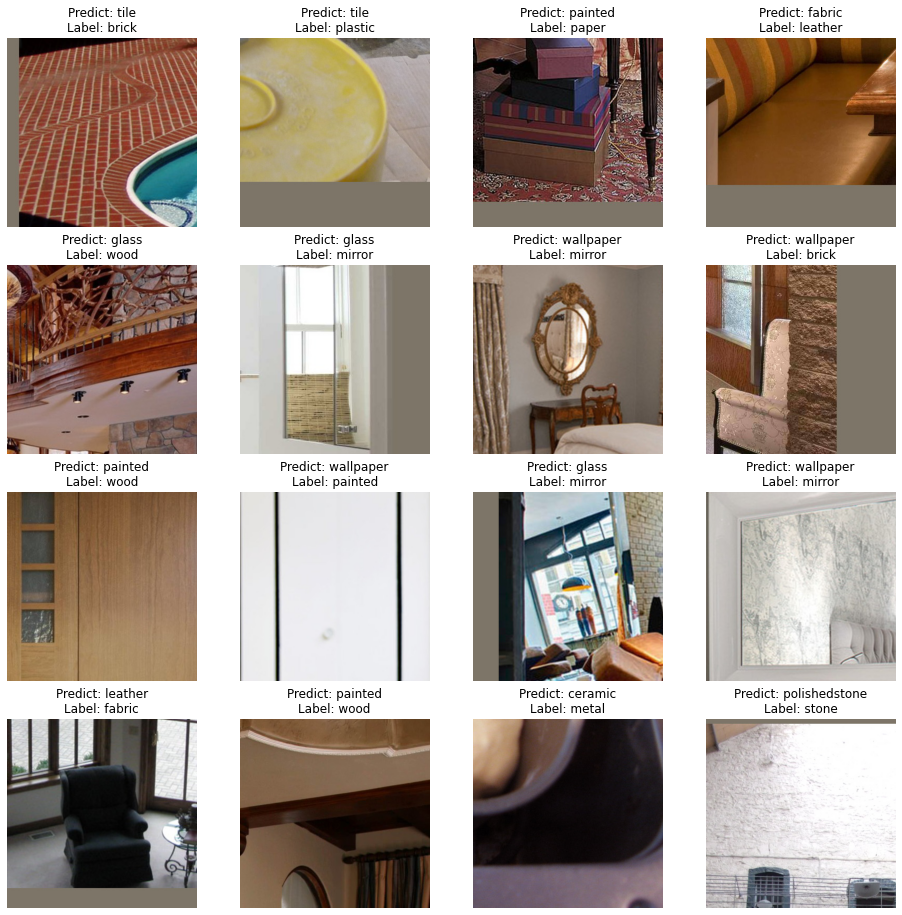

In [104]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

error_pix = df_error_set[df_error_set['Label'] != df_error_set['prediction']].sample(16)
error_path = list(error_pix['Path'])
error_label= list(error_pix['Label'])
error_predict = list(error_pix['prediction'])

for i, img_path in enumerate(error_path):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.set_title('Predict: ' + error_predict[i] + '\n' + 'Label: ' + error_label[i])
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [106]:
df_error_set

Path  Label prediction
2      minc-2500/images/brick/brick_000216.jpg  brick       tile
13     minc-2500/images/brick/brick_002251.jpg  brick      brick
17     minc-2500/images/brick/brick_000925.jpg  brick      stone
18     minc-2500/images/brick/brick_002236.jpg  brick      brick
29     minc-2500/images/brick/brick_001720.jpg  brick      brick
...                                        ...    ...        ...
57439    minc-2500/images/wood/wood_001181.jpg   wood      glass
57445    minc-2500/images/wood/wood_000886.jpg   wood       wood
57456    minc-2500/images/wood/wood_002431.jpg   wood    painted
57462    minc-2500/images/wood/wood_001213.jpg   wood       wood
57497    minc-2500/images/wood/wood_000034.jpg   wood       wood

[3750 rows x 3 columns]

<AxesSubplot:>

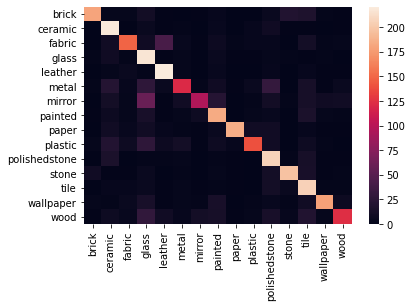

In [122]:
from sklearn.metrics import confusion_matrix
labels = np.unique(df_error_set['Label'])
cm = confusion_matrix(df_error_set['Label'], df_error_set['prediction'], labels=labels)
sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels))

In [112]:
# import the necessary packages
import imutils
def sliding_window(image, step, ws):
    '''
    image: The input image
    step: Our step size, which indicates how many pixels we are going to “skip” in both the (x, y) directions.
    ws: The window size defines the width and height (in pixels) of the window we are going to extract from our image.    
    '''
    # slide a window across the image
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            # yield the current window
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])
            
def image_pyramid(image, scale=1.5, minSize=(224, 224)):
    # yield the original image
    yield image
    # keep looping over the image pyramid
    while True:
        # compute the dimensions of the next image in the pyramid
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image
        
def predict_ob(image):
    ''' Arg: array of image of size 192, 192, 3
        Returns: list of predict labels
    '''
    result = model.predict(image)
    print(result)
    pred_tag=[]
    
    for i in range(15):
        prob = result[0][i]
        label = label_map[i]
        if(prob == max(result[0])):
            pred_tag.append(label)
        prediction = str(' '.join(pred_tag))
            
    return prediction, max(result[0])

def read_raw_img(image):
    image = tf.image.central_crop(image, 0.55)
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    image = image / 255.0
    image = tf.expand_dims(image, axis=0)
    return image
        
# initialize variables used for the object detection procedure
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = (362, 362)
INPUT_SIZE = (192, 192)

In [113]:
img = mpimg.imread('sample.jpg')
orig = imutils.resize(img, width=WIDTH)
(H, W) = orig.shape[:2]

In [114]:
# initialize the image pyramid
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
# initialize two lists, one to hold the ROIs generated from the image
# pyramid and sliding window, and another list used to store the
# (x, y)-coordinates of where the ROI was in the original image
rois = []
locs = []
# time how long it takes to loop over the image pyramid layers and
# sliding window locations
start = time.time()

In [115]:
for image in pyramid:
    # determine the scale factor between the *original* image
    # dimensions and the *current* layer of the pyramid
    scale = W / float(image.shape[1])
    # for each layer of the image pyramid, loop over the sliding
    # window locations
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        # scale the (x, y)-coordinates of the ROI with respect to the
        # *original* image dimensions
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        # take the ROI and preprocess it so we can later classify
        # the region using Keras/TensorFlow
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        #roi = img_to_array(roi)
        #roi = tf.keras.preprocessing.image.img_to_array(roi)
        #roi = preprocess_input(roi)
        # update our list of ROIs and associated coordinates
        rois.append(roi)
        locs.append((x, y, x + w, y + h))

In [116]:
# show how long it took to loop over the image pyramid layers and
# sliding window locations
end = time.time()
print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(
	end - start))
# convert the ROIs to a NumPy array
rois = np.array(rois, dtype="float32")
# classify each of the proposal ROIs using ResNet and then show how
# long the classifications took
print("[INFO] classifying ROIs...")
start = time.time()
preds=[]
for (i, p) in enumerate(rois):
    r = predict_ob(read_raw_img(rois[i]))
    preds.append(r)

end = time.time()
print("[INFO] classifying ROIs took {:.5f} seconds".format(
	end - start))
# decode the predictions and initialize a dictionary which maps class
# labels (keys) to any ROIs associated with that label (values)
labels = {}

[INFO] looping over pyramid/windows took 1.76747 seconds
[INFO] classifying ROIs...
[[3.4611400e-19 9.9276440e-21 1.7596359e-27 1.0000000e+00 3.0538519e-26
  1.6259903e-10 5.7833582e-10 1.8002018e-14 2.1257571e-14 1.1825023e-23
  1.3212287e-12 2.3395539e-15 5.8305263e-15 1.5970122e-10 9.2237099e-18]]
[[9.73456356e-21 3.48555481e-17 1.65773150e-20 9.31801677e-01
  7.43897559e-25 2.02209549e-06 7.38231074e-06 1.01374889e-13
  1.78451790e-16 9.58432943e-30 6.81811348e-02 1.28803306e-26
  7.65714503e-06 1.26296350e-15 3.43786049e-08]]
[[3.4560781e-24 2.0853411e-14 1.5682842e-14 1.0000000e+00 7.0581980e-29
  5.8053426e-13 9.8721520e-09 1.4074199e-16 7.7656124e-23 1.7144966e-23
  2.2521030e-12 6.1093249e-19 4.2799382e-13 6.3391844e-19 4.7079261e-08]]
[[4.8135056e-35 2.3889395e-19 9.3819701e-24 2.0558634e-03 1.2214763e-22
  6.8437520e-11 9.9794024e-01 3.5372793e-06 1.6456455e-15 6.8995807e-20
  4.5825079e-13 3.5911556e-24 1.8811975e-11 1.0646237e-20 3.2289455e-07]]
[[4.3536965e-26 5.4943867e-

[[2.4797722e-25 1.4656313e-06 4.7114470e-14 1.4520064e-01 1.9840360e-09
  1.5282994e-07 8.5437608e-01 3.0416527e-04 2.0341223e-20 3.8080083e-18
  9.1307683e-08 4.6682540e-24 3.1606946e-12 1.4376450e-14 1.1734223e-04]]
[[7.3881377e-27 4.2521205e-16 1.0487447e-19 1.0000000e+00 9.3772192e-26
  4.7800890e-18 1.3239048e-09 2.3376140e-11 4.7851854e-23 1.0664552e-27
  1.6562289e-15 1.4472607e-34 9.1504527e-13 2.0496606e-30 3.5882468e-16]]
[[1.7466191e-34 7.4058930e-14 4.9977455e-17 9.9999821e-01 1.4897101e-21
  1.2460712e-15 3.4382818e-08 1.8008242e-06 6.4441678e-17 8.1487877e-28
  1.5303951e-11 2.2535979e-24 1.8372066e-18 2.6782493e-29 4.2639645e-11]]
[[1.8838596e-32 3.7203929e-19 4.3089804e-22 1.0000000e+00 1.4481281e-26
  1.2751597e-17 2.5620237e-12 9.9779804e-15 4.1176911e-19 2.0858794e-24
  3.5000504e-22 1.2380524e-37 9.0112113e-18 1.1988770e-22 1.2634089e-24]]
[[1.0995558e-29 6.4600115e-15 1.4401274e-21 1.0000000e+00 1.7344846e-27
  2.5015412e-10 3.9808055e-09 4.1974128e-13 1.6583729e-1

[[3.30068494e-24 8.13488579e-15 2.16988086e-19 9.97718453e-01
  4.11032993e-21 4.98754496e-04 2.28680983e-06 1.20214265e-08
  4.03625572e-16 4.52818197e-28 2.23233321e-09 4.25298117e-32
  1.12279424e-12 5.53181158e-14 1.78048946e-03]]
[[2.9128301e-22 1.1430865e-12 1.7173492e-22 9.7385728e-01 5.9163287e-23
  2.5430782e-07 8.2326187e-06 4.9701007e-11 1.8879426e-18 2.2987099e-27
  3.9728533e-08 1.6082454e-27 2.0732298e-11 4.0596039e-19 2.6134225e-02]]
[[2.2603351e-23 4.0942689e-14 6.5901699e-20 4.0063713e-07 1.7700567e-20
  3.7494779e-08 6.1043936e-01 3.8955534e-01 2.0147204e-24 1.0351016e-23
  3.1383934e-07 3.3390452e-14 1.9699927e-11 3.1468062e-24 4.4747044e-06]]
[[4.6151932e-30 1.9163382e-09 8.0124757e-17 2.5037507e-06 1.8231381e-14
  2.9338776e-06 9.8834550e-01 1.1232997e-02 5.0599641e-17 1.8573107e-21
  2.7061142e-07 6.3440028e-17 8.2407201e-09 1.0276009e-19 4.1584155e-04]]
[[1.7453880e-26 1.3726802e-19 1.1874534e-18 9.9999857e-01 4.2994130e-24
  8.8906667e-11 8.6197105e-07 2.7243798

In [117]:
df_pred = pd.DataFrame(preds, columns=['Material', 'Prob'])

In [120]:
df_pred.groupby('Material').mean()

Prob
Material          
ceramic   0.784227
glass     0.978307
metal     0.792488
mirror    0.894172
painted   0.835472
paper     0.959552
tile      0.885449
wood      0.905115